In [37]:
import os
global notebook
notebook=1

#Set directory of Python
dir = r"C:\Users\Beverly\Documents\HAMR_macros"
os.chdir(dir) #hamr
#Compile python toolkit
%run -i C:\Users\Beverly\Documents\HAMR_macros\pp.py build_ext --inplace
%matplotlib inline

In [1]:
import os
global notebook
notebook=1

#Set directory of Python
dir = r"C:\Users\Beverly\Documents\HAMR_macros"
os.chdir(dir) #hamr
#Compile python toolkit
%run -i C:\Users\Beverly\Documents\HAMR_macros\pp.py do_nothing
%run -i C:\Users\Beverly\Documents\HAMR_macros\timeavg_functions.ipynb
%matplotlib inline

C:\Users\Beverly\Documents\HAMR_macros\pp.py:38: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble'] = [r"\usepackage{amssymb,amsmath}"]


In [2]:
#Set parameters for all simulations loaded
lowres1 = 1
lowres2 = 1
lowres3 = 1
do_box=0
r_min=0.0
r_max=100.0
theta_min=0.0
theta_max=9
phi_min=-1
phi_max=9
axisym=1 
print_fieldlines=0 
export_raytracing_GRTRANS=0 
export_raytracing_RAZIEH=0
interpolate_var=0
kerr_schild=0
DISK_THICKNESS=0.03 
set_cart=0 
set_mpi(0) 
check_files=1
notebook=1

# Low res uncooled MADs

In [3]:
# Low res MAD data
rhorlist = np.zeros_like(alist)
OmegaHlist = np.zeros_like(alist)
klist = np.zeros_like(alist)
lkeplist = np.zeros_like(alist)

lhydro_10rg = np.zeros_like(alist)
ehydro_10rg = np.zeros_like(alist)
shydro_10rg = np.zeros_like(alist)

lhydro_5rg = np.zeros_like(alist)
ehydro_5rg = np.zeros_like(alist)
shydro_5rg = np.zeros_like(alist)

# total EM fluxes and spinup
lEM_5rg = np.zeros_like(alist)
eEM_5rg = np.zeros_like(alist)
sEM_5rg = np.zeros_like(alist)

lEM_10rg = np.zeros_like(alist)
eEM_10rg = np.zeros_like(alist)
sEM_10rg = np.zeros_like(alist)

ltot_10rg = np.zeros_like(alist)
etot_10rg = np.zeros_like(alist)
stot_10rg = np.zeros_like(alist)

ltot_5rg = np.zeros_like(alist)
etot_5rg = np.zeros_like(alist)
stot_5rg = np.zeros_like(alist)

l_totcond_5rg = np.zeros_like(alist)
e_totcond_5rg = np.zeros_like(alist)
s_totcond_5rg = np.zeros_like(alist)

l_totcond_10rg = np.zeros_like(alist)
e_totcond_10rg = np.zeros_like(alist)
s_totcond_10rg = np.zeros_like(alist)

# $h/r = 0.3$ uncooled disks

## a = 0.94 no cooling

In [4]:
#Set directory
#dir = "C:\H-AMR\HAMR\HAMR_CPU" 
dir = r'D:\H-AMRdata\highresMADs\no_cool_disk\a09375'
os.chdir(dir) 

D=200

#Run read-in of data
rblock_new(D)
rpar_new(D)
rgdump_griddata(dir)
rdump_griddata(dir,D)
#set_uniform_grid()
misc_calc(calc_bu=1, calc_bsq=1, calc_eu=RESISTIVE, calc_esq=RESISTIVE)
psicalc(0,0)
#calc_RAD()
#set_pole()

C:\Users\Beverly\Documents\HAMR_macros\pp.py:7: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  import os, sys, gc


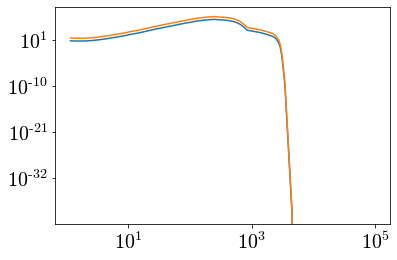

In [5]:
PhiBH_weighted = (-gdet*rho*uu[0]*(0.5 * (np.abs(gdet * B[1]) * _dx2 * _dx3)))[0,:,:,:].sum(-1)
#phiBH_weighted = ((-gdet*rho*uu[0]*(0.5 * (np.abs(gdet * B[1]) * _dx2 * _dx3)))*np.sqrt(4*np.pi)/np.sqrt(fMdisk[iofr(diskcut)]))[0,:,:,:].sum(-1)

PhiBH_weighted_m = (-gdet*rho*uu[0]*(0.5 * (np.abs(gdet * B[1]) * _dx2 * _dx3)))[0,:,:,:].mean(-1)
#phiBH_weighted_m = ((-gdet*rho*uu[0]*(0.5 * (np.abs(gdet * B[1]) * _dx2 * _dx3)))*np.sqrt(4*np.pi)/np.sqrt(fMdisk[iofr(diskcut)]))[0,:,:,:].mean(-1)

plt.loglog(r[0,:,ny//2,0], -PhiBH_weighted.mean(-1))
plt.loglog(r[0,:,ny//2,0], -PhiBH_weighted_m.sum(-1))



In [6]:
rhor_a94=rhor
ta_a94 = np.load("a94_hor1_timeavg.npz")

In [7]:
# <P> gas pressure
P_a94_3rg=(gam-1)*ta_a94['ug_tot'][iofr(3),ny//2]
P_a94_25rg=(gam-1)*ta_a94['ug_tot'][iofr(25),ny//2]

# <B^i>^2
B1sq=((ta_a94['B1_2d']**2)*gcov[1,1][0,:,:,0])
B2sq=((ta_a94['B2_2d']**2)*gcov[2,2][0,:,:,0])
B3sq=((ta_a94['B3_2d']**2)*gcov[3,3][0,:,:,0])

# <B>^2
Btotsq=B1sq+B2sq+B3sq

# <deltaB^2> pressure from magnetic turbulence
deltaB_a94=(ta_a94['Bsq_tot'].mean(-1))-(Btotsq)
    # <B^2> : mean field

C:\Users\Beverly\Documents\HAMR_macros\pp.py:4: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # from __future__ import division__future__ import division


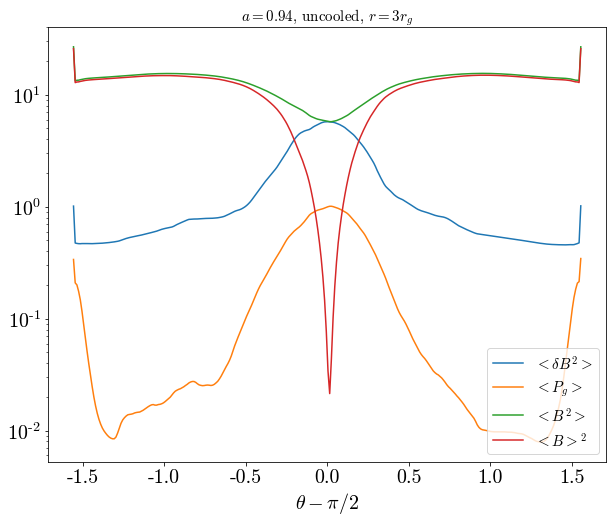

In [8]:
plt.figure(figsize=(10,8))

#plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, deltaB[iofr(10),:], label=r"$\delta B^r$")
plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, deltaB_a94[iofr(3),:]/P_a94_3rg, label=r"$<\delta B^2>$")

#plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, (B1_2d_09375*gcov[1,1][0,:,:,0])[iofr(20),:], label=r"$<B^r>^2$")
#plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, (B1_2d_09375cooled*gcov[1,1][0,:,:,0])[iofr(20),:]**2, label=r"$<B^r>^2$ cooled")

plt.semilogy(h[0,iofr(20),:,0]-np.pi/2,  (gam-1)*ta_a94['ug_tot'][iofr(3),:]/P_a94_3rg, label=r"$<P_g>$")

plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, (ta_a94['Bsq_tot'].mean(-1))[iofr(3),:]/P_a94_3rg, label=r"$<B^2>$")
#plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, (B_tot_09375cooled.mean(-1)**2)[iofr(25),:], label=r"$<B>^2$")
plt.semilogy(h[0,iofr(20),:,0]-np.pi/2,Btotsq[iofr(3),:]/P_a94_3rg, label=r"$<B>^2$")

plt.xlabel(r"$\theta - \pi/2$")
plt.title("$a=0.94$, uncooled, $r=3r_g$", fontsize=15)

plt.legend(fontsize=15, loc="lower right")

C:\Users\Beverly\Documents\HAMR_macros\pp.py:3: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # In[21]:


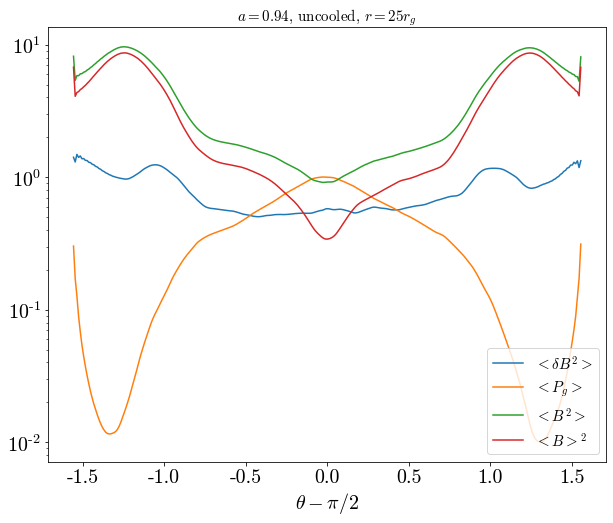

In [9]:
plt.figure(figsize=(10,8))

plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, deltaB_a94[iofr(25),:]/P_a94_25rg, label=r"$<\delta B^2>$")
plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, (gam-1)*ta_a94['ug_tot'][iofr(25),:]/P_a94_25rg, label=r"$<P_g>$")
plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, (ta_a94['Bsq_tot'].mean(-1))[iofr(25),:]/P_a94_25rg, label=r"$<B^2>$")
plt.semilogy(h[0,iofr(20),:,0]-np.pi/2,Btotsq[iofr(25),:]/P_a94_25rg, label=r"$<B>^2$")

plt.xlabel(r"$\theta - \pi/2$")
plt.title("$a=0.94$, uncooled, $r=25r_g$", fontsize=15)

plt.legend(fontsize=15, loc="lower right")

In [10]:
spinup_a94 = {}
diskcut = 7

spinup_a94 = calc_spinup_param(ta_a94,diskcut,a)

print(spinup_a94['sMA'])
print(spinup_a94['sEM'])
print(spinup_a94['stot'])

### to do: write s dictionaries to a file

s_MA at 7rg:     -1.060
s_EM at 7rg:     -5.363
s_tot at 7rg:     -6.423
-1.0596196502447128
-5.3634419068694115
-6.423065431183204


In [11]:
plt.loglog(r[0,:,ny//2,0], r[0,:,ny//2,0]*(Babs1_09375cooled).mean(-1)*dxdxp[1,1][0,:,ny//2,0]/np.sqrt(fMdisk_09375cooled[iofr(7)]), label="tot")
plt.loglog(r[0,:,ny//2,0], r[0,:,ny//2,0]*(Babs1_disk_09375cooled).mean(-1)*dxdxp[1,1][0,:,ny//2,0]/((den1_09375cooled.mean(-1))*np.sqrt(fMdisk_09375[iofr(7)])), label="disk weighted")
plt.xlim(rhor,1e3)
plt.ylim(1e-5,2)
plt.ylabel(r"$<|B^r|>$")
plt.xlabel(r"$r (r_g)$")
plt.title("a=0.9375",fontsize=20)
plt.legend(fontsize=15)

NameError: name 'Babs1_09375cooled' is not defined

In [12]:
plt.semilogx(r[0,:,ny//2,0], Br_09375cooled, label="cooled")
plt.semilogx(r[0,:,ny//2,0], Br_09375, label="not cooled")
plt.xlim(0,1e3)
plt.ylabel(r"$<B^r>$")
plt.xlabel(r"$r (r_g)$")
plt.title("a=0.9375",fontsize=20)
plt.legend(fontsize=15)

NameError: name 'Br_09375cooled' is not defined

In [13]:
plt.loglog(r[0,:,ny//2,0], fM_09375cooled, label="total")
plt.loglog(r[0,:,ny//2,0], fMdisk_09375cooled, label="disk")
plt.loglog(r[0,:,ny//2,0], fMdisk_09375, label="disk")

plt.xlim(rhor,3e2)
plt.ylabel(r"$<\dot{M}>$")
plt.xlabel(r"$r (r_g)$")
plt.title("a=0.9375 cooled",fontsize=20)
plt.legend(fontsize=15)

NameError: name 'fM_09375cooled' is not defined

C:\Users\Beverly\Documents\HAMR_macros\pp.py:12: RuntimeWarning: invalid value encountered in sqrt
  # from sympy import *


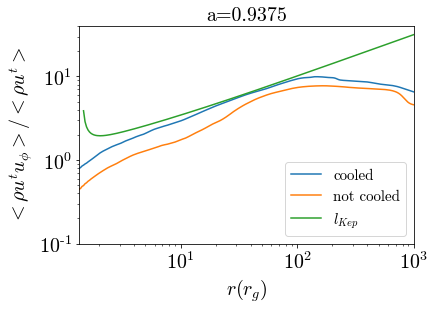

In [154]:
plt.loglog(r[0,:,ny//2,0],ud3num_09375cooled/den1_09375cooled.mean(-1), label="cooled")
plt.loglog(r[0,:,ny//2,0],ud3num_09375/den1_09375.mean(-1), label="not cooled")
lk(a,r)
plt.loglog(r[0,:,ny//2,0],lk(a,r[0,:,ny//2,0]), label=r'$l_{Kep}$')

plt.xlim(rhor,1e3)
plt.ylim(1e-1,40)
plt.ylabel(r"$<\rho u^{t} u_{\phi}>/<\rho u^{t}>$")
plt.xlabel(r"$r (r_g)$")
plt.title("a=0.9375",fontsize=20)
plt.legend(fontsize=15)


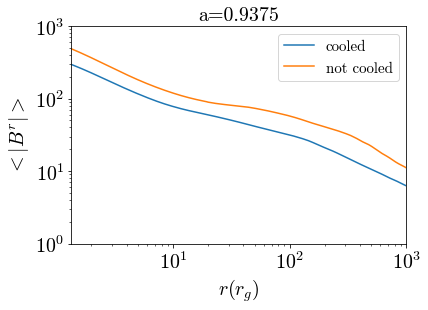

In [224]:
plt.loglog(r[0,:,ny//2,0], r[0,:,ny//2,0]*Babs1_09375cooled.sum(axis=-1)*dxdxp[1,1][0,:,ny//2,0]/np.sqrt(fMdisk_09375cooled[iofr(7)]), label="cooled")
plt.loglog(r[0,:,ny//2,0], r[0,:,ny//2,0]*Babs1_09375.sum(axis=-1)*dxdxp[1,1][0,:,ny//2,0]/np.sqrt(fMdisk_09375[iofr(7)]), label="not cooled")
plt.xlim(rhor,1e3)
plt.ylim(1e0,1e3)
plt.ylabel(r"$<|B^r|>$")
plt.xlabel(r"$r (r_g)$")
plt.title("a=0.9375",fontsize=20)
plt.legend(fontsize=15)

In [ ]:
plt.loglog(r[0,:,ny//2,0], r[0,:,ny//2,0]*Babs1_09375cooled.sum(axis=-1)*dxdxp[1,1][0,:,ny//2,0]/np.sqrt(fMdisk_09375cooled[iofr(7)]), label="cooled")
plt.loglog(r[0,:,ny//2,0], r[0,:,ny//2,0]*Babs1_09375.sum(axis=-1)*dxdxp[1,1][0,:,ny//2,0]/np.sqrt(fMdisk_09375[iofr(7)]), label="not cooled")
plt.xlim(rhor,1e3)
plt.ylim(1e0,1e3)
plt.ylabel(r"$<|B^r|>$")
plt.xlabel(r"$r (r_g)$")
plt.title("a=0.9375",fontsize=20)
plt.legend(fontsize=15)

C:\Users\Beverly\Documents\HAMR_macros\pp.py:2841: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.subplot(1, 2, 1)
C:\Users\Beverly\Documents\HAMR_macros\pp.py:2842: RuntimeWarning: invalid value encountered in log10
  plc_new(np.log10((var))[:, 0:ilim], levels=np.arange(min, max, (max-min)/300.0), cb=0, isfilled=1, xcoord=X[:, 0:ilim],ycoord=Y[:, 0:ilim], xy=1, z=offset, xmax=rmax, ymax=rmax)
C:\Users\Beverly\Documents\HAMR_macros\pp.py:2843: RuntimeWarning: invalid value encountered in log10
  res = plc_new(np.log10((var))[:, 0:ilim], levels=np.arange(min, max, (max-min)/300.0), cb=0, isfilled=1, xcoord=-1.0 * X[:, 0:ilim],ycoord=Y[:, 0:ilim], xy=1, z=180 + offset, xmax=rmax, ymax=rmax)
C:\Users\Beverly\Documents\HAMR_macros\pp.py:2856: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  cax = divider.append_axes("right", size="5%", pad=0.05)
C:\Users\Beverly\Documents\HAM

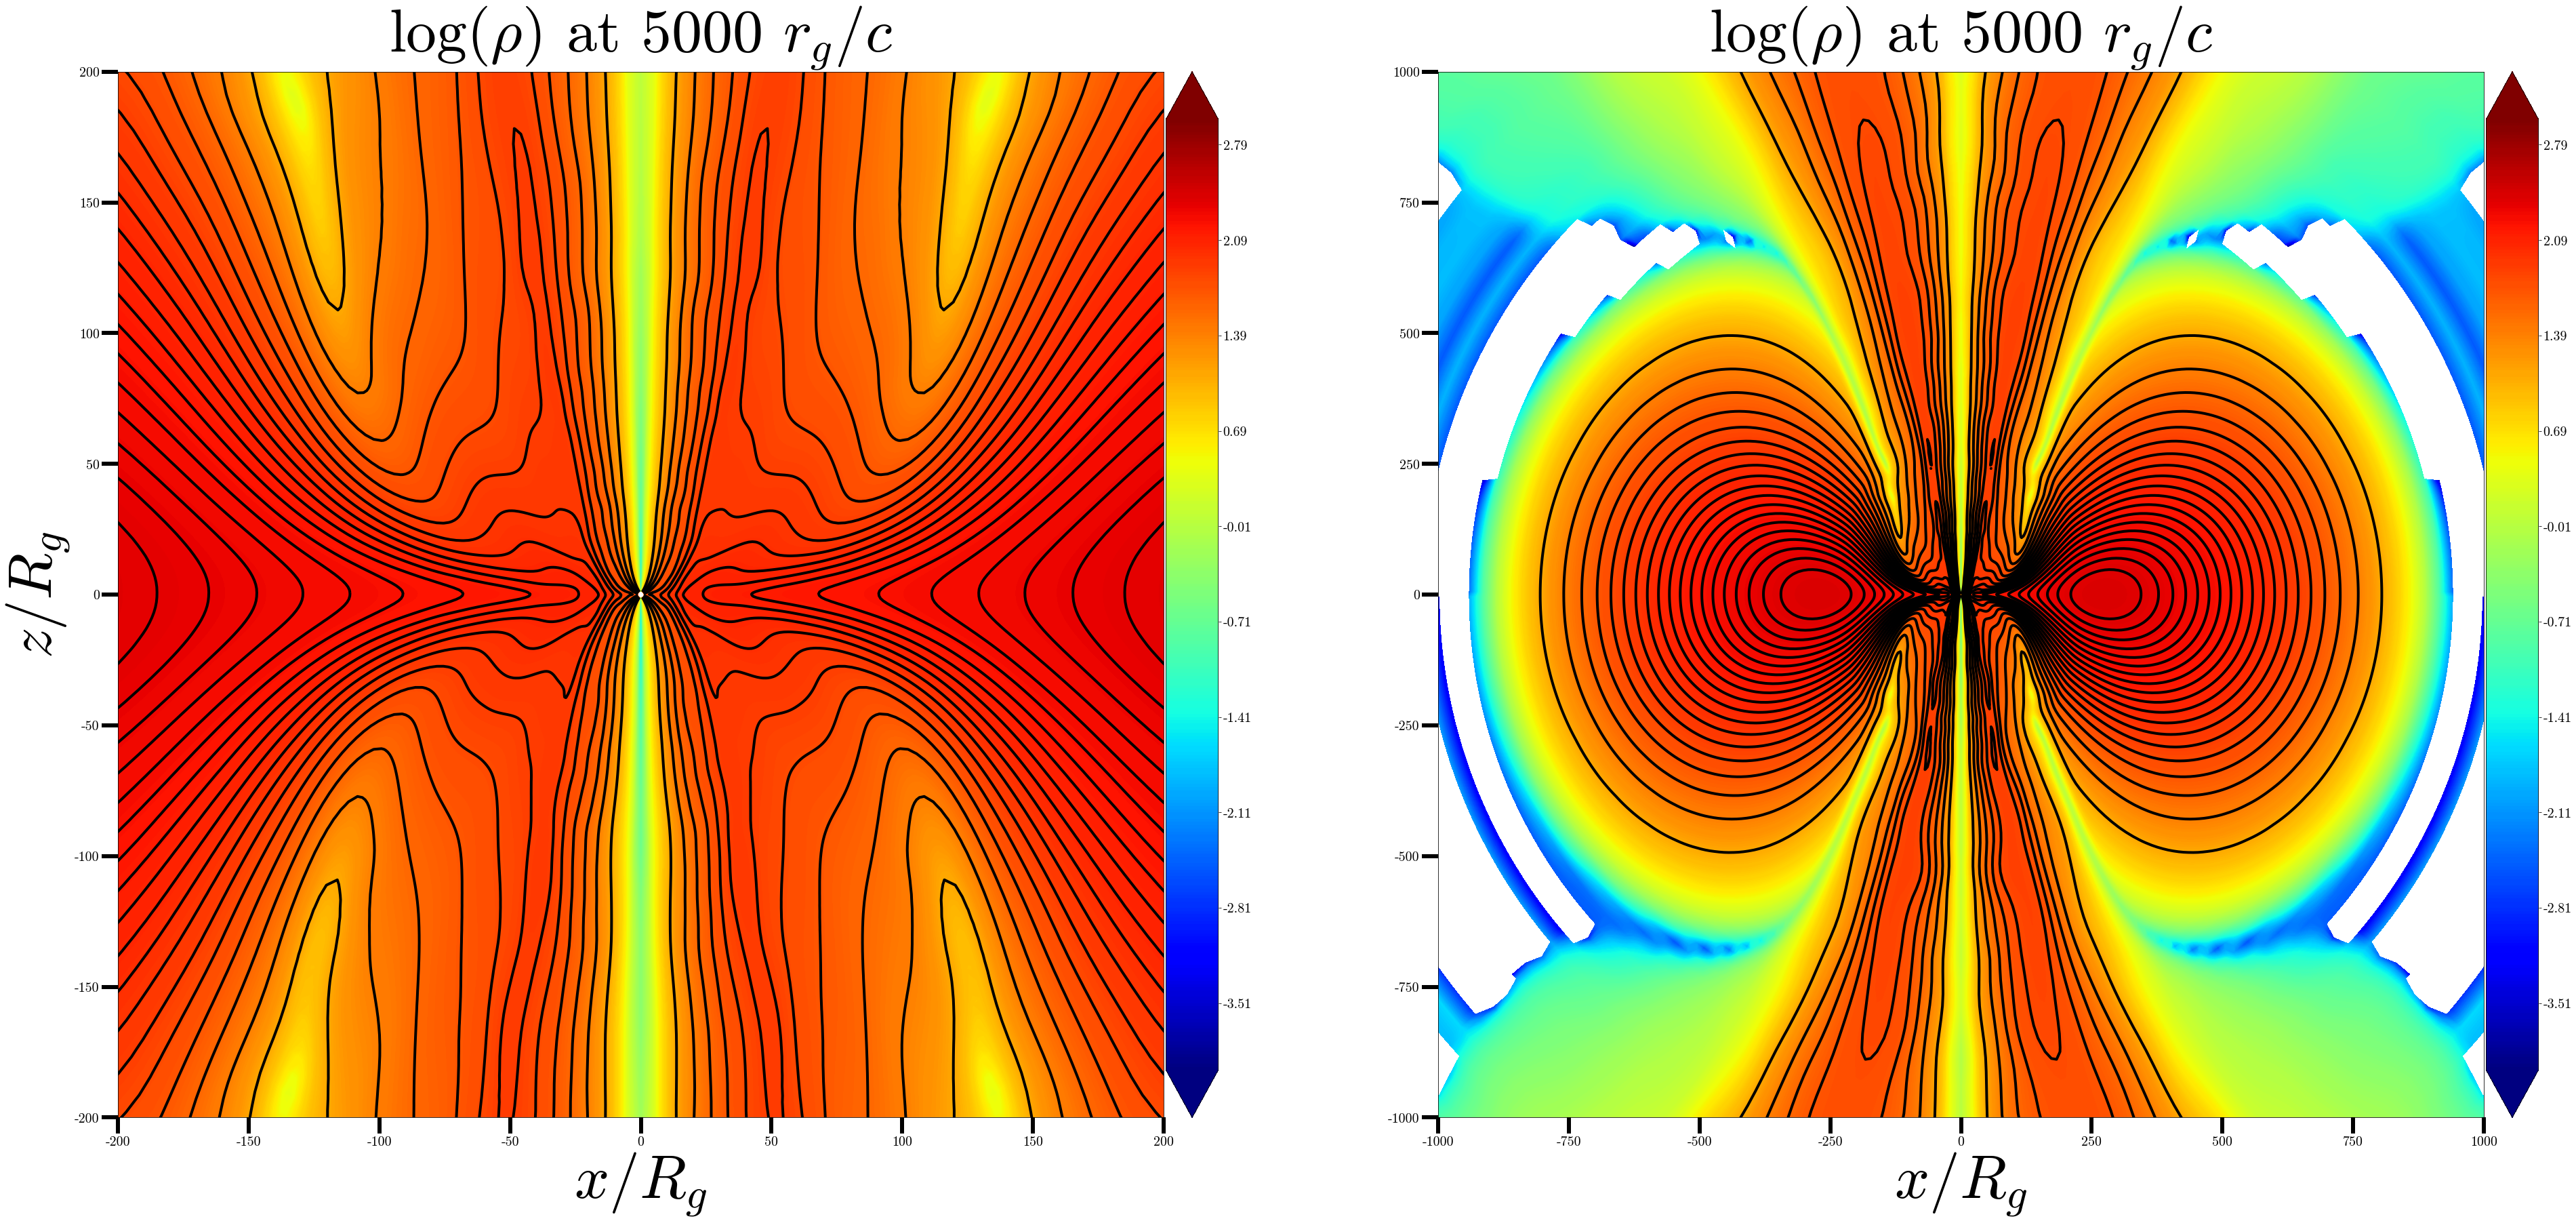

In [15]:
#psicalc(0,0)
print_fieldlines=1
plc_cart(aphi, -4,3,200,30, dir + "/rho%04d.png" %D, r"log$(\rho)$ at %d $r_g/c$" % t)

C:\Users\Beverly\Documents\HAMR_macros\pp.py:3: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  # In[21]:


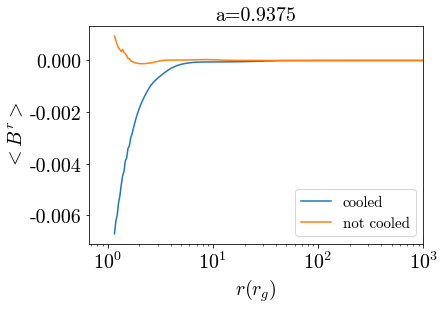

In [91]:
plt.semilogx(r[0,:,ny//2,0], Br_09375cooled, label="cooled")
plt.semilogx(r[0,:,ny//2,0], Br_09375, label="not cooled")
plt.xlim(0,1e3)
plt.ylabel(r"$<B^r>$")
plt.xlabel(r"$r (r_g)$")
plt.title("a=0.9375",fontsize=20)
plt.legend(fontsize=15)

In [ ]:
plt.semilogx(r[0,:,ny//2,0], Br_09375cooled, label="cooled")
plt.semilogx(r[0,:,ny//2,0], Br_09375, label="not cooled")
plt.xlim(0,1e3)
plt.ylabel(r"$<B^r>$")
plt.xlabel(r"$r (r_g)$")
plt.title("a=0.9375",fontsize=20)
plt.legend(fontsize=15)

C:\Users\Beverly\Documents\HAMR_macros\pp.py:3: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  # In[21]:


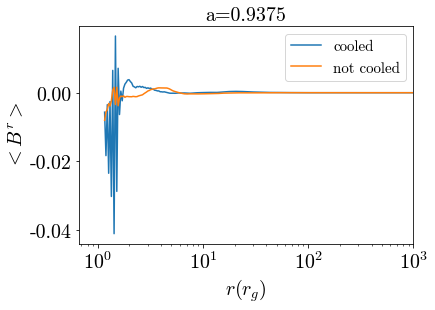

In [93]:
plt.semilogx(r[0,:,ny//2,0], Bp_09375cooled, label="cooled")
plt.semilogx(r[0,:,ny//2,0], Bp_09375, label="not cooled")
plt.xlim(0,1e3)
plt.ylabel(r"$<B^r>$")
plt.xlabel(r"$r (r_g)$")
plt.title("a=0.9375",fontsize=20)
plt.legend(fontsize=15)

C:\Users\Beverly\Documents\HAMR_macros\pp.py:3: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  # In[21]:


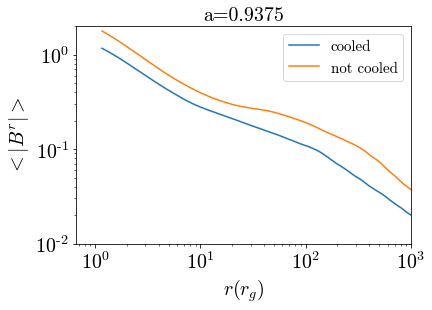

In [121]:
plt.loglog(r[0,:,ny//2,0], r[0,:,ny//2,0]*Babsr_09375cooled*dxdxp[1,1][0,:,ny//2,0]/np.sqrt(fMdisk_09375cooled[iofr(7)]), label="cooled")
plt.loglog(r[0,:,ny//2,0], r[0,:,ny//2,0]*Babsr_09375*dxdxp[1,1][0,:,ny//2,0]/np.sqrt(fMdisk_09375[iofr(7)]), label="not cooled")
plt.xlim(0,1e3)
plt.ylim(1e-2,2)
plt.ylabel(r"$<|B^r|>$")
plt.xlabel(r"$r (r_g)$")
plt.title("a=0.9375",fontsize=20)
plt.legend(fontsize=15)

C:\Users\Beverly\Documents\HAMR_macros\pp.py:3: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  # In[21]:


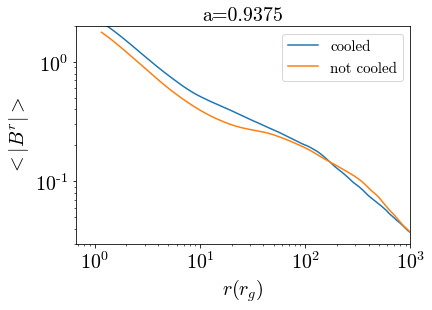

In [295]:
plt.loglog(r[0,:,ny//2,0], r[0,:,ny//2,0]*Babsr_09375cooled*dxdxp[1,1][0,:,ny//2,0]/np.sqrt(fMdisk_09375cooled[iofr(7)]), label="cooled")
plt.loglog(r[0,:,ny//2,0], r[0,:,ny//2,0]*Babsr_09375*dxdxp[1,1][0,:,ny//2,0]/np.sqrt(fMdisk_09375[iofr(7)]), label="not cooled")
plt.xlim(0,1e3)
plt.ylim(3e-2,2)
plt.ylabel(r"$<|B^r|>$")
plt.xlabel(r"$r (r_g)$")
plt.title("a=0.9375",fontsize=20)
plt.legend(fontsize=15)

C:\Users\Beverly\Documents\HAMR_macros\pp.py:3: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  # In[21]:


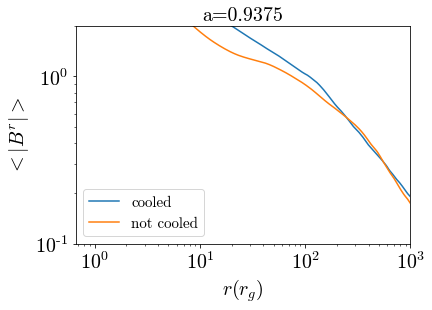

In [123]:
plt.loglog(r[0,:,ny//2,0], r[0,:,ny//2,0]*Babsr_09375cooled*dxdxp[1,1][0,:,ny//2,0], label="cooled")
plt.loglog(r[0,:,ny//2,0], r[0,:,ny//2,0]*Babsr_09375*dxdxp[1,1][0,:,ny//2,0], label="not cooled")
plt.xlim(0,1e3)
plt.ylim(1e-1,2)
plt.ylabel(r"$<|B^r|>$")
plt.xlabel(r"$r (r_g)$")
plt.title("a=0.9375",fontsize=20)
plt.legend(fontsize=15)

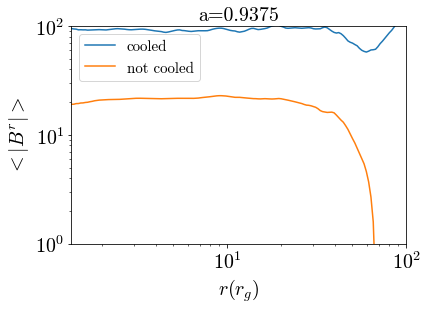

In [117]:
plt.loglog(r[0,:,ny//2,0], fMdisk_09375cooled, label="cooled")
plt.loglog(r[0,:,ny//2,0], fMdisk_09375, label="not cooled")
plt.xlim(rhor,1e2)
plt.ylim(1e0,1e2)
plt.ylabel(r"$<|B^r|>$")
plt.xlabel(r"$r (r_g)$")
plt.title("a=0.9375",fontsize=20)
plt.legend(fontsize=15)

C:\Users\Beverly\Documents\HAMR_macros\pp.py:1: RuntimeWarning: invalid value encountered in true_divide
  # coding: utf-8
C:\Users\Beverly\Documents\HAMR_macros\pp.py:2: RuntimeWarning: invalid value encountered in true_divide
  # python pp.py build_ext --inplace


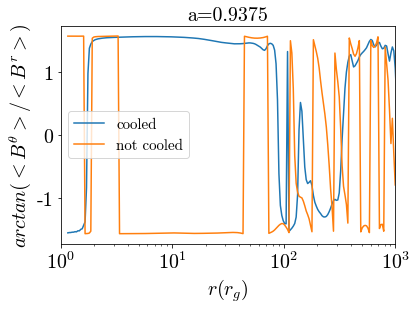

In [89]:
plt.semilogx(r[0,:,ny//2,0],np.arctan(Bh_09375cooled/Br_09375cooled), label="cooled")
plt.semilogx(r[0,:,ny//2,0],np.arctan(Bh_09375/Br_09375), label="not cooled")

plt.xlim(1,1e3)
plt.ylabel(r"$arctan(<B^\theta>/<B^r>)$")
plt.xlabel(r"$r (r_g)$")
plt.title("a=0.9375",fontsize=20)
plt.legend(fontsize=15)

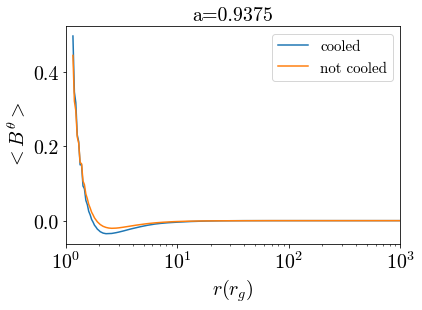

In [63]:
plt.semilogx(r[0,:,ny//2,0],Bh_09375cooled, label="cooled")
plt.semilogx(r[0,:,ny//2,0],Bh_09375, label="not cooled")

plt.xlim(1,1e3)
plt.ylabel(r"$<B^\theta>$")
plt.xlabel(r"$r (r_g)$")
plt.title("a=0.9375",fontsize=20)
plt.legend(fontsize=15)


C:\Users\Beverly\Documents\HAMR_macros\pp.py:12: RuntimeWarning: invalid value encountered in sqrt
  # from sympy import *


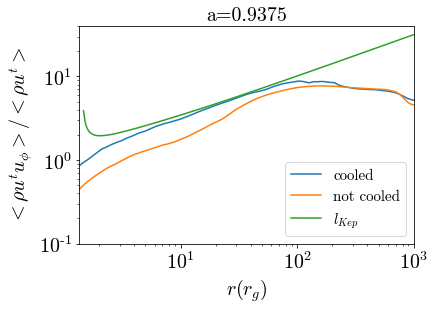

In [99]:
plt.loglog(r[0,:,ny//2,0],ud3num_09375cooled/den1_09375cooled, label="cooled")
plt.loglog(r[0,:,ny//2,0],ud3num_09375/den1_09375, label="not cooled")
lk(a,r)
plt.loglog(r[0,:,ny//2,0],lk(a,r[0,:,ny//2,0]), label=r'$l_{Kep}$')

plt.xlim(rhor,1e3)
plt.ylim(1e-1,40)
plt.ylabel(r"$<\rho u^{t} u_{\phi}>/<\rho u^{t}>$")
plt.xlabel(r"$r (r_g)$")
plt.title("a=0.9375",fontsize=20)
plt.legend(fontsize=15)


In [98]:
rhor

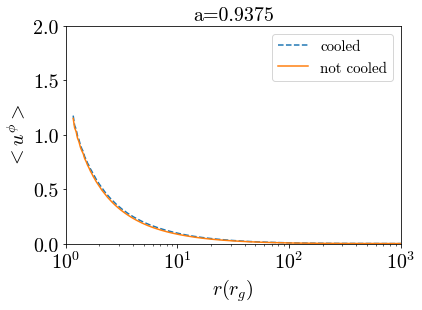

In [74]:
plt.semilogx(r[0,:,ny//2,0],uu31d_09375cooled,"--", label="cooled")
plt.semilogx(r[0,:,ny//2,0],uu31d_09375, label="not cooled")


plt.xlim(1,1e3)
plt.ylim(0,2)
plt.ylabel(r"$<u^{\phi}>$")
plt.xlabel(r"$r (r_g)$")
plt.title("a=0.9375",fontsize=20)
plt.legend(fontsize=15)


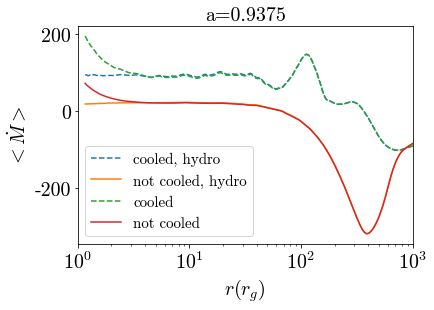

In [79]:
plt.semilogx(r[0,:,ny//2,0],fMdisk_09375cooled,"--", label="cooled, hydro")
plt.semilogx(r[0,:,ny//2,0],fMdisk_09375, label="not cooled, hydro")


plt.semilogx(r[0,:,ny//2,0],fM_09375cooled,"--", label="cooled")
plt.semilogx(r[0,:,ny//2,0],fM_09375, label="not cooled")

plt.xlim(1,1e3)

plt.ylabel(r"$<\dot{M}>$")
plt.xlabel(r"$r (r_g)$")
plt.title("a=0.9375",fontsize=20)
plt.legend(fontsize=15)


In [54]:
plt.figure()
plt.loglog(r[0][:,ny-1,0],cs_jet)
plt.loglog(r[0][:,ny-1,0],cs_th_jet)
plt.loglog(r[0][:,0,0], np.sqrt(((gam - 1) * ug)/rho)[0,:,ny-4:ny,:].mean(axis=1).mean(axis=-1))
plt.ylim(1e-4,1e0)
plt.xlim(Rin,Rout)
plt.title("Jet sound speed")
plt.grid()

NameError: name 'cs_jet' is not defined

<Figure size 432x288 with 0 Axes>

NameError: name 'ti' is not defined

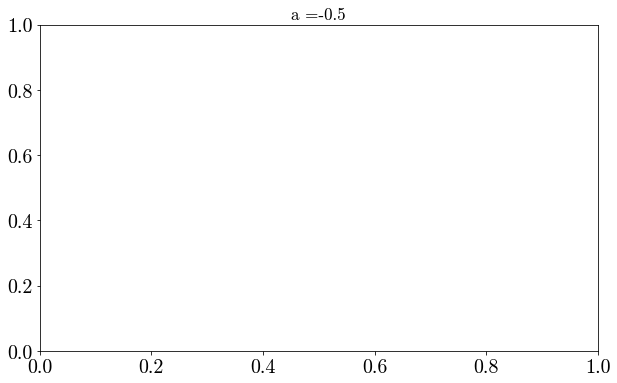

In [55]:
plt.figure(figsize=(10,6))
fs = 12

plt.title("a =-0.5", fontsize = fs+5)

plt.loglog(r[0,:,ny//2,0], fEtotEMMA/fMdisk[iofr(10)], label=" Total E flux (disk+jet) ")
plt.loglog(r[0,:,ny//2,0], - fEtotEM/fMdisk[iofr(10)], label=" - EM E flux ")

plt.loglog(r[0,:,ny//2,0], - fLtotEM/fMdisk[iofr(10)], label=" - EM L flux ")


plt.loglog(r[0,:,ny//2,0], fLtotEMMA /fMdisk[iofr(10)] , label=" Total L flux (disk+jet, ma+em)")

plt.loglog(r[0,:,ny//2,0], - fLdiskMA / fMdisk[iofr(10)], label=" - Disk L flux hydro")
plt.loglog(r[0,:,ny//2,0], fEdiskMA / fMdisk[iofr(10)], label=" Disk E flux hydro")

#plt.loglog(r[:,ny//2,0], fLdiskEM_00 / fM_00[iofr(10)], label=" Disk L flux EM")


#plt.loglog(r[:,ny//2,0], fEdiskMA_02 / fM_02, label=" Disk L flux hydro")

plt.loglog(r[0,:,ny//2,0], lk(-0.5,r[0,:,ny//2,0]) , label="L kep")

plt.vlines(rhor, 10**-1, 10**1.5, label="Rhor")
plt.vlines(Risco(a), 10**-1, 10**1.5, label = "Risco")
#plt.loglog(r[:,ny//2,0], Mdot, label="current Mass flux")
plt.loglog(r[0,:,ny//2,0], fM, label="Mass flux total")
plt.loglog(r[0,:,ny//2,0], fMdisk, label="DISK Mass flux total")

#plt.loglog(r[:,ny//2,0], -fEM_02 /fM_02 , label="- EM flux")
#plt.loglog(r[:,ny//2,0], - powj_02 /fM_02 , label="- Jet power")



plt.ylim(1e-2,100)
plt.xlim(Rin,70)
#plt.loglog(r[:,ny//2,0],rho[:,ny//2,0]*10)
plt.legend(fontsize = fs, loc=1)

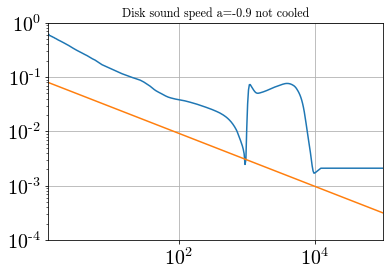

In [50]:
plt.figure()
plt.loglog(r[0][:,ny-1,0],csdisk_n09)
plt.loglog(r[0][:,ny-1,0],cs_th_jet)
plt.ylim(1e-4,1e0)
plt.xlim(Rin,Rout)
plt.title("Disk sound speed a=-0.9 not cooled")
plt.grid()

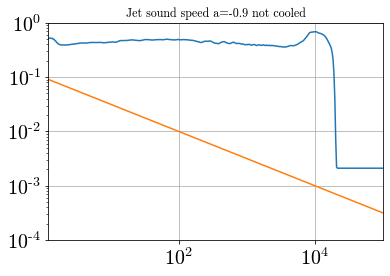

In [51]:
cs_th_jet = (0.1*r[0][:,0:3,:]**(-0.5)).mean(axis=1).mean(axis=-1)
cs_th_disk = 0.1*r[0][:,ny//2,0]**(-0.5)

plt.figure()
plt.loglog(r[0][:,ny-1,0],csjet_n09)
plt.loglog(r[0][:,ny-1,0],cs_th_jet)
plt.ylim(1e-4,1e0)
plt.xlim(Rin,Rout)
plt.title("Jet sound speed a=-0.9 not cooled")
plt.grid()

## a = 0.2 not cooled

In [16]:
#This blocks needs to be run to read in files 
global notebook, axisym,set_cart,axisym,REF_1,REF_2,REF_3,set_cart,D,print_fieldlines 
global lowres1,lowres2,lowres3, RAD_M1, RESISTIVE, export_raytracing_GRTRANS, export_raytracing_RAZIEH,r1,r2,r3
global r_min, r_max, theta_min, theta_max, phi_min, phi_max, do_griddata, do_box, check_files, kerr_schild

#Set directory
#dir = "C:\H-AMR\HAMR\HAMR_CPU" 
dir = r'D:\H-AMRdata\highresMADs\no_cool_disk\a02'
os.chdir(dir) 

D=200

#Run read-in of data
rblock_new(D)
rpar_new(D)
rgdump_griddata(dir)
rdump_griddata(dir,D)
#set_uniform_grid()
misc_calc(calc_bu=1, calc_bsq=1, calc_eu=RESISTIVE, calc_esq=RESISTIVE)
psicalc(0,0)
#calc_RAD()
#set_pole()

In [17]:
ta_a2 = np.load("a02_avg1d_121621.npz")

In [18]:
spinup_a2 = {}
diskcut = 7

spinup_a2 = calc_spinup_param_1d(ta_a2,diskcut,a)

print(spinup_a2['sMA'])
print(spinup_a2['sEM'])
print(spinup_a2['stot'])

### to do: write s dictionaries to a file

s_MA at 7rg:     0.277
s_EM at 7rg:     -2.435
s_tot at 7rg:     -2.158
0.2773064374923706
-2.4351445108652117
-2.1578381776809694


C:\Users\Beverly\Documents\HAMR_macros\pp.py:4: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # from __future__ import division__future__ import division
C:\Users\Beverly\Documents\HAMR_macros\pp.py:12: RuntimeWarning: invalid value encountered in sqrt
  # from sympy import *


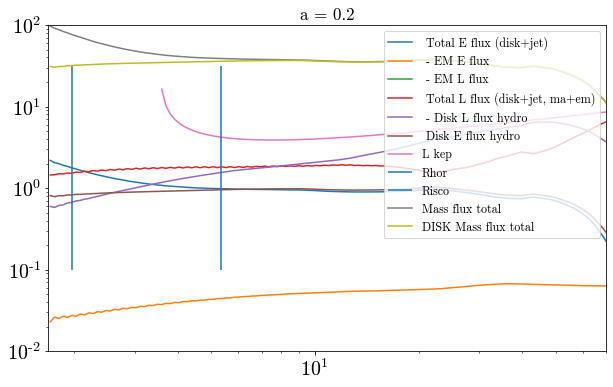

In [225]:
plt.figure(figsize=(10,6))
fs = 12

plt.title("a = 0.2", fontsize = fs+5)

plt.loglog(r[0,:,ny//2,0], fEtotEMMA/fMdisk[iofr(10)], label=" Total E flux (disk+jet) ")
plt.loglog(r[0,:,ny//2,0], - fEtotEM/fMdisk[iofr(10)], label=" - EM E flux ")

plt.loglog(r[0,:,ny//2,0], - fLtotEM/fMdisk[iofr(10)], label=" - EM L flux ")


plt.loglog(r[0,:,ny//2,0], fLtotEMMA /fMdisk[iofr(10)] , label=" Total L flux (disk+jet, ma+em)")

plt.loglog(r[0,:,ny//2,0], - fLdiskMA / fMdisk[iofr(10)], label=" - Disk L flux hydro")
plt.loglog(r[0,:,ny//2,0], fEdiskMA / fMdisk[iofr(10)], label=" Disk E flux hydro")

#plt.loglog(r[:,ny//2,0], fLdiskEM_00 / fM_00[iofr(10)], label=" Disk L flux EM")


#plt.loglog(r[:,ny//2,0], fEdiskMA_02 / fM_02, label=" Disk L flux hydro")

plt.loglog(r[0,:,ny//2,0], lk(-0.5,r[0,:,ny//2,0]) , label="L kep")

plt.vlines(rhor, 10**-1, 10**1.5, label="Rhor")
plt.vlines(Risco(a), 10**-1, 10**1.5, label = "Risco")
#plt.loglog(r[:,ny//2,0], Mdot, label="current Mass flux")
plt.loglog(r[0,:,ny//2,0], fM, label="Mass flux total")
plt.loglog(r[0,:,ny//2,0], fMdisk, label="DISK Mass flux total")

#plt.loglog(r[:,ny//2,0], -fEM_02 /fM_02 , label="- EM flux")
#plt.loglog(r[:,ny//2,0], - powj_02 /fM_02 , label="- Jet power")



plt.ylim(1e-2,100)
plt.xlim(Rin,70)
#plt.loglog(r[:,ny//2,0],rho[:,ny//2,0]*10)
plt.legend(fontsize = fs, loc=1)

In [191]:
klist[i] = (2*np.pi*omegaf_01/OmegaH).mean(-1)
klist[i]

0.12470124661922455

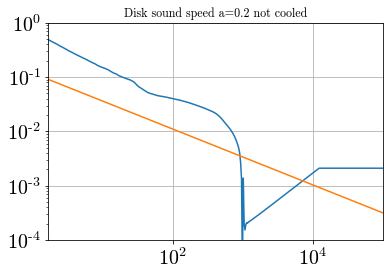

In [57]:
plt.figure()
plt.loglog(r[0][:,ny-1,0],csdisk_02)
plt.loglog(r[0][:,ny-1,0],cs_th_jet)
plt.ylim(1e-4,1e0)
plt.xlim(Rin,Rout)
plt.title("Disk sound speed a=0.2 not cooled")
plt.grid()

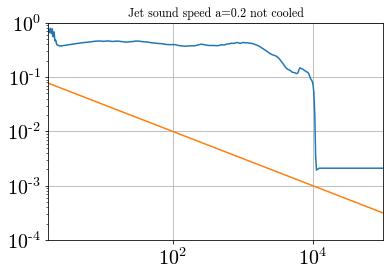

In [58]:
cs_th_jet = (0.1*r[0][:,0:3,:]**(-0.5)).mean(axis=1).mean(axis=-1)
cs_th_disk = 0.1*r[0][:,ny//2,0]**(-0.5)

plt.figure()
plt.loglog(r[0][:,ny-1,0],csjet_02)
plt.loglog(r[0][:,ny-1,0],cs_th_jet)
plt.ylim(1e-4,1e0)
plt.xlim(Rin,Rout)
plt.title("Jet sound speed a=0.2 not cooled")
plt.grid()

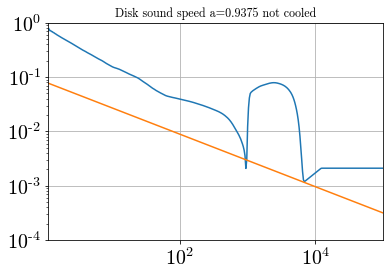

In [64]:
plt.figure()
plt.loglog(r[0][:,ny-1,0],csdisk_09375)
plt.loglog(r[0][:,ny-1,0],cs_th_jet)
plt.ylim(1e-4,1e0)
plt.xlim(Rin,Rout)
plt.title("Disk sound speed a=0.9375 not cooled")
plt.grid()

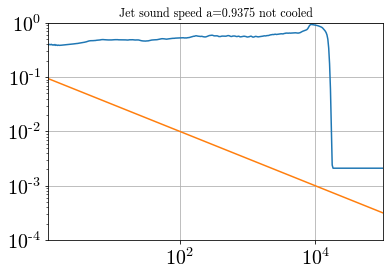

In [65]:
cs_th_jet = (0.1*r[0][:,0:3,:]**(-0.5)).mean(axis=1).mean(axis=-1)
cs_th_disk = 0.1*r[0][:,ny//2,0]**(-0.5)

plt.figure()
plt.loglog(r[0][:,ny-1,0],csjet_09375)
plt.loglog(r[0][:,ny-1,0],cs_th_jet)
plt.ylim(1e-4,1e0)
plt.xlim(Rin,Rout)
plt.title("Jet sound speed a=0.9375 not cooled")
plt.grid()

## a = -0.5 not cooled

In [19]:
#Set directory
#dir = "C:\H-AMR\HAMR\HAMR_CPU" 
dir = r'D:\H-AMRdata\highresMADs\no_cool_disk\a-05'
os.chdir(dir) 

D=200

#Run read-in of data
rblock_new(D)
rpar_new(D)
rgdump_griddata(dir)
rdump_griddata(dir,D)
#set_uniform_grid()
misc_calc(calc_bu=1, calc_bsq=1, calc_eu=RESISTIVE, calc_esq=RESISTIVE)
psicalc(0,0)
#calc_RAD()
#set_pole()

In [20]:
ta_an5 = np.load("a-05_avg1d_121621.npz")
#for key in ta_a94_cool: print(key) = np.load("a-09_avg1d_121621.npz")

In [21]:
spinup_an5 = {}
diskcut = 7

spinup_an5 = calc_spinup_param_1d(ta_an5,diskcut,a)

print(spinup_an5['sMA'])
print(spinup_an5['sEM'])
print(spinup_an5['stot'])

### to do: write s dictionaries to a file

s_MA at 7rg:     1.492
s_EM at 7rg:     2.833
s_tot at 7rg:     4.325
1.492397129535675
2.8328055813908577
4.32520192861557


C:\Users\Beverly\Documents\HAMR_macros\pp.py:4: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # from __future__ import division__future__ import division
C:\Users\Beverly\Documents\HAMR_macros\pp.py:12: RuntimeWarning: invalid value encountered in sqrt
  # from sympy import *


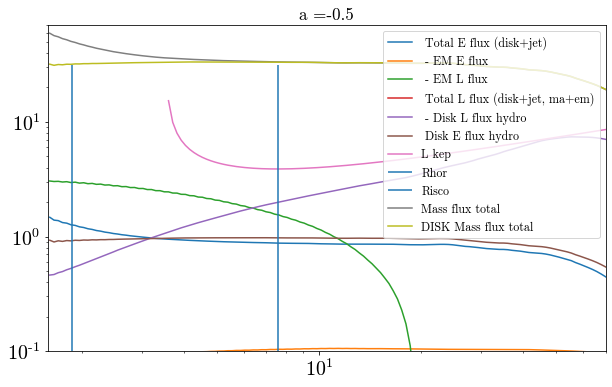

In [216]:
plt.figure(figsize=(10,6))
fs = 12

plt.title("a =-0.5", fontsize = fs+5)

plt.loglog(r[0,:,ny//2,0], fEtotEMMA/fMdisk[iofr(10)], label=" Total E flux (disk+jet) ")
plt.loglog(r[0,:,ny//2,0], - fEtotEM/fMdisk[iofr(10)], label=" - EM E flux ")

plt.loglog(r[0,:,ny//2,0], - fLtotEM/fMdisk[iofr(10)], label=" - EM L flux ")


plt.loglog(r[0,:,ny//2,0], fLtotEMMA /fMdisk[iofr(10)] , label=" Total L flux (disk+jet, ma+em)")

plt.loglog(r[0,:,ny//2,0], - fLdiskMA / fMdisk[iofr(10)], label=" - Disk L flux hydro")
plt.loglog(r[0,:,ny//2,0], fEdiskMA / fMdisk[iofr(10)], label=" Disk E flux hydro")

#plt.loglog(r[:,ny//2,0], fLdiskEM_00 / fM_00[iofr(10)], label=" Disk L flux EM")


#plt.loglog(r[:,ny//2,0], fEdiskMA_02 / fM_02, label=" Disk L flux hydro")

plt.loglog(r[0,:,ny//2,0], lk(-0.5,r[0,:,ny//2,0]) , label="L kep")

plt.vlines(rhor, 10**-1, 10**1.5, label="Rhor")
plt.vlines(Risco(a), 10**-1, 10**1.5, label = "Risco")
#plt.loglog(r[:,ny//2,0], Mdot, label="current Mass flux")
plt.loglog(r[0,:,ny//2,0], fM, label="Mass flux total")
plt.loglog(r[0,:,ny//2,0], fMdisk, label="DISK Mass flux total")

#plt.loglog(r[:,ny//2,0], -fEM_02 /fM_02 , label="- EM flux")
#plt.loglog(r[:,ny//2,0], - powj_02 /fM_02 , label="- Jet power")



plt.ylim(1e-1,70)
plt.xlim(Rin,70)
#plt.loglog(r[:,ny//2,0],rho[:,ny//2,0]*10)
plt.legend(fontsize = fs, loc=1)

In [38]:
i=3

rhorlist[i]=rhor
OmegaH = a /(2*rhor)
OmegaHlist[i] = OmegaH

# for a=0.0
istart = 2000
iend = 3710
istep = 10

In [135]:
umaxcount = 0
umincount = 0

for i in range(istart, iend, istep):
    #load vars this time step
    rfd("fieldline%04d.bin" % i)
    ud = (gv3[:,:]*uu[:,None]).sum(0)
    
    v1=uu
    v2=ud
    
    dot = v1[0]*v2[0] + v1[1]*v2[1] + v1[2]*v2[2] + v1[3]*v2[3]
    print(pshape(dot))
    if np.min(dot)<-1-1e-4:
        print("!!! ", np.min(dot))
        umincount+=1
    if np.max(dot)>-1+1e-4:
        print("!!! ", np.min(dot))
        umaxcount+=1

Opening fieldline2000.bin ...
rfdheader: t=10000
Found 30 header items, reading them in and setting EP3=THETAROT=0.0

Loading gdetB data...
No data on gdetF, setting it to None.
No data on Bstag, setting it to B.
No data on KAPPA and FLR
No data on luminosity (cooling off?)
(288, 128, 32)
None
Opening fieldline2010.bin ...
rfdheader: t=10050
Found 30 header items, reading them in and setting EP3=THETAROT=0.0

Loading gdetB data...
No data on gdetF, setting it to None.
No data on Bstag, setting it to B.
No data on KAPPA and FLR
No data on luminosity (cooling off?)
(288, 128, 32)
None
Opening fieldline2020.bin ...
rfdheader: t=10100
Found 30 header items, reading them in and setting EP3=THETAROT=0.0

Loading gdetB data...
No data on gdetF, setting it to None.
No data on Bstag, setting it to B.
No data on KAPPA and FLR
No data on luminosity (cooling off?)
(288, 128, 32)
None
Opening fieldline2030.bin ...
rfdheader: t=10150
Found 30 header items, reading them in and setting EP3=THETAROT=0.

In [217]:
fLdiskMA = fLdiskMA_n05
fEdiskMA = fEdiskMA_n05
fMdisk = fMdisk_n05
fM = fM_n05
fEtotEM = fEtotEM_n05
fLtotEM = fLtotEM_n05
fEtotEMMA = fEtotEMMA_n05
fLtotEMMA = fLtotEMMA_n05
fLtot_cond = fLtot_cond_n05
fEtot_cond = fEtot_cond_n05

In [136]:
print(umincount,umaxcount)

0 0


C:\Users\Beverly\Documents\HAMR_macros\pp.py:4: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # from __future__ import division__future__ import division
C:\Users\Beverly\Documents\HAMR_macros\pp.py:12: RuntimeWarning: invalid value encountered in sqrt
  # from sympy import *


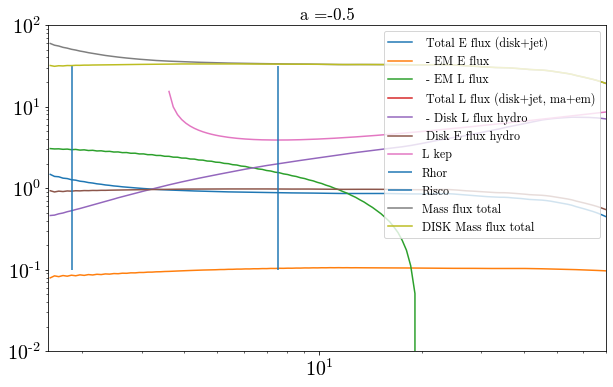

In [218]:
plt.figure(figsize=(10,6))
fs = 12

plt.title("a =-0.5", fontsize = fs+5)

plt.loglog(r[0,:,ny//2,0], fEtotEMMA_n05/fMdisk_n05[iofr(10)], label=" Total E flux (disk+jet) ")
plt.loglog(r[0,:,ny//2,0], - fEtotEM_n05/fMdisk_n05[iofr(10)], label=" - EM E flux ")

plt.loglog(r[0,:,ny//2,0], - fLtotEM_n05/fMdisk_n05[iofr(10)], label=" - EM L flux ")


plt.loglog(r[0,:,ny//2,0], fLtotEMMA_n05 /fMdisk_n05[iofr(10)] , label=" Total L flux (disk+jet, ma+em)")

plt.loglog(r[0,:,ny//2,0], - fLdiskMA_n05 / fMdisk_n05[iofr(10)], label=" - Disk L flux hydro")
plt.loglog(r[0,:,ny//2,0], fEdiskMA_n05 / fMdisk_n05[iofr(10)], label=" Disk E flux hydro")

#plt.loglog(r[:,ny//2,0], fLdiskEM_00 / fM_00[iofr(10)], label=" Disk L flux EM")


#plt.loglog(r[:,ny//2,0], fEdiskMA_02 / fM_02, label=" Disk L flux hydro")

plt.loglog(r[0,:,ny//2,0], lk(-0.5,r[0,:,ny//2,0]) , label="L kep")

plt.vlines(rhor, 10**-1, 10**1.5, label="Rhor")
plt.vlines(Risco(a), 10**-1, 10**1.5, label = "Risco")
#plt.loglog(r[:,ny//2,0], Mdot, label="current Mass flux")
plt.loglog(r[0,:,ny//2,0], fM_n05, label="Mass flux total")
plt.loglog(r[0,:,ny//2,0], fMdisk_n05, label="DISK Mass flux total")

#plt.loglog(r[:,ny//2,0], -fEM_02 /fM_02 , label="- EM flux")
#plt.loglog(r[:,ny//2,0], - powj_02 /fM_02 , label="- Jet power")



plt.ylim(1e-2,100)
plt.xlim(Rin,70)
#plt.loglog(r[:,ny//2,0],rho[:,ny//2,0]*10)
plt.legend(fontsize = fs, loc=1)

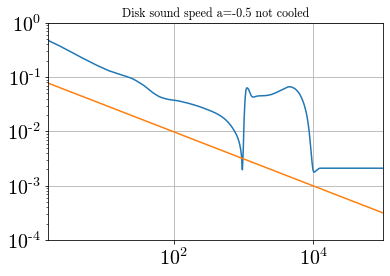

In [41]:
plt.figure()
plt.loglog(r[0][:,ny-1,0],csdisk_n05)
plt.loglog(r[0][:,ny-1,0],cs_th_jet)
plt.ylim(1e-4,1e0)
plt.xlim(Rin,Rout)
plt.title("Disk sound speed a=-0.5 not cooled")
plt.grid()

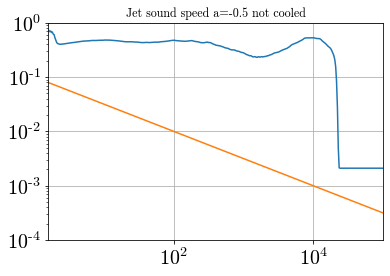

In [43]:
cs_th_jet = (0.1*r[0][:,0:3,:]**(-0.5)).mean(axis=1).mean(axis=-1)
cs_th_disk = 0.1*r[0][:,ny//2,0]**(-0.5)

plt.figure()
plt.loglog(r[0][:,ny-1,0],csjet_n05)
plt.loglog(r[0][:,ny-1,0],cs_th_jet)
plt.ylim(1e-4,1e0)
plt.xlim(Rin,Rout)
plt.title("Jet sound speed a=-0.5 not cooled")
plt.grid()

In [ ]:
print(lhydro_5rg)
print(lhydro_10rg)

In [ ]:
plt.plot(h[iofr(rhor),:,0]*180/np.pi, 2*np.pi*omegaf_00 , label="omega F")
#plt.plot(h[iofr(rhor),:,0]*180/np.pi,2*np.pi*omegaf2b[iofr(rhor), :, 0])
plt.plot(h[iofr(rhor),:,0]*180/np.pi,2*np.pi*omegaf2b[iofr(rhor), :, :].mean(-1))
plt.legend()

In [ ]:
klist[i] = (2*np.pi*omegaf_00/OmegaH).mean(-1) #averaging in theta
klist[i] = 0

In [ ]:
pshape(omegaf_00)

## a=-0.9 not cooled

In [22]:
#This blocks needs to be run to read in files 
global notebook, axisym,set_cart,axisym,REF_1,REF_2,REF_3,set_cart,D,print_fieldlines 
global lowres1,lowres2,lowres3, RAD_M1, RESISTIVE, export_raytracing_GRTRANS, export_raytracing_RAZIEH,r1,r2,r3
global r_min, r_max, theta_min, theta_max, phi_min, phi_max, do_griddata, do_box, check_files, kerr_schild

#Set directory
#dir = "C:\H-AMR\HAMR\HAMR_CPU" 
dir = r'D:\H-AMRdata\highresMADs\no_cool_disk\a-09'
os.chdir(dir) 

D=700

#Run read-in of data
rblock_new(D)
rpar_new(D)
rgdump_griddata(dir)
rdump_griddata(dir,D)
#set_uniform_grid()
misc_calc(calc_bu=1, calc_bsq=1, calc_eu=RESISTIVE, calc_esq=RESISTIVE)
psicalc(0,0)
#calc_RAD()
#set_pole()

In [23]:
(ug/rho).max()
a

In [24]:
rhor_an9=rhor
ta_an9 = np.load("a-09_avg1d_121621.npz")
#for key in ta_a94_cool: print(key) = np.load("a-09_avg1d_121621.npz")

In [26]:
spinup_an9 = {}
diskcut = 7

spinup_an9 = calc_spinup_param_1d(ta_an9,diskcut,a)

print(spinup_an9['sMA'])
print(spinup_an9['sEM'])
print(spinup_an9['stot'])

### to do: write s dictionaries to a file

s_MA at 7rg:     2.041
s_EM at 7rg:     3.095
s_tot at 7rg:     5.136
2.040900230407715
3.0949034214019777
5.135804462432861


# h/r=0.1 cooled disks

## a = 0.9375 cooled

In [27]:
#This blocks needs to be run to read in files 
global notebook, axisym,set_cart,axisym,REF_1,REF_2,REF_3,set_cart,D,print_fieldlines 
global lowres1,lowres2,lowres3, RAD_M1, RESISTIVE, export_raytracing_GRTRANS, export_raytracing_RAZIEH,r1,r2,r3
global r_min, r_max, theta_min, theta_max, phi_min, phi_max, do_griddata, do_box, check_files, kerr_schild

#Set directory
#dir = "C:\H-AMR\HAMR\HAMR_CPU" 
dir = r'D:\H-AMRdata\highresMADs\cool_disk\a09375_cooled'
os.chdir(dir) 

D=200

#Run read-in of data
rblock_new(D)
rpar_new(D)
rgdump_griddata(dir)
rdump_griddata(dir,D)
#set_uniform_grid()
misc_calc(calc_bu=1, calc_bsq=1, calc_eu=RESISTIVE, calc_esq=RESISTIVE)
psicalc(0,0)
#calc_RAD()
#set_pole()

In [28]:
ta_a94_cool = np.load("a09375_cooled_Bfield_avg1d_v6.npz")
for key in ta_a94_cool: print(key)

rho_1d
gdet_1d
thick_1d
den1_1d
fM_1d
fMdisk_1d
ug_1d
PhiBH_1d
ud3num_1d
omegaf_1d
B1_2d_1d
B1_disk_1d
B2_2d_1d
B2_disk_1d
B3_2d_1d
B3_disk_1d
Babs1_1d
Babs1_disk_1d
Babs2_1d
Babs3_disk_1d
Babs3_1d
Bsq1_1d
Bsq1_disk_1d
Bsq2_1d
Bsq2_disk_1d
Bsq3_1d
Bsq3_disk_1d
Bsq_tot_1d
Bsq_disktot_1d
ug_tot_1d
ug_disktot_1d
B_tot_1d
B_disktot_1d
aphi_ta_1d
aphi_disk_1d
uu31d_1d
fEdiskMA_1d
fEtotEMMA_1d
fEtotEM_1d
fLdiskMA_1d
fLtotEMMA_1d
fLtotEM_1d
fEtot_cond_1d
fLtot_cond_1d
dxdx3_1d


C:\Users\Beverly\Documents\HAMR_macros\pp.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # coding: utf-8


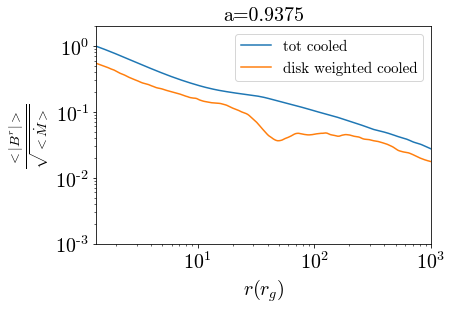

In [29]:
plt.loglog(r[0,:,ny//2,0], r[0,:,ny//2,0]*(ta_a94_cool['Babs1_1d']).mean(-1)*dxdxp[1,1][0,:,ny//2,0]/np.sqrt(ta_a94_cool['fMdisk_1d'][iofr(7)]), label="tot cooled")
plt.loglog(r[0,:,ny//2,0], r[0,:,ny//2,0]*(ta_a94_cool['Babs1_disk_1d']).mean(-1)*dxdxp[1,1][0,:,ny//2,0]/((ta_a94_cool['den1_1d'].mean(-1))*np.sqrt(ta_a94_cool['fMdisk_1d'][iofr(7)])), label="disk weighted cooled")


#plt.loglog(r[0,:,ny//2,0], r[0,:,ny//2,0]*(Babs1_09375).mean(-1)*dxdxp[1,1][0,:,ny//2,0]/np.sqrt(fMdisk_09375[iofr(7)]), label="tot")
#plt.loglog(r[0,:,ny//2,0], r[0,:,ny//2,0]*(Babs1_disk_09375).mean(-1)*dxdxp[1,1][0,:,ny//2,0]/((den1_09375.mean(-1))*np.sqrt(fMdisk_09375[iofr(7)])), label="disk weighted")
plt.xlim(rhor,1e3)

plt.xlim(rhor,1e3)
plt.ylim(1e-3,2)
plt.ylabel(r"$\frac{<|B^r|>}{ \sqrt{<\dot{M}>}}$")
plt.xlabel(r"$r (r_g)$")
plt.title("a=0.9375",fontsize=20)
plt.legend(fontsize=15)

In [30]:
plt.loglog(r[0,:,ny//2,0], r[0,:,ny//2,0]*(Babs1_09375cooled).mean(-1)*dxdxp[1,1][0,:,ny//2,0]/np.sqrt(fMdisk_09375cooled[iofr(7)]), label="tot cooled")
plt.loglog(r[0,:,ny//2,0], r[0,:,ny//2,0]*(Babs1_disk_09375cooled).mean(-1)*dxdxp[1,1][0,:,ny//2,0]/((den1_09375cooled.mean(-1))*np.sqrt(fMdisk_09375cooled[iofr(7)])), label="disk weighted cooled")


plt.loglog(r[0,:,ny//2,0], r[0,:,ny//2,0]*(Babs1_09375).mean(-1)*dxdxp[1,1][0,:,ny//2,0]/np.sqrt(fMdisk_09375[iofr(7)]), label="tot")
plt.loglog(r[0,:,ny//2,0], r[0,:,ny//2,0]*(Babs1_disk_09375).mean(-1)*dxdxp[1,1][0,:,ny//2,0]/((den1_09375.mean(-1))*np.sqrt(fMdisk_09375[iofr(7)])), label="disk weighted")
plt.xlim(rhor,1e3)

plt.xlim(rhor,1e3)
plt.ylim(1e-3,2)
plt.ylabel(r"$\frac{<|B^r|>}{ \sqrt{<\dot{M}>}}$")
plt.xlabel(r"$r (r_g)$")
plt.title("a=0.9375",fontsize=20)
plt.legend(fontsize=15)

NameError: name 'Babs1_09375cooled' is not defined

In [ ]:
plt.loglog(r[0,:,ny//2,0], r[0,:,ny//2,0]*((ta_a94_cool['Babs2']).mean(-1)*dxdxp[2,2][0,:,ny//2,0]/np.sqrt(ta_a94_cool['fMdisk_1d'][iofr(7)])), label="tot cooled")
plt.loglog(r[0,:,ny//2,0], r[0,:,ny//2,0]*(ta_a94_cool['Babs2_disk']).mean(-1)*dxdxp[2,2][0,:,ny//2,0]/((ta_a94_cool['den1_1d'].mean(-1))*np.sqrt(fMdisk_09375cooled[iofr(7)])), label="disk weighted cooled")


#plt.loglog(r[0,:,ny//2,0], r[0,:,ny//2,0]*(Babs2_09375).mean(-1)*dxdxp[2,2][0,:,ny//2,0]/np.sqrt(fMdisk_09375[iofr(7)]), label="tot")
#plt.loglog(r[0,:,ny//2,0], r[0,:,ny//2,0]*(Babs2_disk_09375).mean(-1)*dxdxp[2,2][0,:,ny//2,0]/((den1_09375.mean(-1))*np.sqrt(fMdisk_09375[iofr(7)])), label="disk weighted")
plt.xlim(rhor,1e3)

plt.xlim(rhor,2e2)
plt.ylim(1e-3,0.2)
plt.ylabel(r"$\frac{<|B^\theta|>}{ \sqrt{<\dot{M}>}}$")
plt.xlabel(r"$r (r_g)$")
plt.title("a=0.9375",fontsize=20)
plt.legend(fontsize=15)

In [31]:
plt.loglog(r[0,:,ny//2,0], r[0,:,ny//2,0]*(Babs2_09375cooled).mean(-1)*dxdxp[2,2][0,:,ny//2,0]/np.sqrt(fMdisk_09375cooled[iofr(7)]), label="tot cooled")
plt.loglog(r[0,:,ny//2,0], r[0,:,ny//2,0]*(Babs2_disk_09375cooled).mean(-1)*dxdxp[2,2][0,:,ny//2,0]/((den1_09375cooled.mean(-1))*np.sqrt(fMdisk_09375cooled[iofr(7)])), label="disk weighted cooled")


plt.loglog(r[0,:,ny//2,0], r[0,:,ny//2,0]*(Babs2_09375).mean(-1)*dxdxp[2,2][0,:,ny//2,0]/np.sqrt(fMdisk_09375[iofr(7)]), label="tot")
plt.loglog(r[0,:,ny//2,0], r[0,:,ny//2,0]*(Babs2_disk_09375).mean(-1)*dxdxp[2,2][0,:,ny//2,0]/((den1_09375.mean(-1))*np.sqrt(fMdisk_09375[iofr(7)])), label="disk weighted")
plt.xlim(rhor,1e3)

plt.xlim(rhor,2e2)
plt.ylim(1e-3,0.2)
plt.ylabel(r"$\frac{<|B^\theta|>}{ \sqrt{<\dot{M}>}}$")
plt.xlabel(r"$r (r_g)$")
plt.title("a=0.9375",fontsize=20)
plt.legend(fontsize=15)

NameError: name 'Babs2_09375cooled' is not defined

In [64]:
plt.loglog(h[0,10,:,0], (Babs2_09375cooled).mean(-1)*dxdxp[2,2][0,:,ny//2,0]/np.sqrt(fMdisk_09375cooled[iofr(7)]), label="tot cooled")
plt.loglog(h[0,10,:,0], (Babs2_disk_09375cooled).mean(-1)*dxdxp[2,2][0,:,ny//2,0]/((den1_09375cooled.mean(-1))*np.sqrt(fMdisk_09375cooled[iofr(7)])), label="disk weighted cooled")


plt.loglog(h[0,10,:,0], (Babs2_09375).mean(-1)*dxdxp[2,2][0,10,:,0]/np.sqrt(fMdisk_09375[iofr(7)]), label="tot")
plt.loglog(h[0,10,:,0], (Babs2_disk_09375).mean(-1)*dxdxp[2,2][0,10,:,0]/((den1_09375.mean(-1))*np.sqrt(fMdisk_09375[iofr(7)])), label="disk weighted")
plt.xlim(rhor,1e3)

plt.xlim(rhor,2e2)
plt.ylim(1e-3,0.2)
plt.ylabel(r"$\frac{<|B^\theta|>}{ \sqrt{<\dot{M}>}}$")
plt.xlabel(r"$r (r_g)$")
plt.title("a=0.9375",fontsize=20)
plt.legend(fontsize=15)

NameError: name 'Babs2_09375cooled' is not defined

In [65]:
plt.loglog(r[0,:,ny//2,0], r[0,:,ny//2,0]*Babs1_09375cooled.sum(axis=-1)*dxdxp[1,1][0,:,ny//2,0]/np.sqrt(fMdisk_09375cooled[iofr(7)]), label="cooled")
plt.loglog(r[0,:,ny//2,0], r[0,:,ny//2,0]*Babs1_09375.sum(axis=-1)*dxdxp[1,1][0,:,ny//2,0]/np.sqrt(fMdisk_09375[iofr(7)]), label="not cooled")
plt.xlim(rhor,1e3)
plt.ylim(1e0,1e3)
plt.ylabel(r"$<|B^r|>$")
plt.xlabel(r"$r (r_g)$")
plt.title("a=0.9375",fontsize=20)
plt.legend(fontsize=15)

NameError: name 'Babs1_09375cooled' is not defined

In [66]:
plt.figure(figsize=(10,8))

plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, (Bsq1_09375cooled*dxdxp[1,1][0,:,:,0]**2)[iofr(20),:], label=r"$<B^{r,2}>$ cooled")
plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, (B1_2d_09375cooled*dxdxp[1,1][0,:,:,0])[iofr(20),:]**2, label=r"$<B^r>^2$ cooled")

plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, (Bsq1_09375*dxdxp[1,1][0,:,:,0]**2)[iofr(20),:], label=r"$<B^{r,2}>$")
plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, (B1_2d_09375*dxdxp[1,1][0,:,:,0])[iofr(20),:]**2, label=r"$<B^r>^2$")

plt.xlabel(r"$\theta - \pi/2$")

plt.legend(fontsize=15)

NameError: name 'Bsq1_09375cooled' is not defined

<Figure size 720x576 with 0 Axes>

In [67]:
Bsq3_09375cooled = np.sqrt(Bsq1_09375cooled)*dxdxp[1,1][0,:,:,0]   #consistent

Bsq2_09375cooled = np.sqrt(Bsq1_09375cooled*gcov[1,1][0,:,:,0])    #if we used this, then instead compare to Babs1_09375cooled*sqrt(gcov)

NameError: name 'Bsq1_09375cooled' is not defined

In [68]:
gcov.shape

 $<|B^r|>$ before and after pinch


In [69]:
plt.figure(figsize=(10,8))

plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, (Babs1_09375cooled*dxdxp[1,1][0,:,:,0])[iofr(3),:]/np.sqrt(fMdisk_09375cooled[iofr(7)]), label=r"$r=3$ cooled")
plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, (Babs1_09375cooled*dxdxp[1,1][0,:,:,0])[iofr(25),:]/np.sqrt(fMdisk_09375cooled[iofr(7)]), label=r"$r=25$ cooled")

plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, Bsq2_09375cooled[iofr(25),:]/np.sqrt(fMdisk_09375cooled[iofr(7)]), label=r"$r=25$ cooled bs2")
plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, Bsq2_09375cooled[iofr(3),:]/np.sqrt(fMdisk_09375cooled[iofr(7)]), label=r"$r=3$ cooled bs2")


plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, (Babs1_09375*dxdxp[1,1][0,:,:,0])[iofr(3),:]/np.sqrt(fMdisk_09375[iofr(7)]), label=r"$r=3$ ")
plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, (Babs1_09375*dxdxp[1,1][0,:,:,0])[iofr(25),:]/np.sqrt(fMdisk_09375[iofr(7)]), label=r"$r=25$ ")
#plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, (Bsq1_09375*dxdxp[1,1][0,:,:,0]**2)[iofr(20),:], label=r"$<B^{r,2}>$")
#plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, (B1_2d_09375*dxdxp[1,1][0,:,:,0])[iofr(20),:]**2, label=r"$<B^r>^2$")

plt.xlabel(r"$\theta - \pi/2$")

plt.legend(fontsize=15)

NameError: name 'Babs1_09375cooled' is not defined

<Figure size 720x576 with 0 Axes>

In [70]:
plt.figure(figsize=(10,8))

plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, (Babs1_09375cooled*dxdxp[1,1][0,:,:,0])[iofr(3),:]/np.sqrt(fMdisk_09375cooled[iofr(7)]), label=r"$r=3$ cooled")
plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, (Babs1_09375cooled*dxdxp[1,1][0,:,:,0])[iofr(25),:]/np.sqrt(fMdisk_09375cooled[iofr(7)]), label=r"$r=25$ cooled")


plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, (Babs1_09375*dxdxp[1,1][0,:,:,0])[iofr(3),:]/np.sqrt(fMdisk_09375[iofr(7)]), label=r"$r=3$ ")
plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, (Babs1_09375*dxdxp[1,1][0,:,:,0])[iofr(25),:]/np.sqrt(fMdisk_09375[iofr(7)]), label=r"$r=25$ ")
#plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, (Bsq1_09375*dxdxp[1,1][0,:,:,0]**2)[iofr(20),:], label=r"$<B^{r,2}>$")
#plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, (B1_2d_09375*dxdxp[1,1][0,:,:,0])[iofr(20),:]**2, label=r"$<B^r>^2$")

plt.xlabel(r"$\theta - \pi/2$")

plt.legend(fontsize=15)

NameError: name 'Babs1_09375cooled' is not defined

<Figure size 720x576 with 0 Axes>

In [71]:
(Babs1_09375cooled*dxdxp[1,1][0,:,:,0])[iofr(3),:].shape
#Bsq1_09375cooled*dxdxp[1,1][0,:,:,0]**2)[iofr(20),:]

NameError: name 'Babs1_09375cooled' is not defined

In [72]:
plt.figure(figsize=(10,10))

#plt.semilogy(h[0,10,:,0] , (Bsq1_09375cooled).sum(axis=1).sum(axis=-1)*dxdxp[2,2][0,10,:,0]/np.sqrt(fMdisk_09375cooled[iofr(7)]), label="tot cooled")
plt.semilogy(h[0,100,:,0]-np.pi/2, (Bsq1_disk_09375cooled*dxdxp[1,1][0,:,:,0])/((den1_09375cooled.sum(axis=0)))**2, label="disk weighted cooled")


#plt.semilogy(h[0,10,:,0], (Bsq1_09375).sum(axis=1).sum(axis=-1)*dxdxp[2,2][0,10,:,0]/np.sqrt(fMdisk_09375[iofr(7)]), label="tot")
plt.semilogy(h[0,100,:,0]-np.pi/2, (Bsq1_disk_09375*dxdxp[1,1][0,:,:,0]).sum(axis=0).sum(axis=-1)/((den1_09375.sum(axis=0)))**2, label="disk weighted not cooled")
#plt.xlim(rhor,1e3)


#plt.semilogy(h[0,10,:,0] , (Bsq1_09375cooled).sum(axis=1).sum(axis=-1)*dxdxp[2,2][0,10,:,0]/np.sqrt(fMdisk_09375cooled[iofr(7)]), label="tot cooled")
plt.semilogy(h[0,10,:,0]-np.pi/2, ((B1_disk_09375cooled*dxdxp[1,1][0,:,:,0]).sum(axis=0).sum(axis=-1))**2/((den1_09375cooled.sum(axis=0)))**2,label="disk weighted cooled <B>^2")


#plt.semilogy(h[0,10,:,0], (Bsq1_09375).sum(axis=1).sum(axis=-1)*dxdxp[2,2][0,10,:,0]/np.sqrt(fMdisk_09375[iofr(7)]), label="tot")
plt.semilogy(h[0,10,:,0]-np.pi/2, ((B1_disk_09375*dxdxp[1,1][0,:,:,0]).sum(axis=0).sum(axis=-1))**2/((den1_09375.sum(axis=0)))**2,label="disk weighted not cooled <B>^2")
#plt.xlim(rhor,1e3)

#plt.xlim(rhor,2e2)
#plt.ylim(1e-3,0.2)
plt.ylabel(r"$<B^{r,2}>$")
plt.xlabel(r"$\theta$")
plt.title("a=0.9375",fontsize=20)
plt.legend(fontsize=15)

NameError: name 'Bsq1_disk_09375cooled' is not defined

<Figure size 720x720 with 0 Axes>

In [73]:
plt.figure(figsize=(10,8))

plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, (Bsq1_09375cooled*dxdxp[1,1][0,:,:,0]**2)[iofr(20),:], label=r"$<B^{r,2}>$ cooled")
plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, (B1_2d_09375cooled*dxdxp[1,1][0,:,:,0])[iofr(20),:]**2, label=r"$<B^r>^2$ cooled")

plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, (Bsq1_09375*dxdxp[1,1][0,:,:,0]**2)[iofr(20),:], label=r"$<B^{r,2}>$")
plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, (B1_2d_09375*dxdxp[1,1][0,:,:,0])[iofr(20),:]**2, label=r"$<B^r>^2$")

plt.xlabel(r"$\theta - \pi/2$")

plt.legend(fontsize=15)

NameError: name 'Bsq1_09375cooled' is not defined

<Figure size 720x576 with 0 Axes>

In [331]:
deltaB=(Bsq1_09375*gcov[1,1][0,:,:,0])-((B1_2d_09375**2*gcov[1,1][0,:,:,0])) 
deltaBcooled=(Bsq1_09375cooled*gcov[1,1][0,:,:,0])-((B1_2d_09375cooled**2*gcov[1,1][0,:,:,0])) 

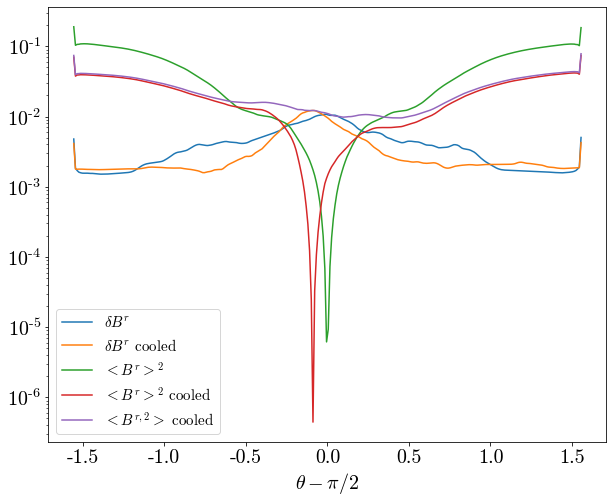

In [338]:
plt.figure(figsize=(10,8))

plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, deltaB[iofr(10),:], label=r"$\delta B^r$")
plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, deltaBcooled[iofr(10),:], label=r"$\delta B^r$ cooled")


#plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, (B1_2d_09375*gcov[1,1][0,:,:,0])[iofr(20),:], label=r"$<B^r>^2$")
#plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, (B1_2d_09375cooled*gcov[1,1][0,:,:,0])[iofr(20),:]**2, label=r"$<B^r>^2$ cooled")

plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, (B1_2d_09375**2*gcov[1,1][0,:,:,0])[iofr(10),:], label=r"$<B^r>^2$")
plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, (B1_2d_09375cooled**2*gcov[1,1][0,:,:,0])[iofr(10),:], label=r"$<B^r>^2$ cooled")

plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, (Bsq1_09375cooled*gcov[1,1][0,:,:,0])[iofr(10),:], label=r"$<B^{r,2}>$ cooled")


plt.xlabel(r"$\theta - \pi/2$")

plt.legend(fontsize=15)

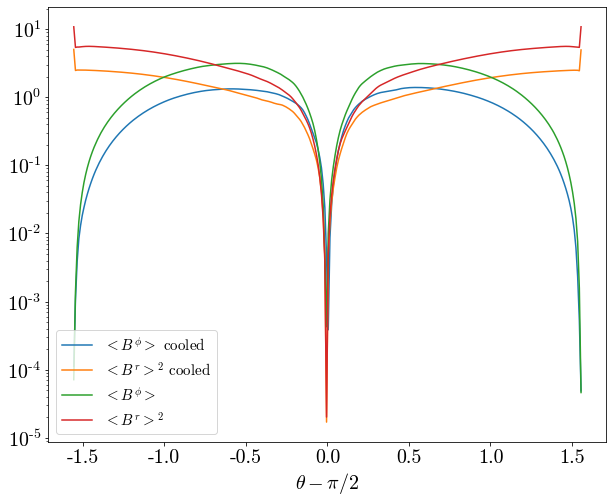

In [344]:
plt.figure(figsize=(10,8))

plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, (B3_2d_09375cooled**2*gcov[3,3][0,:,:,0])[iofr(3),:], label=r"$<B^{\phi}>$ cooled")
plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, (B1_2d_09375cooled**2*gcov[1,1][0,:,:,0])[iofr(3),:], label=r"$<B^r>^2$ cooled")


plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, (B3_2d_09375**2*gcov[3,3][0,:,:,0])[iofr(3),:], label=r"$<B^{\phi}>$ ")
plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, (B1_2d_09375**2*gcov[1,1][0,:,:,0])[iofr(3),:], label=r"$<B^r>^2$ ")
plt.xlabel(r"$\theta - \pi/2$")

plt.legend(fontsize=15)

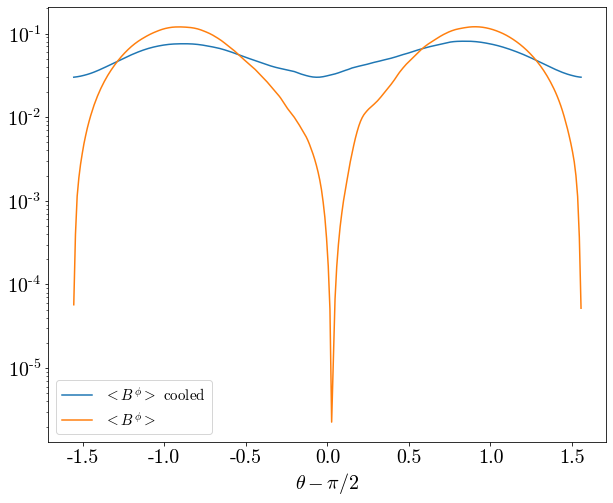

In [342]:
plt.figure(figsize=(10,8))

plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, (B3_2d_09375cooled**2*gcov[3,3][0,:,:,0])[iofr(10),:], label=r"$<B^{\phi}>$ cooled")
#plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, (B1_2d_09375cooled**2*gcov[1,1][0,:,:,0])[iofr(10),:], label=r"$<B^r>^2$ cooled")


plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, (B3_2d_09375**2*gcov[3,3][0,:,:,0])[iofr(10),:], label=r"$<B^{\phi}>$ ")
#plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, (B1_2d_09375**2*gcov[1,1][0,:,:,0])[iofr(10),:], label=r"$<B^r>^2$ ")
plt.xlabel(r"$\theta - \pi/2$")

plt.legend(fontsize=15)

## a = 0.9375 cooled

In [32]:
#Set directory
#dir = "C:\H-AMR\HAMR\HAMR_CPU" 
dir = r'D:\H-AMRdata\highresMADs\cool_disk\a09375_cooled'
os.chdir(dir) 

D=10

#Run read-in of data
rblock_new(D)
rpar_new(D)
rgdump_griddata(dir)
rdump_griddata(dir,D)
#set_uniform_grid()
misc_calc(calc_bu=1, calc_bsq=1, calc_eu=RESISTIVE, calc_esq=RESISTIVE)
psicalc(0,0)
#calc_RAD()
#set_pole()

C:\Users\Beverly\Documents\HAMR_macros\pp.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # coding: utf-8


NameError: name 'ud' is not defined

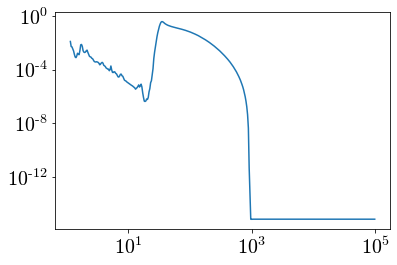

In [33]:
plt.loglog(r[0,:,ny//2,0], 100*ug[0,:,ny//2,0])
plt.loglog(r[0,:,ny//2,0], (ud[3][0,:,ny//2,0]/lk(0.3,r[0,:,ny//2,0])))
plt.loglog(r[0,:,ny//2,0], (ud[3][0,:,ny//2,0]/dxdxp[3,3][0,:,ny//2,0]/lk(0.3,r[0,:,ny//2,0] )))
plt.xlim(rhor,1000)
plt.ylim(1e-1)

In [ ]:
np.max(dxdxp[2,2])

In [38]:
ta_a94_cool = np.load("a94_cool_hor1_timeavg_v2.npz")
#for key in ta_a94_cool: print(key)

In [45]:
ta_a94_cool_v4 = np.load("a94_cool_hor1_timeavg_v4.npz")
rhor_a94_cool=rhor

In [46]:
for key in ta_a94_cool_v4: print(key)

rho
gdet_1d
thick_1d
den1_1d
fM_1d
fMdisk
Mdot_in_test
Mdot_out_test
Mdot_2d
Mdot_in_1d
Mdot_out_1d
Mdot_bern_in_test
Mdot_bern_out_test
Mdot_bern_2d
Mdot_bern_in_1d
Mdot_bern_out_1d
ug
PhiBH
ud3num
omegaf
bas2d
B1_2d
B1_disk
B2_2d
B2_disk
B3_2d
B3_disk
Babs1
Babs1_disk
Babs2
Babs2_disk
Babs3
Babs3_disk
Bsq1
Bsq1_disk
Bsq2
Bsq2_disk
Bsq3
Bsq3_disk
Bsq_tot
Bsq_disktot
ug_tot
ug_disktot
B_tot
B_disktot
beta
phiBH_weighted
PhiBH_weighted
rho_weighted
aphi_ta
aphi_disk
uu31d
fEdiskMA
fEtotEMMA
fEtotEM
fLdiskMA
fLtotEMMA
fLtotEM
fEtot_cond
fLtot_cond
dxdx3
istart
iend
istep
tstart
tend


In [47]:
spinup_a94_cool = {}
diskcut = 30

spinup_a94_cool = calc_spinup_param(ta_a94_cool,diskcut,a)

print(spinup_a94_cool['sMA'])
print(spinup_a94_cool['sEM'])
print(spinup_a94_cool['stot'])

### to do: write s dictionaries to a file

s_MA at 7rg:     -1.082
s_EM at 7rg:     -2.276
s_tot at 7rg:     -3.358
-1.0821458920836449
-2.2756822407245636
-3.357828315347433


C:\Users\Beverly\Documents\HAMR_macros\pp.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # coding: utf-8


KeyError: 'Mdot_bern_in_1d is not a file in the archive'

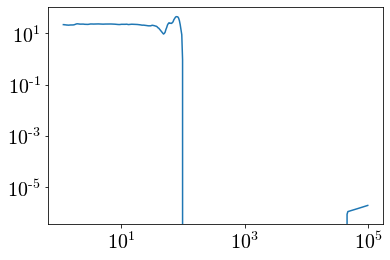

In [49]:
plt.loglog(r[0,:,ny//2,0], ta_a94_cool["fMdisk"], label="Mdot tot")
plt.loglog(r[0,:,ny//2,0], ta_a94_cool["Mdot_bern_in_1d"][0], label="Mdot in")
plt.loglog(r[0,:,ny//2,0], ta_a94_cool["Mdot_bern_out_1d"][0], label="Mdot out")
#plt.loglog(r[0,:,ny//2,0], -Mdot_1d_test3[0])

#plt.loglog(r[0,:,ny//2,0], Mdot_1d_test2[0]+Mdot_1d_test3[0])

#plt.loglog(r[0,:,ny//2,0], fMdisk05)


plt.xlim(rhor,1e2)
plt.ylim(1e-3,70)
plt.title("Bernoulli")
plt.legend(fontsize=12)

C:\Users\Beverly\Documents\HAMR_macros\pp.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # coding: utf-8


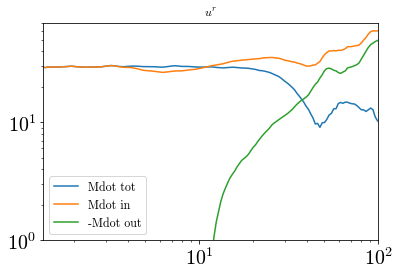

In [479]:
plt.loglog(r[0,:,ny//2,0], ta_a94_cool_new["fMdisk"], label="Mdot tot")
plt.loglog(r[0,:,ny//2,0], ta_a94_cool_new["Mdot_in_1d"][0], label="Mdot in")
plt.loglog(r[0,:,ny//2,0], -ta_a94_cool_new["Mdot_out_1d"][0], label="-Mdot out")
#plt.loglog(r[0,:,ny//2,0], -Mdot_1d_test3[0])

#plt.loglog(r[0,:,ny//2,0], Mdot_1d_test2[0]+Mdot_1d_test3[0])

#plt.loglog(r[0,:,ny//2,0], fMdisk05)


plt.xlim(rhor,1e2)
plt.ylim(1e0,70)
plt.title(r"$u^r$")
plt.legend(fontsize=12)

In [456]:
pshape(uu[1][0])
vel_r=uu[1][0]
vel_2d=(uu[1][0]).sum(-1)

(384, 300, 64)


In [457]:
ud = (gcov[:,:]*uu[:,None]).sum(0)

# Check whether sum in phi and multiplying by 2*pi is the same
Mdot_2pi = 2*np.pi*(-gdet * rho * (bsq/rho < diskcut) * uu[1] * _dx2)

# Sum in theta only when radial velocity is positive
Mdot_beginnning = -gdet*rho*(bsq/rho < diskcut)*_dx3

# now check if u^r is positive or negative
Mdot_2d = (-gdet * rho * (bsq/rho < diskcut) * uu[1] * _dx3).sum(-1)


In [458]:
Mdot_1d_test = (-gdet * rho * (bsq/rho < diskcut) * uu[1] * (uu[1]<0) * _dx2 * _dx3).sum(-1).sum(-1)
Mdot_1d_test2 = (Mdot_2d*(vel_2d<0)*_dx2).sum(-1)
Mdot_1d_test3 = (Mdot_2d*(vel_2d>=0)*_dx2).sum(-1)

calc_Mdot(30)
fMdisk094=Mdot_disk[0]

C:\Users\Beverly\Documents\HAMR_macros\pp.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # coding: utf-8


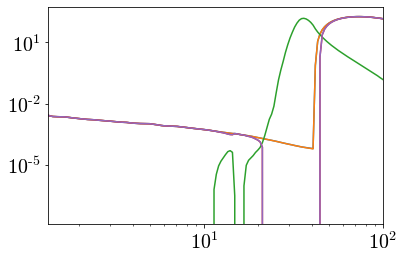

In [459]:
plt.loglog(r[0,:,ny//2,0], Mdot_1d_test[0])
plt.loglog(r[0,:,ny//2,0], Mdot_1d_test2[0])
plt.loglog(r[0,:,ny//2,0], -Mdot_1d_test3[0])

plt.loglog(r[0,:,ny//2,0], Mdot_1d_test2[0]+Mdot_1d_test3[0])

plt.loglog(r[0,:,ny//2,0], fMdisk05)


plt.xlim(rhor,1e2)
#plt.ylim(1e-1,500)

C:\Users\Beverly\Documents\HAMR_macros\pp.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # coding: utf-8


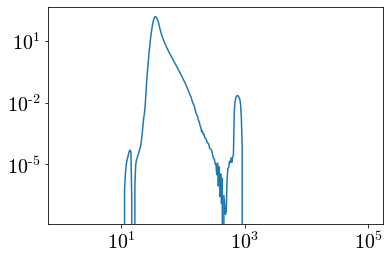

In [460]:
plt.loglog(r[0,:,ny//2,0], -Mdot_1d_test3[0])


C:\Users\Beverly\Documents\HAMR_macros\pp.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # coding: utf-8


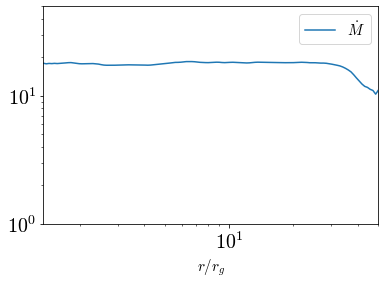

In [13]:
plt.loglog(r[0,:,ny//2,0], ta_a94_cool["fMdisk"], label=r'$\dot{M}$')
plt.loglog(r[0,:,ny//2,0], ta_a94_cool_new["fMdisk"], label=r'$\dot{M}$ new')
plt.xlim(rhor,50)
plt.ylim(1,50)
plt.xlabel(r'$r/r_g$',fontsize=15)
plt.legend(fontsize=15)

In [431]:
Mdot = (-gdet * rho * uu[1] * _dx2 * _dx3).sum(-1).sum(-1)
Mdot_disk = (-gdet * rho * (bsq/rho < 30) * uu[1] * _dx2 * _dx3).sum(-1).sum(-1)
Mdot_in = ((-gdet * rho * uu[1] * (bsq/rho < 30) * _dx2 * _dx3)>0).sum(-1).sum(-1)
Mdot_out = -((-gdet * rho * uu[1] * (bsq/rho < 30) * _dx2 * _dx3)<=0).sum(-1).sum(-1)

fM = Mdot[0]
fMdisk = Mdot_disk[0]
fM_in = Mdot_in[0]
fM_out = Mdot_out[0]

C:\Users\Beverly\Documents\HAMR_macros\pp.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # coding: utf-8


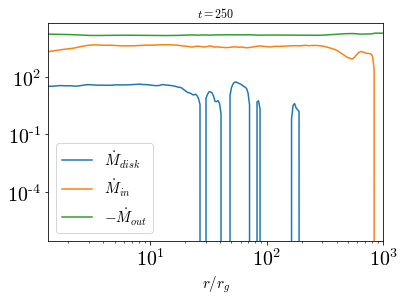

In [438]:
plt.loglog(r[0,:,ny//2,0], fMdisk, label=r'$\dot{M}_{disk}$')
plt.loglog(r[0,:,ny//2,0], fM_in, label=r'$\dot{M}_{in}$')
plt.loglog(r[0,:,ny//2,0], -fM_out, label=r'$-\dot{M}_{out}$')
plt.xlim(rhor,1e3)
#plt.ylim(1e-2,1e3)
plt.xlabel(r'$r/r_g$',fontsize=15)
plt.title(r'$t=%d$' % t) 
plt.legend(fontsize=15)

C:\Users\Beverly\Documents\HAMR_macros\pp.py:2: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # python pp.py build_ext --inplace


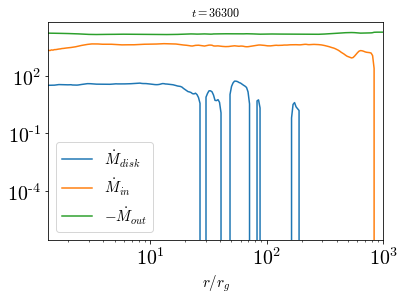

In [436]:
#plt.loglog(r[0,:,ny//2,0], fM, label=r'$\dot{M}$')
plt.loglog(r[0,:,ny//2,0], fMdisk, label=r'$\dot{M}_{disk}$')
plt.loglog(r[0,:,ny//2,0], fM_in, label=r'$\dot{M}_{in}$')
plt.loglog(r[0,:,ny//2,0], -fM_out, label=r'$-\dot{M}_{out}$')
plt.xlim(rhor,1e3)
#plt.ylim(1e-2,1e3)
plt.xlabel(r'$r/r_g$',fontsize=15)
plt.title(r'$t=%d$' % t) 
plt.legend(fontsize=15)

In [17]:
fM_out[iofr(rhor)]

0

In [50]:
# <P> gas pressure
P_a94_cool_3rg=(gam-1)*ta_a94_cool['ug_tot'][iofr(3),ny//2]
P_a94_cool_25rg=(gam-1)*ta_a94_cool['ug_tot'][iofr(25),ny//2]

# <B^i>^2
B1sq=((ta_a94_cool['B1_2d']**2)*gcov[1,1][0,:,:,0])
B2sq=((ta_a94_cool['B2_2d']**2)*gcov[2,2][0,:,:,0])
B3sq=((ta_a94_cool['B3_2d']**2)*gcov[3,3][0,:,:,0])
# <B>^2
Btotsq_a94_cool=B1sq+B2sq+B3sq

# <deltaB^2> pressure from magnetic turbulence
deltaB_a94_cool=(ta_a94_cool['Bsq_tot'].mean(-1))-(Btotsq_a94_cool)

C:\Users\Beverly\Documents\HAMR_macros\pp.py:3: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # In[21]:


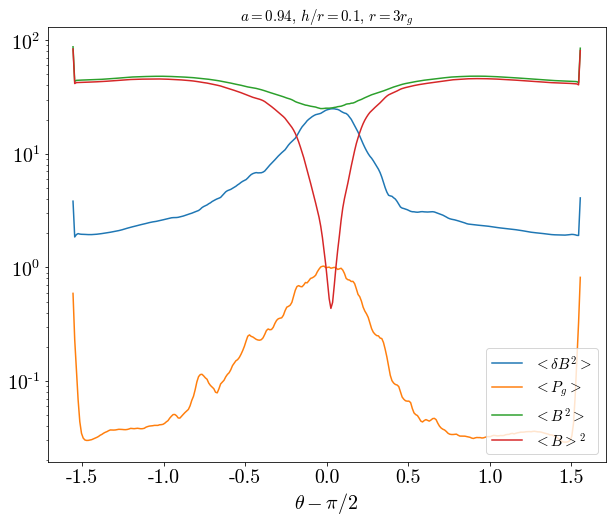

In [51]:
plt.figure(figsize=(10,8))

plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, deltaB_a94_cool[iofr(3),:]/P_a94_cool_3rg, label=r"$<\delta B^2>$")
plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, (gam-1)*ta_a94_cool['ug_tot'][iofr(3),:]/P_a94_cool_3rg, label=r"$<P_g>$")
plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, ( ta_a94_cool['Bsq_tot'].mean(-1))[iofr(3),:]/P_a94_cool_3rg, label=r"$<B^2>$")
plt.semilogy(h[0,iofr(20),:,0]-np.pi/2,Btotsq_a94_cool[iofr(3),:]/P_a94_cool_3rg, label=r"$<B>^2$")

plt.xlabel(r"$\theta - \pi/2$")
plt.title("$a=0.94$, $h/r=0.1$, $r=3r_g$", fontsize=15)

plt.legend(fontsize=15, loc="lower right")

C:\Users\Beverly\Documents\HAMR_macros\pp.py:4: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # from __future__ import division__future__ import division


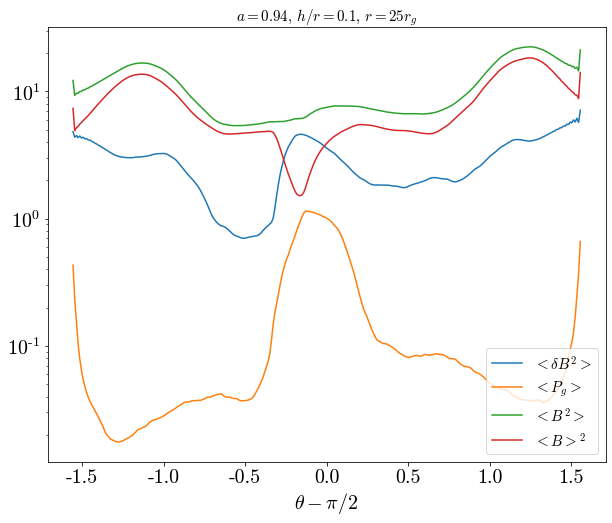

In [52]:
plt.figure(figsize=(10,8))

#plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, deltaB[iofr(10),:], label=r"$\delta B^r$")
plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, deltaB_a94_cool[iofr(25),:]/P_a94_cool_25rg, label=r"$<\delta B^2>$")

#plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, (B1_2d_09375*gcov[1,1][0,:,:,0])[iofr(20),:], label=r"$<B^r>^2$")
#plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, (B1_2d_09375cooled*gcov[1,1][0,:,:,0])[iofr(20),:]**2, label=r"$<B^r>^2$ cooled")

plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, (gam-1)*ta_a94_cool['ug_tot'][iofr(25),:]/P_a94_cool_25rg, label=r"$<P_g>$")

plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, ( ta_a94_cool['Bsq_tot'].mean(-1))[iofr(25),:]/P_a94_cool_25rg, label=r"$<B^2>$")
#plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, (B_tot_09375cooled.mean(-1)**2)[iofr(25),:], label=r"$<B>^2$")
plt.semilogy(h[0,iofr(20),:,0]-np.pi/2,Btotsq_a94_cool[iofr(25),:]/P_a94_cool_25rg, label=r"$<B>^2$")

plt.xlabel(r"$\theta - \pi/2$")
plt.title("$a=0.94$, $h/r=0.1$, $r=25r_g$", fontsize=15)

plt.legend(fontsize=15, loc="lower right")

## a = 0.5 cooled

In [53]:
#Set directory
#dir = "C:\H-AMR\HAMR\HAMR_CPU" 
dir = r'D:\H-AMRdata\highresMADs\cool_disk\a05_cooled'
os.chdir(dir) 

D=200

#Run read-in of data
rblock_new(D)
rpar_new(D)
rgdump_griddata(dir)
rdump_griddata(dir,D)
#set_uniform_grid()
misc_calc(calc_bu=1, calc_bsq=1, calc_eu=RESISTIVE, calc_esq=RESISTIVE)
psicalc(0,0)
#calc_RAD()
#set_pole()

In [54]:
print((bsq/rho).max())
print((bsq/ug).max())
print((ug/rho).max())

rhor_a5_cool=rhor
ta_a5_cool = np.load("a5cool_hor1_timeavg.npz")

15.027941
752.3927
5.0767007


In [55]:
spinup_a5_cool = {}
diskcut=7
#calc_spinup_param_1d(sim_ta_dat,diskcut,a)
spinup_a5_cool = calc_spinup_param(ta_a5_cool, diskcut,a)

s_MA at 7rg:     0.465
s_EM at 7rg:     -1.180
s_tot at 7rg:     -0.715


In [56]:
pshape(uu[1][0])
vel_r=uu[1][0]
vel_2d=(uu[1][0]).sum(-1)

(384, 300, 64)


In [57]:
ud = (gcov[:,:]*uu[:,None]).sum(0)

# Check whether sum in phi and multiplying by 2*pi is the same
Mdot_2pi = 2*np.pi*(-gdet * rho * (bsq/rho < diskcut) * uu[1] * _dx2)

# Sum in theta only when radial velocity is positive
Mdot_beginnning = -gdet*rho*(bsq/rho < diskcut)*_dx3

# now check if u^r is positive or negative
Mdot_2d = (-gdet * rho * (bsq/rho < diskcut) * uu[1] * _dx3).sum(-1)


In [58]:
Mdot_1d_test = (-gdet * rho * (bsq/rho < diskcut) * uu[1] * (uu[1]<0) * _dx2 * _dx3).sum(-1).sum(-1)
Mdot_1d_test2 = (Mdot_2d*(vel_2d<0)*_dx2).sum(-1)
Mdot_1d_test3 = (Mdot_2d*(vel_2d>=0)*_dx2).sum(-1)

calc_Mdot(10)
fMdisk05=Mdot_disk[0]

C:\Users\Beverly\Documents\HAMR_macros\pp.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # coding: utf-8


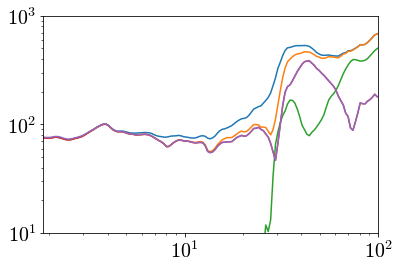

In [59]:
plt.loglog(r[0,:,ny//2,0], Mdot_1d_test[0])
plt.loglog(r[0,:,ny//2,0], Mdot_1d_test2[0])
plt.loglog(r[0,:,ny//2,0], -Mdot_1d_test3[0])

plt.loglog(r[0,:,ny//2,0], Mdot_1d_test2[0]+Mdot_1d_test3[0])

plt.loglog(r[0,:,ny//2,0], fMdisk05)


plt.xlim(rhor,1e2)
plt.ylim(10,1e3)

C:\Users\Beverly\Documents\HAMR_macros\pp.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # coding: utf-8


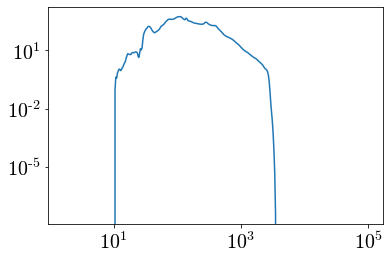

In [60]:
plt.loglog(r[0,:,ny//2,0], -Mdot_1d_test3[0])


In [61]:
Mdot_in = (-gdet * rho * (bsq/rho < diskcut) * uu[1] * _dx2 * _dx3).sum(-1).sum(-1)

C:\Users\Beverly\Documents\HAMR_macros\pp.py:4: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # from __future__ import division__future__ import division
C:\Users\Beverly\Documents\HAMR_macros\pp.py:12: RuntimeWarning: invalid value encountered in sqrt
  # from sympy import *


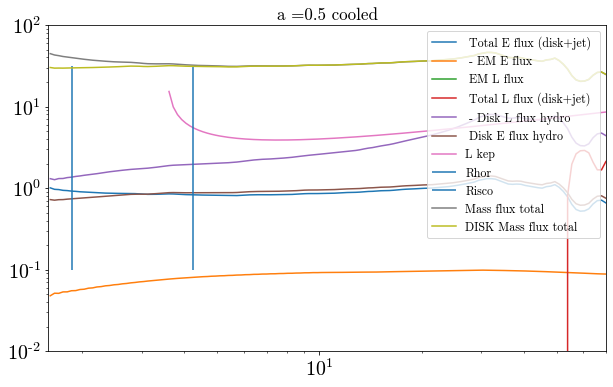

In [62]:
plt.figure(figsize=(10,6))
fs = 12

plt.title("a =0.5 cooled", fontsize = fs+5)

plt.loglog(r[0,:,ny//2,0], ta_a5_cool["fEtotEMMA"]/ta_a5_cool["fMdisk"][iofr(10)], label=" Total E flux (disk+jet) ")
plt.loglog(r[0,:,ny//2,0], - ta_a5_cool["fEtotEM"]/ta_a5_cool["fMdisk"][iofr(10)], label=" - EM E flux ")

plt.loglog(r[0,:,ny//2,0], - ta_a5_cool["fLtotEM"]/ta_a5_cool["fMdisk"][iofr(10)], label=" EM L flux ")


plt.loglog(r[0,:,ny//2,0], ta_a5_cool["fLtotEMMA"]/ta_a5_cool["fMdisk"][iofr(10)], label=" Total L flux (disk+jet) ")

plt.loglog(r[0,:,ny//2,0], -  ta_a5_cool["fLdiskMA"]/ta_a5_cool["fMdisk"][iofr(10)], label=" - Disk L flux hydro")
plt.loglog(r[0,:,ny//2,0], ta_a5_cool["fEdiskMA"] /ta_a5_cool["fMdisk"][iofr(10)], label=" Disk E flux hydro")


#plt.loglog(r[0,:,ny//2,0], fEtotEMMA/fMdisk[iofr(10)], label=" Total E flux (disk+jet) ")
#plt.loglog(r[0,:,ny//2,0], - fEtotEM/fMdisk[iofr(10)], label=" - EM E flux ")

#plt.loglog(r[0,:,ny//2,0], - fLtotEM/fMdisk[iofr(10)], label=" - EM L flux ")

#plt.loglog(r[0,:,ny//2,0], fLtotEMMA /fMdisk[iofr(10)] , label=" Total L flux (disk+jet, ma+em)")

#plt.loglog(r[0,:,ny//2,0], - fLdiskMA / fMdisk[iofr(10)], label=" - Disk L flux hydro")
#plt.loglog(r[0,:,ny//2,0], fEdiskMA / fMdisk[iofr(10)], label=" Disk E flux hydro")

#plt.loglog(r[:,ny//2,0], fLdiskEM_00 / fM_00[iofr(10)], label=" Disk L flux EM")


#plt.loglog(r[:,ny//2,0], fEdiskMA_02 / fM_02, label=" Disk L flux hydro")

plt.loglog(r[0,:,ny//2,0], lk(-0.5,r[0,:,ny//2,0]) , label="L kep")

plt.vlines(rhor, 10**-1, 10**1.5, label="Rhor")
plt.vlines(Risco(a), 10**-1, 10**1.5, label = "Risco")
#plt.loglog(r[:,ny//2,0], Mdot, label="current Mass flux")
plt.loglog(r[0,:,ny//2,0], ta_a5_cool["fM_1d"], label="Mass flux total")
plt.loglog(r[0,:,ny//2,0], ta_a5_cool["fMdisk"], label="DISK Mass flux total")

#plt.loglog(r[:,ny//2,0], -fEM_02 /fM_02 , label="- EM flux")
#plt.loglog(r[:,ny//2,0], - powj_02 /fM_02 , label="- Jet power")



plt.ylim(1e-2,100)
plt.xlim(Rin,70)
#plt.loglog(r[:,ny//2,0],rho[:,ny//2,0]*10)
plt.legend(fontsize = fs, loc=1)

In [63]:
s_a5 = {}
diskcut=7
#calc_spinup_param_1d(sim_ta_dat,diskcut,a)
s_a5 = calc_spinup_param(ta_a5_cool, diskcut,a)

s_MA at 7rg:     0.465
s_EM at 7rg:     -1.180
s_tot at 7rg:     -0.715


In [64]:
cs_th_jet = (0.1*r[0][:,0:3,:]**(-0.5)).mean(axis=1).mean(axis=-1)
cs_th_disk = 0.1*r[0][:,ny//2,0]**(-0.5)

plt.figure()
plt.loglog(r[0][:,ny-1,0],csdisk_05cooled)
plt.loglog(r[0][:,ny-1,0],cs_th_disk)
plt.ylim(1e-4,1e0)
plt.xlim(Rin,Rout)
plt.title("Disk sound speed a=0.5 cooled")
plt.grid()

NameError: name 'csdisk_05cooled' is not defined

<Figure size 432x288 with 0 Axes>

In [65]:

plt.figure()
plt.loglog(r[0][:,ny-1,0],csjet_05cooled)
plt.loglog(r[0][:,ny-1,0],cs_th_jet)
plt.ylim(1e-4,1e0)
plt.xlim(Rin,Rout)
plt.title("Jet sound speed a=0.5 cooled")
plt.grid()

NameError: name 'csjet_05cooled' is not defined

<Figure size 432x288 with 0 Axes>

C:\Users\Beverly\Documents\HAMR_macros\pp.py:3: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # In[21]:


Text(0.5, 1.0, '$B^{\\phi}$')

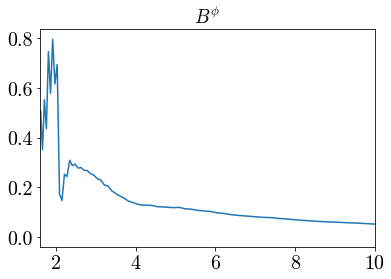

In [66]:
b_phi = bu[3][0,:,ny-4:ny,:].mean(axis=1).mean(axis=-1)

plt.plot(r[0][:,ny-1,0],b_phi)
#plt.ylim(1e-7,1e0)
plt.xlim(Rin, 1e1)
plt.title(r"$B^{\phi}$",fontsize=19)

## a=0.3 cooled

In [70]:
#This blocks needs to be run to read in files 
global notebook, axisym,set_cart,axisym,REF_1,REF_2,REF_3,set_cart,D,print_fieldlines 
global lowres1,lowres2,lowres3, RAD_M1, RESISTIVE, export_raytracing_GRTRANS, export_raytracing_RAZIEH,r1,r2,r3
global r_min, r_max, theta_min, theta_max, phi_min, phi_max, do_griddata, do_box, check_files, kerr_schild

#Set directory
#dir = "C:\H-AMR\HAMR\HAMR_CPU" 
dir = r'D:\H-AMRdata\highresMADs\cool_disk\a03_cooled'
os.chdir(dir) 

D=500

#Run read-in of data
rblock_new(D)
rpar_new(D)
rgdump_griddata(dir)
rdump_griddata(dir,D)
#set_uniform_grid()
misc_calc(calc_bu=1, calc_bsq=1, calc_eu=RESISTIVE, calc_esq=RESISTIVE)
psicalc(0,0)
#calc_RAD()
#set_pole()

In [71]:
rhor_a3_cool=rhor
ta_a3_cool= np.load("a3cool_hor1_timeavg_v2.npz")
#for key in ta_a3_cool: print(key)

In [72]:
spinup_a3_cool = {}
diskcut = 30

spinup_a3_cool = calc_spinup_param(ta_a3_cool,diskcut,a)

print(spinup_a3_cool['sMA'])
print(spinup_a3_cool['sEM'])
print(spinup_a3_cool['stot'])

### to do: write s dictionaries to a file

s_MA at 7rg:     0.799
s_EM at 7rg:     -1.019
s_tot at 7rg:     -0.220
0.7987213969230652
-1.0185069158673286
-0.21978525519371028


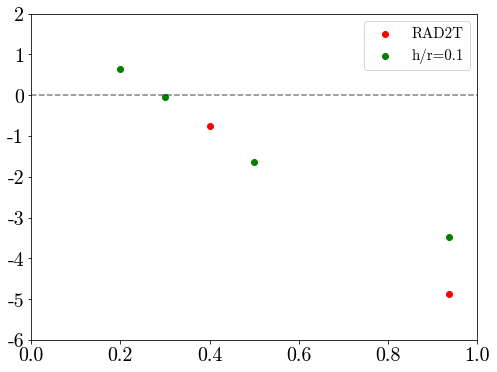

In [ ]:
plt.figure(figsize=(8,6))

plt.scatter([0.4,0.9375],[-0.759,-4.880],color='red',label="RAD2T")
plt.scatter([0.2,0.3,0.5,0.9375],[0.652,-0.031,-1.645,-3.466],color='green',label="h/r=0.1")
plt.plot([0,1],[0,0],'--',alpha=0.5, color='black')

plt.legend(fontsize=15)
plt.xlim(0,1)
plt.ylim(-6,2)

## a = 0.2 cooled

In [73]:
# Test cell for plotting

#Set directory
#dir = "C:\H-AMR\HAMR\HAMR_CPU" 
#dir = r'D:\H-AMRdata\highresMADs\cool_disk\a09375_cooled'
dir = r'D:\H-AMRdata\highresMADs\cool_disk\a02_cooled_newIC'

os.chdir(dir) 

D=505

rblock_new(D)
rpar_new(D)
rgdump_griddata(dir)
rdump_griddata(dir,D)

misc_calc(calc_bu=1, calc_bsq=1, calc_eu=RESISTIVE, calc_esq=RESISTIVE)
psicalc(0,0)

In [74]:
print((bsq/rho).max())
print((bsq/ug).max())
print((ug/rho).max())

rhor_a2_cool=rhor
ta_a02_cool = np.load("a2cool_hor1_timeavg.npz")

50.00494
500.04938
16.86277


In [75]:
spinup_a2_cool = {}
diskcut=30
#calc_spinup_param_1d(sim_ta_dat,diskcut,a)
spinup_a2_cool = calc_spinup_param(ta_a02_cool, diskcut,a)

s_MA at 7rg:     1.279
s_EM at 7rg:     -0.647
s_tot at 7rg:     0.632


C:\Users\Beverly\Documents\HAMR_macros\pp.py:4: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # from __future__ import division__future__ import division
C:\Users\Beverly\Documents\HAMR_macros\pp.py:12: RuntimeWarning: invalid value encountered in sqrt
  # from sympy import *


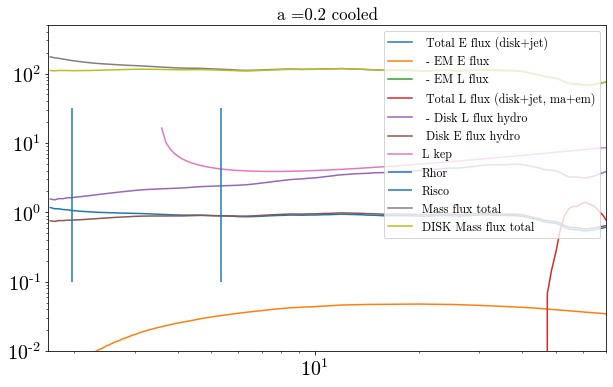

In [99]:
plt.figure(figsize=(10,6))
fs = 12

plt.title("a =0.2 cooled", fontsize = fs+5)

plt.loglog(r[0,:,ny//2,0], fEtotEMMA/fMdisk[iofr(10)], label=" Total E flux (disk+jet) ")
plt.loglog(r[0,:,ny//2,0], - fEtotEM/fMdisk[iofr(10)], label=" - EM E flux ")

plt.loglog(r[0,:,ny//2,0], - fLtotEM/fMdisk[iofr(10)], label=" - EM L flux ")


plt.loglog(r[0,:,ny//2,0], fLtotEMMA /fMdisk[iofr(10)] , label=" Total L flux (disk+jet, ma+em)")

plt.loglog(r[0,:,ny//2,0], - fLdiskMA / fMdisk[iofr(10)], label=" - Disk L flux hydro")
plt.loglog(r[0,:,ny//2,0], fEdiskMA / fMdisk[iofr(10)], label=" Disk E flux hydro")

#plt.loglog(r[:,ny//2,0], fLdiskEM_00 / fM_00[iofr(10)], label=" Disk L flux EM")


#plt.loglog(r[:,ny//2,0], fEdiskMA_02 / fM_02, label=" Disk L flux hydro")

plt.loglog(r[0,:,ny//2,0], lk(-0.5,r[0,:,ny//2,0]) , label="L kep")

plt.vlines(rhor, 10**-1, 10**1.5, label="Rhor")
plt.vlines(Risco(a), 10**-1, 10**1.5, label = "Risco")
#plt.loglog(r[:,ny//2,0], Mdot, label="current Mass flux")
plt.loglog(r[0,:,ny//2,0], fM, label="Mass flux total")
plt.loglog(r[0,:,ny//2,0], fMdisk, label="DISK Mass flux total")

#plt.loglog(r[:,ny//2,0], -fEM_02 /fM_02 , label="- EM flux")
#plt.loglog(r[:,ny//2,0], - powj_02 /fM_02 , label="- Jet power")



plt.ylim(1e-2,500)
plt.xlim(Rin,70)
#plt.loglog(r[:,ny//2,0],rho[:,ny//2,0]*10)
plt.legend(fontsize = fs, loc=1)

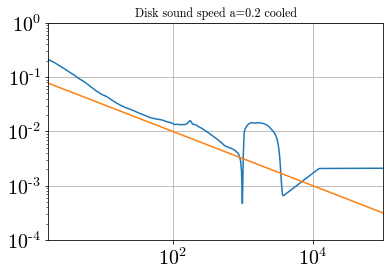

In [29]:
plt.figure()
plt.loglog(r[0][:,ny-1,0],csdisk_02cooled)
plt.loglog(r[0][:,ny-1,0],cs_th_jet)
plt.ylim(1e-4,1e0)
plt.xlim(Rin,Rout)
plt.title("Disk sound speed a=0.2 cooled")
plt.grid()

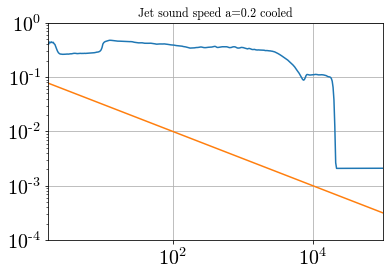

In [28]:
cs_th_jet = (0.1*r[0][:,0:3,:]**(-0.5)).mean(axis=1).mean(axis=-1)
cs_th_disk = 0.1*r[0][:,ny//2,0]**(-0.5)

plt.figure()
plt.loglog(r[0][:,ny-1,0],csjet_02cooled)
plt.loglog(r[0][:,ny-1,0],cs_th_jet)
plt.ylim(1e-4,1e0)
plt.xlim(Rin,Rout)
plt.title("Jet sound speed a=0.2 cooled")
plt.grid()

## a=0.0 cooled

In [92]:
#This blocks needs to be run to read in files 
global notebook, axisym,set_cart,axisym,REF_1,REF_2,REF_3,set_cart,D,print_fieldlines 
global lowres1,lowres2,lowres3, RAD_M1, RESISTIVE, export_raytracing_GRTRANS, export_raytracing_RAZIEH,r1,r2,r3
global r_min, r_max, theta_min, theta_max, phi_min, phi_max, do_griddata, do_box, check_files, kerr_schild

#Set directory
#dir = "C:\H-AMR\HAMR\HAMR_CPU" 
dir = r'D:\H-AMRdata\highresMADs\cool_disk\a00_cooled'
os.chdir(dir) 

D=0

#Run read-in of data
rblock_new(D)
rpar_new(D)
rgdump_griddata(dir)
rdump_griddata(dir,D)
#set_uniform_grid()
misc_calc(calc_bu=1, calc_bsq=1, calc_eu=RESISTIVE, calc_esq=RESISTIVE)
psicalc(0,0)
#calc_RAD()
#set_pole()

In [93]:
ta_a00_cool = np.load("a00_hor1_timeavg.npz")

C:\Users\Beverly\Documents\HAMR_macros\pp.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # coding: utf-8


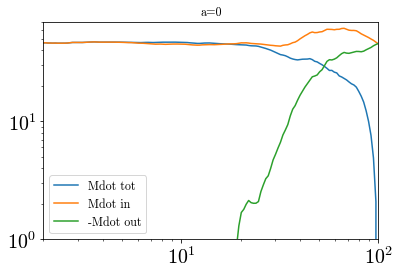

In [94]:
plt.loglog(r[0,:,ny//2,0],ta_a00_cool["fMdisk"], label="Mdot tot")
plt.loglog(r[0,:,ny//2,0],ta_a00_cool["Mdot_in_1d"][0], label="Mdot in")
plt.loglog(r[0,:,ny//2,0],-ta_a00_cool["Mdot_out_1d"][0], label="-Mdot out")

plt.xlim(rhor,1e2)
plt.ylim(1e0,70)
plt.title("a=0")
plt.legend(fontsize=12)

C:\Users\Beverly\Documents\HAMR_macros\pp.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # coding: utf-8


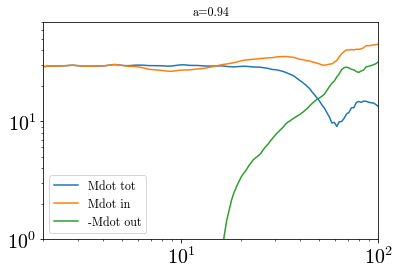

In [95]:
plt.loglog(r[0,:,ny//2,0], ta_a94_cool_v4["fMdisk"], label="Mdot tot")
plt.loglog(r[0,:,ny//2,0], ta_a94_cool_v4["Mdot_in_1d"][0], label="Mdot in")
plt.loglog(r[0,:,ny//2,0], -ta_a94_cool_v4["Mdot_out_1d"][0], label="-Mdot out")
#plt.loglog(r[0,:,ny//2,0], -Mdot_1d_test3[0])

#plt.loglog(r[0,:,ny//2,0], Mdot_1d_test2[0]+Mdot_1d_test3[0])

#plt.loglog(r[0,:,ny//2,0], fMdisk05)


plt.xlim(rhor,1e2)
plt.ylim(1e0,70)
plt.title("a=0.94")
#plt.title(r"$u^r$")
plt.legend(fontsize=12)

In [96]:
spinup_a0_cool = {}
diskcut=30
#calc_spinup_param_1d(sim_ta_dat,diskcut,a)
spinup_a0_cool = calc_spinup_param(ta_a00_cool, diskcut,a)

s_MA at 7rg:     1.666
s_EM at 7rg:     0.041
s_tot at 7rg:     1.707


## a=-0.5 cooled

In [77]:
#Set directory
#dir = "C:\H-AMR\HAMR\HAMR_CPU" 
dir = r'D:\H-AMRdata\highresMADs\cool_disk\a-05_cooled'
os.chdir(dir) 

D=500

#Run read-in of data
rblock_new(D)
rpar_new(D)
rgdump_griddata(dir)
rdump_griddata(dir,D)
#set_uniform_grid()
misc_calc(calc_bu=1, calc_bsq=1, calc_eu=RESISTIVE, calc_esq=RESISTIVE)
psicalc(0,0)
#calc_RAD()
#set_pole()

In [78]:
rhor_an5_cool=rhor
ta_an5_cool= np.load("an5_hor1_timeavg_v2.npz")
#for key in ta_a3_cool: print(key)

In [79]:
spinup_an5_cool = {}
diskcut = 7

spinup_an5_cool = calc_spinup_param(ta_an5_cool,diskcut,a)

print(spinup_an5_cool['sMA'])
print(spinup_an5_cool['sEM'])
print(spinup_an5_cool['stot'])

### to do: write s dictionaries to a file

s_MA at 7rg:     2.433
s_EM at 7rg:     1.249
s_tot at 7rg:     3.682
2.432654619216919
1.2494772374629974
3.682131767272949


## a=-0.9 cooled

In [83]:
#Set directory
#dir = "C:\H-AMR\HAMR\HAMR_CPU" 
dir = r'D:\H-AMRdata\highresMADs\cool_disk\a-09_cooled'
os.chdir(dir) 

D=200

#Run read-in of data
rblock_new(D)
rpar_new(D)
rgdump_griddata(dir)
rdump_griddata(dir,D)
#set_uniform_grid()
misc_calc(calc_bu=1, calc_bsq=1, calc_eu=RESISTIVE, calc_esq=RESISTIVE)
psicalc(0,0)
#calc_RAD()
#set_pole()

In [84]:
rhor_an9_cool=rhor
ta_an9_cool = np.load("an09_hor1_timeavg.npz")

In [85]:
print(ta_an9_cool["PhiBH"][iofr(rhor)])

33.258305


In [86]:
spinup_an9_cool = {}
diskcut=30
#calc_spinup_param_1d(sim_ta_dat,diskcut,a)
spinup_an9_cool = calc_spinup_param(ta_an9_cool, diskcut,a)

s_MA at 7rg:     3.337
s_EM at 7rg:     1.661
s_tot at 7rg:     4.998


# $\rho(r)$, $\phi_{BH}(r)$, $\beta (r)$ 

## $\rho$ vs. $r$

C:\Users\Beverly\Documents\HAMR_macros\pp.py:3: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # In[21]:


Text(0, 0.5, '$\\rho$')

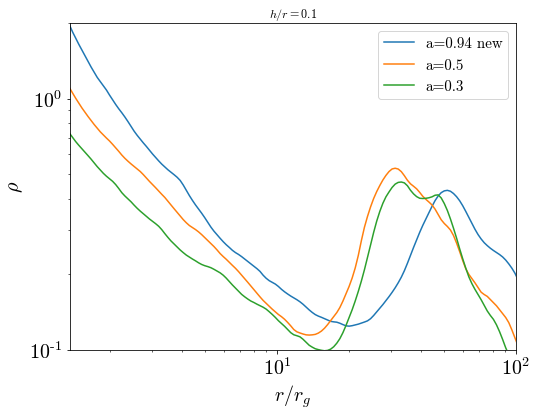

In [58]:
plt.figure(figsize=(8,6))
#plt.loglog(r[0,:,ny//2,0], ta_a94_cool["rho"].mean(-1),label="a=0.94")
plt.loglog(r[0,:,ny//2,0], ta_a94_cool["rho_1d"].mean(-1),label="a=0.94 new")
plt.loglog(r[0,:,ny//2,0], ta_a5_cool["rho"].mean(-1),label="a=0.5")
#plt.loglog(r[0,:,ny//2,0], ta_an5_cool["rho"].mean(-1),label="a=-0.5")
plt.loglog(r[0,:,ny//2,0], ta_a3_cool["rho"].mean(-1),label="a=0.3")

plt.xlim(rhor,1e2)
plt.ylim(1e-1,2)
plt.legend(fontsize=15)
plt.title(r"$h/r=0.1$")
plt.xlabel(r"$r/r_g$")
plt.ylabel(r"$\rho$")

In [62]:
print(25*ta_a94_cool["istart"],25*ta_a94_cool["iend"])

KeyError: 'istart is not a file in the archive'

In [206]:
print(50*ta_a3_cool["istart"],50*ta_a3_cool["iend"])

51500 52500


In [207]:
print(25*ta_a5_cool["istart"],25*ta_a5_cool["iend"])

37000 38000


In [204]:
1050*50

In [ ]:
plt.figure(figsize=(8,6))
plt.loglog(r[0,:,ny//2,0], ta_a94_cool["rho"].mean(-1),label="a=0.94")
plt.loglog(r[0,:,ny//2,0], ta_a5_cool["rho"].mean(-1),label="a=0.5")
#plt.loglog(r[0,:,ny//2,0], ta_an5_cool["rho"].mean(-1),label="a=-0.5")
plt.loglog(r[0,:,ny//2,0], ta_a3_cool["rho"].mean(-1),label="a=0.3")

plt.xlim(rhor,20)
plt.ylim(1e-1,2)
plt.legend(fontsize=15)
plt.title(r"$h/r=0.1$")
plt.xlabel(r"$r/r_g$")
plt.ylabel(r"$\rho$")

## $\dot{M}$ vs. $r$

C:\Users\Beverly\Documents\HAMR_macros\pp.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # coding: utf-8


Text(0, 0.5, '$\\dot{M}$')

Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.


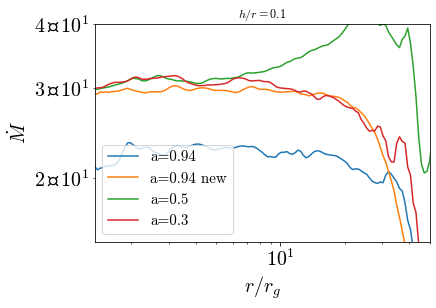

In [482]:
plt.loglog(r[0,:,ny//2,0], ta_a94_cool["fMdisk"],label="a=0.94")
plt.loglog(r[0,:,ny//2,0], ta_a94_cool_new["fMdisk"],label="a=0.94 new")
plt.loglog(r[0,:,ny//2,0], ta_a5_cool["fMdisk"],label="a=0.5")
#plt.loglog(r[0,:,ny//2,0], ta_an5_cool["fMdisk"],label="a=-0.5")
plt.loglog(r[0,:,ny//2,0], ta_a3_cool["fMdisk"],label="a=0.3")

plt.xlim(rhor,50)
plt.ylim(15,40)
plt.legend(fontsize=15)
plt.title(r"$h/r=0.1$")
plt.xlabel(r"$r/r_g$")
plt.ylabel(r"$\dot{M}$")

## $\beta$ vs. $r$

C:\Users\Beverly\Documents\HAMR_macros\pp.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # coding: utf-8


Text(0, 0.5, '$\\beta$')

Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.


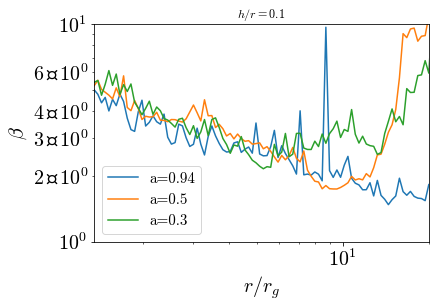

In [158]:
plt.loglog(r[0,:300,ny//2,0], ta_a94_cool["beta"][:300].mean(-1)/ta_a94_cool["den1_1d"][:300].mean(-1),label="a=0.94")
plt.loglog(r[0,:300,ny//2,0], ta_a94_cool_new["beta"][:300].mean(-1)/ta_a94_cool_new["den1_1d"][:300].mean(-1),label="a=0.94")

plt.loglog(r[0,:300,ny//2,0], ta_a5_cool["beta"][:300].mean(-1)/ta_a5_cool["den1_1d"][:300].mean(-1),label="a=0.5")
plt.loglog(r[0,:300,ny//2,0], ta_a3_cool["beta"][:300].mean(-1)/ta_a3_cool["den1_1d"][:300].mean(-1),label="a=0.3")
#plt.loglog(r[0,:,ny//2,0], (ta_an5_cool["beta"]/(ta_an5_cool["den1_1d"].mean(-1))),label="a=0.94")

#plt.plot(r[0,:,ny//2,0], ta_a5_cool["rho_1d"],label="a=0.5")
#plt.plot(r[0,:,ny//2,0], ta_an5_cool["rho"].mean(-1),label="-0.5")
#plt.plot(r[0,:,ny//2,0], ta_a3_cool["rho_1d"],label="0.3")

plt.xlim(rhor,20)
plt.ylim(1e0,1e1)
plt.legend(fontsize=15)
plt.title(r"$h/r=0.1$")
plt.xlabel(r"$r/r_g$")
plt.ylabel(r"$\beta$")

C:\Users\Beverly\Documents\HAMR_macros\pp.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # coding: utf-8


Text(0, 0.5, '$\\beta$')

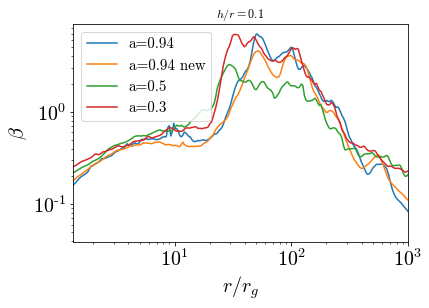

In [483]:
plt.loglog(r[0,:300,ny//2,0], (ta_a94_cool["ug_disktot"]*(gam-1))[:300].mean(-1)/(0.5*ta_a94_cool["Bsq_disktot"][:300].mean(-1).mean(-1)),label="a=0.94")
plt.loglog(r[0,:300,ny//2,0], (ta_a94_cool_new["ug_disktot"]*(gam-1))[:300].mean(-1)/(0.5*ta_a94_cool_new["Bsq_disktot"][:300].mean(-1).mean(-1)),label="a=0.94 new")

plt.loglog(r[0,:300,ny//2,0], (ta_a5_cool["ug_disktot"]*(gam-1))[:300].mean(-1)/(0.5*ta_a5_cool["Bsq_disktot"][:300].mean(-1).mean(-1)),label="a=0.5")
plt.loglog(r[0,:300,ny//2,0], (ta_a3_cool["ug_disktot"]*(gam-1))[:300].mean(-1)/(0.5*ta_a3_cool["Bsq_disktot"][:300].mean(-1).mean(-1)),label="a=0.3")
#plt.loglog(r[0,:,ny//2,0], (ta_an5_cool["beta"]/(ta_an5_cool["den1_1d"].mean(-1))),label="a=0.94")

#plt.plot(r[0,:,ny//2,0], ta_a5_cool["rho_1d"],label="a=0.5")
#plt.plot(r[0,:,ny//2,0], ta_an5_cool["rho"].mean(-1),label="-0.5")
#plt.plot(r[0,:,ny//2,0], ta_a3_cool["rho_1d"],label="0.3")

plt.xlim(rhor,1000)
#plt.ylim(1e-2,1e-1)
plt.legend(fontsize=15)
plt.title(r"$h/r=0.1$")
plt.xlabel(r"$r/r_g$")
plt.ylabel(r"$\beta$")

In [224]:
30000/100**(3/2)

## $B_z$ vs. $r$

In [164]:
plt.loglog(r[0,:,ny//2,0], -ta_a94_cool["B3_disk"].mean(-1)/ta_a94_cool["den1_1d"].mean(-1),label="a=0.94")
plt.loglog(r[0,:,ny//2,0], -ta_a5_cool["B3_disk"].mean(-1)/ta_a5_cool["den1_1d"].mean(-1),label="a=0.5")
plt.loglog(r[0,:,ny//2,0], -ta_a3_cool["B3_disk"].mean(-1)/ta_a3_cool["den1_1d"].mean(-1),label="a=0.3")
#plt.loglog(r[0,:,ny//2,0], (ta_an5_cool["beta"]/(ta_an5_cool["den1_1d"].mean(-1))),label="a=0.94")

#plt.plot(r[0,:,ny//2,0], ta_a5_cool["rho_1d"],label="a=0.5")
#plt.plot(r[0,:,ny//2,0], ta_an5_cool["rho"].mean(-1),label="-0.5")
#plt.plot(r[0,:,ny//2,0], ta_a3_cool["rho_1d"],label="0.3")

plt.xlim(rhor,20)
plt.ylim(1e-7,1e1)
plt.legend(fontsize=15)
plt.title(r"$h/r=0.1$")
plt.xlabel(r"$r/r_g$")
plt.ylabel(r"$B_z$")

ValueError: operands could not be broadcast together with shapes (384,) (384,300) 

In [133]:
len(ta_a5_cool["B3_disk"])

## $\phi$ vs. $r$

C:\Users\Beverly\Documents\HAMR_macros\pp.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # coding: utf-8


Text(0, 0.5, '$\\phi_{BH}$')

Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.


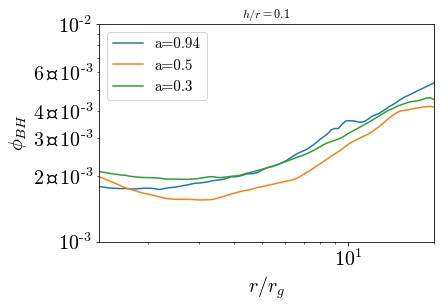

In [165]:
plt.loglog(r[0,:,ny//2,0], ta_a94_cool["phiBH_weighted"].mean(-1)/ta_a94_cool["den1_1d"].mean(-1),label="a=0.94")
plt.loglog(r[0,:,ny//2,0], ta_a5_cool["phiBH_weighted"].mean(-1)/ta_a5_cool["den1_1d"].mean(-1),label="a=0.5")
plt.loglog(r[0,:,ny//2,0], ta_a3_cool["phiBH_weighted"].mean(-1)/ta_a3_cool["den1_1d"].mean(-1),label="a=0.3")
#plt.loglog(r[0,:,ny//2,0], (ta_an5_cool["beta"]/(ta_an5_cool["den1_1d"].mean(-1))),label="a=0.94")

#plt.plot(r[0,:,ny//2,0], ta_a5_cool["rho_1d"],label="a=0.5")
#plt.plot(r[0,:,ny//2,0], ta_an5_cool["rho"].mean(-1),label="-0.5")
#plt.plot(r[0,:,ny//2,0], ta_a3_cool["rho_1d"],label="0.3")

plt.xlim(rhor,20)
plt.ylim(1e-3,1e-2)
plt.legend(fontsize=15)
plt.title(r"$h/r=0.1$")
plt.xlabel(r"$r/r_g$")
plt.ylabel(r"$\phi_{BH}$")

C:\Users\Beverly\Documents\HAMR_macros\pp.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # coding: utf-8


Text(0, 0.5, '$\\phi_{BH}$')

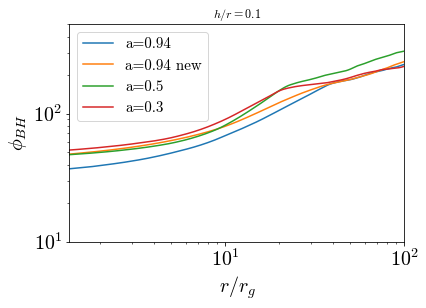

In [484]:
plt.loglog(r[0,:,ny//2,0], ta_a94_cool["PhiBH"],label="a=0.94")
plt.loglog(r[0,:,ny//2,0], ta_a94_cool_new["PhiBH"],label="a=0.94 new")
plt.loglog(r[0,:,ny//2,0], ta_a5_cool["PhiBH"],label="a=0.5")
plt.loglog(r[0,:,ny//2,0], ta_a3_cool["PhiBH"],label="a=0.3")
#plt.loglog(r[0,:,ny//2,0], (ta_an5_cool["beta"]/(ta_an5_cool["den1_1d"].mean(-1))),label="a=0.94")

#plt.plot(r[0,:,ny//2,0], ta_a5_cool["rho_1d"],label="a=0.5")
#plt.plot(r[0,:,ny//2,0], ta_an5_cool["rho"].mean(-1),label="-0.5")
#plt.plot(r[0,:,ny//2,0], ta_a3_cool["rho_1d"],label="0.3")

plt.xlim(rhor,1e2)
plt.ylim(1e1,500)
plt.legend(fontsize=15)
plt.title(r"$h/r=0.1$")
plt.xlabel(r"$r/r_g$")
plt.ylabel(r"$\phi_{BH}$")

In [352]:
ta_a94_cool["iend"]
1300*25

## $\Phi$ vs. $r$

## $l/l_K$ vs. $r$

0.9999849
0.9643931
0.9966362
1.1166877
1.1336722


C:\Users\Beverly\Documents\HAMR_macros\pp.py:12: RuntimeWarning: invalid value encountered in sqrt
  # from sympy import *
C:\Users\Beverly\Documents\HAMR_macros\pp.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # coding: utf-8
C:\Users\Beverly\Documents\HAMR_macros\pp.py:12: RuntimeWarning: invalid value encountered in sqrt
  # from sympy import *
C:\Users\Beverly\Documents\HAMR_macros\pp.py:12: RuntimeWarning: invalid value encountered in sqrt
  # from sympy import *
C:\Users\Beverly\Documents\HAMR_macros\pp.py:12: RuntimeWarning: invalid value encountered in sqrt
  # from sympy import *
C:\Users\Beverly\Documents\HAMR_macros\pp.py:12: RuntimeWarning: invalid value encountered in sqrt
  # from sympy import *


Text(0, 0.5, '$l/l_K$')

Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.


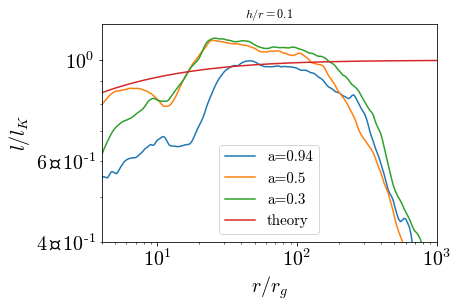

In [257]:
plt.loglog(r[0,:,ny//2,0], (ta_a94_cool["ud3num"]/(ta_a94_cool["den1_1d"].mean(-1)))/lk(0.9375,r[0,:,ny//2,0]),label="a=0.94")
plt.loglog(r[0,:,ny//2,0], (ta_a5_cool["ud3num"]/(ta_a5_cool["den1_1d"].mean(-1)))/lk(0.5,r[0,:,ny//2,0]),label="a=0.5")
plt.loglog(r[0,:,ny//2,0], (ta_a3_cool["ud3num"]/(ta_a3_cool["den1_1d"].mean(-1)))/lk(0.3,r[0,:,ny//2,0]),label="a=0.3")
plt.loglog(r[0,:,ny//2,0], r[0,:,ny//2,0]**(1/2)/lk(0.9375,r[0,:,ny//2,0]),label="theory")


print( np.nanmax(r[0,:,ny//2,0]**(1/2)/lk(0.9,r[0,:,ny//2,0])))
print( (r[0,:,ny//2,0]**(1/2)/lk(0.9,r[0,:,ny//2,0]))[iofr(30)])

print( np.nanmax((ta_a94_cool["ud3num"]/(ta_a94_cool["den1_1d"].mean(-1)))/lk(0.9375,r[0,:,ny//2,0])))
print( np.nanmax((ta_a5_cool["ud3num"]/(ta_a5_cool["den1_1d"].mean(-1)))/lk(0.9375,r[0,:,ny//2,0])))
print( np.nanmax((ta_a3_cool["ud3num"]/(ta_a3_cool["den1_1d"].mean(-1)))/lk(0.9375,r[0,:,ny//2,0])))


#plt.loglog(r[0,:,ny//2,0], (ta_an5_cool["ud3num"]/(ta_an5_cool["den1_1d"].mean(-1)))/lk(-0.5,r[0,:,ny//2,0]),label="a=0.94")

#plt.plot(r[0,:,ny//2,0], ta_a5_cool["rho_1d"],label="a=0.5")
#plt.plot(r[0,:,ny//2,0], ta_an5_cool["rho"].mean(-1),label="-0.5")
#plt.plot(r[0,:,ny//2,0], ta_a3_cool["rho_1d"],label="0.3")

plt.xlim(4,1000)
plt.ylim(4e-1,1.2e0)
plt.legend(fontsize=15)
plt.title(r"$h/r=0.1$")
plt.xlabel(r"$r/r_g$")
plt.ylabel(r"$l/l_K$")

In [261]:
plt.loglog(r[0,:,ny//2,0], (ta_a94_cool["ug_disktot"]/(ta_a94_cool["den1_1d"])[0,:,ny//2,0]),label="a=0.94")


IndexError: too many indices for array: array is 2-dimensional, but 4 were indexed

## $v_{\phi}/v_K$ vs. $r$

## $\Sigma$ vs. $r$

In [26]:
Sigma_a3=(gdet*rho*uu[0]*r*_dx2*_dx3).sum(-1).sum(-1)
Sigma_a3_2=(gdet*rho*uu[0]*_dx2*_dx3).sum(-1).sum(-1)

C:\Users\Beverly\Documents\HAMR_macros\pp.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # coding: utf-8


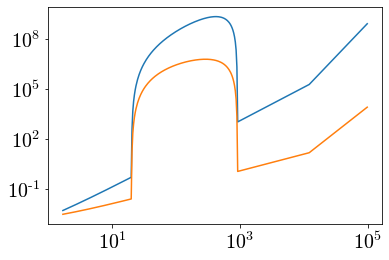

In [27]:
plt.loglog(r[0,:,ny//2,0], Sigma_a3[0],label="a=0.3")
plt.loglog(r[0,:,ny//2,0], Sigma_a3_2[0],label="a=0.3")


C:\Users\Beverly\Documents\HAMR_macros\pp.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # coding: utf-8


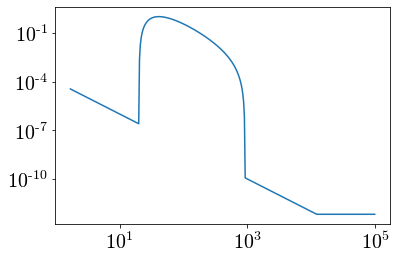

In [25]:
plt.loglog(r[0,:,ny//2,0], rho[0,:,ny//2,0],label="a=0.3")


C:\Users\Beverly\Documents\HAMR_macros\pp.py:1792: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(np.log10(r[0, :, bs2new // 2, 0]), np.log10(SD[0]))


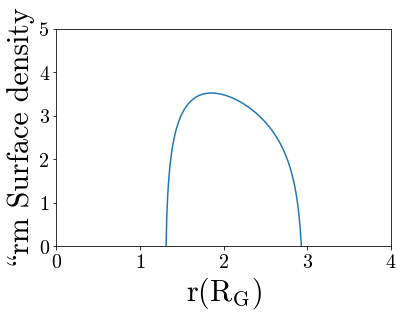

In [28]:
plot_SurfaceDensity()

In [41]:
#This blocks needs to be run to read in files 
global notebook, axisym,set_cart,axisym,REF_1,REF_2,REF_3,set_cart,D,print_fieldlines 
global lowres1,lowres2,lowres3, RAD_M1, RESISTIVE, export_raytracing_GRTRANS, export_raytracing_RAZIEH,r1,r2,r3
global r_min, r_max, theta_min, theta_max, phi_min, phi_max, do_griddata, do_box, check_files, kerr_schild

#Set parameters to read in simulations
lowres1 = 1
lowres2 = 1
lowres3 = 1
do_box=0
r_min=0.0
r_max=100.0
theta_min=0.0
theta_max=9
phi_min=-1
phi_max=9
axisym=1 
print_fieldlines=0 
export_raytracing_GRTRANS=0 
export_raytracing_RAZIEH=0
interpolate_var=0
kerr_schild=0
DISK_THICKNESS=0.03 
set_cart=0 
set_mpi(0) 
check_files=1
notebook=1

In [53]:
dir = r'D:\H-AMRdata\highresMADs\cool_disk\a03_cooled'

os.chdir(dir) 

D=505

rblock_new(D)
rpar_new(D)
rgdump_griddata(dir)
rdump_griddata(dir,D)

misc_calc(calc_bu=1, calc_bsq=1, calc_eu=RESISTIVE, calc_esq=RESISTIVE)
psicalc(0,0)

plt.loglog(r[0,:,ny//2,0],ta_a94_cool["PhiBH_1d"],label="a=0.94 cooled, at rhor %.1f" % ta_a94_cool["PhiBH"][iofr(rhor_a94_cool)] )
plt.loglog(r[0,:,ny//2,0],ta_a94["PhiBH_1d"], label="a=0.94, at rhor %.1f" % ta_a94["PhiBH_1d"][iofr(rhor_a94)] )

plt.ylabel(r"$\Phi_{BH}$")
plt.xlabel(r"$r/r_g$")
plt.ylim(3e1,1e2)
plt.xlim(rhor,1e2)
plt.legend(fontsize=15)

KeyError: 'PhiBH is not a file in the archive'

C:\Users\Beverly\Documents\HAMR_macros\pp.py:1: RuntimeWarning: invalid value encountered in sqrt
  # coding: utf-8
C:\Users\Beverly\Documents\HAMR_macros\pp.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # coding: utf-8


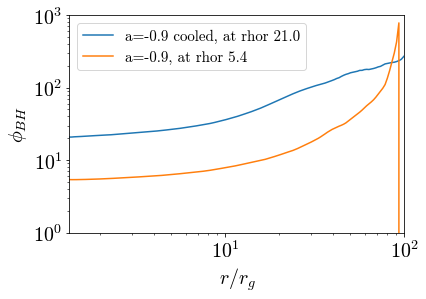

In [302]:
plt.loglog(r[0,:,ny//2,0],ta_an09_cool["PhiBH"]*np.sqrt(4*np.pi)/np.sqrt(ta_an09_cool["fMdisk"]),label="a=-0.9 cooled, at rhor %.1f" % (ta_an09_cool["PhiBH"]*np.sqrt(4*np.pi)/np.sqrt(ta_an09_cool["fMdisk"][iofr(7)]))[iofr(rhor_an9_cool)] )
plt.loglog(r[0,:,ny//2,0],(ta_an9["PhiBH_1d"]*np.sqrt(4*np.pi)/ta_an9["fMdisk_1d"]), label="a=-0.9, at rhor %.1f" % (ta_an9["PhiBH_1d"]*np.sqrt(4*np.pi)/ta_an9["fMdisk_1d"])[iofr(rhor_an9)])

plt.ylabel(r"$\phi_{BH}$")
plt.xlabel(r"$r/r_g$")
plt.ylim(1e0,1e3)
plt.xlim(rhor,1e2)
plt.legend(fontsize=15)

C:\Users\Beverly\Documents\HAMR_macros\pp.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # coding: utf-8


Text(0.5, 0, '$r/r_g$')

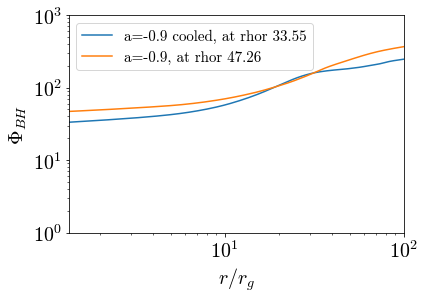

In [294]:
plt.loglog(r[0,:,ny//2,0],ta_an09_cool["PhiBH"],label="a=-0.9 cooled, at rhor %.2f" % ta_an09_cool["PhiBH"][iofr(rhor_an9_cool)] )
plt.loglog(r[0,:,ny//2,0],ta_an9["PhiBH_1d"], label="a=-0.9, at rhor %.2f" % ta_an9["PhiBH_1d"][iofr(rhor_an9)] )


plt.xlim(rhor,1e2)
plt.ylim(1e0,1e3)
plt.legend(fontsize=15)
plt.ylabel(r"$\Phi_{BH}$")
plt.xlabel(r"$r/r_g$")

C:\Users\Beverly\Documents\HAMR_macros\pp.py:1: RuntimeWarning: invalid value encountered in sqrt
  # coding: utf-8
C:\Users\Beverly\Documents\HAMR_macros\pp.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # coding: utf-8


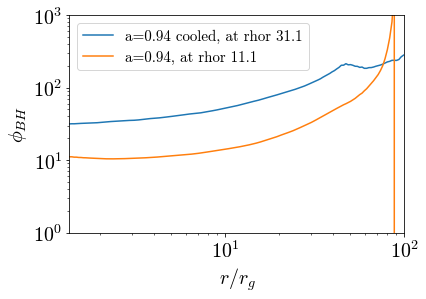

In [289]:
plt.loglog(r[0,:,ny//2,0],ta_a94_cool["PhiBH"]*np.sqrt(4*np.pi)/np.sqrt(ta_a94_cool["fMdisk"]),label="a=0.94 cooled, at rhor %.1f" % (ta_a94_cool["PhiBH"]*np.sqrt(4*np.pi)/np.sqrt(ta_a94_cool["fMdisk"][iofr(7)]))[iofr(rhor_a94_cool)] )
plt.loglog(r[0,:,ny//2,0],(ta_a94["PhiBH"]*np.sqrt(4*np.pi)/ta_a94["fMdisk"]), label="a=0.94, at rhor %.1f" % (ta_a94["PhiBH"]*np.sqrt(4*np.pi)/ta_a94["fMdisk"])[iofr(rhor_a94)])

plt.ylabel(r"$\phi_{BH}$")
plt.xlabel(r"$r/r_g$")
plt.ylim(1e0,1e3)
plt.xlim(rhor,1e2)
plt.legend(fontsize=15)

C:\Users\Beverly\Documents\HAMR_macros\pp.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # coding: utf-8


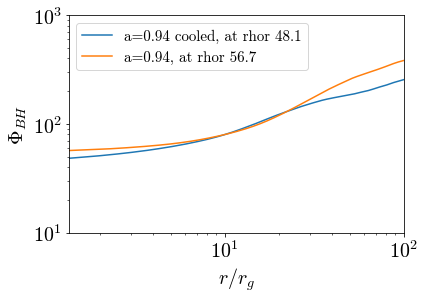

In [298]:
plt.loglog(r[0,:,ny//2,0],ta_a94_cool["PhiBH"],label="a=0.94 cooled, at rhor %.1f" % (ta_a94_cool["PhiBH"][iofr(rhor_a94_cool)] ))
plt.loglog(r[0,:,ny//2,0],ta_a94["PhiBH"], label="a=0.94, at rhor %.1f" % (ta_a94["PhiBH"][iofr(rhor_a94)]))

plt.ylabel(r"$\Phi_{BH}$")
plt.xlabel(r"$r/r_g$")
plt.ylim(1e1,1e3)
plt.xlim(rhor,1e2)
plt.legend(fontsize=15)

# Force balance

## Thermal pressure to show pinching

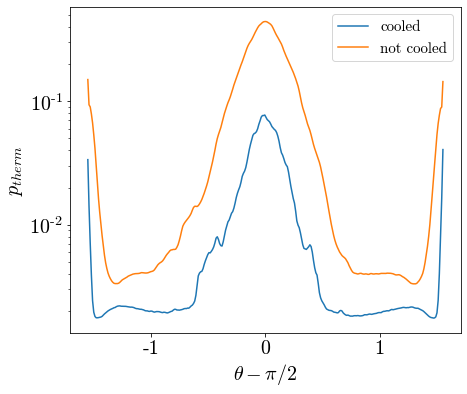

In [343]:
plt.figure(figsize=(7,6))

plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, (gam-1)*ug_09375cooled[iofr(3),:], label="cooled")
plt.semilogy(h[0,iofr(20),:,0]-np.pi/2, (gam-1)*ug_09375[iofr(3),:], label="not cooled")

plt.ylabel(r"$p_{therm}$")
plt.xlabel(r'$\theta - \pi/2$')
plt.legend(fontsize=15)

In [240]:
((Bsq1_disk_09375cooled*dxdxp[1,1][0,:,:,0]).sum(axis=0)).shape

In [235]:
print(B1_disk_09375cooled.shape)

(384, 300)


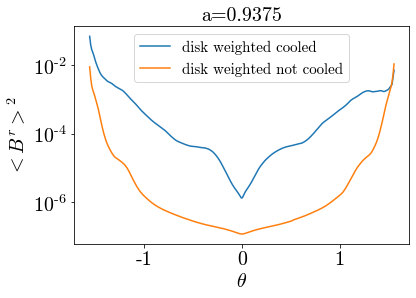

In [229]:
#plt.semilogy(h[0,10,:,0] , (Bsq1_09375cooled).sum(axis=1).sum(axis=-1)*dxdxp[2,2][0,10,:,0]/np.sqrt(fMdisk_09375cooled[iofr(7)]), label="tot cooled")
plt.semilogy(h[0,10,:,0]-np.pi/2, ((B1_disk_09375cooled*dxdxp[1,1][0,:,:,0]).sum(axis=0).sum(axis=-1))**2/((den1_09375cooled.sum(axis=0)))**2,label="disk weighted cooled")


#plt.semilogy(h[0,10,:,0], (Bsq1_09375).sum(axis=1).sum(axis=-1)*dxdxp[2,2][0,10,:,0]/np.sqrt(fMdisk_09375[iofr(7)]), label="tot")
plt.semilogy(h[0,10,:,0]-np.pi/2, ((B1_disk_09375*dxdxp[1,1][0,:,:,0]).sum(axis=0).sum(axis=-1))**2/((den1_09375.sum(axis=0)))**2,label="disk weighted not cooled")
#plt.xlim(rhor,1e3)

#plt.xlim(rhor,2e2)
#plt.ylim(1e-3,0.2)
plt.ylabel(r"$<B^{r}>^2$")
plt.xlabel(r"$\theta$")
plt.title("a=0.9375",fontsize=20)
plt.legend(fontsize=15)

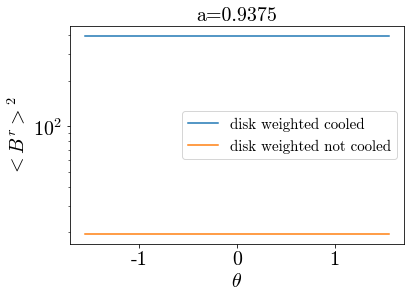

In [204]:
#plt.semilogy(h[0,10,:,0] , (Bsq1_09375cooled).sum(axis=1).sum(axis=-1)*dxdxp[2,2][0,10,:,0]/np.sqrt(fMdisk_09375cooled[iofr(7)]), label="tot cooled")
plt.semilogy(h[0,10,:,0]-np.pi/2, ((B1_2d_09375cooled).sum(axis=0).sum(axis=-1)*dxdxp[2,2][0,10,:,0])**2, label="disk weighted cooled")


#plt.semilogy(h[0,10,:,0], (Bsq1_09375).sum(axis=1).sum(axis=-1)*dxdxp[2,2][0,10,:,0]/np.sqrt(fMdisk_09375[iofr(7)]), label="tot")
plt.semilogy(h[0,10,:,0]-np.pi/2, ((B1_2d_09375).sum(axis=0).sum(axis=-1)*dxdxp[2,2][0,10,:,0])**2, label="disk weighted not cooled")
#plt.xlim(rhor,1e3)

#plt.xlim(rhor,2e2)
#plt.ylim(1e-3,0.2)
plt.ylabel(r"$<B^{r}>^2$")
plt.xlabel(r"$\theta$")
plt.title("a=0.9375",fontsize=20)
plt.legend(fontsize=15)

# Jet sound speed

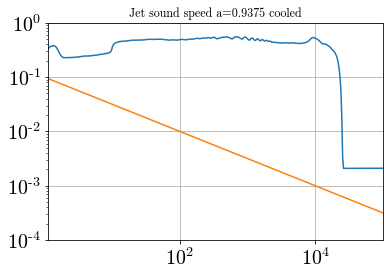

In [20]:
cs_th_jet = (0.1*r[0][:,0:3,:]**(-0.5)).mean(axis=1).mean(axis=-1)
cs_th_disk = 0.1*r[0][:,ny//2,0]**(-0.5)
    #ADD RELATIVISTIC CORRECTIONS - CHECK NOBLE

plt.figure()
plt.loglog(r[0][:,ny-1,0],csjet_09375cooled)
plt.loglog(r[0][:,ny-1,0],cs_th_jet)
plt.ylim(1e-4,1e0)
plt.xlim(Rin,Rout)
plt.title("Jet sound speed a=0.9375 cooled")
plt.grid()

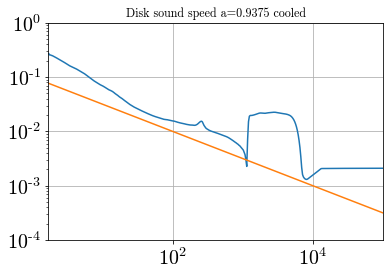

In [31]:
plt.figure()
plt.loglog(r[0][:,ny-1,0],csdisk_09375cooled)
plt.loglog(r[0][:,ny-1,0],cs_th_disk)
plt.ylim(1e-4,1e0)
plt.xlim(Rin,Rout)
plt.title("Disk sound speed a=0.9375 cooled")
plt.grid()

# Calculate spinup parameter

In [120]:
a_cool=[-0.9,-0.5,0.0,0.2,0.3,0.5,0.9375]
a_uncooled=[-0.9,-0.5,0.2,0.9375]

stot_uncooled=np.array([spinup_an9["stot"],spinup_an5["stot"],spinup_a2["stot"],spinup_a94["stot"]])
sEM_uncooled=np.array([spinup_an9["sEM"],spinup_an5["sEM"],spinup_a2["sEM"],spinup_a94["sEM"]])
sMA_uncooled=np.array([spinup_an9["sMA"],spinup_an5["sMA"],spinup_a2["sMA"],spinup_a94["sMA"]])

spinup_tot_cool=[spinup_an9_cool["stot"],spinup_an5_cool["stot"],spinup_a0_cool["stot"],spinup_a2_cool["stot"],spinup_a3_cool['stot'],spinup_a5_cool["stot"],spinup_a94_cool["stot"]]
spinup_MA_cool=[spinup_an9_cool["sMA"],spinup_an5_cool["sMA"],spinup_a0_cool["sMA"],spinup_a2_cool["sMA"],spinup_a3_cool['sMA'],spinup_a5_cool["sMA"],spinup_a94_cool["sMA"]]
spinup_EM_cool=[spinup_an9_cool["sEM"],spinup_an5_cool["sEM"],spinup_a0_cool["sEM"],spinup_a2_cool["sEM"],spinup_a3_cool['sEM'],spinup_a5_cool["sEM"],spinup_a94_cool["sEM"]]
spinup_EMpMA_cool=[spinup_an9_cool["sEM"]+spinup_an9_cool["sMA"],spinup_an5_cool["sEM"]+spinup_an5_cool["sMA"],spinup_a0_cool["sEM"],+spinup_a0_cool["sEM"],spinup_a2_cool["sEM"]+spinup_a2_cool["sMA"],spinup_a3_cool['sEM']+spinup_a3_cool['sMA'],spinup_a5_cool["sEM"]+spinup_a5_cool['sMA'],spinup_a94_cool["sEM"]+spinup_a94_cool['sMA']]

etot_cool=[spinup_an9_cool["etot"],spinup_an5_cool["etot"],spinup_a0_cool["etot"],spinup_a2_cool['etot'],spinup_a3_cool['etot'],spinup_a5_cool["etot"],spinup_a94_cool["etot"]]
eMA_cool=[spinup_an9_cool["eMA"],spinup_an5_cool["eMA"],spinup_a0_cool["eMA"],spinup_a2_cool['eMA'],spinup_a3_cool['eMA'],spinup_a5_cool["eMA"],spinup_a94_cool["eMA"]]
eEM_cool=[spinup_an9_cool["eEM"],spinup_an5_cool["eEM"],spinup_a0_cool["eEM"],spinup_a2_cool['eEM'],spinup_a3_cool['eEM'],spinup_a5_cool["eEM"],spinup_a94_cool["eEM"]]

ltot_cool=[spinup_an9_cool["ltot"],spinup_an5_cool["ltot"],spinup_a0_cool["ltot"],spinup_a2_cool['ltot'],spinup_a3_cool['ltot'],spinup_a5_cool["ltot"],spinup_a94_cool["ltot"]]
lMA_cool=[spinup_an9_cool["lMA"],spinup_an5_cool["lMA"],spinup_a0_cool["lMA"],spinup_a2_cool['lMA'],spinup_a3_cool['lMA'],spinup_a5_cool["lMA"],spinup_a94_cool["lMA"]]
lEM_cool=[spinup_an9_cool["lEM"],spinup_an5_cool["lEM"],spinup_a0_cool["lEM"],spinup_a2_cool['lEM'],spinup_a3_cool['lEM'],spinup_a5_cool["lEM"],spinup_a94_cool["lEM"]]

etot_uncooled=np.array([spinup_an9["etot"],spinup_an5["etot"],spinup_a2["etot"],spinup_a94["etot"]])
eMA_uncooled=np.array([spinup_an9["eMA"],spinup_an5["eMA"],spinup_a2["eMA"],spinup_a94["eMA"]])
eEM_uncooled=np.array([spinup_an9["eEM"],spinup_an5["eEM"],spinup_a2["eEM"],spinup_a94["eEM"]])

ltot_uncooled=np.array([spinup_an9["ltot"],spinup_an5["ltot"],spinup_a2["ltot"],spinup_a94["ltot"]])
lMA_uncooled=np.array([spinup_an9["lMA"],spinup_an5["lMA"],spinup_a2["lMA"],spinup_a94["lMA"]])
lEM_uncooled=np.array([spinup_an9["lEM"],spinup_an5["lEM"],spinup_a2["lEM"],spinup_a94["lEM"]])

a_uncooled=np.array([-0.9,-0.5,0.2,0.9375])
a_cooled=np.array([-0.9,-0.5,0.0,0.2,0.3,0.5,0.9375])

C:\Users\Beverly\Documents\HAMR_macros\pp.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # coding: utf-8
C:\Users\Beverly\Documents\HAMR_macros\pp.py:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  sys.path.append("/gpfs/alpine/phy129/proj-shared/T65TOR/HAMR3/lib/python3.7/site-packages")


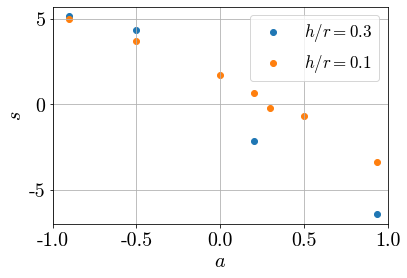

In [98]:
plt.scatter(a_uncooled,stot_uncooled, label=r"$h/r=0.3$")
plt.scatter(a_cooled, spinup_tot_cool, label=r"$h/r=0.1$")

plt.ylabel(r"$s$")
plt.xlabel(r"$a$")
plt.xlim(-1,1)

plt.legend(fontsize=17)
plt.grid(b=1)

# Magnetic flux vs. a

In [99]:
# Magnetic flux at horizon

# Uncooled
phiBH_an9 = ta_an9["PhiBH_1d"][iofr(rhor)]*np.sqrt(4*np.pi)/np.sqrt(ta_an9["fMdisk_1d"][iofr(7)])
phiBH_an5 = ta_an5["PhiBH_1d"][iofr(rhor)]*np.sqrt(4*np.pi)/np.sqrt(ta_an5["fMdisk_1d"][iofr(7)])
phiBH_a2 = ta_a2["PhiBH_1d"][iofr(rhor)]*np.sqrt(4*np.pi)/np.sqrt(ta_a2["fMdisk_1d"][iofr(7)])
phiBH_a94 = ta_a94["PhiBH"][iofr(rhor)]*np.sqrt(4*np.pi)/np.sqrt(ta_a94["fMdisk"][iofr(7)])

# Cooled
phiBH_an9_cool = ta_an9_cool["PhiBH"][iofr(rhor)]*np.sqrt(4*np.pi)/np.sqrt(ta_an9_cool["fMdisk"][iofr(7)])
phiBH_an5_cool = ta_an5_cool["PhiBH"][iofr(rhor)]*np.sqrt(4*np.pi)/np.sqrt(ta_an5_cool["fMdisk"][iofr(7)])
phiBH_a0_cool = ta_a00_cool["PhiBH"][iofr(rhor)]*np.sqrt(4*np.pi)/np.sqrt(ta_a00_cool["fMdisk"][iofr(7)])
phiBH_a2_cool = ta_a02_cool["PhiBH"][iofr(rhor)]*np.sqrt(4*np.pi)/np.sqrt(ta_a02_cool["fMdisk"][iofr(7)])
phiBH_a3_cool = ta_a3_cool["PhiBH"][iofr(rhor)]*np.sqrt(4*np.pi)/np.sqrt(ta_a3_cool["fMdisk"][iofr(7)])
phiBH_a5_cool = ta_a5_cool["PhiBH"][iofr(rhor)]*np.sqrt(4*np.pi)/np.sqrt(ta_a5_cool["fMdisk"][iofr(7)])
phiBH_a94_cool = ta_a94_cool["PhiBH"][iofr(rhor)]*np.sqrt(4*np.pi)/np.sqrt(ta_a94_cool["fMdisk"][iofr(7)])

# Arrays phiBH vs. a
phiBH_uncooled = np.array([phiBH_an9, phiBH_an5, phiBH_a2, phiBH_a94])
phiBH_cool = np.array([phiBH_an9_cool, phiBH_an5_cool, phiBH_a0_cool, phiBH_a2_cool, phiBH_a3_cool, phiBH_a5_cool, phiBH_a94_cool])

# Arrays PhiBH vs. a
PhiBH_uncooled = np.array([ta_an9["PhiBH_1d"][iofr(rhor)],ta_an5["PhiBH_1d"][iofr(rhor)],ta_a2["PhiBH_1d"][iofr(rhor)],ta_a94["PhiBH"][iofr(rhor)]])
PhiBH_cool = np.array([ta_an9_cool["PhiBH"][iofr(rhor)],ta_an5_cool["PhiBH"][iofr(rhor)],ta_a00_cool["PhiBH"][iofr(rhor)],ta_a02_cool["PhiBH"][iofr(rhor)],ta_a3_cool["PhiBH"][iofr(rhor)],ta_a5_cool["PhiBH"][iofr(rhor)],ta_a94_cool["PhiBH"][iofr(rhor)]])

C:\Users\Beverly\Documents\HAMR_macros\pp.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # coding: utf-8
C:\Users\Beverly\Documents\HAMR_macros\pp.py:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  sys.path.append("/gpfs/alpine/phy129/proj-shared/T65TOR/HAMR3/lib/python3.7/site-packages")


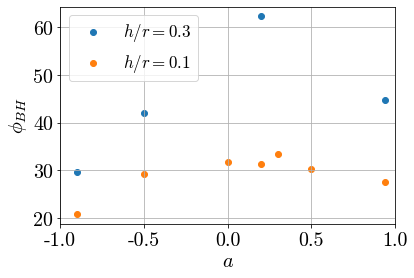

In [100]:
plt.scatter(a_uncooled, phiBH_uncooled, label=r"$h/r=0.3$")
plt.scatter(a_cooled, phiBH_cool, label=r"$h/r=0.1$")

plt.ylabel(r"$\phi_{BH}$")
plt.xlabel(r"$a$")
plt.xlim(-1,1)

plt.legend(fontsize=17)
plt.grid(b=1)

C:\Users\Beverly\Documents\HAMR_macros\pp.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # coding: utf-8
C:\Users\Beverly\Documents\HAMR_macros\pp.py:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  sys.path.append("/gpfs/alpine/phy129/proj-shared/T65TOR/HAMR3/lib/python3.7/site-packages")


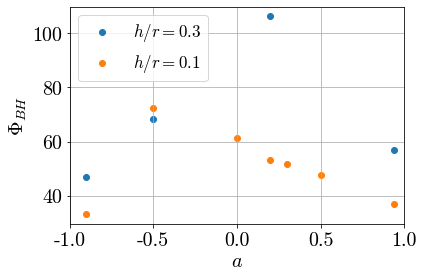

In [101]:
plt.scatter(a_uncooled, PhiBH_uncooled, label=r"$h/r=0.3$")
plt.scatter(a_cooled, PhiBH_cool, label=r"$h/r=0.1$")

plt.ylabel(r"$\Phi_{BH}$")
plt.xlabel(r"$a$")
plt.xlim(-1,1)

plt.legend(fontsize=17)
plt.grid(b=1)

In [95]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Beverly\Documents\BHspindown\s_vals_110321.csv') 

shydro_10rg = np.array(df['shydro_10rg']) 
lhydro_10rg = np.array(df['lhydro_10rg'])
ehydro_10rg = np.array(df['ehydro_10rg'])
shydro_totMA_10rg = np.array(df['shydro_totMA_10rg'])
lhydro_totMA_10rg = np.array(df['lhydro_totMA_10rg'])
ehydro_totMA_10rg = np.array(df['ehydro_totMA_10rg'])
shydro_5rg = np.array(df['shydro_5rg'])
lhydro_5rg = np.array(df['lhydro_5rg'])
ehydro_5rg = np.array(df['ehydro_5rg'])
sEM_10rg = np.array(df['sEM_10rg'])
lEM_10rg = np.array(df['lEM_10rg'])
eEM_10rg = np.array(df['eEM_10rg'])
sEM_5rg = np.array(df['sEM_5rg'])
lEM_5rg = np.array(df['lEM_5rg'])
eEM_5rg = np.array(df['eEM_5rg'])
stot_10rg = np.array(df['stot_10rg'])
ltot_10rg = np.array(df['ltot_10rg'])
etot_10rg = np.array(df['etot_10rg'])
stot_5rg = np.array(df['stot_5rg'])
ltot_5rg = np.array(df['ltot_5rg'])c
etot_5rg = np.array(df['etot_5rg'])
s_totcond_5rg = np.array(df['s_totcond_5rg'])
l_totcond_5rg = np.array(df['l_totcond_5rg'])
e_totcond_5rg = np.array(df['e_totcond_5rg'])
s_totcond_10rg = np.array(df['s_totcond_10rg'])
l_totcond_10rg = np.array(df['l_totcond_10rg'])
e_totcond_10rg = np.array(df['e_totcond_10rg'])
klist = np.array(df['klist'])
fMr10 = np.array(df['fMr10'])
fMdiskr10 = np.array(df['fMdiskr10'])
fMdiskr5 = np.array(df['fMdiskr5'])
lkeplist = np.array(df['lkeplist'])
alist = np.array(df['alist'])
OmegaHlist = np.array(df['OmegaHlist'])
rhorlist = np.array(df['rhorlist'])

#for key in df:
#    print(key)

In [29]:
data_1d = np.load("C:/Users/Beverly/Documents/HAMR_macros/spinup_rad.npz")

In [ ]:
#np.savez("spinup_rad.npz",**{"shydro_10rg" : sMA_rad, "lhydro_10rg" : lMA_rad, "ehydro_10rg" : eMA_rad, \
                   "sEM_10rg" : sEM_rad, "lEM_10rg" : lEM_rad, "eEM_10rg" : eEM_rad, \
                   "stotcond_10rg" : stot_rad, "ltotcond_10rg" : ltot_rad, "etotcond_10rg" : etot_rad, \
                   "fM" : fM, "fMdisk" : fMdisk, "phiBH" : phiBH_1d, "csjet_1d" : csjet_1d, "csdisk_1d" : csdisk_1d\
                   })

In [31]:
sMA_10rg_rad=-0.603

print(spinup_a94['sMA'])
print(spinup_a94['sEM'])
print(spinup_a94['stot'])

In [92]:
plt.plot(a_cool,spinup_tot_cool,"o",label="tot")
plt.plot(a_cool,spinup_MA_cool,"o",label="MA")
plt.plot(a_cool,spinup_EM_cool,"o",label="EM")
plt.plot(a_cool,spinup_EMpMA_cool,"s",label="EM+MA",alpha=0.2)
plt.xlabel(r"$a$")
plt.ylabel(r"$s$")

plt.xlim(-1,1)
plt.title("spin-up h/r=0.1")


plt.legend(fontsize=15)

NameError: name 'spinup_a2_test' is not defined

C:\Users\Beverly\Documents\HAMR_macros\pp.py:14: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  from distutils.core import setup


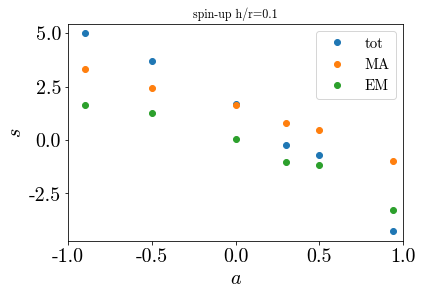

In [97]:
a_cool=[-0.9,-0.5,0.0,0.3,0.5,0.9375]

e_tot_cool=[spinup_an9_cool["etot"],spinup_an5_cool["etot"],spinup_a0_cool["etot"],spinup_a3_cool['etot'],spinup_a5_cool["etot"],spinup_a94_cool["etot"]]
l_tot_cool=[spinup_an9_cool["ltot"],spinup_an5_cool["ltot"],spinup_a0_cool["ltot"],spinup_a3_cool['ltot'],spinup_a5_cool["ltot"],spinup_a94_cool["ltot"]]


s_tot_cool=[spinup_an9_cool["stot"],spinup_an5_cool["stot"],spinup_a0_cool["stot"],spinup_a3_cool['stot'],spinup_a5_cool["stot"],spinup_a94_cool["stot"]]
s_MA_cool=[spinup_an9_cool["sMA"],spinup_an5_cool["sMA"],spinup_a0_cool["sMA"],spinup_a3_cool['sMA'],spinup_a5_cool["sMA"],spinup_a94_cool["sMA"]]
s_EM_cool=[spinup_an9_cool["sEM"],spinup_an5_cool["sEM"],spinup_a0_cool["sEM"],spinup_a3_cool['sEM'],spinup_a5_cool["sEM"],spinup_a94_cool["sEM"]]
#spinup_EMpMA_cool=[spinup_an5_cool["sEM"]+spinup_an5_cool["sMA"],sEM_02cooled+sMA_02cooled,spinup_a3_test['sEM']+spinup_a3_test['sMA'],s_a5["sEM"]+s_a5['sMA'],s_a94_cooled["sEM"]+s_a94_cooled['sMA']]



plt.plot(a_cool,s_tot_cool,"o",label="tot")
plt.plot(a_cool,s_MA_cool,"o",label="MA")
plt.plot(a_cool,s_EM_cool,"o",label="EM")
#plt.plot(a_cool,spinup_EMpMA_cool,"s",label="EM+MA",alpha=0.2)
plt.xlabel(r"$a$")
plt.ylabel(r"$s$")

plt.xlim(-1,1)
plt.title("spin-up h/r=0.1")


plt.legend(fontsize=15)

In [98]:
print(s_tot_cool)
print(s_MA_cool)
print(s_EM_cool)

[4.997821402549744, 3.682131767272949, 1.7071133852005005, -0.21978525519371028, -0.7154140025377274, -4.260422110557556]
[3.3365765690803526, 2.432654619216919, 1.6658188104629517, 0.7987213969230652, 0.46485382318496704, -0.9641051590442657]
[1.6612445414066315, 1.2494772374629974, 0.04129493981599808, -1.0185069158673286, -1.1802681386470795, -3.29631557315588]


C:\Users\Beverly\Documents\HAMR_macros\pp.py:17: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  from distutils.core import setup


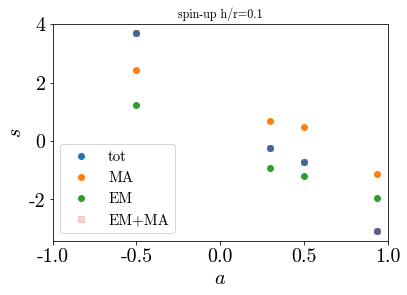

In [335]:

spinup_tot_cool_t=[spinup_an5_cool["stot"],spinup_a3_test['stot'],s_a5["stot"],spinup_a94_test["stot"]]
spinup_MA_cool_t=[spinup_an5_cool["sMA"],spinup_a3_test['sMA'],s_a5["sMA"],spinup_a94_test["sMA"]]
spinup_EM_cool_t=[spinup_an5_cool["sEM"],spinup_a3_test['sEM'],s_a5["sEM"],spinup_a94_test["sEM"]]
spinup_EMpMA_cool_t=[spinup_an5_cool["sMA"]+spinup_an5_cool["sEM"],spinup_a3_test['sEM']+spinup_a3_test['sMA'],s_a5["sEM"]+s_a5['sMA'],spinup_a94_test["sEM"]+spinup_a94_test['sMA']]



plt.plot(a_cool_t,spinup_tot_cool_t,"o",label="tot")
plt.plot(a_cool_t,spinup_MA_cool_t,"o",label="MA")
plt.plot(a_cool_t,spinup_EM_cool_t,"o",label="EM")
plt.plot(a_cool_t,spinup_EMpMA_cool_t,"s",label="EM+MA",alpha=0.2)
plt.xlabel(r"$a$")
plt.ylabel(r"$s$")

plt.xlim(-1,1)

plt.title("spin-up h/r=0.1")


plt.legend(fontsize=15)

In [333]:
print(a_cool)
print(spinup_tot_cool)

[-0.5, 0.2, 0.3, 0.5, 0.9375]
[5.641172766685486, 0.6519257545471191, -0.03129413127899172, -1.6446247100830078, -3.0427790135145187]


C:\Users\Beverly\Documents\HAMR_macros\pp.py:6: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  


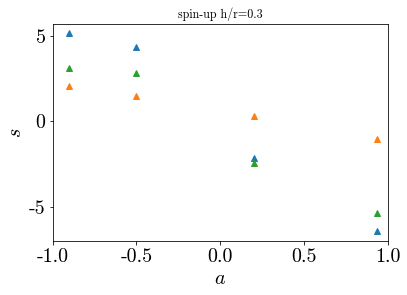

In [282]:
a_hor3=[-0.9,-0.5,0.2,0.9375]
stot_hor3=[spinup_an9['stot'],stot_n05,spinup_a2['stot'],spinup_a94['stot']]
sMA_hor3=[spinup_an9['sMA'],sMA_n05,spinup_a2['sMA'],spinup_a94['sMA']]
sEM_hor3=[spinup_an9['sEM'],sEM_n05,spinup_a2['sEM'],spinup_a94['sEM']]

plt.plot(a_hor3,stot_hor3,'^')
plt.plot(a_hor3,sMA_hor3,'^')
plt.plot(a_hor3,sEM_hor3,'^')

plt.title("spin-up h/r=0.3")
plt.xlabel(r"$a$")
plt.ylabel(r"$s$")
plt.xlim(-1,1)

In [340]:
jetP_cool=[-spinup_an5_cool["eEM"]*100,-spinup_a3_test['eEM']*100,-s_a5["eEM"]*100,-spinup_a94_cool["eEM"]*100]
jetP_hor3=[sEM]

plt.plot(a_cool_t,jetP_cool,"o",label="EM")
plt.xlim(0,1)
plt.ylim(0,100)

KeyError: 'eEM'

In [30]:
sEM_10rg_rad = data_1d['sEM_10rg']
lEM_10rg_rad = data_1d['lEM_10rg']
eEM_10rg_rad = data_1d['eEM_10rg']
stotcond_10rg_rad = data_1d['stotcond_10rg']
ltotcond_10rg_rad = data_1d['ltotcond_10rg']
etotcond_10rg_rad = data_1d['etotcond_10rg']
fMdisk_rad = data_1d['fMdisk']
fM_rad = data_1d['fM']
phiBH_rad = data_1d['phiBH']
csjet_1d_rad = data_1d['csjet_1d']
csdisk_1d_rad = data_1d['csdisk_1d']

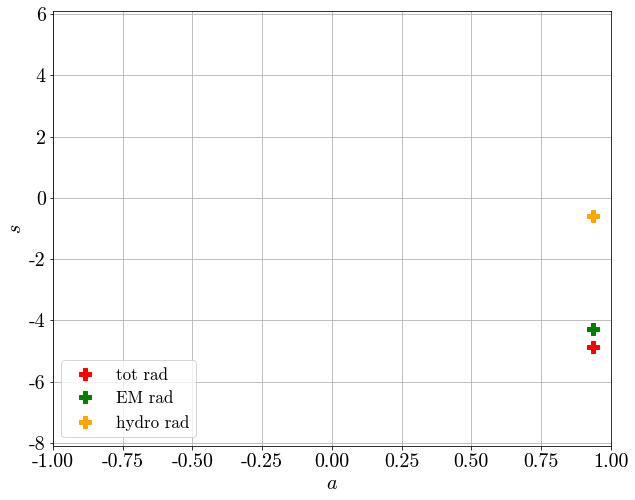

In [35]:
plt.figure(figsize=(10,8))
plt.plot(0.9375,stotcond_10rg_rad, 'P', color="red", markersize=12, label="tot rad")

plt.plot(0.9375,sEM_10rg_rad, 'P', color="green", markersize=12, label="EM rad")

plt.plot(0.9375,sMA_10rg_rad, 'P', color="orange", markersize=12, label="hydro rad")


plt.xlabel(r'$a$',fontsize=20)
plt.ylabel("$s$",fontsize=20)
plt.legend(fontsize=17, loc="lower left")
#plt.title("analysis floor bsq/rho<14")
plt.xlim(-1,1)
plt.ylim(-8.1,6.1)
plt.grid(b=1)

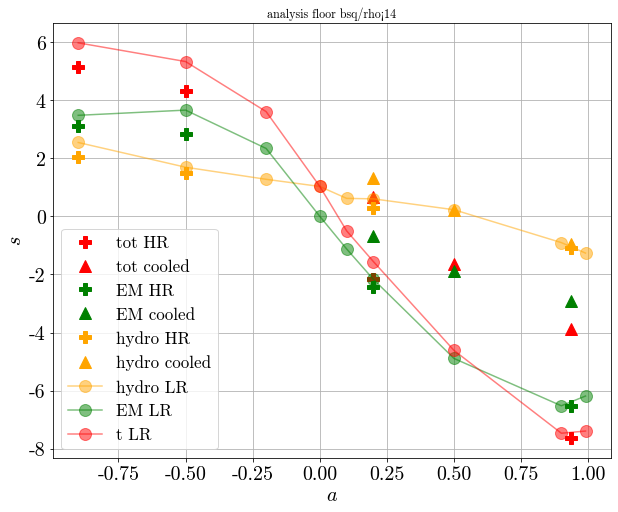

In [96]:
plt.figure(figsize=(10,8))
plt.plot(a_uncooled,stot_uncooled, 'P', color="red", markersize=12, label="tot HR")
plt.plot(a_cooled,stot_cooled,'^', color="red", markersize=12,label="tot cooled")

plt.plot(a_uncooled,sEM_uncooled, 'P', color="green", markersize=12, label="EM HR")
plt.plot(a_cooled,sEM_cooled, '^', color="green", markersize=12,label="EM cooled")

plt.plot(a_uncooled,sMA_uncooled, 'P', color="orange", markersize=12, label="hydro HR")
plt.plot(a_cooled,sMA_cooled, '^', color="orange", markersize=12,label="hydro cooled")

plt.plot(alist,shydro_5rg, '-o', color="orange", markersize=12, label="hydro LR", alpha=0.5)
plt.plot(alist,sEM_5rg, '-o', color="green", markersize=12, label="EM LR", alpha=0.5)
plt.plot(alist,s_totcond_5rg, '-o', color="red", markersize=12, label="t LR", alpha=0.5)



plt.xlabel(r'$a$',fontsize=20)
plt.ylabel("$s$",fontsize=20)
plt.legend(fontsize=17, loc="lower left")
plt.title("analysis floor bsq/rho<14")
plt.grid(b=1)

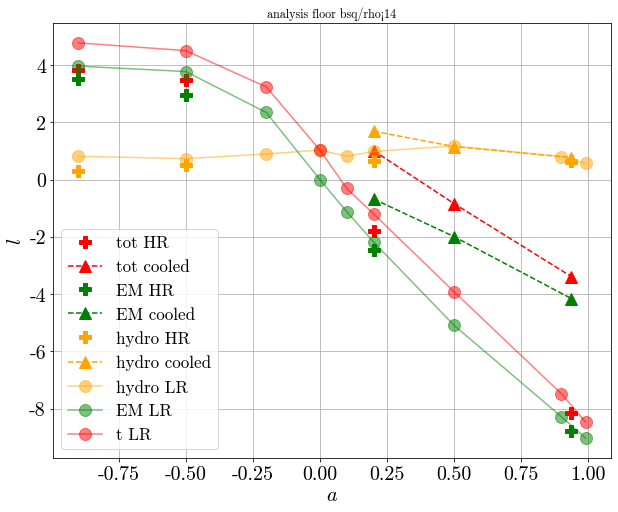

In [108]:
plt.figure(figsize=(10,8))
plt.plot(a_uncooled,-ltot_uncooled, 'P', color="red", markersize=12, label="tot HR")
plt.plot(a_cooled,-ltot_cooled,'--^', color="red", markersize=12,label="tot cooled")

plt.plot(a_uncooled,-lEM_uncooled, 'P', color="green", markersize=12, label="EM HR")
plt.plot(a_cooled,-lEM_cooled, '--^', color="green", markersize=12,label="EM cooled")

plt.plot(a_uncooled,-lMA_uncooled, 'P', color="orange", markersize=12, label="hydro HR")
plt.plot(a_cooled,-lMA_cooled, '--^', color="orange", markersize=12,label="hydro cooled")

plt.plot(alist,lhydro_5rg, '-o', color="orange", markersize=12, label="hydro LR", alpha=0.5)
plt.plot(alist,lEM_5rg, '-o', color="green", markersize=12, label="EM LR", alpha=0.5)
plt.plot(alist,l_totcond_5rg, '-o', color="red", markersize=12, label="t LR", alpha=0.5)



plt.xlabel(r'$a$',fontsize=20)
plt.ylabel("$l$",fontsize=20)
plt.legend(fontsize=17, loc="lower left")
plt.title("analysis floor bsq/rho<14")
plt.grid(b=1)

In [117]:
PhiBH_02.shape

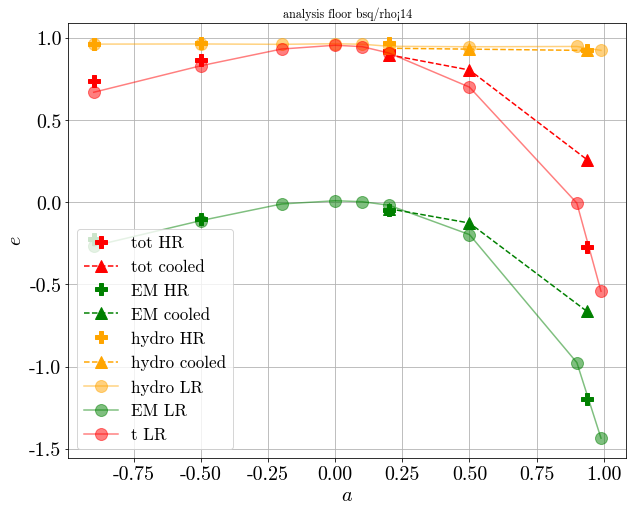

In [109]:
plt.figure(figsize=(10,8))
plt.plot(a_uncooled,etot_uncooled, 'P', color="red", markersize=12, label="tot HR")
plt.plot(a_cooled,etot_cooled,'--^', color="red", markersize=12,label="tot cooled")

plt.plot(a_uncooled,eEM_uncooled, 'P', color="green", markersize=12, label="EM HR")
plt.plot(a_cooled,eEM_cooled, '--^', color="green", markersize=12,label="EM cooled")

plt.plot(a_uncooled,eMA_uncooled, 'P', color="orange", markersize=12, label="hydro HR")
plt.plot(a_cooled,eMA_cooled, '--^', color="orange", markersize=12,label="hydro cooled")

plt.plot(alist,ehydro_5rg, '-o', color="orange", markersize=12, label="hydro LR", alpha=0.5)
plt.plot(alist,eEM_5rg, '-o', color="green", markersize=12, label="EM LR", alpha=0.5)
plt.plot(alist,e_totcond_5rg, '-o', color="red", markersize=12, label="t LR", alpha=0.5)



plt.xlabel(r'$a$',fontsize=20)
plt.ylabel("$e$",fontsize=20)
plt.legend(fontsize=17, loc="lower left")
plt.title("analysis floor bsq/rho<14")
plt.grid(b=1)

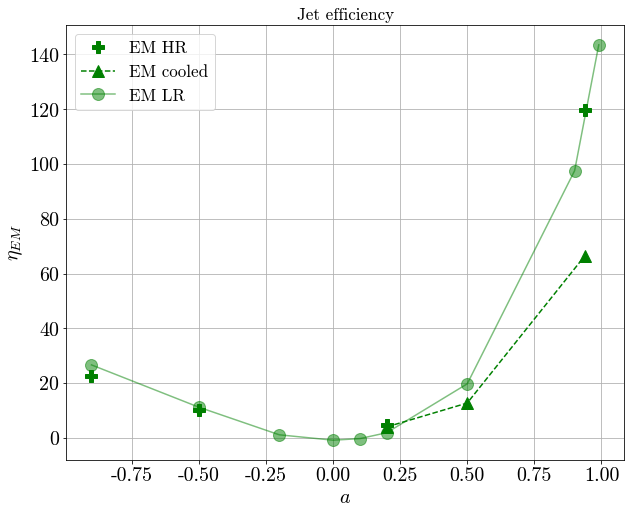

In [106]:
plt.figure(figsize=(10,8))

plt.plot(a_uncooled,-eEM_uncooled*100, 'P', color="green", markersize=12, label="EM HR")
plt.plot(a_cooled,-eEM_cooled*100, '--^', color="green", markersize=12,label="EM cooled")

plt.plot(alist,-eEM_5rg*100, '-o', color="green", markersize=12, label="EM LR", alpha=0.5)



plt.xlabel(r'$a$',fontsize=20)
plt.ylabel("$\eta_{EM}$",fontsize=20)
plt.legend(fontsize=17, loc="upper left")
plt.title("Jet efficiency",fontsize=17)
plt.grid(b=1)

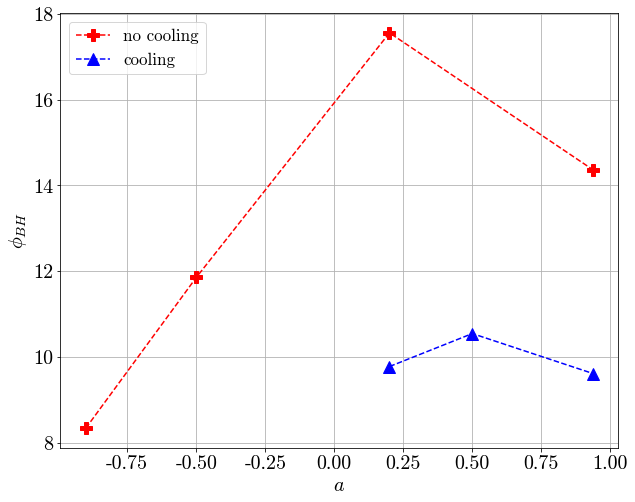

In [122]:
plt.figure(figsize=(10,8))

plt.plot(a_uncooled,phiBH_uncooled, '--P', color="red", markersize=12, label="no cooling")
plt.plot(a_cooled,phiBH_cooled, '--^', color="blue", markersize=12,label="cooling")


plt.xlabel(r'$a$',fontsize=20)
plt.ylabel("$\phi_{BH}$",fontsize=20)
plt.legend(fontsize=17, loc="upper left")
plt.grid(b=1)

# $\dot{M}$ vs $a$

In [117]:
Mdot_cool_vsa=[ta_an9_cool["fMdisk"][iofr(7)],ta_an5_cool["fMdisk"][iofr(7)],ta_a00_cool["fMdisk"][iofr(7)],ta_a02_cool["fMdisk"][iofr(7)],ta_a3_cool["fMdisk"][iofr(7)],ta_a5_cool["fMdisk"][iofr(7)],ta_a94_cool["fMdisk"][iofr(7)]]
Mdot_vsa=np.array([ta_an9["fMdisk_1d"][iofr(7)],ta_an5["fMdisk_1d"][iofr(7)],ta_a2["fMdisk_1d"][iofr(7)],ta_a94["fMdisk"][iofr(7)]])

C:\Users\Beverly\Documents\HAMR_macros\pp.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # coding: utf-8
C:\Users\Beverly\Documents\HAMR_macros\pp.py:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  sys.path.append("/gpfs/alpine/phy129/proj-shared/T65TOR/HAMR3/lib/python3.7/site-packages")


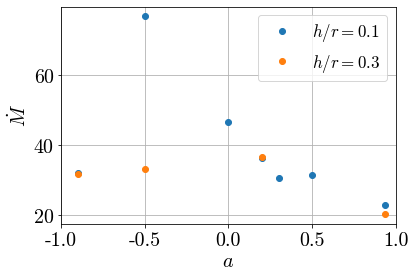

In [119]:
plt.plot(a_cool,Mdot_cool,"o",label=r"$h/r=0.1$")
plt.plot(a_uncooled, Mdot_vsa,"o",label=r"$h/r=0.3$")

plt.ylabel(r"$\dot{M}$")
plt.xlabel(r"$a$")
plt.xlim(-1,1)

plt.legend(fontsize=17)
plt.grid(b=1)

# $\eta$ vs. $a$

C:\Users\Beverly\Documents\HAMR_macros\pp.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # coding: utf-8
C:\Users\Beverly\Documents\HAMR_macros\pp.py:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  sys.path.append("/gpfs/alpine/phy129/proj-shared/T65TOR/HAMR3/lib/python3.7/site-packages")


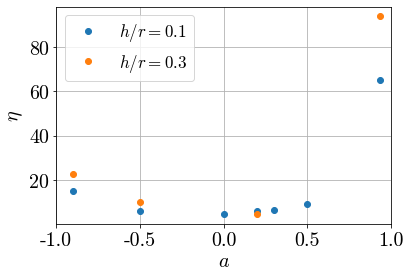

In [71]:
plt.plot(a_cool, -np.array(eEM_cool)*100,"o",label=r"$h/r=0.1$")
plt.plot(a_uncooled, -np.array(eEM_uncooled)*100,"o",label=r"$h/r=0.3$")

plt.ylabel(r"$\eta$")
plt.xlabel(r"$a$")
plt.xlim(-1,1)

plt.legend(fontsize=17)
plt.grid(b=1)

# a(t) cosmological spin-down

In [384]:
m = np.linspace(0.0,1.00,1000) #make sure integrating over right interval

a0_1 = 1.0 #A0top = 1
a0_5 = 0.5 #A0top = 1
a0_0 = 0.0 #A0no = 0
a0_n1 = -1.0 #A0ret = -1

Rms0_0 = Rms(a0_0)
Rms0_n1 = Rms(a0_n1)
Rms0_1 = Rms(a0_1)
Rms0_0p5 = Rms(a0_0p5)

#This can be 1 for all calculations
M0 = 1.0

y_0 = [M0, a0_0]
y_1 = [M0, a0_1]
y_5 = [M0, a0_5]
y_n1 = [M0, a0_n1]

In [385]:
def odefora(y,m):
    M, a = y
    dydm = [ein_func(a), (1/M)*(s_func(a))]
    return dydm

def solnsfora(y, m):
    soln = np.array(odeint(odefora, y, m))
    M = []
    a = []
    for i in range(0, len(soln)):
        M.append(soln[i][0])
        a.append(soln[i][1])
    return(M, a)

In [386]:
ein_func = PchipInterpolator(np.array(a_cool_t), np.array(e_tot_cool_t), extrapolate=True)
lin_func = PchipInterpolator(np.array(a_cool_t), np.array(l_tot_cool_t), extrapolate=True)
s_func = PchipInterpolator(np.array(a_cool_t), np.array(spinup_tot_cool_t), extrapolate=True)

C:\Users\Beverly\Documents\HAMR_macros\pp.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # coding: utf-8


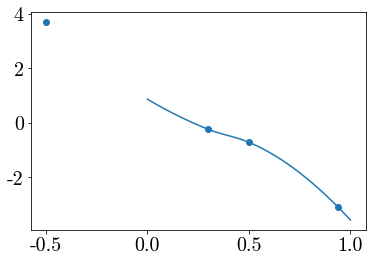

In [391]:
plt.plot(m,s_func(m))
plt.scatter(a_cool_t,spinup_tot_cool_t)

In [388]:
Msol_a0, asol_a0 = MADsolns_bev(y_0, m)
Msol_a1, asol_a1 = MADsolns_bev(y_1, m)
Msol_a5, asol_a5 = MADsolns_bev(y_5, m)
Msol_an1, asol_an1 = MADsolns_bev(y_n1, m)
#myMdat_a0_5, myadat_a0_5 = MADsolns_bev((1,0.5), m)

C:\Users\Beverly\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


C:\Users\Beverly\Documents\HAMR_macros\pp.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # coding: utf-8
C:\Users\Beverly\Documents\HAMR_macros\pp.py:11: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  #import sympy as sym
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


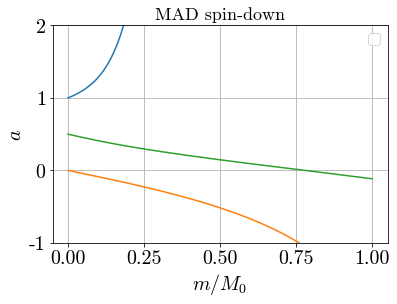

In [392]:
plt.plot(m,asol_a1)
plt.plot(m,asol_a0)
#plt.plot(m,asol_an1)
plt.plot(m,asol_a5)

plt.ylim(-1,2)

plt.ylabel(r"$a$")
plt.xlabel(r"$m/M_0$")
plt.title("MAD spin-down",fontsize = 18)
plt.grid(b=1)
plt.legend(fontsize=15)

C:\Users\Beverly\Documents\HAMR_macros\pp.py:14: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  from distutils.core import setup
C:\Users\Beverly\Documents\HAMR_macros\pp.py:40: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  from mpl_toolkits.axes_grid1 import make_axes_locatable


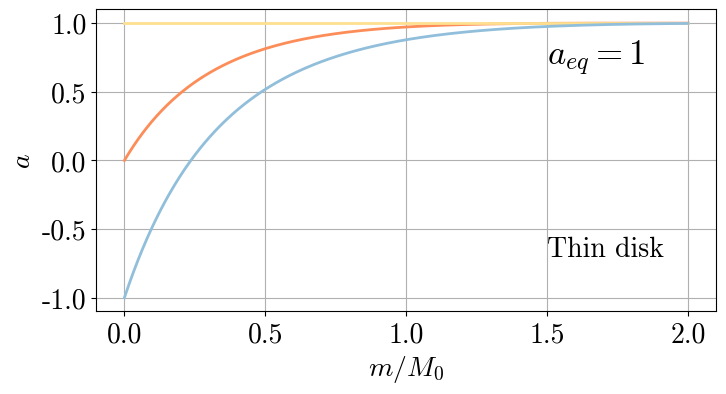

In [299]:
## This is solving the coupled ODEs. This is different from the Sikora paper in that I multiply Lin by -1 for retrograde case
## Make this into a function

plt.figure(figsize=(8,4),dpi=100)

#a0 = 0
y0_0 = [M0, a0_0]
sol_a0_0 = np.array(odeint(odesPro,y0_0,m3))
Msol_a0_0 = []
asol_a0_0 = []
for i in range(0, len(sol_a0_0)):
    Msol_a0_0.append(sol_a0_0[i][0])
    asol_a0_0.append(sol_a0_0[i][1])
plt.plot(m3,asol_a0_0, label=r"$a_{\rm 0} = 0$", color=cb_orange,lw=2)

#Prograde, a0=1
y0_1 = [M0, a0_1]
sol_a0_1 = np.array(odeint(odesPro,y0_1,m3))
Msol_a0_1 = []
asol_a0_1 = []
for i in range(0, len(sol_a0_1)):
    Msol_a0_1.append(sol_a0_1[i][0])
    asol_a0_1.append(sol_a0_1[i][1])
plt.plot(m3,asol_a0_1, label=r"$a_{\rm 0} = 1$", color=cb_yellow,lw=2)

#Retrograde, a0=-1
y0_n1 = [M0, a0_n1]
sol_a0_n1 = np.array(odeint(odesPro,y0_n1,m3))
Msol_a0_n1 = []
asol_a0_n1 = []
for i in range(0, len(sol_a0_n1)):
    Msol_a0_n1.append(sol_a0_n1[i][0])
    asol_a0_n1.append(sol_a0_n1[i][1])
plt.plot(m3,asol_a0_n1, label=r"$a_{\rm 0} = -1$", color=cb_lblue,lw=2)


#plt.title("Spin vs. Accreted Mass",fontsize=16)
plt.xlabel(r'$m/M_0$',fontsize=20)
plt.ylabel("$a$",fontsize=20)
plt.grid(b=1)
plt.text(1.5, -0.7, 'Thin disk', fontsize=20)
plt.text(1.5, 0.7,r"$a_{eq} = 1$", fontsize=25)
#plt.legend()
plt.show()

#print(max(AtryPro))
#print(max(AtryRet))

In [302]:
styleplots()

def make_mad_plots(fname = "simulations_summary.npz"):
    d = np.load(fname)
    plt.figure(figsize=(10,6),dpi=100)
    plot_eta(d)
    plt.figure(figsize=(10,6),dpi=100)
    plot_spar(d)
    d.close()
    
def plot_eta(d,sf=1):
    #############
    #
    # eta
    #
    #############
    ax2 = plt.gca()
    ax2.errorbar(d["alist"],100*d["etalist"],yerr=2*100*d["etastdlist"],mec='r',mfc='none',ecolor='r',fmt='o',lw=2,elinewidth=2,mew=1,color='r')
    #fake plot call: move it out of plot bounds but use it to populate legend info
    ax2.errorbar(d["alist"]-10,100*d["etalist"],yerr=2*100*d["etastdlist"],label=r'$p$',mec='r',mfc='none',ecolor='r',fmt='o',lw=2,elinewidth=2,mew=1,color='r',ls='-')
    mya=np.linspace(-1,1,num=2000)
    eta_func = PchipInterpolator(d["alist"], 100*d["etalist"], extrapolate=True)
    plt.plot(mya,eta_func(mya),'r-',lw=2)
    plt.xlim(-1,1)
    plt.ylim(0,150)
    plt.xlabel(r"$a$",fontsize=20)
    plt.ylabel(r"$\eta$",fontsize=20)
    plt.grid(b=1)
    plt.savefig("eta_mad.png",dpi=300)

def plot_spar(d,sf=1):
    #############
    #
    # spin-up parameter
    #
    ############
    ax4 = plt.gca()
    spar_func = PchipInterpolator(d["alist"],d["sparlist"], extrapolate=True)
    mya=np.linspace(-1,1,num=2000)
    lspar,=plt.plot(mya,spar_func(mya),'r-',lw=2, alpha=0.7)
    ax4.styleplots()

def make_mad_plots(fname = "simulations_summary.npz"):
    d = np.load(fname)
    plt.figure(figsize=(10,6),dpi=100)
    plot_eta(d)
    plt.figure(figsize=(10,6),dpi=100)
    plot_spar(d)
    d.close()
    
def plot_eta(d,sf=1):
    #############
    #
    # eta
    #
    #############
    ax2 = plt.gca()
    ax2.errorbar(d["alist"],100*d["etalist"],yerr=2*100*d["etastdlist"],mec='r',mfc='none',ecolor='r',fmt='o',lw=2,elinewidth=2,mew=1,color='r')
    #fake plot call: move it out of plot bounds but use it to populate legend info
    ax2.errorbar(d["alist"]-10,100*d["etalist"],yerr=2*100*d["etastdlist"],label=r'$p$',mec='r',mfc='none',ecolor='r',fmt='o',lw=2,elinewidth=2,mew=1,color='r',ls='-')
    mya=np.linspace(-1,1,num=2000)
    eta_func = PchipInterpolator(d["alist"], 100*d["etalist"], extrapolate=True)
    plt.plot(mya,eta_func(mya),'r-',lw=2)
    plt.xlim(-1,1)
    plt.ylim(0,150)
    plt.xlabel(r"$a$",fontsize=20)
    plt.ylabel(r"$\eta$",fontsize=20)
    plt.grid(b=1)
    plt.savefig("eta_mad.png",dpi=300)

def plot_spar(d,sf=1):
    #############
    #
    # spin-up parameter
    #
    ############
    ax4 = plt.gca()
    spar_func = PchipInterpolator(d["alist"],d["sparlist"], extrapolate=True)
    mya=np.linspace(-1,1,num=2000)
    lspar,=plt.plot(mya,spar_func(mya),'r-',lw=2, alpha=0.7)
    ax4.errorbar(d["alist"],d["sparlist"],yerr=2*d["sparstdlist"],mec='r',mfc='none',ecolor='r',fmt='o',color='red',lw=2,elinewidth=2,mew=1)
    #fake plot call: move it out of plot bounds but use it to populate legend info
    ax4.errorbar(d["alist"]-100,d["sparlist"],yerr=2*d["sparstdlist"],label=r"$s_{\rm MAD}$",mec='r',mfc='none',ecolor='r',fmt='o',color='red',ls='-',lw=2,elinewidth=2,mew=1)
    plt.xlim(-1,1)
    plt.xlabel(r"$a$",fontsize=20)
    plt.ylabel(r"$s$",fontsize=20)
    plt.grid(b=1)
    plt.savefig("spar_mad.png",dpi=300),errorbar(d["alist"]-100,d["sparlist"],yerr=2*d["sparstdlist"],label=r"$s_{\rm MAD}$",mec='r',mfc='none',ecolor='red',fmt='o',color='red',ls='-',lw=2,elinewidth=2,mew=1)
    plt.xlim(-1,1)
    plt.xlabel(r"$a$",fontsize=20)
    plt.ylabel(r"$s$",fontsize=20)
    plt.grid(b=1)
    plt.savefig("spar_mad.png",dpi=300)

In [356]:
a
eta_func2 = PchipInterpolator(a_cool_t, -100*np.array(e_tot_cool_t), extrapolate=True)
spar_func2 = PchipInterpolator(a_cool_t,np.array(spinup_tot_cool_t), extrapolate=True)

In [357]:
e_tot_cool_t

[0.8692906, 0.8872217, 0.84381425, 0.53650236]

C:\Users\Beverly\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\Beverly\Documents\HAMR_macros\pp.py:65: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fontsize = 38
C:\Users\Beverly\Documents\HAMR_macros\pp.py:76: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  np.seterr(divide='ignore')


0.865421336834831


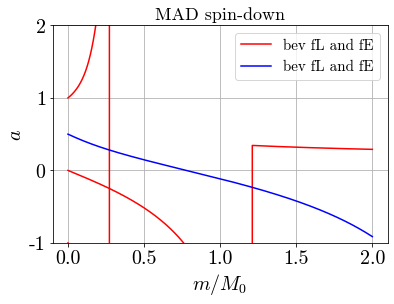

In [359]:
from scipy.interpolate import PchipInterpolator
from scipy.interpolate import griddata
from scipy.interpolate import interp1d
from scipy.optimize import brentq
from scipy.optimize import curve_fit
from scipy.interpolate import InterpolatedUnivariateSpline
from matplotlib.gridspec import GridSpec

m = np.linspace(0.0,2.00,1000) #make sure integrating over right interval

fLbev_func = PchipInterpolator(np.array(a_cool_t), np.array(l_tot_cool_t), extrapolate=True)
fEbev_func = PchipInterpolator(np.array(a_cool_t), np.array(e_tot_cool_t), extrapolate=True)

def Lindata(M, a):
    L = (spar_func2(a) + 2*a*Eindata(a))*M
    return L

def Eindata(a):
    E = (1 - eta_func2(a)/100)
    return E

def odesProData(y, m):
    M, a = y
    dydm = [Eindata(a), spar_func(a)/M]
    return dydm

def odesData_bev(y, m):
    M, a = y
    dydm = [fEbev_func(a), (1/M)*(fLbev_func(a) - 2*a*fEbev_func(a))]
    return dydm

def MADsolns_bev(y, m):
    soln = np.array(odeint(odesData_bev, y, m))
    M = []
    a = []
    for i in range(0, len(soln)):
        M.append(soln[i][0])
        a.append(soln[i][1])
    return(M, a)

def MADsolns(y, m):
    soln = np.array(odeint(odesProData, y, m))
    M = []
    a = []
    for i in range(0, len(soln)):
        M.append(soln[i][0])
        a.append(soln[i][1])
    return(M, a)

Mdat_a0_0, adat_a0_0 = MADsolns(y0_0, m)
Mdat_a0_1, adat_a0_1 = MADsolns(y0_1, m)
Mdat_a0_n1, adat_a0_n1 = MADsolns(y0_n1, m)

myMdat_a0_0, myadat_a0_0 = MADsolns_bev(y0_0, m)
myMdat_a0_1, myadat_a0_1 = MADsolns_bev(y0_1, m)
myMdat_a0_n1, myadat_a0_n1 = MADsolns_bev(y0_n1, m)
myMdat_a0_5, myadat_a0_5 = MADsolns_bev((1,0.5), m)

#Plot spindown for MAD
#plt.figure(figsize=(10,6),dpi=100)
#plt.plot(m,adat_a0_1,color="purple", label='Sasha spar & eta')
#plt.plot(m,adat_a0_0, color="purple")
#plt.plot(m,adat_a0_n1, color="purple")

plt.plot(m,myadat_a0_1, color="red", label='bev fL and fE')
plt.plot(m,myadat_a0_0, color="red")
plt.plot(m,myadat_a0_n1,color="red")
plt.plot(m,myadat_a0_5, color="blue", label='bev fL and fE')


plt.ylim(-1,2)

plt.ylabel(r"$a$")
plt.xlabel(r"$m/M_0$")
plt.title("MAD spin-down",fontsize = 18)
plt.grid(b=1)
plt.legend(fontsize=15)
#plt.xlim(0,1)
#plt.ylim(0,1)
#plt.yscale('log')
print(max(adat_a0_n1))

In [ ]:
plt.figure(figsize=(10,8))

plt.plot(a_uncooled,-eEM_uncooled*100, 'P', color="green", markersize=12, label="EM HR")
plt.plot([0.3,0.5,0.9375],-eEM_cooled*100, '--^', color="green", markersize=12,label="EM cooled")

plt.plot(alist,-eEM_5rg*100, '-o', color="green", markersize=12, label="EM LR", alpha=0.5)



plt.xlabel(r'$a$',fontsize=20)
plt.ylabel("$\eta_{EM}$",fontsize=20)
plt.legend(fontsize=17, loc="upper left")
plt.title("Jet efficiency",fontsize=17)
plt.grid(b=1)

C:\Users\Beverly\Documents\HAMR_macros\pp.py:1: RuntimeWarning: invalid value encountered in sqrt
  # coding: utf-8
C:\Users\Beverly\Documents\HAMR_macros\pp.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # coding: utf-8


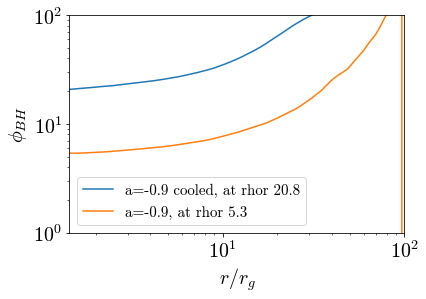

In [78]:
plt.loglog(r[0,:,ny//2,0],ta_an9_cool["PhiBH"]*np.sqrt(4*np.pi)/np.sqrt(ta_an9_cool["fMdisk"]),label="a=-0.9 cooled, at rhor %.1f" % (ta_an9_cool["PhiBH"]*np.sqrt(4*np.pi)/np.sqrt(ta_an9_cool["fMdisk"][iofr(7)]))[iofr(rhor_an9_cool)] )
plt.loglog(r[0,:,ny//2,0],(ta_an9["PhiBH_1d"]*np.sqrt(4*np.pi)/ta_an9["fMdisk_1d"]), label="a=-0.9, at rhor %.1f" % (ta_an9["PhiBH_1d"]*np.sqrt(4*np.pi)/ta_an9["fMdisk_1d"][iofr(7)])[iofr(rhor_an9)])

plt.ylabel(r"$\phi_{BH}$")
plt.xlabel(r"$r/r_g$")
plt.ylim(1e0,1e2)
plt.xlim(rhor,1e2)
plt.legend(fontsize=15)

In [80]:
ta_a94["fMdisk"][iofr(7)]
ta_a94["PhiBH"].sum(-1)*np.sqrt(4*np.pi)/ta_a94["fMdisk"][iofr(7)]

In [81]:
ta_a94_cool["phibh"]

KeyError: 'phibh is not a file in the archive'

## a=0.3 cooled

In [83]:
# Test cell for plotting

#Set directory
#dir = "C:\H-AMR\HAMR\HAMR_CPU" 
#dir = r'D:\H-AMRdata\highresMADs\cool_disk\a09375_cooled'
dir = r'D:\H-AMRdata\highresMADs\cool_disk\a03_cooled'

os.chdir(dir) 

D=505

rblock_new(D)
rpar_new(D)
rgdump_griddata(dir)
rdump_griddata(dir,D)

misc_calc(calc_bu=1, calc_bsq=1, calc_eu=RESISTIVE, calc_esq=RESISTIVE)
psicalc(0,0)

C:\Users\Beverly\Documents\HAMR_macros\pp.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # coding: utf-8


Text(0.1, 0.1, 'a=0.3')

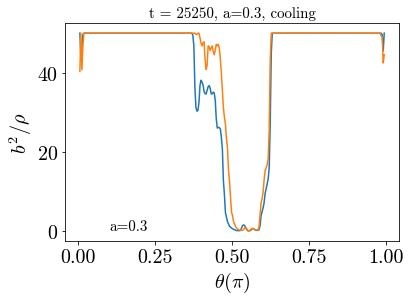

In [85]:
plt.plot(h[0,10,:,0]/np.pi,(bsq/rho)[0,10,:,0])
plt.plot(h[0,5,:,0]/np.pi,(bsq/rho)[0,5,:,0])
plt.ylabel(r'$b^2/\rho$')
plt.xlabel(r'$\theta (\pi)$')
plt.title("t = %d, a=0.3, cooling" %t,fontsize=15)
plt.text(0.1,0.1,"a=%.1f" %a,fontsize=15)

C:\Users\Beverly\Documents\HAMR_macros\pp.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # coding: utf-8


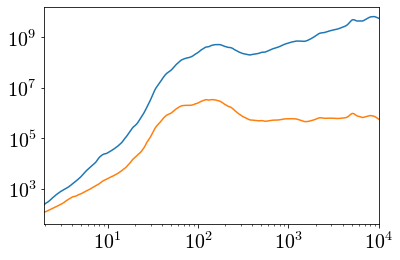

In [111]:
plt.loglog(r[0,:,ny//2,0],Sigma_03cooled[1055,0,:])
plt.loglog(r[0,:,ny//2,0],Sigma_03cooled_2[1056,0,:])

plt.xlim(rhor,1e4)

# title=time, a=0.3 cooled


C:\Users\Beverly\Documents\HAMR_macros\pp.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # coding: utf-8


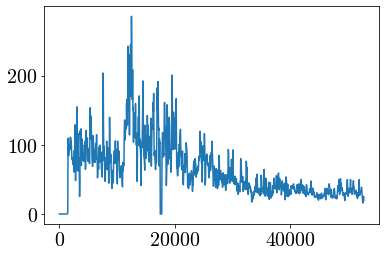

In [95]:
plt.plot(t_03cooled, Mdot_03cooled)

In [ ]:
plt.plot(t_03cooled, Mdot_03cooled)

C:\Users\Beverly\Documents\HAMR_macros\pp.py:2: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # python pp.py build_ext --inplace


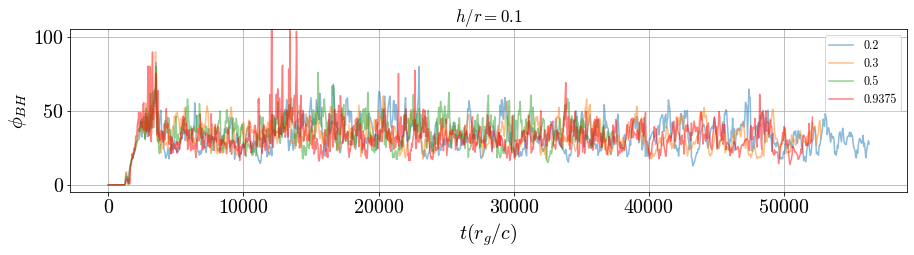

In [153]:
plt.figure(figsize=(15,3))
plt.plot(t_02cooled, phibh_02cooled,label="0.2", alpha=0.5)
plt.plot(t_03cooled, phibh_03cooled,label="0.3", alpha=0.5)
plt.plot(t_05cooled, phibh_05cooled,label="0.5", alpha=0.5)
plt.plot(t_09375cooled, phibh_09375cooled,label="0.9375", color="red", alpha=0.5)
plt.plot(t_09375cooled_p2, phibh_09375cooled_p2, color="red", alpha=0.5)
#plt.plot(t_02,Phibh_02*np.sqrt(4*np.pi)/np.sqrt(Mdot_02),label="not cooled")
#plt.plot(t_02,phibh_02)
plt.ylabel(r'$\phi_{BH}$')
plt.xlabel(r'$t (r_g/c)$')
plt.title(r"$h/r=0.1$",fontsize=17)
plt.ylim(-5,105)
plt.legend(fontsize=12)
plt.grid()

C:\Users\Beverly\Documents\HAMR_macros\pp.py:2: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # python pp.py build_ext --inplace


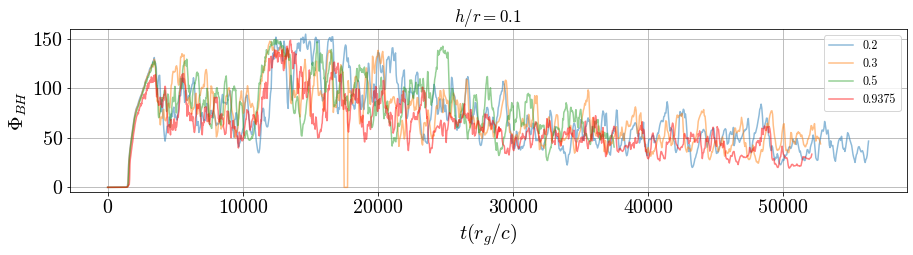

In [161]:
plt.figure(figsize=(15,3))
plt.plot(t_02cooled, Phibh_02cooled,label="0.2", alpha=0.5)
plt.plot(t_03cooled, Phibh_03cooled,label="0.3", alpha=0.5)
plt.plot(t_05cooled, Phibh_05cooled,label="0.5", alpha=0.5)
plt.plot(t_09375cooled, Phibh_09375cooled,label="0.9375", color="red", alpha=0.5)
plt.plot(t_09375cooled_p2, Phibh_09375cooled_p2, color="red", alpha=0.5)
#plt.plot(t_02,Phibh_02*np.sqrt(4*np.pi)/np.sqrt(Mdot_02),label="not cooled")
#plt.plot(t_02,phibh_02)
plt.ylabel(r'$\Phi_{BH}$')
plt.xlabel(r'$t (r_g/c)$')
plt.title(r"$h/r=0.1$",fontsize=17)
plt.ylim(-5,160)
plt.legend(fontsize=12)
plt.grid()

C:\Users\Beverly\Documents\HAMR_macros\pp.py:2: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # python pp.py build_ext --inplace


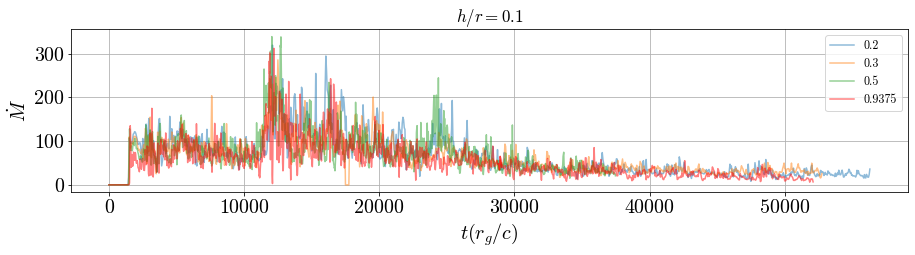

In [154]:
plt.figure(figsize=(15,3))
plt.plot(t_02cooled, Mdot_02cooled,label="0.2", alpha=0.5)
plt.plot(t_03cooled, Mdot_03cooled,label="0.3", alpha=0.5)
plt.plot(t_05cooled, Mdot_05cooled,label="0.5", alpha=0.5)
plt.plot(t_09375cooled, Mdot_09375cooled,label="0.9375", color="red", alpha=0.5)
plt.plot(t_09375cooled_p2, Mdot_09375cooled_p2,color="red", alpha=0.5)
#plt.plot(t_02,Phibh_02*np.sqrt(4*np.pi)/np.sqrt(Mdot_02),label="not cooled")
#plt.plot(t_02,phibh_02)
plt.ylabel(r'$\dot{M}$')
plt.xlabel(r'$t (r_g/c)$')
plt.title(r"$h/r=0.1$",fontsize=17)
#plt.ylim(-5,105)
plt.legend(fontsize=12)
plt.grid()

C:\Users\Beverly\Documents\HAMR_macros\pp.py:2: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # python pp.py build_ext --inplace


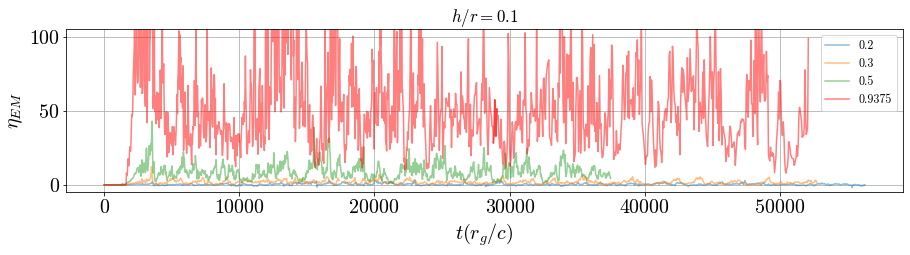

In [155]:
plt.figure(figsize=(15,3))
plt.plot(t_02cooled, (-(np.array(fEM_02cooled)/np.array(Mdot_02cooled)))*100,label="0.2", alpha=0.5)
plt.plot(t_03cooled, (-(np.array(fEM_03cooled_rhor)/np.array(Mdot_03cooled)))*100,label="0.3", alpha=0.5)
plt.plot(t_05cooled, (-(np.array(fEM_05cooled)/np.array(Mdot_05cooled)))*100,label="0.5", alpha=0.5)
plt.plot(t_09375cooled, (-(np.array(fEM_09375cooled_rhor)/np.array(Mdot_09375cooled)))*100,label="0.9375", color="red", alpha=0.5)
plt.plot(t_09375cooled_p2, (-(np.array(fEM_09375cooled_rhor_p2)/np.array(Mdot_09375cooled_p2)))*100, color="red", alpha=0.5)
#plt.plot(t_09375cooled, fEM_09375cooled,label="0.9375", alpha=0.8)
#plt.plot(t_09375cooled_p2, fEM_09375cooled_p2,label="0.9375", alpha=0.8)
#plt.plot(t_02,Phibh_02*np.sqrt(4*np.pi)/np.sqrt(Mdot_02),label="not cooled")
#plt.plot(t_02,phibh_02)
plt.ylabel(r'$\eta_{EM}$')
plt.xlabel(r'$t (r_g/c)$')
plt.title(r"$h/r=0.1$",fontsize=17)
plt.ylim(-5,105)
plt.legend(fontsize=12)
plt.grid()

## a=0.5 cooled

In [139]:
# Test cell for plotting

#Set directory
#dir = "C:\H-AMR\HAMR\HAMR_CPU" 
#dir = r'D:\H-AMRdata\highresMADs\cool_disk\a09375_cooled'
dir = r'D:\H-AMRdata\highresMADs\cool_disk\a05_cooled'

os.chdir(dir) 

D=505

rblock_new(D)
rpar_new(D)
rgdump_griddata(dir)
rdump_griddata(dir,D)

misc_calc(calc_bu=1, calc_bsq=1, calc_eu=RESISTIVE, calc_esq=RESISTIVE)
psicalc(0,0)

C:\Users\Beverly\Documents\HAMR_macros\pp.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # coding: utf-8


Text(0.1, 0.1, 'a=0.5')

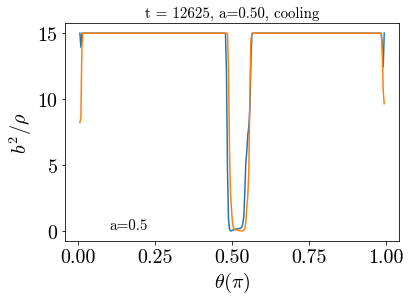

In [145]:
plt.plot(h[0,10,:,0]/np.pi,(bsq/rho)[0,10,:,0])
plt.plot(h[0,5,:,0]/np.pi,(bsq/rho)[0,5,:,0])
plt.ylabel(r'$b^2/\rho$')
plt.xlabel(r'$\theta (\pi)$')
plt.title("t = %d, a=%.2f, cooling" %(t,a),fontsize=15)
plt.text(0.1,0.1,"a=%.1f" %a,fontsize=15)

In [146]:
phibh_05cooled = []
Phibh_05cooled=[]
t_05cooled=[]
Mdot_05cooled=[]
fEM_05cooled=[]

diskcut=10

In [147]:
for i in range(0, 1500, 1): 
    #Run read-in of data
    rblock_new(i)
    rpar_new(i)
    rgdump_griddata(dir)
    rdump_griddata(dir,i)
    #set_uniform_grid()
    misc_calc(calc_bu=1, calc_bsq=1, calc_eu=RESISTIVE, calc_esq=RESISTIVE)
    #calc_RAD()
    #set_pole()
    psicalc(0,0)

    ###Fluxes

    calc_phibh()
    calc_Mdot(diskcut) # Mdot, Mdot_disk
    calc_Edot(diskcut)


    fEtotEM = Edot_EMtot[0]
    fMdisk = Mdot_disk[0]
    PhiBH = phibh[0]
    
    Phibh_rhor=PhiBH[iofr(rhor)]
    Phibh_05cooled.append(Phibh_rhor)
    t_05cooled.append(t)
    fEM_05cooled.append(fEtotEM[iofr(rhor)])
    Mdot_05cooled.append(fMdisk[iofr(7)])
    phibh_05cooled.append(Phibh_rhor*np.sqrt(4*np.pi)/np.sqrt(fMdisk[iofr(7)]))
    print(t)

0.0
25.14723228823928
50.24233550487683
75.19078188755574
100.03137068305627
125.01905052584368
150.0024481695336
175.1226749522109
200.0431367470881
225.0764579642965
250.11891151078612
275.1057106457256
300.08033422702823
325.1471966448858
350.00558929555194
375.0456193870074
400.12918178623005
425.0197120130331
450.0228040750987
475.0368653135456
500.061735820097
525.1185655404065
550.0296463053554
575.1415617548295
600.0406563221062
625.1103070575012
650.0337499244104
675.086771921939
700.1340133389479
725.0734469528421
750.0679296030214
775.0735254034115
800.108252521229
825.0192740639201
850.0689399811707
875.0446753446686
900.0674634845768
925.0567211787318
950.1327421168638
975.0603832794219
1000.0922793687399
1025.0084869742589
1050.1002079525122
1075.1376545985117
1100.0567519343615
1125.0443488293197
1150.0315968638877
1175.0369196664687
1200.0403980948126
1225.1281592264593
1250.0179255447672
1275.084339413437
1300.084376972864
1325.0202729518358
1350.0200973883548
1375.011

## a=0.94 cooled

In [92]:
# Test cell for plotting

#Set directory
#dir = "C:\H-AMR\HAMR\HAMR_CPU" 
#dir = r'D:\H-AMRdata\highresMADs\cool_disk\a09375_cooled'
dir = r'D:\H-AMRdata\highresMADs\cool_disk\a09375_cooled'

os.chdir(dir) 

D=505

rblock_new(D)
rpar_new(D)
rgdump_griddata(dir)
rdump_griddata(dir,D)

misc_calc(calc_bu=1, calc_bsq=1, calc_eu=RESISTIVE, calc_esq=RESISTIVE)
psicalc(0,0)

C:\Users\Beverly\Documents\HAMR_macros\pp.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # coding: utf-8


Text(0.1, 0.1, 'a=0.9')

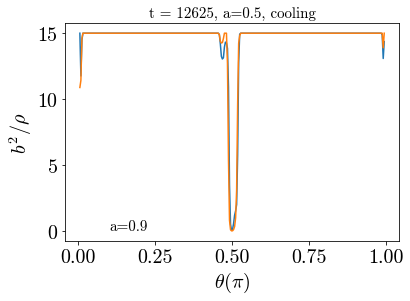

In [55]:
plt.plot(h[0,10,:,0]/np.pi,(bsq/rho)[0,10,:,0])
plt.plot(h[0,5,:,0]/np.pi,(bsq/rho)[0,5,:,0])
plt.ylabel(r'$b^2/\rho$')
plt.xlabel(r'$\theta (\pi)$')
plt.title("t = %d, a=0.5, cooling" %t,fontsize=15)
plt.text(0.1,0.1,"a=%.1f" %a,fontsize=15)

In [61]:
phibh_09375cooled = []
Phibh_09375cooled=[]
t_09375cooled=[]
Mdot_09375cooled=[]
fEM_09375cooled=[]

diskcut=7

In [62]:
for i in range(0, 1056, 1): 
    #Run read-in of data
    rblock_new(i)
    rpar_new(i)
    rgdump_griddata(dir)
    rdump_griddata(dir,i)
    #set_uniform_grid()
    misc_calc(calc_bu=1, calc_bsq=1, calc_eu=RESISTIVE, calc_esq=RESISTIVE)
    #calc_RAD()
    #set_pole()
    psicalc(0,0)

    ###Fluxes
    calc_phibh()
    calc_Mdot(diskcut) # Mdot, Mdot_disk
    calc_Edot(diskcut)

    fEtotEM = Edot_EMtot[0]
    fMdisk = Mdot_disk[0]
    PhiBH = phibh[0]
    
    Phibh_rhor=PhiBH[iofr(rhor)]
    Phibh_09375cooled.append(Phibh_rhor)
    t_09375cooled.append(t)
    fEM_09375cooled.append(fEtotEM)
    Mdot_09375cooled.append(fMdisk[iofr(7)])
    phibh_09375cooled.append(Phibh_rhor*np.sqrt(4*np.pi)/np.sqrt(fMdisk[iofr(7)]))
    print(t)

0.0
25.160934885709167
50.173894807561034
75.02797951195582
100.06296174366234
125.08135013322173
150.0455655856818
175.11491730477306
200.02495781796154
225.00355121182398
250.031012824259
275.0317765411844
300.0760547454385
325.09259040881585
350.0758745175955
375.04222953625276
400.0797719443295
425.0555408839979
450.0913419123552
475.0032348432859
500.02958646494733
525.0087786789259
550.095778636449
575.0934900248731
600.0740365512736
625.0903588290134
650.0489399730589
675.0451486920073
700.016732499272
725.025806965586
750.0285437003093
775.0851080730339
800.0648175629653
825.0462008466317
850.0465480583817
875.0932736172662
900.0227259278007
925.0869415450035
950.0609367624847
975.0018671032684
1000.0609199439684
1025.0234671662267
1050.020769275916
1075.0467399320096
1100.077398917039
1125.0581326429217
1150.02696729664
1175.0411291177493
1200.0269055928304
1225.0072955917997
1250.0162743413255
1275.0722411174986
1300.0013934957822
1325.010995368581
1350.0151960537287
1375.002

In [65]:
phibh_09375cooled_p2 = []
Phibh_09375cooled_p2=[]
t_09375cooled_p2=[]
Mdot_09375cooled_p2=[]
fEM_09375cooled_p2=[]

diskcut=7

In [67]:
for i in range(1050, 1517, 1): 
    #Run read-in of data
    rblock_new(i)
    rpar_new(i)
    rgdump_griddata(dir)
    rdump_griddata(dir,i)
    #set_uniform_grid()
    misc_calc(calc_bu=1, calc_bsq=1, calc_eu=RESISTIVE, calc_esq=RESISTIVE)
    #calc_RAD()
    #set_pole()
    psicalc(0,0)

    ###Fluxes

    calc_phibh()
    calc_Mdot(diskcut) # Mdot, Mdot_disk
    calc_Edot(diskcut)


    fEtotEM = Edot_EMtot[0]
    fMdisk = Mdot_disk[0]
    PhiBH = phibh[0]
    
    Phibh_rhor=PhiBH[iofr(rhor)]
    Phibh_09375cooled_p2.append(Phibh_rhor)
    t_09375cooled_p2.append(t)
    fEM_09375cooled_p2.append(fEtotEM)
    Mdot_09375cooled_p2.append(fMdisk[iofr(7)])
    phibh_09375cooled_p2.append(Phibh_rhor*np.sqrt(4*np.pi)/np.sqrt(fMdisk[iofr(7)]))
    print(i, t)

1050 28800.03037312151
1051 28850.031705838195
1052 28900.04145604914
1053 28950.039194146717
1054 29000.03874150143
1055 29050.042957248097
1056 29100.040860653717
1057 29150.030348122284
1058 29200.037681032638
1059 29250.039086859008
1060 29300.03342925317
1061 29350.029163930423
1062 29400.03074745002
1063 29450.036033748507
1064 29500.04424493172
1065 29550.04394452837
1066 29600.03434729088
1067 29650.042980098904
1068 29700.03709798726
1069 29750.031008903014
1070 29800.043864581883
1071 29850.042433243216
1072 29900.042751126683
1073 29950.04046558953
1074 30000.031349993293
1075 30050.04072669532
1076 30100.0399874385
1077 30150.029941021607
1078 30200.0431358587
1079 30250.032295634846
1080 30300.039478759558
1081 30350.03917899329
1082 30400.040632061045
1083 30450.043161692014
1084 30500.029926561478
1085 30550.037555849944
1086 30600.033851506334
1087 30650.03364403679
1088 30700.03574549803
1089 30750.035649193924
1090 30800.029121042728
1091 30850.037767284528
1092 30900

## Save fluxes to a file

In [148]:
save_fluxvstime_a94cool = r"D:\H-AMRdata\highresMADs\flux_vs_t\fluxvst_a94cool.npz"
save_fluxvstime_a5cool = r"D:\H-AMRdata\highresMADs\flux_vs_t\fluxvst_a5cool.npz" 
save_fluxvstime_a3cool = r"D:\H-AMRdata\highresMADs\flux_vs_t\fluxvst_a3cool.npz" 
save_fluxvstime_a2cool = r"D:\H-AMRdata\highresMADs\flux_vs_t\fluxvst_a2cool.npz" 
save_fluxvstime_a0cool = r"D:\H-AMRdata\highresMADs\flux_vs_t\fluxvst_a0cool.npz" 

In [ ]:
np.savez(savefile_1d, \
             rho=rho_n, gdet_1d=gdet_n, thick_1d=thick_n, den1_1d=den1_n, fM_1d=fM_n, fMdisk=fMdisk_n, \
             ug=ug_n, PhiBH=PhiBH_n, ud3num=ud3num_n, omegaf=omegaf_n, bas2d=bsq2df_n, \
             B1_2d=B1_2d_n, B1_disk=B1_disk_n, B2_2d=B2_2d_n, B2_disk=B2_disk_n, B3_2d=B3_2d_n, B3_disk=B3_disk_n, \
             Babs1=Babs1_n, Babs1_disk=Babs1_disk_n, Babs2=Babs2_n, Babs2_disk=Babs2_disk_n, Babs3=Babs3_n,  Babs3_disk=Babs3_disk_n,\
             Bsq1=Bsq1_n, Bsq1_disk=Bsq1_disk_n, Bsq2=Bsq2_n, Bsq2_disk=Bsq2_disk_n, Bsq3=Bsq3_n, Bsq3_disk=Bsq3_disk_n,  \
             Bsq_tot=Bsq_tot_n, Bsq_disktot=Bsq_disktot_n, ug_tot=ug_tot_n, ug_disktot=ug_disktot_n, \
             B_tot=B_tot_n, B_disktot=B_disktot_n, \
             beta=beta_n, phiBH_weighted=phiBH_weighted_n, PhiBH_weighted=PhiBH_weighted_n, rho_weighted=rho_weighted_n, \
             aphi_ta=aphi_ta_n, aphi_disk=aphi_disk_n, uu31d=uu31d_n,\
             fEdiskMA=fEdiskMA_n,fEtotEMMA=fEtotEMMA_n, fEtotEM=fEtotEM_n, \
             fLdiskMA=fLdiskMA_n, fLtotEMMA=fLtotEMMA_n, fLtotEM=fLtotEM_n, \
             fEtot_cond=fEtot_cond_n, fLtot_cond=fLtot_cond_n, \
             dxdx3=dxdx3_n, istart=istart, iend=iend, istep=istep, tstart=istart*dt, tend=iend*dt)

In [273]:
a94_fluxvtime = np.load(r"D:\H-AMRdata\highresMADs\flux_vs_t\fluxvtime_09375.npz")

In [274]:
for ket in a94_fluxvtime: print(ket)

t_09375cooled
Phibh_09375cooled
phibh_09375cooled
Mdot_09375cooled
t_09375
Phibh_09375
phibh_09375
Mdot_09375


C:\Users\Beverly\Documents\HAMR_macros\pp.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  # coding: utf-8


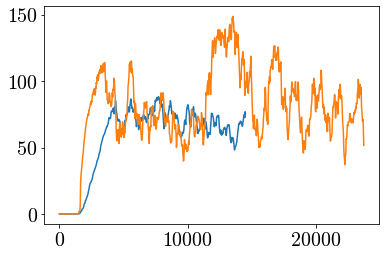

In [279]:
plt.plot(a94_fluxvtime["t_09375"], a94_fluxvtime["Phibh_09375"])
plt.plot(a94_fluxvtime["t_09375cooled"], a94_fluxvtime["Phibh_09375cooled"])

# Low res MADs - uncooled, Sasha's simulations

## a = 0.2

In [45]:
cd D:\BHspindown\maddat_backup\rtf2_15r35_a0.2_0_0_0

D:\BHspindown\maddat_backup\rtf2_15r35_a0.2_0_0_0


In [46]:
# This assumes gdump.bin is in /dumps
grid3d("gdump.bin")

Reading grid from dumps/gdump.bin ...  done!


In [47]:
i = 5 
rhorlist[i]=rhor
OmegaH = a /(2*rhor)
OmegaHlist[i] = OmegaH

In [48]:
istart = 2000
iend = 2680 #goes up to 2673 for a=0.2
istep = 10

In [49]:
umaxcount = 0
umincount = 0

for i in range(istart, iend, istep):
    #load vars this time step
    rfd("fieldline%04d.bin" % i)
    ud = (gv3[:,:]*uu[:,None]).sum(0)
    
    v1=uu
    v2=ud
    
    dot = v1[0]*v2[0] + v1[1]*v2[1] + v1[2]*v2[2] + v1[3]*v2[3]
    print(pshape(dot))
    if np.min(dot)<-1-1e-4:
        print("!!! ", np.min(dot))
        umincount+=1
    if np.max(dot)>-1+1e-4:
        print("!!! ", np.min(dot))
        umaxcount+=1

Opening fieldline2000.bin ...
rfdheader: t=10000
Found 30 header items, reading them in and setting EP3=THETAROT=0.0

Loading gdetB data...
No data on gdetF, setting it to None.
No data on Bstag, setting it to B.
No data on KAPPA and FLR
No data on luminosity (cooling off?)
(288, 128, 32)
None
Opening fieldline2010.bin ...
rfdheader: t=10050
Found 30 header items, reading them in and setting EP3=THETAROT=0.0

Loading gdetB data...
No data on gdetF, setting it to None.
No data on Bstag, setting it to B.
No data on KAPPA and FLR
No data on luminosity (cooling off?)
(288, 128, 32)
None
Opening fieldline2020.bin ...
rfdheader: t=10100
Found 30 header items, reading them in and setting EP3=THETAROT=0.0

Loading gdetB data...
No data on gdetF, setting it to None.
No data on Bstag, setting it to B.
No data on KAPPA and FLR
No data on luminosity (cooling off?)
(288, 128, 32)
None
Opening fieldline2030.bin ...
rfdheader: t=10150
Found 30 header items, reading them in and setting EP3=THETAROT=0.

In [51]:
print(umaxcount,umincount)

0 0


In [196]:
rfd("fieldline2000.bin")

ud = (gv3[:,:]*uu[:,None]).sum(0)

#save in 1D radial slices in equitorial plane
rho1d = rho[:,ny//2,0]
ug1d = ug[:,ny//2,0]
dxdxp31d = dxdxp[3,3]
ud31d = ud[3][:,ny//2,0]
gdet1d = gdet[:,ny//2,0]
        
bu=np.empty_like(uu)              #allocate memory for bu
bu[0]=mdot(B[1:4], ud[1:4])             #B^i u_i
bu[1:4]=(B[1:4] + bu[0]*uu[1:4])/uu[0]  #b^i = (B^i + b^t u^i)/u^t
bd=mdot(gv3,bu)
bsq=mdot(bu,bd)
faraday()

pshape(rho)
dotproduct(uu,ud)

Opening fieldline2000.bin ...
rfdheader: t=10000
Found 30 header items, reading them in and setting EP3=THETAROT=0.0

Loading gdetB data...
No data on gdetF, setting it to None.
No data on Bstag, setting it to B.
No data on KAPPA and FLR
No data on luminosity (cooling off?)


C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12538: RuntimeWarning: invalid value encountered in true_divide
  omegaf1=fdd[0,1]/fdd[1,3] # = ftr/frp
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12539: RuntimeWarning: divide by zero encountered in true_divide
  omegaf2=fdd[0,2]/fdd[2,3] # = fth/fhp
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12539: RuntimeWarning: invalid value encountered in true_divide
  omegaf2=fdd[0,2]/fdd[2,3] # = fth/fhp
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12568: RuntimeWarning: divide by zero encountered in true_divide
  omegaf2b=np.fabs(v3nonhat) + np.sign(uu[1])*(vpol/Bpol)*np.fabs(B3nonhat)
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12568: RuntimeWarning: invalid value encountered in multiply
  omegaf2b=np.fabs(v3nonhat) + np.sign(uu[1])*(vpol/Bpol)*np.fabs(B3nonhat)


(288, 128, 32)
(288, 128, 32)
None
-1.0000005 -0.99999946


C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12570: RuntimeWarning: invalid value encountered in true_divide
  omegaf1b=v3nonhat - B3nonhat*(v1hat*B1hat+v2hat*B2hat)/(B1hat**2+B2hat**2)


In [197]:
pshape(rho)

(288, 128, 32)


In [198]:
data_1d = np.load("a02_avg1d_100221.npz")

rho_02 = data_1d['rho_1d']
gdet_02 = data_1d['gdet_1d']
thick_02 = data_1d['thick_1d']
den1_02 = data_1d['den1_1d']

omegaf_02 = data_1d['omegaf_1d']

fM_02 = data_1d['fM_1d']
fMdisk_02 = data_1d['fMdisk_1d']

PhiBH_02 = data_1d['PhiBH_1d']
PhiBHd_02 = data_1d['PhiBHd_1d']
PhiBHj_02 = data_1d['PhiBHj_1d']
PhiBHcheck_02 = data_1d['PhiBHcheck_1d']
ud3avg_02 = data_1d['ud3avg_1d']

ud3num_02 = data_1d['ud3num_1d']

fEdiskMA_02 = data_1d['fEdiskMA_1d']
fEdiskEM_02 = data_1d['fEdiskEM_1d']
fEdiskEMMA_02 = data_1d['fEdiskEMMA_1d']
fEdiskEMMAcheck_02 = data_1d['fEdiskEMMA_check_1d']

fEjetEM_02 = data_1d['fEjetEM_1d']

fEtotEMMA_02 = data_1d['fEtotEMMA_1d']
fEtotEMMA_check_02 = data_1d['fEtotEMMA_check_1d']
fEtotEM_02 = data_1d['fEtotEM_1d']
fEtotEM_check_02 = data_1d['fEtotEM_check_1d']
fEtotMA_02 = data_1d['fEtotMA_1d']
fEtotMA_check_02 = data_1d['fEtotMA_check_1d']

#-------------------------------------
fLdiskMA_02 = data_1d['fLdiskMA_1d']
fLdiskEM_02 = data_1d['fLdiskEM_1d']
fLdiskEMMA_02 = data_1d['fLdiskEMMA_1d']
fLdiskEMMA_check_02 = data_1d['fLdiskEMMA_check_1d']

fLjetEM_02 = data_1d['fLjetEM_1d']
fLjetMA_02 = data_1d['fLjetMA_1d']
fLjetEMMA_02 = data_1d['fLjetEMMA_1d']
fLjetEMMA_check_02 = data_1d['fLjetEMMA_check_1d']

fLtotMA_02 = data_1d['fLtotMA_1d']
fLtotMA_check_02 = data_1d['fLtotMA_check_1d']
fLtotEM_02 = data_1d['fLtotEM_1d']
fLtotEM_check_02 = data_1d['fLtotEM_check_1d']
fLtotEMMA_02 = data_1d['fLtotEMMA_1d']
fLtotEMMA_check_02 = data_1d['fLtotEMMA_check_1d']

fLtotEM_check_02 = data_1d['fLtotEM_check_1d']
fLtotMA_check_02 = data_1d['fLtotMA_check_1d']

fEtot_cond_02 = data_1d['fEtot_cond_1d']
fLtot_cond_02 = data_1d['fLtot_cond_1d']

data_1d.close()

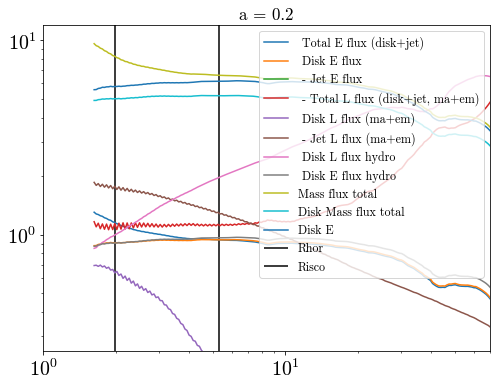

In [199]:
plt.figure(figsize=(8,6))
fs = 12

plt.title("a = 0.2", fontsize = fs+5)

plt.loglog(r[:,ny//2,0], fEtotEMMA_02/fM_02[iofr(10)], label=" Total E flux (disk+jet) ")
plt.loglog(r[:,ny//2,0], fEdiskEMMA_02/fM_02[iofr(10)], label=" Disk E flux ")
plt.loglog(r[:,ny//2,0], - fEtotEM_02/fM_02[iofr(10)], label=" - Jet E flux ")

plt.loglog(r[:,ny//2,0], -fLtotEMMA_02 /fM_02[iofr(10)] , label=" - Total L flux (disk+jet, ma+em)")
plt.loglog(r[:,ny//2,0], fLdiskEMMA_02 /fM_02[iofr(10)] , label=" Disk L flux (ma+em)")
plt.loglog(r[:,ny//2,0], - fLjetEMMA_02 /fM_02[iofr(10)] , label=" - Jet L flux (ma+em)")
#plt.loglog(r[:,ny//2,0], - fLjetEM_02 /fM_02[iofr(10)] , label=" - Jet L flux (em)")

plt.loglog(r[:,ny//2,0], fLdiskMA_02 / fM_02[iofr(10)], label=" Disk L flux hydro")
plt.loglog(r[:,ny//2,0], fEdiskMA_02 / fM_02[iofr(10)], label=" Disk E flux hydro")

#plt.loglog(r[:,ny//2,0], fEdiskMA_02 / fM_02, label=" Disk L flux hydro")

plt.vlines(rhor, 10**-1, 10**1.5, label="Rhor")
plt.vlines(Risco(a), 10**-1, 10**1.5, label = "Risco")
#plt.loglog(r[:,ny//2,0], Mdot, label="current Mass flux")
plt.loglog(r[:,ny//2,0], fM_02, label="Mass flux total")
plt.loglog(r[:,ny//2,0], fMdisk_02*0.8, label="Disk Mass flux total")
plt.loglog(r[:,ny//2,0], fEdiskMA_02, label="Disk E")


#plt.loglog(r[:,ny//2,0], -fEM_02 /fM_02 , label="- EM flux")
#plt.loglog(r[:,ny//2,0], - powj_02 /fM_02 , label="- Jet power")


plt.ylim(10**-0.6,12)
plt.xlim(1e0,70)
#plt.loglog(r[:,ny//2,0],rho[:,ny//2,0]*10)
plt.legend(fontsize = fs, loc=1)

In [200]:
fLdiskMA = fLdiskMA_02
fEdiskMA = fEdiskMA_02
fMdisk = fMdisk_02
fLtotMA = fLtotMA_02
fEtotMA = fEtotMA_02
fM = fM_02
fEtotEM = fEtotEM_02
fLtotEM = fLtotEM_02
fEtotEMMA = fEtotEMMA_02
fLtotEMMA = fLtotEMMA_02
fLtot_cond = fLtot_cond_02
fEtot_cond = fEtot_cond_02

In [201]:
lkeplist[i] = lk(a,r[:,ny//2,0])[iofr(Risco(a))]

#def calc_fLfE_rg(fL, fE, fM, rhor, radE, radM):

# Hydro with disk condition, E at r=10rg
# Using disk mass flux, with disk conditon
lhydro_10rg[i], ehydro_10rg[i] = calc_fLfE_rg(fLdiskMA, fEdiskMA, fMdisk, rhor, 10, 10)
shydro_10rg[i] = s(a, lhydro_10rg[i], ehydro_10rg[i])
print("s_hydro at 10rg:  %.3f" % shydro_10rg[i])

# Hydro with disk condition, E at r=5rg
# Using disk mass flux, with disk conditon
lhydro_5rg[i], ehydro_5rg[i] = calc_fLfE_rg(fLdiskMA, fEdiskMA, fMdisk, rhor, 5, 5)
shydro_5rg[i] = s(a, lhydro_5rg[i], ehydro_5rg[i])
print("s_hydro at 5rg:   %.3f" % shydro_5rg[i])

# Hydro as total MA (without disk condition) E at r=10rg
lhydro_totMA_10rg[i], ehydro_totMA_10rg[i] = calc_fLfE_rg(fLtotMA, fEtotMA, fM, rhor, 10, 10)
shydro_totMA_10rg[i] = s(a, lhydro_totMA_10rg[i], ehydro_totMA_10rg[i])
print("s_MA at 10rg:     %.3f" % shydro_totMA_10rg[i])

# EM total, E flux taken at horizon
# Total mass flux at 5rg
lEM_5rg[i], eEM_5rg[i] = calc_fLfE_rg(fLtotEM, fEtotEM, fMdisk, rhor, rhor, 5)
sEM_5rg[i] = s(a, lEM_5rg[i], eEM_5rg[i])
print("s_EM, fM at 5rg: %.3f" % sEM_5rg[i])

# EM total, E flux taken at horizon
# Total mass flux at 10rg
lEM_10rg[i], eEM_10rg[i] = calc_fLfE_rg(fLtotEM, fEtotEM, fMdisk, rhor, rhor, 10)
sEM_10rg[i] = s(a, lEM_10rg[i], eEM_10rg[i])
print("s_EM, fM at 10rg: %.3f" % sEM_10rg[i])

# Total fluxes without disk condition
ltot_5rg[i], etot_5rg[i] = calc_fLfE_rg(fLtotEMMA, fEtotEMMA, fM, rhor, 5, 5)
stot_5rg[i] = s(a, ltot_5rg[i], etot_5rg[i])
print("s_tot at 5rg w/o condition:  %.3f" % stot_5rg[i])

# Total fluxes without disk condition
ltot_10rg[i], etot_10rg[i] = calc_fLfE_rg(fLtotEMMA, fEtotEMMA, fM, rhor, 10, 10)
stot_10rg[i] = s(a, ltot_10rg[i], etot_10rg[i])
print("s_tot at 10rg w/o condition:  %.3f" % stot_10rg[i])

# Total fluxes with disk condition with E at r=5rg
# fL = TudMA*(bsq/rho < 30) + TudEM
l_totcond_5rg[i], e_totcond_5rg[i] = calc_fLfE_rg(fLtot_cond, fEtot_cond, fMdisk, rhor, 5, 5)
s_totcond_5rg[i] = s(a, l_totcond_5rg[i], e_totcond_5rg[i])
print("s_tot at 5rg with condition:    %.3f" % s_totcond_5rg[i])

# Total fluxes with disk condition with E at r=5rg
# fL = TudMA*(bsq/rho < 30) + TudEM
l_totcond_10rg[i], e_totcond_10rg[i] = calc_fLfE_rg(fLtot_cond, fEtot_cond, fMdisk, rhor, 10, 10)
s_totcond_10rg[i] = s(a, l_totcond_10rg[i], e_totcond_10rg[i])
print("s_tot at 10rg with condition:    %.3f" % s_totcond_10rg[i])

OmegaH = a /(2*rhor)
print(OmegaH, 2*np.pi*omegaf2b[iofr(rhor), ny//3, 1])

#kn09 = 2*np.pi*omegaf2b[iofr(rhor), ny//3, 1]/OmegaH
#print(2*np.pi*omegaf2b[iofr(rhor), ny//3, 1]/OmegaH)
#print("k = ", kn09)

s_hydro at 10rg:  0.615
s_hydro at 5rg:   0.603
s_MA at 10rg:     0.687
s_EM, fM at 5rg: -2.172
s_EM, fM at 10rg: -2.209
s_tot at 5rg w/o condition:  -1.462
s_tot at 10rg w/o condition:  -1.501
s_tot at 5rg with condition:    -1.560
s_tot at 10rg with condition:    -1.578
0.050510257216821904 0.015416611078017938


C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12: RuntimeWarning: invalid value encountered in sqrt
  from matplotlib import rc


In [202]:
klist[i] = (2*np.pi*omegaf_02/OmegaH).mean(-1)
klist[i]

0.2367277443408966

## a = 0.5

In [114]:
cd D:\BHspindown\maddat_backup\rtf2_15r34.475_a0.5_0_0_0

D:\BHspindown\maddat_backup\rtf2_15r34.475_a0.5_0_0_0


In [115]:
# This assumes gdump.bin is in /dumps
grid3d("gdump.bin")

Reading grid from dumps/gdump.bin ...  done!


In [54]:
Rin
R0

0.0

In [116]:
i=6
rhorlist[i]=rhor
OmegaH = a /(2*rhor)
OmegaHlist[i] = OmegaH

In [117]:
istart = 2000
iend = 2620 #goes up to 2619 for a=0.5
istep = 10

In [122]:
umaxcount = 0
umincount = 0

for i in range(istart, iend, istep):
    #load vars this time step
    rfd("fieldline%04d.bin" % i)
    ud = (gv3[:,:]*uu[:,None]).sum(0)
    
    v1=uu
    v2=ud
    
    dot = v1[0]*v2[0] + v1[1]*v2[1] + v1[2]*v2[2] + v1[3]*v2[3]
    print(pshape(dot))
    if np.min(dot)<-1-1e-1:
        print("!!! ", np.min(dot))
        umincount+=1
    if np.max(dot)>-1+1e-1:
        print("!!! ", np.max(dot))
        umaxcount+=1

Opening fieldline2000.bin ...
rfdheader: t=10000
Found 30 header items, reading them in and setting EP3=THETAROT=0.0

Loading gdetB data...
No data on gdetF, setting it to None.
No data on Bstag, setting it to B.
No data on KAPPA and FLR
No data on luminosity (cooling off?)
(288, 128, 32)
None
Opening fieldline2010.bin ...
rfdheader: t=10050
Found 30 header items, reading them in and setting EP3=THETAROT=0.0

Loading gdetB data...
No data on gdetF, setting it to None.
No data on Bstag, setting it to B.
No data on KAPPA and FLR
No data on luminosity (cooling off?)
(288, 128, 32)
None
Opening fieldline2020.bin ...
rfdheader: t=10100
Found 30 header items, reading them in and setting EP3=THETAROT=0.0

Loading gdetB data...
No data on gdetF, setting it to None.
No data on Bstag, setting it to B.
No data on KAPPA and FLR
No data on luminosity (cooling off?)
(288, 128, 32)
None
Opening fieldline2030.bin ...
rfdheader: t=10150
Found 30 header items, reading them in and setting EP3=THETAROT=0.

In [123]:
print(umaxcount,umincount)

0 0


In [303]:
rfd("fieldline2000.bin")

ud = (gv3[:,:]*uu[:,None]).sum(0)

#save in 1D radial slices in equitorial plane
rho1d = rho[:,ny//2,0]
ug1d = ug[:,ny//2,0]
dxdxp31d = dxdxp[3,3]
ud31d = ud[3][:,ny//2,0]
gdet1d = gdet[:,ny//2,0]
        
bu=np.empty_like(uu)              #allocate memory for bu
bu[0]=mdot(B[1:4], ud[1:4])             #B^i u_i
bu[1:4]=(B[1:4] + bu[0]*uu[1:4])/uu[0]  #b^i = (B^i + b^t u^i)/u^t
bd=mdot(gv3,bu)
bsq=mdot(bu,bd)
faraday()

pshape(rho)
dotproduct(uu,ud)

Opening fieldline2000.bin ...
rfdheader: t=10000
Found 30 header items, reading them in and setting EP3=THETAROT=0.0

Loading gdetB data...
No data on gdetF, setting it to None.
No data on Bstag, setting it to B.
No data on KAPPA and FLR
No data on luminosity (cooling off?)
(288, 128, 32)
(288, 128, 32)
None
-1.0136042 -0.9957866


C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12538: RuntimeWarning: divide by zero encountered in true_divide
  omegaf1=fdd[0,1]/fdd[1,3] # = ftr/frp
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12538: RuntimeWarning: invalid value encountered in true_divide
  omegaf1=fdd[0,1]/fdd[1,3] # = ftr/frp
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12539: RuntimeWarning: divide by zero encountered in true_divide
  omegaf2=fdd[0,2]/fdd[2,3] # = fth/fhp
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12539: RuntimeWarning: invalid value encountered in true_divide
  omegaf2=fdd[0,2]/fdd[2,3] # = fth/fhp
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12568: RuntimeWarning: divide by zero encountered in true_divide
  omegaf2b=np.fabs(v3nonhat) + np.sign(uu[1])*(vpol/Bpol)*np.fabs(B3nonhat)
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12568: RuntimeWarning: invalid value encountered in multiply
  omegaf2b=np.fabs(v3nonha

In [207]:
dotproduct(uu,ud)
pshape(divb)

(288, 128, 32)
None
-1.0136042 -0.9957866


NameError: name 'divb' is not defined

In [306]:
print(nx,ny,nz)
print(Rin)

288 128 32
1.5114805770654


In [307]:
data_1d = np.load("a05_avg1d_110121.npz")

rho_05 = data_1d['rho_1d']
gdet_05 = data_1d['gdet_1d']
thick_05 = data_1d['thick_1d']
den1_05 = data_1d['den1_1d']

omegaf_05 = data_1d['omegaf_1d']

fM_05 = data_1d['fM_1d']
fMdisk_05 = data_1d['fMdisk_1d']

PhiBH_05 = data_1d['PhiBH_1d']
PhiBHd_05 = data_1d['PhiBHd_1d']
PhiBHj_05 = data_1d['PhiBHj_1d']
PhiBHcheck_05 = data_1d['PhiBHcheck_1d']
ud3avg_05 = data_1d['ud3avg_1d']

ud3num_05 = data_1d['ud3num_1d']

fEdiskMA_05 = data_1d['fEdiskMA_1d']
fEdiskEM_05 = data_1d['fEdiskEM_1d']
fEdiskEMMA_05 = data_1d['fEdiskEMMA_1d']
fEdiskEMMAcheck_05 = data_1d['fEdiskEMMA_check_1d']

fEjetEM_05 = data_1d['fEjetEM_1d']

fEtotEMMA_05 = data_1d['fEtotEMMA_1d']
fEtotEMMA_check_05 = data_1d['fEtotEMMA_check_1d']
fEtotEM_05 = data_1d['fEtotEM_1d']
fEtotEM_check_05 = data_1d['fEtotEM_check_1d']
fEtotMA_05 = data_1d['fEtotMA_1d']
fEtotMA_check_05 = data_1d['fEtotMA_check_1d']

#-------------------------------------
fLdiskMA_05 = data_1d['fLdiskMA_1d']
fLdiskEM_05 = data_1d['fLdiskEM_1d']
fLdiskEMMA_05 = data_1d['fLdiskEMMA_1d']
fLdiskEMMA_check_05 = data_1d['fLdiskEMMA_check_1d']

fLjetEM_05 = data_1d['fLjetEM_1d']
fLjetMA_05 = data_1d['fLjetMA_1d']
fLjetEMMA_05 = data_1d['fLjetEMMA_1d']
fLjetEMMA_check_05 = data_1d['fLjetEMMA_check_1d']

fLtotMA_05 = data_1d['fLtotMA_1d']
fLtotMA_check_05 = data_1d['fLtotMA_check_1d']
fLtotEM_05 = data_1d['fLtotEM_1d']
fLtotEM_check_05 = data_1d['fLtotEM_check_1d']
fLtotEMMA_05 = data_1d['fLtotEMMA_1d']
fLtotEMMA_check_05 = data_1d['fLtotEMMA_check_1d']

fLtotEM_check_05 = data_1d['fLtotEM_check_1d']
fLtotMA_check_05 = data_1d['fLtotMA_check_1d']

fEtot_cond_05 = data_1d['fEtot_cond_1d']
fLtot_cond_05 = data_1d['fLtot_cond_1d']

data_1d.close()

In [308]:
fLdiskMA = fLdiskMA_05
fEdiskMA = fEdiskMA_05
fMdisk = fMdisk_05
fLtotMA = fLtotMA_05
fEtotMA = fEtotMA_05
fM = fM_05
fEtotEM = fEtotEM_05
fLtotEM = fLtotEM_05
fEtotEMMA = fEtotEMMA_05
fLtotEMMA = fLtotEMMA_05
fLtot_cond = fLtot_cond_05
fEtot_cond = fEtot_cond_05

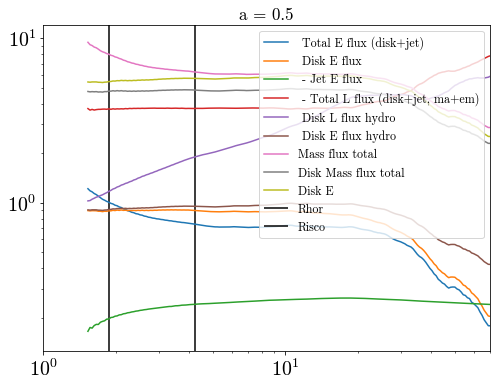

In [211]:
plt.figure(figsize=(8,6))
fs = 12

plt.title("a = 0.5", fontsize = fs+5)

plt.loglog(r[:,ny//2,0], fEtotEMMA/fMdisk[iofr(5)], label=" Total E flux (disk+jet) ")
plt.loglog(r[:,ny//2,0], fEdiskEMMA_05/fMdisk[iofr(5)], label=" Disk E flux ")
plt.loglog(r[:,ny//2,0], - fEtotEM/fMdisk[iofr(5)], label=" - Jet E flux ")

plt.loglog(r[:,ny//2,0], -fLtotEMMA /fMdisk[iofr(5)] , label=" - Total L flux (disk+jet, ma+em)")
#plt.loglog(r[:,ny//2,0], fLdiskEMMA_02 /fMdisk[iofr(5)] , label=" Disk L flux (ma+em)")
#plt.loglog(r[:,ny//2,0], - fLjetEMMA_02 /fMdisk[iofr(5)] , label=" - Jet L flux (ma+em)")
#plt.loglog(r[:,ny//2,0], - fLjetEM_02 /fM_02[iofr(10)] , label=" - Jet L flux (em)")

plt.loglog(r[:,ny//2,0], fLdiskMA / fMdisk[iofr(5)], label=" Disk L flux hydro")
plt.loglog(r[:,ny//2,0], fEdiskMA / fMdisk[iofr(5)], label=" Disk E flux hydro")

#plt.loglog(r[:,ny//2,0], fEdiskMA_02 / fM_02, label=" Disk L flux hydro")

plt.vlines(rhor, 10**-1, 10**1.5, label="Rhor")
plt.vlines(Risco(a), 10**-1, 10**1.5, label = "Risco")
#plt.loglog(r[:,ny//2,0], Mdot, label="current Mass flux")
plt.loglog(r[:,ny//2,0], fM, label="Mass flux total")
plt.loglog(r[:,ny//2,0], fMdisk*0.8, label="Disk Mass flux total")
plt.loglog(r[:,ny//2,0], fEdiskMA, label="Disk E")

plt.ylim(10**-0.9,12)
plt.xlim(1e0,70)
#plt.loglog(r[:,ny//2,0],rho[:,ny//2,0]*10)
plt.legend(fontsize = fs, loc=1)

In [212]:
lkeplist[i] = lk(a,r[:,ny//2,0])[iofr(Risco(a))]

#def calc_fLfE_rg(fL, fE, fM, rhor, radE, radM):

# Hydro with disk condition, E at r=10rg
# Using disk mass flux, with disk conditon
lhydro_10rg[i], ehydro_10rg[i] = calc_fLfE_rg(fLdiskMA, fEdiskMA, fMdisk, rhor, 10, 10)
shydro_10rg[i] = s(a, lhydro_10rg[i], ehydro_10rg[i])
print("s_hydro at 10rg:  %.3f" % shydro_10rg[i])

# Hydro with disk condition, E at r=5rg
# Using disk mass flux, with disk conditon
lhydro_5rg[i], ehydro_5rg[i] = calc_fLfE_rg(fLdiskMA, fEdiskMA, fMdisk, rhor, 5, 5)
shydro_5rg[i] = s(a, lhydro_5rg[i], ehydro_5rg[i])
print("s_hydro at 5rg:   %.3f" % shydro_5rg[i])

# Hydro as total MA (without disk condition) E at r=10rg
lhydro_totMA_10rg[i], ehydro_totMA_10rg[i] = calc_fLfE_rg(fLtotMA, fEtotMA, fM, rhor, 10, 10)
shydro_totMA_10rg[i] = s(a, lhydro_totMA_10rg[i], ehydro_totMA_10rg[i])
print("s_MA at 10rg:     %.3f" % shydro_totMA_10rg[i])

# EM total, E flux taken at horizon
# Total mass flux at 5rg
lEM_5rg[i], eEM_5rg[i] = calc_fLfE_rg(fLtotEM, fEtotEM, fMdisk, rhor, rhor, 5)
sEM_5rg[i] = s(a, lEM_5rg[i], eEM_5rg[i])
print("s_EM, fM at 5rg: %.3f" % sEM_5rg[i])

# EM total, E flux taken at horizon
# Total mass flux at 10rg
lEM_10rg[i], eEM_10rg[i] = calc_fLfE_rg(fLtotEM, fEtotEM, fMdisk, rhor, rhor, 10)
sEM_10rg[i] = s(a, lEM_10rg[i], eEM_10rg[i])
print("s_EM, fM at 10rg: %.3f" % sEM_10rg[i])

# Total fluxes without disk condition
ltot_5rg[i], etot_5rg[i] = calc_fLfE_rg(fLtotEMMA, fEtotEMMA, fM, rhor, 5, 5)
stot_5rg[i] = s(a, ltot_5rg[i], etot_5rg[i])
print("s_tot at 5rg w/o condition:  %.3f" % stot_5rg[i])

# Total fluxes without disk condition
ltot_10rg[i], etot_10rg[i] = calc_fLfE_rg(fLtotEMMA, fEtotEMMA, fM, rhor, 10, 10)
stot_10rg[i] = s(a, ltot_10rg[i], etot_10rg[i])
print("s_tot at 10rg w/o condition:  %.3f" % stot_10rg[i])

# Total fluxes with disk condition with E at r=5rg
# fL = TudMA*(bsq/rho < 30) + TudEM
l_totcond_5rg[i], e_totcond_5rg[i] = calc_fLfE_rg(fLtot_cond, fEtot_cond, fMdisk, rhor, 5, 5)
s_totcond_5rg[i] = s(a, l_totcond_5rg[i], e_totcond_5rg[i])
print("s_tot at 5rg with condition:    %.3f" % s_totcond_5rg[i])

# Total fluxes with disk condition with E at r=5rg
# fL = TudMA*(bsq/rho < 30) + TudEM
l_totcond_10rg[i], e_totcond_10rg[i] = calc_fLfE_rg(fLtot_cond, fEtot_cond, fMdisk, rhor, 10, 10)
s_totcond_10rg[i] = s(a, l_totcond_10rg[i], e_totcond_10rg[i])
print("s_tot at 10rg with condition:    %.3f" % s_totcond_10rg[i])

OmegaH = a /(2*rhor)
print(OmegaH, 2*np.pi*omegaf2b[iofr(rhor), ny//3, 1])

#kn09 = 2*np.pi*omegaf2b[iofr(rhor), ny//3, 1]/OmegaH
#print(2*np.pi*omegaf2b[iofr(rhor), ny//3, 1]/OmegaH)
#print("k = ", kn09)

s_hydro at 10rg:  0.177
s_hydro at 5rg:   0.229
s_MA at 10rg:     0.369
s_EM, fM at 5rg: -4.893
s_EM, fM at 10rg: -4.751
s_tot at 5rg w/o condition:  -4.369
s_tot at 10rg w/o condition:  -4.335
s_tot at 5rg with condition:    -4.616
s_tot at 10rg with condition:    -4.515
0.13397459621556135 0.040851636263196406


C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12: RuntimeWarning: invalid value encountered in sqrt
  from matplotlib import rc


In [213]:
klist[i] = (2*np.pi*omegaf_05/OmegaH).mean(-1)
klist[i]

0.3342002034187317

## a=0.9 from rtf2_15r34.1_pi_0_0_0

In [108]:
cd D:\BHspindown\maddat_backup\rtf2_15r34.1_pi_0_0_0 

D:\BHspindown\maddat_backup\rtf2_15r34.1_pi_0_0_0


In [109]:
# This assumes gdump.bin is in /dumps
grid3d("gdump.bin")

Reading grid from dumps/gdump.bin ...  done!


In [62]:
pshape(rho)

(288, 128, 32)


In [217]:
rfd("fieldline2100.bin")

ud = (gv3[:,:]*uu[:,None]).sum(0)

#save in 1D radial slices in equitorial plane
rho1d = rho[:,ny//2,0]
ug1d = ug[:,ny//2,0]
dxdxp31d = dxdxp[3,3]
ud31d = ud[3][:,ny//2,0]
gdet1d = gdet[:,ny//2,0]
        
bu=np.empty_like(uu)              #allocate memory for bu
bu[0]=mdot(B[1:4], ud[1:4])             #B^i u_i
bu[1:4]=(B[1:4] + bu[0]*uu[1:4])/uu[0]  #b^i = (B^i + b^t u^i)/u^t
bd=mdot(gv3,bu)
bsq=mdot(bu,bd)
faraday()

pshape(rho)
dotproduct(uu,ud)

Opening fieldline2100.bin ...
rfdheader: t=10500
Found 30 header items, reading them in and setting EP3=THETAROT=0.0

Loading gdetB data...
No data on gdetF, setting it to None.
No data on Bstag, setting it to B.
No data on KAPPA and FLR
No data on luminosity (cooling off?)


C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12538: RuntimeWarning: invalid value encountered in true_divide
  omegaf1=fdd[0,1]/fdd[1,3] # = ftr/frp
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12539: RuntimeWarning: divide by zero encountered in true_divide
  omegaf2=fdd[0,2]/fdd[2,3] # = fth/fhp
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12539: RuntimeWarning: invalid value encountered in true_divide
  omegaf2=fdd[0,2]/fdd[2,3] # = fth/fhp


(288, 128, 64)
(288, 128, 64)
None
-1.0000668 -0.999882


C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12568: RuntimeWarning: divide by zero encountered in true_divide
  omegaf2b=np.fabs(v3nonhat) + np.sign(uu[1])*(vpol/Bpol)*np.fabs(B3nonhat)
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12568: RuntimeWarning: invalid value encountered in multiply
  omegaf2b=np.fabs(v3nonhat) + np.sign(uu[1])*(vpol/Bpol)*np.fabs(B3nonhat)
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12570: RuntimeWarning: invalid value encountered in true_divide
  omegaf1b=v3nonhat - B3nonhat*(v1hat*B1hat+v2hat*B2hat)/(B1hat**2+B2hat**2)


In [110]:
i=7

rhorlist[i]=rhor
OmegaH = a /(2*rhor)
OmegaHlist[i] = OmegaH

In [111]:
istart = 2000
iend = 3980 #goes up to 3979 for a=0.9pi
istep = 10

In [112]:
umaxcount = 0
umincount = 0

for i in range(istart, iend, istep):
    #load vars this time step
    rfd("fieldline%04d.bin" % i)
    ud = (gv3[:,:]*uu[:,None]).sum(0)
    
    v1=uu
    v2=ud
    
    dot = v1[0]*v2[0] + v1[1]*v2[1] + v1[2]*v2[2] + v1[3]*v2[3]
    print(pshape(dot))
    if np.min(dot)<-1-1e-2:
        print("!!! ", np.min(dot))
        umincount+=1
    if np.max(dot)>-1+1e-2:
        print("!!! ", np.max(dot))
        umaxcount+=1

Opening fieldline2000.bin ...
rfdheader: t=10000
Found 30 header items, reading them in and setting EP3=THETAROT=0.0

Loading gdetB data...
No data on gdetF, setting it to None.
No data on Bstag, setting it to B.
No data on KAPPA and FLR
No data on luminosity (cooling off?)
(288, 128, 64)
None
Opening fieldline2010.bin ...
rfdheader: t=10050
Found 30 header items, reading them in and setting EP3=THETAROT=0.0

Loading gdetB data...
No data on gdetF, setting it to None.
No data on Bstag, setting it to B.
No data on KAPPA and FLR
No data on luminosity (cooling off?)
(288, 128, 64)
None
Opening fieldline2020.bin ...
rfdheader: t=10100
Found 30 header items, reading them in and setting EP3=THETAROT=0.0

Loading gdetB data...
No data on gdetF, setting it to None.
No data on Bstag, setting it to B.
No data on KAPPA and FLR
No data on luminosity (cooling off?)
(288, 128, 64)
None
Opening fieldline2030.bin ...
rfdheader: t=10150
Found 30 header items, reading them in and setting EP3=THETAROT=0.

In [113]:
print(umaxcount,umincount)

0 0


In [219]:
data_1d = np.load("a09_avg1d_100221.npz")

rho_09 = data_1d['rho_1d']
gdet_09 = data_1d['gdet_1d']
thick_09 = data_1d['thick_1d']
den1_09 = data_1d['den1_1d']

omegaf_09 = data_1d['omegaf_1d']

fM_09 = data_1d['fM_1d']
fMdisk_09 = data_1d['fMdisk_1d']

PhiBH_09 = data_1d['PhiBH_1d']
PhiBHd_09 = data_1d['PhiBHd_1d']
PhiBHj_09 = data_1d['PhiBHj_1d']
PhiBHcheck_09 = data_1d['PhiBHcheck_1d']
ud3avg_09 = data_1d['ud3avg_1d']

ud3num_09 = data_1d['ud3num_1d']

fEdiskMA_09 = data_1d['fEdiskMA_1d']
fEdiskEM_09 = data_1d['fEdiskEM_1d']
fEdiskEMMA_09 = data_1d['fEdiskEMMA_1d']
fEdiskEMMAcheck_09 = data_1d['fEdiskEMMA_check_1d']

fEjetEM_09 = data_1d['fEjetEM_1d']

fEtotEMMA_09 = data_1d['fEtotEMMA_1d']
fEtotEMMA_check_09 = data_1d['fEtotEMMA_check_1d']
fEtotEM_09 = data_1d['fEtotEM_1d']
fEtotEM_check_09 = data_1d['fEtotEM_check_1d']
fEtotMA_09 = data_1d['fEtotMA_1d']
fEtotMA_check_09 = data_1d['fEtotMA_check_1d']

#-------------------------------------
fLdiskMA_09 = data_1d['fLdiskMA_1d']
fLdiskEM_09 = data_1d['fLdiskEM_1d']
fLdiskEMMA_09 = data_1d['fLdiskEMMA_1d']
fLdiskEMMA_check_09 = data_1d['fLdiskEMMA_check_1d']

fLjetEM_09 = data_1d['fLjetEM_1d']
fLjetMA_09 = data_1d['fLjetMA_1d']
fLjetEMMA_09 = data_1d['fLjetEMMA_1d']
fLjetEMMA_check_09 = data_1d['fLjetEMMA_check_1d']

fLtotMA_09 = data_1d['fLtotMA_1d']
fLtotMA_check_09 = data_1d['fLtotMA_check_1d']
fLtotEM_09 = data_1d['fLtotEM_1d']
fLtotEM_check_09 = data_1d['fLtotEM_check_1d']
fLtotEMMA_09 = data_1d['fLtotEMMA_1d']
fLtotEMMA_check_09 = data_1d['fLtotEMMA_check_1d']

fLtotEM_check_09 = data_1d['fLtotEM_check_1d']
fLtotMA_check_09 = data_1d['fLtotMA_check_1d']

fEtot_cond_09 = data_1d['fEtot_cond_1d']
fLtot_cond_09 = data_1d['fLtot_cond_1d']

data_1d.close()

In [220]:
rfd("fieldline3000.bin")
    
ud = (gv3[:,:]*uu[:,None]).sum(0)

#save in 1D radial slices in equitorial plane
rho1d = rho[:,ny//2,0]
ug1d = ug[:,ny//2,0]
dxdxp31d = dxdxp[3,3]
ud31d = ud[3][:,ny//2,0]
gdet1d = gdet[:,ny//2,0]

bu=np.empty_like(uu)              #allocate memory for bu
bu[0]=mdot(B[1:4], ud[1:4])             #B^i u_i
bu[1:4]=(B[1:4] + bu[0]*uu[1:4])/uu[0]  #b^i = (B^i + b^t u^i)/u^t
bd=mdot(gv3,bu)
bsq=mdot(bu,bd)

Opening fieldline3000.bin ...
rfdheader: t=15000
Found 30 header items, reading them in and setting EP3=THETAROT=0.0

Loading gdetB data...
No data on gdetF, setting it to None.
No data on Bstag, setting it to B.
No data on KAPPA and FLR
No data on luminosity (cooling off?)


C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12: RuntimeWarning: invalid value encountered in sqrt
  from matplotlib import rc


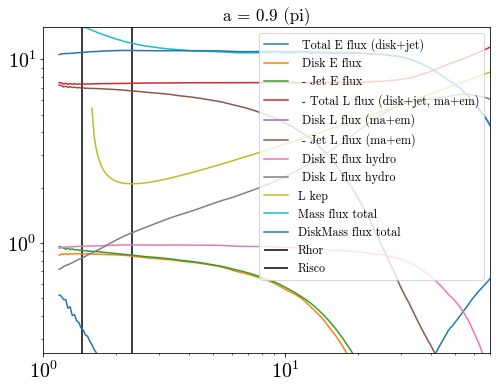

In [221]:
plt.figure(figsize=(8,6))
fs = 12

plt.title("a = 0.9 (pi)", fontsize = fs+5)

plt.loglog(r[:,ny//2,0], np.abs(fEtotEMMA_09)/fM_09[iofr(10)], label=" Total E flux (disk+jet) ")
plt.loglog(r[:,ny//2,0], fEdiskEMMA_09/fM_09[iofr(10)], label=" Disk E flux ")
plt.loglog(r[:,ny//2,0], - fEjetEM_09/fM_09[iofr(10)], label=" - Jet E flux ")

plt.loglog(r[:,ny//2,0], -fLtotEMMA_09 /fM_09[iofr(10)] , label=" - Total L flux (disk+jet, ma+em)")
plt.loglog(r[:,ny//2,0], fLdiskEMMA_09 /fM_09[iofr(10)] , label=" Disk L flux (ma+em)")
plt.loglog(r[:,ny//2,0], - fLjetEMMA_09 /fM_09[iofr(10)] , label=" - Jet L flux (ma+em)")

plt.loglog(r[:,ny//2,0], fEdiskMA_09 / fM_09[iofr(10)], label=" Disk E flux hydro")
plt.loglog(r[:,ny//2,0], fLdiskMA_09 / fM_09[iofr(10)], label=" Disk L flux hydro")

#plt.loglog(r[:,ny//2,0], fEdiskMA_09, label=" Disk E flux hydro 2")

plt.loglog(r[:,ny//2,0], lk(a,r[:,ny//2,0]) , label="L kep")

#plt.loglog(r[:,ny//2,0], fEdiskMA_02 / fM_02, label=" Disk L flux hydro")

plt.vlines(rhor, 10**-1, 10**1.5, label="Rhor")
plt.vlines(Risco(a), 10**-1, 10**1.5, label = "Risco")
#plt.loglog(r[:,ny//2,0], Mdot, label="current Mass flux")
plt.loglog(r[:,ny//2,0], fM_09, label="Mass flux total")
plt.loglog(r[:,ny//2,0], fMdisk_09, label="DiskMass flux total")


#plt.loglog(r[:,ny//2,0],((-(gdet*rho*uu[1]*(bsq/rho <30)*_dx2*_dx3))[:,:,:]).sum(-1).sum(-1), label="mass test")

#plt.loglog(r[:,ny//2,0], -fEM_02 /fM_02 , label="- EM flux")
#plt.loglog(r[:,ny//2,0], - powj_02 /fM_02 , label="- Jet power")


plt.ylim(10**-0.6,15)
plt.xlim(1e0,70)
#plt.loglog(r[:,ny//2,0],rho[:,ny//2,0]*10)
plt.legend(fontsize = fs, loc=1)

C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12: RuntimeWarning: invalid value encountered in sqrt
  from matplotlib import rc


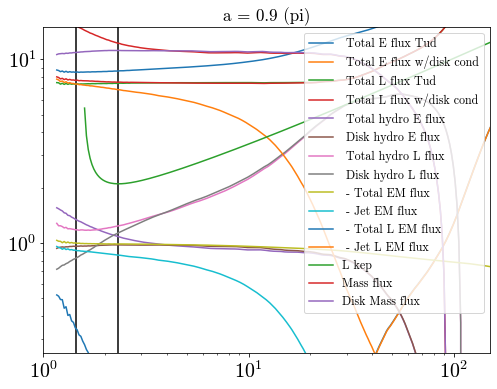

In [222]:
plt.figure(figsize=(8,6))
fs = 12

plt.title("a = 0.9 (pi)", fontsize = fs+5)

plt.loglog(r[:,ny//2,0], np.abs(fEtotEMMA_09)/fM_09[iofr(10)], label=" Total E flux Tud")
plt.loglog(r[:,ny//2,0], np.abs(fEtot_cond_09)/fM_09[iofr(10)], label=" Total E flux w/disk cond")

plt.loglog(r[:,ny//2,0], np.abs(fLtotEMMA_09)/fM_09[iofr(10)], label=" Total L flux Tud")
plt.loglog(r[:,ny//2,0], np.abs(fLtot_cond_09)/fM_09[iofr(10)], label=" Total L flux w/disk cond")

plt.loglog(r[:,ny//2,0], fEtotMA_09/fM_09[iofr(10)], label=" Total hydro E flux ")
plt.loglog(r[:,ny//2,0], fEdiskMA_09 / fM_09[iofr(10)], label=" Disk hydro E flux")

plt.loglog(r[:,ny//2,0], fLtotMA_09/fM_09[iofr(10)], label=" Total hydro L flux ")
plt.loglog(r[:,ny//2,0], fLdiskMA_09 / fM_09[iofr(10)], label=" Disk hydro L flux")

plt.loglog(r[:,ny//2,0], - fEtotEM_09/fM_09[iofr(10)], label=" - Total EM flux ")
plt.loglog(r[:,ny//2,0], - fEjetEM_09/fM_09[iofr(10)], label=" - Jet EM flux ")

plt.loglog(r[:,ny//2,0], - fLtotEM_09/fM_09[iofr(10)], label=" - Total L EM flux ")
plt.loglog(r[:,ny//2,0], - fLjetEM_09/fM_09[iofr(10)], label=" - Jet L EM flux ")


#plt.loglog(r[:,ny//2,0], fEdiskMA_09, label=" Disk E flux hydro 2")

plt.loglog(r[:,ny//2,0], lk(a,r[:,ny//2,0]) , label="L kep")

#plt.loglog(r[:,ny//2,0], fEdiskMA_02 / fM_02, label=" Disk L flux hydro")

plt.vlines(rhor, 10**-1, 10**1.5)
plt.vlines(Risco(a), 10**-1, 10**1.5)
#plt.loglog(r[:,ny//2,0], Mdot, label="current Mass flux")
plt.loglog(r[:,ny//2,0], fM_09, label="Mass flux")
plt.loglog(r[:,ny//2,0], fMdisk_09, label="Disk Mass flux")


#plt.loglog(r[:,ny//2,0],((-(gdet*rho*uu[1]*(bsq/rho <30)*_dx2*_dx3))[:,:,:]).sum(-1).sum(-1), label="mass test")

#plt.loglog(r[:,ny//2,0], -fEM_02 /fM_02 , label="- EM flux")
#plt.loglog(r[:,ny//2,0], - powj_02 /fM_02 , label="- Jet power")


plt.ylim(10**-0.6,15)
plt.xlim(1e0,150)
#plt.loglog(r[:,ny//2,0],rho[:,ny//2,0]*10)
plt.legend(fontsize = fs, loc=1)

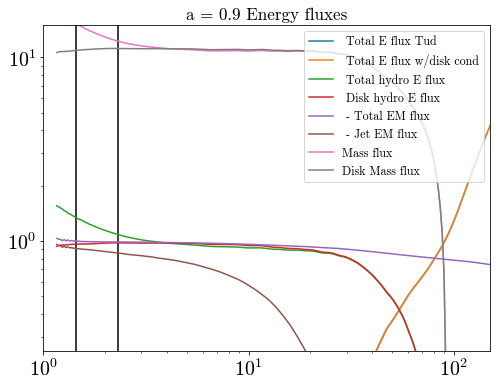

In [223]:
plt.figure(figsize=(8,6))
fs = 12

plt.title("a = 0.9 Energy fluxes", fontsize = fs+5)

plt.loglog(r[:,ny//2,0], -fEtotEMMA_09/fM_09[iofr(10)], label=" Total E flux Tud")
plt.loglog(r[:,ny//2,0], -fEtot_cond_09/fM_09[iofr(10)], label=" Total E flux w/disk cond")


plt.loglog(r[:,ny//2,0], fEtotMA_09/fM_09[iofr(10)], label=" Total hydro E flux ")
plt.loglog(r[:,ny//2,0], fEdiskMA_09 / fM_09[iofr(10)], label=" Disk hydro E flux")


plt.loglog(r[:,ny//2,0], - fEtotEM_09/fM_09[iofr(10)], label=" - Total EM flux ")
plt.loglog(r[:,ny//2,0], - fEjetEM_09/fM_09[iofr(10)], label=" - Jet EM flux ")



plt.vlines(rhor, 10**-1, 10**1.5)
plt.vlines(Risco(a), 10**-1, 10**1.5)
#plt.loglog(r[:,ny//2,0], Mdot, label="current Mass flux")
plt.loglog(r[:,ny//2,0], fM_09, label="Mass flux")
plt.loglog(r[:,ny//2,0], fMdisk_09, label="Disk Mass flux")


#plt.loglog(r[:,ny//2,0],((-(gdet*rho*uu[1]*(bsq/rho <30)*_dx2*_dx3))[:,:,:]).sum(-1).sum(-1), label="mass test")

#plt.loglog(r[:,ny//2,0], -fEM_02 /fM_02 , label="- EM flux")
#plt.loglog(r[:,ny//2,0], - powj_02 /fM_02 , label="- Jet power")


plt.ylim(10**-0.6,15)
plt.xlim(1e0,150)
#plt.loglog(r[:,ny//2,0],rho[:,ny//2,0]*10)
plt.legend(fontsize = fs, loc=1)

C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12: RuntimeWarning: invalid value encountered in sqrt
  from matplotlib import rc


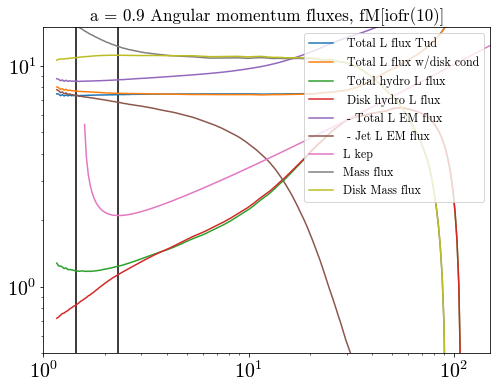

In [224]:
plt.figure(figsize=(8,6))
fs = 12

plt.title("a = 0.9 Angular momentum fluxes, fM[iofr(10)]", fontsize = fs+5)


plt.loglog(r[:,ny//2,0], np.abs(fLtotEMMA_09)/fM_09[iofr(10)], label=" Total L flux Tud")
plt.loglog(r[:,ny//2,0], np.abs(fLtot_cond_09)/fM_09[iofr(10)], label=" Total L flux w/disk cond")


plt.loglog(r[:,ny//2,0], fLtotMA_09/fM_09[iofr(10)], label=" Total hydro L flux ")
plt.loglog(r[:,ny//2,0], fLdiskMA_09 / fM_09[iofr(10)], label=" Disk hydro L flux")


plt.loglog(r[:,ny//2,0], - fLtotEM_09/fM_09[iofr(10)], label=" - Total L EM flux ")
plt.loglog(r[:,ny//2,0], - fLjetEM_09/fM_09[iofr(10)], label=" - Jet L EM flux ")


#plt.loglog(r[:,ny//2,0], fEdiskMA_09, label=" Disk E flux hydro 2")

plt.loglog(r[:,ny//2,0], lk(a,r[:,ny//2,0]) , label="L kep")

#plt.loglog(r[:,ny//2,0], fEdiskMA_02 / fM_02, label=" Disk L flux hydro")

plt.vlines(rhor, 10**-1, 10**1.5)
plt.vlines(Risco(a), 10**-1, 10**1.5)
#plt.loglog(r[:,ny//2,0], Mdot, label="current Mass flux")
plt.loglog(r[:,ny//2,0], fM_09, label="Mass flux")
plt.loglog(r[:,ny//2,0], fMdisk_09, label="Disk Mass flux")


#plt.loglog(r[:,ny//2,0],((-(gdet*rho*uu[1]*(bsq/rho <30)*_dx2*_dx3))[:,:,:]).sum(-1).sum(-1), label="mass test")

#plt.loglog(r[:,ny//2,0], -fEM_02 /fM_02 , label="- EM flux")
#plt.loglog(r[:,ny//2,0], - powj_02 /fM_02 , label="- Jet power")


plt.ylim(0.5,15)
plt.xlim(1e0,150)
#plt.loglog(r[:,ny//2,0],rho[:,ny//2,0]*10)
plt.legend(fontsize = fs, loc=1)

C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12: RuntimeWarning: invalid value encountered in sqrt
  from matplotlib import rc


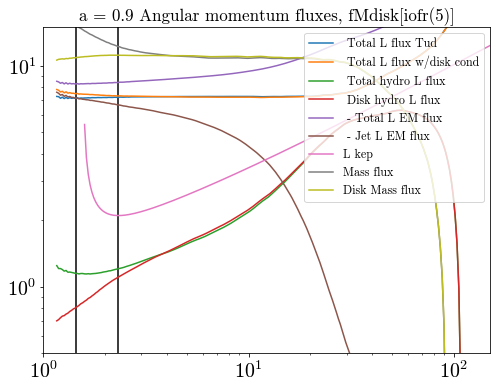

In [225]:
plt.figure(figsize=(8,6))
fs = 12

rad_fM = 5

plt.title("a = 0.9 Angular momentum fluxes, fMdisk[iofr(5)]", fontsize = fs+5)


plt.loglog(r[:,ny//2,0], np.abs(fLtotEMMA_09)/fMdisk_09[iofr(rad_fM)], label=" Total L flux Tud")
plt.loglog(r[:,ny//2,0], np.abs(fLtot_cond_09)/fMdisk_09[iofr(rad_fM)], label=" Total L flux w/disk cond")


plt.loglog(r[:,ny//2,0], fLtotMA_09/fMdisk_09[iofr(rad_fM)], label=" Total hydro L flux ")
plt.loglog(r[:,ny//2,0], fLdiskMA_09 / fMdisk_09[iofr(rad_fM)], label=" Disk hydro L flux")


plt.loglog(r[:,ny//2,0], - fLtotEM_09/fMdisk_09[iofr(rad_fM)], label=" - Total L EM flux ")
plt.loglog(r[:,ny//2,0], - fLjetEM_09/fMdisk_09[iofr(rad_fM)], label=" - Jet L EM flux ")


#plt.loglog(r[:,ny//2,0], fEdiskMA_09, label=" Disk E flux hydro 2")

plt.loglog(r[:,ny//2,0], lk(a,r[:,ny//2,0]) , label="L kep")

#plt.loglog(r[:,ny//2,0], fEdiskMA_02 / fM_02, label=" Disk L flux hydro")

plt.vlines(rhor, 10**-1, 10**1.5)
plt.vlines(Risco(a), 10**-1, 10**1.5)
#plt.loglog(r[:,ny//2,0], Mdot, label="current Mass flux")
plt.loglog(r[:,ny//2,0], fM_09, label="Mass flux")
plt.loglog(r[:,ny//2,0], fMdisk_09, label="Disk Mass flux")


#plt.loglog(r[:,ny//2,0],((-(gdet*rho*uu[1]*(bsq/rho <30)*_dx2*_dx3))[:,:,:]).sum(-1).sum(-1), label="mass test")

#plt.loglog(r[:,ny//2,0], -fEM_02 /fM_02 , label="- EM flux")
#plt.loglog(r[:,ny//2,0], - powj_02 /fM_02 , label="- Jet power")


plt.ylim(0.5,15)
plt.xlim(1e0,150)
#plt.loglog(r[:,ny//2,0],rho[:,ny//2,0]*10)
plt.legend(fontsize = fs, loc=1)

In [226]:
def lkepfunc(r):
    return r**.495 + 0.3

C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12: RuntimeWarning: invalid value encountered in sqrt
  from matplotlib import rc


(1.4358898943540672, 70)

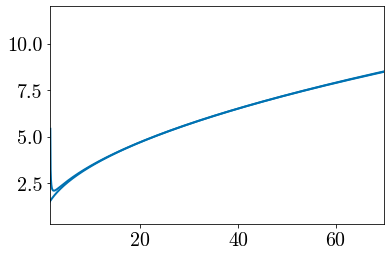

In [227]:
plt.plot(r[:,ny//2,0], lk(a,r[:,ny//2,0]) , label="Keplerian", color='#0072B2', lw=2)
plt.plot(r[:,ny//2,0], lkepfunc(r[:,ny//2,0]) , label="Keplerian", color='#0072B2', lw=2)

plt.ylim(10**-.5,12)
plt.xlim(rhor,70)

(1.4358898943540672, 70)

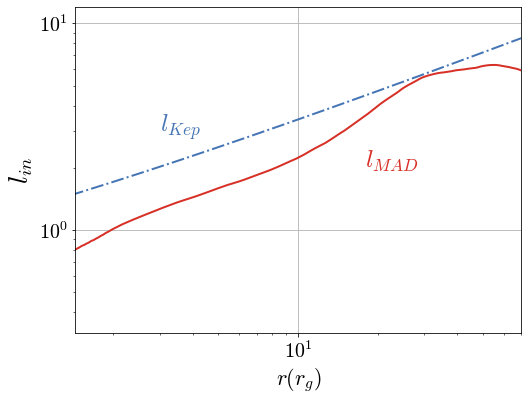

In [228]:
plt.figure(figsize=(8,6))
fs = 12

#plt.title("a = 0.9", fontsize = fs+5)
plt.grid(b=1)

#plt.loglog(r[:,ny//2,0], np.abs(fEtotEMMA_09)/fM_09[iofr(10)], label=" Total E flux (disk+jet) ")
#plt.loglog(r[:,ny//2,0], fEdiskEMMA_09/fM_09[iofr(10)], label=" Disk E flux ")
#plt.loglog(r[:,ny//2,0], - fEM_09/fM_09[iofr(10)], label=" - Jet E flux ")

#plt.loglog(r[:,ny//2,0], -fLtotEMMA_09 /fM_09[iofr(10)] , label=" - Total L flux (disk+jet, ma+em)")
#plt.loglog(r[:,ny//2,0], fLdiskEMMA_09 /fM_09[iofr(10)] , label=" Disk L flux (ma+em)")
#plt.loglog(r[:,ny//2,0], - fLjetEMMA_09 /fM_09[iofr(10)] , label=" - Jet L flux (ma+em)")

#plt.loglog(r[:,ny//2,0], fEdiskMA_09 / fM_09[iofr(10)], label=" Disk E flux hydro")
#plt.loglog(r[:,ny//2,0], fLdiskMA_09 / fM_09[iofr(10)], label="MAD", color=cb_red,lw=2)
#plt.loglog(r[:,ny//2,0], fLdiskMA_09 / fMdisk_09[iofr(10)], label="MAD", color=cb_red,lw=2)
plt.loglog(r[:,ny//2,0], fLdiskMA_09 / fMdisk_09[iofr(5)], label="MAD", color=cb_red,lw=2)


#plt.loglog(r[:,ny//2,0], -fLdiskEMMA_09 / fM_09[iofr(10)], label="MAD", color='blue',lw=2)

#plt.loglog(r[:,ny//2,0], fLtotMA_09 / fM_09[iofr(10)], label="total MA", color="green")

#plt.loglog(r[:,ny//2,0], fLdiskMA_09 / fM_09[iofr(5)], label="MAD", color="red")


#plt.loglog(r[:,ny//2,0], fEdiskMA_09, label=" Disk E flux hydro 2")

#plt.loglog(r[:,ny//2,0], lk(a,r[:,ny//2,0]) , label="Keplerian", color='#0072B2', lw=2)
plt.loglog(r[:,ny//2,0], lkepfunc(r[:,ny//2,0]), ls="dashdot", alpha=1, label="Keplerian", color=cb_dblue, lw=2)


#plt.loglog(r[:,ny//2,0], fEdiskMA_02 / fM_02, label=" Disk L flux hydro")

#plt.vlines(rhor, 10**-1, 10**1.5, label="Rhor")
#plt.vlines(Risco(a), 10**-1, 10**1.5, label = "Risco")
#plt.loglog(r[:,ny//2,0], Mdot, label="current Mass flux")
#plt.loglog(r[:,ny//2,0], fM_09, label="Mass flux total")
#plt.loglog(r[:,ny//2,0], fMdisk_09, label="DiskMass flux total")


#plt.loglog(r[:,ny//2,0],((-(gdet*rho*uu[1]*(bsq/rho <30)*_dx2*_dx3))[:,:,:]).sum(-1).sum(-1), label="mass test")


plt.text(18, 2, r"$l_{MAD}$", color=cb_red, fontsize=25)
plt.text(3,3, r"$l_{Kep}$", color=cb_dblue, fontsize=25)


plt.xlabel(r"$r (r_g)$", fontsize=22)
plt.ylabel(r"$l_{in}$", fontsize=27)


plt.ylim(10**-.5,12)
plt.xlim(rhor,70)
#plt.loglog(r[:,ny//2,0],rho[:,ny//2,0]*10)
#plt.legend(fontsize = 1.5*fs, loc=4)

In [229]:
print(Rin)

1.14871191548325


In [230]:
fLdiskMA_09[iofr(rhor)]/fM_09[iofr(10)]

0.82233846

In [231]:
fLdiskMA_09[iofr(rhor)]/fM_09[iofr(10)] / lnt(0.9,Risco(0.9))

0.3916298846715762

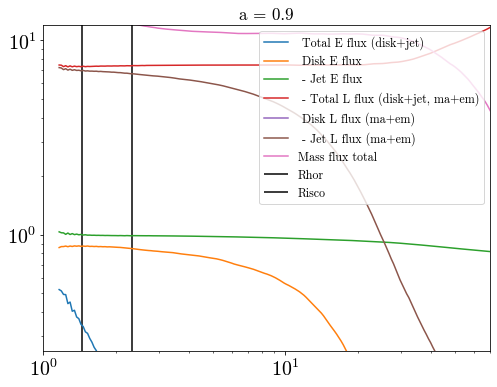

In [232]:
plt.figure(figsize=(8,6))
fs = 12

plt.title("a = 0.9", fontsize = fs+5)

plt.loglog(r[:,ny//2,0], fEtotEMMA_09/fM_09[iofr(10)], label=" Total E flux (disk+jet) ")
plt.loglog(r[:,ny//2,0], fEdiskEMMA_09/fM_09[iofr(10)], label=" Disk E flux ")
plt.loglog(r[:,ny//2,0], - fEtotEM_09/fM_09[iofr(10)], label=" - Jet E flux ")

plt.loglog(r[:,ny//2,0], -fLtotEMMA_09 /fM_09[iofr(10)] , label=" - Total L flux (disk+jet, ma+em)")
plt.loglog(r[:,ny//2,0], fLdiskEMMA_09 /fM_09[iofr(10)] , label=" Disk L flux (ma+em)")
plt.loglog(r[:,ny//2,0], - fLjetEMMA_09 /fM_09[iofr(10)] , label=" - Jet L flux (ma+em)")

#plt.loglog(r[:,ny//2,0], fEdiskMA_02 / fM_02, label=" Disk L flux hydro")

plt.vlines(rhor, 10**-1, 10**1.5, label="Rhor")
plt.vlines(Risco(a), 10**-1, 10**1.5, label = "Risco")
#plt.loglog(r[:,ny//2,0], Mdot, label="current Mass flux")
plt.loglog(r[:,ny//2,0], fM_09, label="Mass flux total")

#plt.loglog(r[:,ny//2,0], -fEM_02 /fM_02 , label="- EM flux")
#plt.loglog(r[:,ny//2,0], - powj_02 /fM_02 , label="- Jet power")


plt.ylim(10**-0.6,12)
plt.xlim(1e0,70)
#plt.loglog(r[:,ny//2,0],rho[:,ny//2,0]*10)
plt.legend(fontsize = fs, loc=1)

In [233]:
fLdiskMA = fLdiskMA_09
fEdiskMA = fEdiskMA_09
fMdisk = fMdisk_09
fLtotMA = fLtotMA_09
fEtotMA = fEtotMA_09
fM = fM_09
fEtotEM = fEtotEM_09
fLtotEM = fLtotEM_09
fEtotEMMA = fEtotEMMA_09
fLtotEMMA = fLtotEMMA_09
fLtot_cond = fLtot_cond_09
fEtot_cond = fEtot_cond_09

In [234]:
lkeplist[i] = lk(a,r[:,ny//2,0])[iofr(Risco(a))]

#def calc_fLfE_rg(fL, fE, fM, rhor, radE, radM):

# Hydro with disk condition, E at r=10rg
# Using disk mass flux, with disk conditon
lhydro_10rg[i], ehydro_10rg[i] = calc_fLfE_rg(fLdiskMA, fEdiskMA, fMdisk, rhor, 10, 10)
shydro_10rg[i] = s(a, lhydro_10rg[i], ehydro_10rg[i])
print("s_hydro at 10rg:  %.3f" % shydro_10rg[i])

# Hydro with disk condition, E at r=5rg
# Using disk mass flux, with disk conditon
lhydro_5rg[i], ehydro_5rg[i] = calc_fLfE_rg(fLdiskMA, fEdiskMA, fMdisk, rhor, 5, 5)
shydro_5rg[i] = s(a, lhydro_5rg[i], ehydro_5rg[i])
print("s_hydro at 5rg:   %.3f" % shydro_5rg[i])

# Hydro as total MA (without disk condition) E at r=10rg
lhydro_totMA_10rg[i], ehydro_totMA_10rg[i] = calc_fLfE_rg(fLtotMA, fEtotMA, fM, rhor, 10, 10)
shydro_totMA_10rg[i] = s(a, lhydro_totMA_10rg[i], ehydro_totMA_10rg[i])
print("s_MA at 10rg:     %.3f" % shydro_totMA_10rg[i])

# EM total, E flux taken at horizon
# Total mass flux at 5rg
lEM_5rg[i], eEM_5rg[i] = calc_fLfE_rg(fLtotEM, fEtotEM, fMdisk, rhor, rhor, 5)
sEM_5rg[i] = s(a, lEM_5rg[i], eEM_5rg[i])
print("s_EM, fM at 5rg: %.3f" % sEM_5rg[i])

# EM total, E flux taken at horizon
# Total mass flux at 10rg
lEM_10rg[i], eEM_10rg[i] = calc_fLfE_rg(fLtotEM, fEtotEM, fMdisk, rhor, rhor, 10)
sEM_10rg[i] = s(a, lEM_10rg[i], eEM_10rg[i])
print("s_EM, fM at 10rg: %.3f" % sEM_10rg[i])

# Total fluxes without disk condition
ltot_5rg[i], etot_5rg[i] = calc_fLfE_rg(fLtotEMMA, fEtotEMMA, fM, rhor, 5, 5)
stot_5rg[i] = s(a, ltot_5rg[i], etot_5rg[i])
print("s_tot at 5rg w/o condition:  %.3f" % stot_5rg[i])

# Total fluxes without disk condition
ltot_10rg[i], etot_10rg[i] = calc_fLfE_rg(fLtotEMMA, fEtotEMMA, fM, rhor, 10, 10)
stot_10rg[i] = s(a, ltot_10rg[i], etot_10rg[i])
print("s_tot at 10rg w/o condition:  %.3f" % stot_10rg[i])

# Total fluxes with disk condition with E at r=5rg
# fL = TudMA*(bsq/rho < 30) + TudEM
l_totcond_5rg[i], e_totcond_5rg[i] = calc_fLfE_rg(fLtot_cond, fEtot_cond, fMdisk, rhor, 5, 5)
s_totcond_5rg[i] = s(a, l_totcond_5rg[i], e_totcond_5rg[i])
print("s_tot at 5rg with condition:    %.3f" % s_totcond_5rg[i])

# Total fluxes with disk condition with E at r=5rg
# fL = TudMA*(bsq/rho < 30) + TudEM
l_totcond_10rg[i], e_totcond_10rg[i] = calc_fLfE_rg(fLtot_cond, fEtot_cond, fMdisk, rhor, 10, 10)
s_totcond_10rg[i] = s(a, l_totcond_10rg[i], e_totcond_10rg[i])
print("s_tot at 10rg with condition:    %.3f" % s_totcond_10rg[i])

OmegaH = a /(2*rhor)
print(OmegaH, 2*np.pi*omegaf2b[iofr(rhor), ny//3, 1])

#kn09 = 2*np.pi*omegaf2b[iofr(rhor), ny//3, 1]/OmegaH
#print(2*np.pi*omegaf2b[iofr(rhor), ny//3, 1]/OmegaH)
#print("k = ", kn09)

s_hydro at 10rg:  -0.864
s_hydro at 5rg:   -0.904
s_MA at 10rg:     -0.470
s_EM, fM at 5rg: -6.523
s_EM, fM at 10rg: -6.602
s_tot at 5rg w/o condition:  -7.151
s_tot at 10rg w/o condition:  -7.247
s_tot at 5rg with condition:    -7.468
s_tot at 10rg with condition:    -7.543
0.3133945031366293 0.1156610653361953


C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12: RuntimeWarning: invalid value encountered in sqrt
  from matplotlib import rc


In [235]:
ehydro_10rg
shydro_10rg[i]

-0.8643402934074402

In [236]:
klist[i] = (2*np.pi*omegaf_09/OmegaH).mean(-1)
klist[i]

0.3504994511604309

## a = 0.99

In [95]:
cd D:\BHspindown\maddat_backup\rtf2_15r34_2pi_a0.99gg500rbr1e3_0_0_0

D:\BHspindown\maddat_backup\rtf2_15r34_2pi_a0.99gg500rbr1e3_0_0_0


In [96]:
# This assumes gdump.bin is in /dumps
grid3d("gdump.bin")

Reading grid from dumps/gdump.bin ...  done!


In [240]:
rfd("fieldline2500.bin")

ud = (gv3[:,:]*uu[:,None]).sum(0)

#save in 1D radial slices in equitorial plane
rho1d = rho[:,ny//2,0]
ug1d = ug[:,ny//2,0]
dxdxp31d = dxdxp[3,3]
ud31d = ud[3][:,ny//2,0]
gdet1d = gdet[:,ny//2,0]
        
bu=np.empty_like(uu)              #allocate memory for bu
bu[0]=mdot(B[1:4], ud[1:4])             #B^i u_i
bu[1:4]=(B[1:4] + bu[0]*uu[1:4])/uu[0]  #b^i = (B^i + b^t u^i)/u^t
bd=mdot(gv3,bu)
bsq=mdot(bu,bd)
faraday()

pshape(rho)
dotproduct(uu,ud)

Opening fieldline2500.bin ...
rfdheader: t=12500
Found 30 header items, reading them in and setting EP3=THETAROT=0.0

Loading gdetB data...
No data on gdetF, setting it to None.
No data on Bstag, setting it to B.
No data on KAPPA and FLR
No data on luminosity (cooling off?)


C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12538: RuntimeWarning: divide by zero encountered in true_divide
  omegaf1=fdd[0,1]/fdd[1,3] # = ftr/frp
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12538: RuntimeWarning: invalid value encountered in true_divide
  omegaf1=fdd[0,1]/fdd[1,3] # = ftr/frp
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12539: RuntimeWarning: divide by zero encountered in true_divide
  omegaf2=fdd[0,2]/fdd[2,3] # = fth/fhp
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12539: RuntimeWarning: invalid value encountered in true_divide
  omegaf2=fdd[0,2]/fdd[2,3] # = fth/fhp


(288, 128, 64)
(288, 128, 64)
None
-1.000186 -0.99985075


C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12568: RuntimeWarning: divide by zero encountered in true_divide
  omegaf2b=np.fabs(v3nonhat) + np.sign(uu[1])*(vpol/Bpol)*np.fabs(B3nonhat)
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12568: RuntimeWarning: invalid value encountered in multiply
  omegaf2b=np.fabs(v3nonhat) + np.sign(uu[1])*(vpol/Bpol)*np.fabs(B3nonhat)
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12570: RuntimeWarning: invalid value encountered in true_divide
  omegaf1b=v3nonhat - B3nonhat*(v1hat*B1hat+v2hat*B2hat)/(B1hat**2+B2hat**2)


In [97]:
i=8

rhorlist[i]=rhor
OmegaH = a /(2*rhor)
OmegaHlist[i] = OmegaH

In [98]:
istart = 2000
iend = 2930 #goes up to 4513 for a=0.99
istep = 10

In [99]:
umaxcount = 0
umincount = 0

for i in range(istart, iend, istep):
    #load vars this time step
    rfd("fieldline%04d.bin" % i)
    ud = (gv3[:,:]*uu[:,None]).sum(0)
    
    v1=uu
    v2=ud
    
    dot = v1[0]*v2[0] + v1[1]*v2[1] + v1[2]*v2[2] + v1[3]*v2[3]
    print(pshape(dot))
    if np.min(dot)<-1-1e-3:
        print("!!! ", np.min(dot))
        umincount+=1
    if np.max(dot)>-1+1e-3:
        print("!!! ", np.max(dot))
        umaxcount+=1

Opening fieldline2000.bin ...
rfdheader: t=10000
Found 30 header items, reading them in and setting EP3=THETAROT=0.0

Loading gdetB data...
No data on gdetF, setting it to None.
No data on Bstag, setting it to B.
No data on KAPPA and FLR
No data on luminosity (cooling off?)
(288, 128, 64)
None
Opening fieldline2010.bin ...
rfdheader: t=10050
Found 30 header items, reading them in and setting EP3=THETAROT=0.0

Loading gdetB data...
No data on gdetF, setting it to None.
No data on Bstag, setting it to B.
No data on KAPPA and FLR
No data on luminosity (cooling off?)
(288, 128, 64)
None
Opening fieldline2020.bin ...
rfdheader: t=10100
Found 30 header items, reading them in and setting EP3=THETAROT=0.0

Loading gdetB data...
No data on gdetF, setting it to None.
No data on Bstag, setting it to B.
No data on KAPPA and FLR
No data on luminosity (cooling off?)
(288, 128, 64)
None
Opening fieldline2030.bin ...
rfdheader: t=10150
Found 30 header items, reading them in and setting EP3=THETAROT=0.

In [102]:
print(umaxcount,umincount)

0 0


In [242]:
pshape(rho)

(288, 128, 64)


In [243]:
data_1d = np.load("a99_avg1d_100221.npz")

rho_99 = data_1d['rho_1d']
gdet_99 = data_1d['gdet_1d']
thick_99 = data_1d['thick_1d']
den1_99 = data_1d['den1_1d']

omegaf_99 = data_1d['omegaf_1d']

fM_99 = data_1d['fM_1d']
fMdisk_99 = data_1d['fMdisk_1d']

PhiBH_99 = data_1d['PhiBH_1d']
PhiBHd_99 = data_1d['PhiBHd_1d']
PhiBHj_99 = data_1d['PhiBHj_1d']
PhiBHcheck_99 = data_1d['PhiBHcheck_1d']
ud3avg_99 = data_1d['ud3avg_1d']

ud3num_99 = data_1d['ud3num_1d']

fEdiskMA_99 = data_1d['fEdiskMA_1d']
fEdiskEM_99 = data_1d['fEdiskEM_1d']
fEdiskEMMA_99 = data_1d['fEdiskEMMA_1d']
fEdiskEMMAcheck_99 = data_1d['fEdiskEMMA_check_1d']

fEjetEM_99 = data_1d['fEjetEM_1d']

fEtotEMMA_99 = data_1d['fEtotEMMA_1d']
fEtotEMMA_check_99 = data_1d['fEtotEMMA_check_1d']
fEtotEM_99 = data_1d['fEtotEM_1d']
fEtotEM_check_99 = data_1d['fEtotEM_check_1d']
fEtotMA_99 = data_1d['fEtotMA_1d']
fEtotMA_check_99 = data_1d['fEtotMA_check_1d']

#-------------------------------------
fLdiskMA_99 = data_1d['fLdiskMA_1d']
fLdiskEM_99 = data_1d['fLdiskEM_1d']
fLdiskEMMA_99 = data_1d['fLdiskEMMA_1d']
fLdiskEMMA_check_99 = data_1d['fLdiskEMMA_check_1d']

fLjetEM_99 = data_1d['fLjetEM_1d']
fLjetMA_99 = data_1d['fLjetMA_1d']
fLjetEMMA_99 = data_1d['fLjetEMMA_1d']
fLjetEMMA_check_99 = data_1d['fLjetEMMA_check_1d']

fLtotMA_99 = data_1d['fLtotMA_1d']
fLtotMA_check_99 = data_1d['fLtotMA_check_1d']
fLtotEM_99 = data_1d['fLtotEM_1d']
fLtotEM_check_99 = data_1d['fLtotEM_check_1d']
fLtotEMMA_99 = data_1d['fLtotEMMA_1d']
fLtotEMMA_check_99 = data_1d['fLtotEMMA_check_1d']

fLtotEM_check_99 = data_1d['fLtotEM_check_1d']
fLtotMA_check_99 = data_1d['fLtotMA_check_1d']

fEtot_cond_99 = data_1d['fEtot_cond_1d']
fLtot_cond_99 = data_1d['fLtot_cond_1d']

data_1d.close()

In [244]:
rfd("fieldline2000.bin")

ud = (gv3[:,:]*uu[:,None]).sum(0)

#save in 1D radial slices in equitorial plane
rho1d = rho[:,ny//2,0]
ug1d = ug[:,ny//2,0]
dxdxp31d = dxdxp[3,3]
ud31d = ud[3][:,ny//2,0]
gdet1d = gdet[:,ny//2,0]
        
bu=np.empty_like(uu)              #allocate memory for bu
bu[0]=mdot(B[1:4], ud[1:4])             #B^i u_i
bu[1:4]=(B[1:4] + bu[0]*uu[1:4])/uu[0]  #b^i = (B^i + b^t u^i)/u^t
bd=mdot(gv3,bu)
bsq=mdot(bu,bd)
faraday()

pshape(rho)
dotproduct(uu,ud)

Opening fieldline2000.bin ...
rfdheader: t=10000
Found 30 header items, reading them in and setting EP3=THETAROT=0.0

Loading gdetB data...
No data on gdetF, setting it to None.
No data on Bstag, setting it to B.
No data on KAPPA and FLR
No data on luminosity (cooling off?)


C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12538: RuntimeWarning: invalid value encountered in true_divide
  omegaf1=fdd[0,1]/fdd[1,3] # = ftr/frp
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12539: RuntimeWarning: divide by zero encountered in true_divide
  omegaf2=fdd[0,2]/fdd[2,3] # = fth/fhp
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12539: RuntimeWarning: invalid value encountered in true_divide
  omegaf2=fdd[0,2]/fdd[2,3] # = fth/fhp


(288, 128, 64)
(288, 128, 64)
None
-1.0001769 -0.9998498


C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12568: RuntimeWarning: divide by zero encountered in true_divide
  omegaf2b=np.fabs(v3nonhat) + np.sign(uu[1])*(vpol/Bpol)*np.fabs(B3nonhat)
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12568: RuntimeWarning: invalid value encountered in multiply
  omegaf2b=np.fabs(v3nonhat) + np.sign(uu[1])*(vpol/Bpol)*np.fabs(B3nonhat)
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12570: RuntimeWarning: invalid value encountered in true_divide
  omegaf1b=v3nonhat - B3nonhat*(v1hat*B1hat+v2hat*B2hat)/(B1hat**2+B2hat**2)


In [245]:
Rin

0.947085908631227

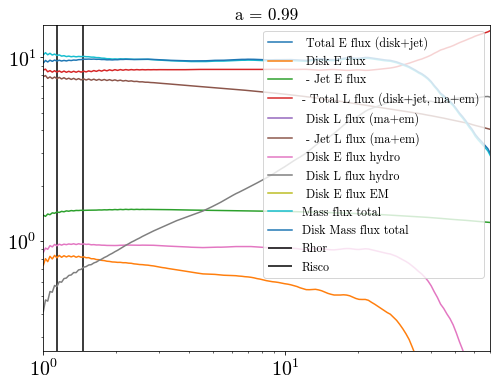

In [246]:
plt.figure(figsize=(8,6))
fs = 12

plt.title("a = 0.99", fontsize = fs+5)

plt.loglog(r[:,ny//2,0], fEtotEMMA_99/fM_99[iofr(10)], label=" Total E flux (disk+jet) ")
plt.loglog(r[:,ny//2,0], fEdiskEMMA_99/fM_99[iofr(10)], label=" Disk E flux ")
plt.loglog(r[:,ny//2,0], - fEtotEM_99/fM_99[iofr(10)], label=" - Jet E flux ")

plt.loglog(r[:,ny//2,0],-fLtotEMMA_99 /fM_99[iofr(10)] , label="- Total L flux (disk+jet, ma+em)")
plt.loglog(r[:,ny//2,0], fLdiskEMMA_99 /fM_99[iofr(10)] , label=" Disk L flux (ma+em)")
plt.loglog(r[:,ny//2,0], - fLjetEMMA_99 /fM_99[iofr(10)] , label=" - Jet L flux (ma+em)")

plt.loglog(r[:,ny//2,0], fEdiskMA_99 / fM_99[iofr(10)], label=" Disk E flux hydro")
plt.loglog(r[:,ny//2,0], fLdiskMA_99 / fM_99[iofr(10)], label=" Disk L flux hydro")

plt.loglog(r[:,ny//2,0], fEdiskEM_99 / fM_99[iofr(10)], label=" Disk E flux EM")

#plt.loglog(r[:,ny//2,0], fEdiskMA_02 / fM_02, label=" Disk L flux hydro")

plt.vlines(rhor, 10**-1, 10**1.5, label="Rhor")
plt.vlines(Risco(a), 10**-1, 10**1.5, label = "Risco")
#plt.loglog(r[:,ny//2,0], Mdot, label="current Mass flux")
plt.loglog(r[:,ny//2,0], fM_99, label="Mass flux total")
plt.loglog(r[:,ny//2,0], fMdisk_99, label="Disk Mass flux total")

#plt.loglog(r[:,ny//2,0], -fEM_02 /fM_02 , label="- EM flux")
#plt.loglog(r[:,ny//2,0], - powj_02 /fM_02 , label="- Jet power")


plt.ylim(10**-0.6,15)
plt.xlim(1e0,70)
#plt.loglog(r[:,ny//2,0],rho[:,ny//2,0]*10)
plt.legend(fontsize = fs, loc=1)

In [247]:
fLdiskMA = fLdiskMA_99
fEdiskMA = fEdiskMA_99
fMdisk = fMdisk_99
fLtotMA = fLtotMA_99
fEtotMA = fEtotMA_99
fM = fM_99
fEtotEM = fEtotEM_99
fLtotEM = fLtotEM_99
fEtotEMMA = fEtotEMMA_99
fLtotEMMA = fLtotEMMA_99
fLtot_cond = fLtot_cond_99
fEtot_cond = fEtot_cond_99

In [248]:
lkeplist[i] = lk(a,r[:,ny//2,0])[iofr(Risco(a))]

#def calc_fLfE_rg(fL, fE, fM, rhor, radE, radM):

# Hydro with disk condition, E at r=10rg
# Using disk mass flux, with disk conditon
lhydro_10rg[i], ehydro_10rg[i] = calc_fLfE_rg(fLdiskMA, fEdiskMA, fMdisk, rhor, 10, 10)
shydro_10rg[i] = s(a, lhydro_10rg[i], ehydro_10rg[i])
print("s_hydro at 10rg:  %.3f" % shydro_10rg[i])

# Hydro with disk condition, E at r=5rg
# Using disk mass flux, with disk conditon
lhydro_5rg[i], ehydro_5rg[i] = calc_fLfE_rg(fLdiskMA, fEdiskMA, fMdisk, rhor, 5, 5)
shydro_5rg[i] = s(a, lhydro_5rg[i], ehydro_5rg[i])
print("s_hydro at 5rg:   %.3f" % shydro_5rg[i])

# Hydro as total MA (without disk condition) E at r=10rg
lhydro_totMA_10rg[i], ehydro_totMA_10rg[i] = calc_fLfE_rg(fLtotMA, fEtotMA, fM, rhor, 10, 10)
shydro_totMA_10rg[i] = s(a, lhydro_totMA_10rg[i], ehydro_totMA_10rg[i])
print("s_MA at 10rg:     %.3f" % shydro_totMA_10rg[i])

# EM total, E flux taken at horizon
# Total mass flux at 5rg
lEM_5rg[i], eEM_5rg[i] = calc_fLfE_rg(fLtotEM, fEtotEM, fMdisk, rhor, rhor, 5)
sEM_5rg[i] = s(a, lEM_5rg[i], eEM_5rg[i])
print("s_EM, fM at 5rg: %.3f" % sEM_5rg[i])

# EM total, E flux taken at horizon
# Total mass flux at 10rg
lEM_10rg[i], eEM_10rg[i] = calc_fLfE_rg(fLtotEM, fEtotEM, fMdisk, rhor, rhor, 10)
sEM_10rg[i] = s(a, lEM_10rg[i], eEM_10rg[i])
print("s_EM, fM at 10rg: %.3f" % sEM_10rg[i])

# Total fluxes without disk condition
ltot_5rg[i], etot_5rg[i] = calc_fLfE_rg(fLtotEMMA, fEtotEMMA, fM, rhor, 5, 5)
stot_5rg[i] = s(a, ltot_5rg[i], etot_5rg[i])
print("s_tot at 5rg w/o condition:  %.3f" % stot_5rg[i])

# Total fluxes without disk condition
ltot_10rg[i], etot_10rg[i] = calc_fLfE_rg(fLtotEMMA, fEtotEMMA, fM, rhor, 10, 10)
stot_10rg[i] = s(a, ltot_10rg[i], etot_10rg[i])
print("s_tot at 10rg w/o condition:  %.3f" % stot_10rg[i])

# Total fluxes with disk condition with E at r=5rg
# fL = TudMA*(bsq/rho < 30) + TudEM
l_totcond_5rg[i], e_totcond_5rg[i] = calc_fLfE_rg(fLtot_cond, fEtot_cond, fMdisk, rhor, 5, 5)
s_totcond_5rg[i] = s(a, l_totcond_5rg[i], e_totcond_5rg[i])
print("s_tot at 5rg with condition:    %.3f" % s_totcond_5rg[i])

# Total fluxes with disk condition with E at r=5rg
# fL = TudMA*(bsq/rho < 30) + TudEM
l_totcond_10rg[i], e_totcond_10rg[i] = calc_fLfE_rg(fLtot_cond, fEtot_cond, fMdisk, rhor, 10, 10)
s_totcond_10rg[i] = s(a, l_totcond_10rg[i], e_totcond_10rg[i])
print("s_tot at 10rg with condition:    %.3f" % s_totcond_10rg[i])

OmegaH = a /(2*rhor)
print(OmegaH, 2*np.pi*omegaf2b[iofr(rhor), ny//3, 1])

#kn09 = 2*np.pi*omegaf2b[iofr(rhor), ny//3, 1]/OmegaH
#print(2*np.pi*omegaf2b[iofr(rhor), ny//3, 1]/OmegaH)
#print("k = ", kn09)

s_hydro at 10rg:  -1.236
s_hydro at 5rg:   -1.265
s_MA at 10rg:     -0.934
s_EM, fM at 5rg: -6.187
s_EM, fM at 10rg: -6.128
s_tot at 5rg w/o condition:  -7.178
s_tot at 10rg w/o condition:  -7.115
s_tot at 5rg with condition:    -7.393
s_tot at 10rg with condition:    -7.344
0.4338043637390611 0.17027748506073057


C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12: RuntimeWarning: invalid value encountered in sqrt
  from matplotlib import rc


In [249]:
ltest, etest = calc_fLfE_rg(fLtotEMMA, fEtotEMMA, fM, rhor, 10, 10)
stest = s(a, ltest, etest)
print("s_tot at 5rg with condition:    %.3f" % stest)

s_tot at 5rg with condition:    -7.115


In [250]:
print(eEM_5rg[i], lEM_5rg[i])

-1.4352511167526245 -9.02853012084961


In [251]:
klist[i] = (2*np.pi*omegaf_99/OmegaH).mean(-1)
klist[i]

0.3387353718280792

## a = -0.2

In [73]:
cd D:\BHspindown\maddat_backup\rtf2_15r35.64_a-0.2_0_0_0

D:\BHspindown\maddat_backup\rtf2_15r35.64_a-0.2_0_0_0


In [74]:
#Need to have gdump.bin in /dumps directory
grid3d("gdump.bin")

Reading grid from dumps/gdump.bin ...  done!


In [75]:
i=2

rhorlist[i]=rhor
OmegaH = a /(2*rhor)
OmegaHlist[i] = OmegaH

In [76]:
istart = 2360
iend = 3040 #goes up to 3036 for a=-0.2
istep = 10

In [77]:
umaxcount = 0
umincount = 0

for i in range(istart, iend, istep):
    #load vars this time step
    rfd("fieldline%04d.bin" % i)
    ud = (gv3[:,:]*uu[:,None]).sum(0)
    
    v1=uu
    v2=ud
    
    dot = v1[0]*v2[0] + v1[1]*v2[1] + v1[2]*v2[2] + v1[3]*v2[3]
    print(pshape(dot))
    if np.min(dot)<-1-1e-4:
        print("!!! ", np.min(dot))
        umincount+=1
    if np.max(dot)>-1+1e-4:
        print("!!! ", np.max(dot))
        umaxcount+=1

Opening fieldline2360.bin ...
rfdheader: t=11800
Found 30 header items, reading them in and setting EP3=THETAROT=0.0

Loading gdetB data...
No data on gdetF, setting it to None.
No data on Bstag, setting it to B.
No data on KAPPA and FLR
No data on luminosity (cooling off?)
(288, 128, 32)
None
Opening fieldline2370.bin ...
rfdheader: t=11850
Found 30 header items, reading them in and setting EP3=THETAROT=0.0

Loading gdetB data...
No data on gdetF, setting it to None.
No data on Bstag, setting it to B.
No data on KAPPA and FLR
No data on luminosity (cooling off?)
(288, 128, 32)
None
Opening fieldline2380.bin ...
rfdheader: t=11900
Found 30 header items, reading them in and setting EP3=THETAROT=0.0

Loading gdetB data...
No data on gdetF, setting it to None.
No data on Bstag, setting it to B.
No data on KAPPA and FLR
No data on luminosity (cooling off?)
(288, 128, 32)
None
Opening fieldline2390.bin ...
rfdheader: t=11950
Found 30 header items, reading them in and setting EP3=THETAROT=0.

In [78]:
print(umaxcount,umincount)

0 0


In [255]:
rfd("fieldline2000.bin")

ud = (gv3[:,:]*uu[:,None]).sum(0)

#save in 1D radial slices in equitorial plane
rho1d = rho[:,ny//2,0]
ug1d = ug[:,ny//2,0]
dxdxp31d = dxdxp[3,3]
ud31d = ud[3][:,ny//2,0]
gdet1d = gdet[:,ny//2,0]
        
bu=np.empty_like(uu)              #allocate memory for bu
bu[0]=mdot(B[1:4], ud[1:4])             #B^i u_i
bu[1:4]=(B[1:4] + bu[0]*uu[1:4])/uu[0]  #b^i = (B^i + b^t u^i)/u^t
bd=mdot(gv3,bu)
bsq=mdot(bu,bd)
faraday()

pshape(rho)
dotproduct(uu,ud)

Opening fieldline2000.bin ...
rfdheader: t=10000
Found 30 header items, reading them in and setting EP3=THETAROT=0.0

Loading gdetB data...
No data on gdetF, setting it to None.
No data on Bstag, setting it to B.
No data on KAPPA and FLR
No data on luminosity (cooling off?)


C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12538: RuntimeWarning: divide by zero encountered in true_divide
  omegaf1=fdd[0,1]/fdd[1,3] # = ftr/frp
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12538: RuntimeWarning: invalid value encountered in true_divide
  omegaf1=fdd[0,1]/fdd[1,3] # = ftr/frp
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12539: RuntimeWarning: divide by zero encountered in true_divide
  omegaf2=fdd[0,2]/fdd[2,3] # = fth/fhp
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12539: RuntimeWarning: invalid value encountered in true_divide
  omegaf2=fdd[0,2]/fdd[2,3] # = fth/fhp
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12568: RuntimeWarning: divide by zero encountered in true_divide
  omegaf2b=np.fabs(v3nonhat) + np.sign(uu[1])*(vpol/Bpol)*np.fabs(B3nonhat)


(288, 128, 32)
(288, 128, 32)
None
-1.0000005 -0.9999995


C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12568: RuntimeWarning: invalid value encountered in multiply
  omegaf2b=np.fabs(v3nonhat) + np.sign(uu[1])*(vpol/Bpol)*np.fabs(B3nonhat)
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12570: RuntimeWarning: invalid value encountered in true_divide
  omegaf1b=v3nonhat - B3nonhat*(v1hat*B1hat+v2hat*B2hat)/(B1hat**2+B2hat**2)


In [256]:
pshape(rho)

(288, 128, 32)


In [257]:
data_1d = np.load("an02_avg1d_100221.npz")

rho_n02 = data_1d['rho_1d']
gdet_n02 = data_1d['gdet_1d']
thick_n02 = data_1d['thick_1d']
den1_n02 = data_1d['den1_1d']

omegaf_n02 = data_1d['omegaf_1d']

fM_n02 = data_1d['fM_1d']
fMdisk_n02 = data_1d['fMdisk_1d']

PhiBH_n02 = data_1d['PhiBH_1d']
PhiBHd_n02 = data_1d['PhiBHd_1d']
PhiBHj_n02 = data_1d['PhiBHj_1d']
PhiBHcheck_n02 = data_1d['PhiBHcheck_1d']
ud3avg_n02 = data_1d['ud3avg_1d']

ud3num_n02 = data_1d['ud3num_1d']

fEdiskMA_n02 = data_1d['fEdiskMA_1d']
fEdiskEM_n02 = data_1d['fEdiskEM_1d']
fEdiskEMMA_n02 = data_1d['fEdiskEMMA_1d']
fEdiskEMMAcheck_n02 = data_1d['fEdiskEMMA_check_1d']

fEjetEM_n02 = data_1d['fEjetEM_1d']

fEtotEMMA_n02 = data_1d['fEtotEMMA_1d']
fEtotEMMA_check_n02 = data_1d['fEtotEMMA_check_1d']
fEtotEM_n02 = data_1d['fEtotEM_1d']
fEtotEM_check_n02 = data_1d['fEtotEM_check_1d']
fEtotMA_n02 = data_1d['fEtotMA_1d']
fEtotMA_check_n02 = data_1d['fEtotMA_check_1d']

#-------------------------------------
fLdiskMA_n02 = data_1d['fLdiskMA_1d']
fLdiskEM_n02 = data_1d['fLdiskEM_1d']
fLdiskEMMA_n02 = data_1d['fLdiskEMMA_1d']
fLdiskEMMA_check_n02 = data_1d['fLdiskEMMA_check_1d']

fLjetEM_n02 = data_1d['fLjetEM_1d']
fLjetMA_n02 = data_1d['fLjetMA_1d']
fLjetEMMA_n02 = data_1d['fLjetEMMA_1d']
fLjetEMMA_check_n02 = data_1d['fLjetEMMA_check_1d']

fLtotMA_n02 = data_1d['fLtotMA_1d']
fLtotMA_check_n02 = data_1d['fLtotMA_check_1d']
fLtotEM_n02 = data_1d['fLtotEM_1d']
fLtotEM_check_n02 = data_1d['fLtotEM_check_1d']
fLtotEMMA_n02 = data_1d['fLtotEMMA_1d']
fLtotEMMA_check_n02 = data_1d['fLtotEMMA_check_1d']

fLtotEM_check_n02 = data_1d['fLtotEM_check_1d']
fLtotMA_check_n02 = data_1d['fLtotMA_check_1d']

fEtot_cond_n02 = data_1d['fEtot_cond_1d']
fLtot_cond_n02 = data_1d['fLtot_cond_1d']

data_1d.close()

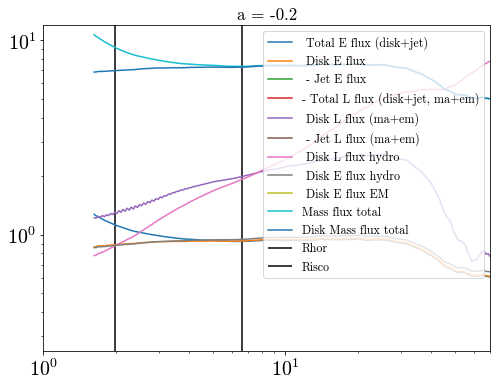

In [258]:
plt.figure(figsize=(8,6))
fs = 12

plt.title("a = -0.2", fontsize = fs+5)

plt.loglog(r[:,ny//2,0], fEtotEMMA_n02/fM_n02[iofr(10)], label=" Total E flux (disk+jet) ")
plt.loglog(r[:,ny//2,0], fEdiskEMMA_n02/fM_n02[iofr(10)], label=" Disk E flux ")
plt.loglog(r[:,ny//2,0], - fEtotEM_n02/fM_n02[iofr(10)], label=" - Jet E flux ")

plt.loglog(r[:,ny//2,0],-fLtotEMMA_n02 /fM_n02[iofr(10)] , label="- Total L flux (disk+jet, ma+em)")
plt.loglog(r[:,ny//2,0], fLdiskEMMA_n02 /fM_n02[iofr(10)] , label=" Disk L flux (ma+em)")
plt.loglog(r[:,ny//2,0], - fLjetEMMA_n02 /fM_n02[iofr(10)] , label=" - Jet L flux (ma+em)")

plt.loglog(r[:,ny//2,0], fLdiskMA_n02 / fM_n02[iofr(10)], label=" Disk L flux hydro")
plt.loglog(r[:,ny//2,0], fEdiskMA_n02 / fM_n02[iofr(10)], label=" Disk E flux hydro")
plt.loglog(r[:,ny//2,0], fEdiskEM_n02 / fM_n02[iofr(10)], label=" Disk E flux EM")

#plt.loglog(r[:,ny//2,0], fEdiskMA_02 / fM_02, label=" Disk L flux hydro")

plt.vlines(rhor, 10**-1, 10**1.5, label="Rhor")
plt.vlines(Risco(a), 10**-1, 10**1.5, label = "Risco")
#plt.loglog(r[:,ny//2,0], Mdot, label="current Mass flux")
plt.loglog(r[:,ny//2,0], fM_n02, label="Mass flux total")
plt.loglog(r[:,ny//2,0], fMdisk_n02, label="Disk Mass flux total")


#plt.loglog(r[:,ny//2,0], -fEM_02 /fM_02 , label="- EM flux")
#plt.loglog(r[:,ny//2,0], - powj_02 /fM_02 , label="- Jet power")


plt.ylim(10**-0.6,12)
plt.xlim(1e0,70)
#plt.loglog(r[:,ny//2,0],rho[:,ny//2,0]*10)
plt.legend(fontsize = fs, loc=1)

In [259]:
fLdiskMA = fLdiskMA_n02
fEdiskMA = fEdiskMA_n02
fMdisk = fMdisk_n02
fLtotMA = fLtotMA_n02
fEtotMA = fEtotMA_n02
fM = fM_n02
fEtotEM = fEtotEM_n02
fLtotEM = fLtotEM_n02
fEtotEMMA = fEtotEMMA_n02
fLtotEMMA = fLtotEMMA_n02
fLtot_cond = fLtot_cond_n02
fEtot_cond = fEtot_cond_n02

In [260]:
lkeplist[i] = lk(a,r[:,ny//2,0])[iofr(Risco(a))]

#def calc_fLfE_rg(fL, fE, fM, rhor, radE, radM):

# Hydro with disk condition, E at r=10rg
# Using disk mass flux, with disk conditon
lhydro_10rg[i], ehydro_10rg[i] = calc_fLfE_rg(fLdiskMA, fEdiskMA, fMdisk, rhor, 10, 10)
shydro_10rg[i] = s(a, lhydro_10rg[i], ehydro_10rg[i])
print("s_hydro at 10rg:  %.3f" % shydro_10rg[i])

# Hydro with disk condition, E at r=5rg
# Using disk mass flux, with disk conditon
lhydro_5rg[i], ehydro_5rg[i] = calc_fLfE_rg(fLdiskMA, fEdiskMA, fMdisk, rhor, 5, 5)
shydro_5rg[i] = s(a, lhydro_5rg[i], ehydro_5rg[i])
print("s_hydro at 5rg:   %.3f" % shydro_5rg[i])

# Hydro as total MA (without disk condition) E at r=10rg
lhydro_totMA_10rg[i], ehydro_totMA_10rg[i] = calc_fLfE_rg(fLtotMA, fEtotMA, fM, rhor, 10, 10)
shydro_totMA_10rg[i] = s(a, lhydro_totMA_10rg[i], ehydro_totMA_10rg[i])
print("s_MA at 10rg:     %.3f" % shydro_totMA_10rg[i])

# EM total, E flux taken at horizon
# Total mass flux at 5rg
lEM_5rg[i], eEM_5rg[i] = calc_fLfE_rg(fLtotEM, fEtotEM, fMdisk, rhor, rhor, 5)
sEM_5rg[i] = s(a, lEM_5rg[i], eEM_5rg[i])
print("s_EM, fM at 5rg: %.3f" % sEM_5rg[i])

# EM total, E flux taken at horizon
# Total mass flux at 10rg
lEM_10rg[i], eEM_10rg[i] = calc_fLfE_rg(fLtotEM, fEtotEM, fMdisk, rhor, rhor, 10)
sEM_10rg[i] = s(a, lEM_10rg[i], eEM_10rg[i])
print("s_EM, fM at 10rg: %.3f" % sEM_10rg[i])

# Total fluxes without disk condition
ltot_5rg[i], etot_5rg[i] = calc_fLfE_rg(fLtotEMMA, fEtotEMMA, fM, rhor, 5, 5)
stot_5rg[i] = s(a, ltot_5rg[i], etot_5rg[i])
print("s_tot at 5rg w/o condition:  %.3f" % stot_5rg[i])

# Total fluxes without disk condition
ltot_10rg[i], etot_10rg[i] = calc_fLfE_rg(fLtotEMMA, fEtotEMMA, fM, rhor, 10, 10)
stot_10rg[i] = s(a, ltot_10rg[i], etot_10rg[i])
print("s_tot at 10rg w/o condition:  %.3f" % stot_10rg[i])

# Total fluxes with disk condition with E at r=5rg
# fL = TudMA*(bsq/rho < 30) + TudEM
l_totcond_5rg[i], e_totcond_5rg[i] = calc_fLfE_rg(fLtot_cond, fEtot_cond, fMdisk, rhor, 5, 5)
s_totcond_5rg[i] = s(a, l_totcond_5rg[i], e_totcond_5rg[i])
print("s_tot at 5rg with condition:    %.3f" % s_totcond_5rg[i])

# Total fluxes with disk condition with E at r=5rg
# fL = TudMA*(bsq/rho < 30) + TudEM
l_totcond_10rg[i], e_totcond_10rg[i] = calc_fLfE_rg(fLtot_cond, fEtot_cond, fMdisk, rhor, 10, 10)
s_totcond_10rg[i] = s(a, l_totcond_10rg[i], e_totcond_10rg[i])
print("s_tot at 10rg with condition:    %.3f" % s_totcond_10rg[i])

OmegaH = a /(2*rhor)
print(OmegaH, 2*np.pi*omegaf2b[iofr(rhor), ny//3, 1])

#kn09 = 2*np.pi*omegaf2b[iofr(rhor), ny//3, 1]/OmegaH
#print(2*np.pi*omegaf2b[iofr(rhor), ny//3, 1]/OmegaH)
#print("k = ", kn09)

s_hydro at 10rg:  1.266
s_hydro at 5rg:   1.276
s_MA at 10rg:     1.195
s_EM, fM at 5rg: 2.338
s_EM, fM at 10rg: 2.299
s_tot at 5rg w/o condition:  3.471
s_tot at 10rg w/o condition:  3.478
s_tot at 5rg with condition:    3.607
s_tot at 10rg with condition:    3.554
-0.050510257216821904 0.0025565546736210686


C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12: RuntimeWarning: invalid value encountered in sqrt
  from matplotlib import rc


In [261]:
print(ehydro_10rg)

[0.         0.         0.97137868 0.97289968 0.97182029 0.95866555
 0.96271658 0.93042111 0.90551007]


In [262]:
ltest, etest = calc_fLfE_rg(fLtot_cond, fEtot_cond, fM, rhor, 10, 10)
stest = s(a, ltest, etest)
print("s_tot at 10rg with condition with fM:    %.3f" % stest)

s_tot at 10rg with condition with fM:    3.545


In [264]:
klist[i] = np.abs((2*np.pi*omegaf_n02/OmegaH).mean(-1))
klist[i]

0.20125272870063782

## a = -0.5

In [79]:
cd D:\BHspindown\maddat_backup\rtf2_15r36.21_a-0.5_0_0_0

D:\BHspindown\maddat_backup\rtf2_15r36.21_a-0.5_0_0_0


In [80]:
# This assumes gdump.bin is in /dumps
grid3d("gdump.bin")

Reading grid from dumps/gdump.bin ...  done!


In [81]:
print(nx,ny,nz)
print(Rin)
print(a)

288 128 32
1.5114806
-0.5


In [82]:
i=1
rhorlist[i]=rhor
OmegaH = a /(2*rhor)
OmegaHlist[i] = OmegaH

In [83]:
istart = 2000
iend = 3270 #goes up to 3267 for a=-0.5
istep = 10

In [84]:
umaxcount = 0
umincount = 0

for i in range(istart, iend, istep):
    #load vars this time step
    rfd("fieldline%04d.bin" % i)
    ud = (gv3[:,:]*uu[:,None]).sum(0)
    
    v1=uu
    v2=ud
    
    dot = v1[0]*v2[0] + v1[1]*v2[1] + v1[2]*v2[2] + v1[3]*v2[3]
    print(pshape(dot))
    if np.min(dot)<-1-1e-4:
        print("!!! ", np.min(dot))
        umincount+=1
    if np.max(dot)>-1+1e-4:
        print("!!! ", np.max(dot))
        umaxcount+=1

Opening fieldline2000.bin ...
rfdheader: t=10000
Found 30 header items, reading them in and setting EP3=THETAROT=0.0

Loading gdetB data...
No data on gdetF, setting it to None.
No data on Bstag, setting it to B.
No data on KAPPA and FLR
No data on luminosity (cooling off?)
(288, 128, 32)
None
Opening fieldline2010.bin ...
rfdheader: t=10050
Found 30 header items, reading them in and setting EP3=THETAROT=0.0

Loading gdetB data...
No data on gdetF, setting it to None.
No data on Bstag, setting it to B.
No data on KAPPA and FLR
No data on luminosity (cooling off?)
(288, 128, 32)
None
!!!  -0.9998965
Opening fieldline2020.bin ...
rfdheader: t=10100
Found 30 header items, reading them in and setting EP3=THETAROT=0.0

Loading gdetB data...
No data on gdetF, setting it to None.
No data on Bstag, setting it to B.
No data on KAPPA and FLR
No data on luminosity (cooling off?)
(288, 128, 32)
None
Opening fieldline2030.bin ...
rfdheader: t=10150
Found 30 header items, reading them in and setting

In [85]:
print(umaxcount,umincount)

6 3


In [269]:
rfd("fieldline2000.bin")

ud = (gv3[:,:]*uu[:,None]).sum(0)

#save in 1D radial slices in equitorial plane
rho1d = rho[:,ny//2,0]
ug1d = ug[:,ny//2,0]
dxdxp31d = dxdxp[3,3]
ud31d = ud[3][:,ny//2,0]
gdet1d = gdet[:,ny//2,0]
        
bu=np.empty_like(uu)              #allocate memory for bu
bu[0]=mdot(B[1:4], ud[1:4])             #B^i u_i
bu[1:4]=(B[1:4] + bu[0]*uu[1:4])/uu[0]  #b^i = (B^i + b^t u^i)/u^t
bd=mdot(gv3,bu)
bsq=mdot(bu,bd)
faraday()

pshape(rho)
pshape(uu)
pshape(ud)
dotproduct(uu,ud)

Opening fieldline2000.bin ...
rfdheader: t=10000
Found 30 header items, reading them in and setting EP3=THETAROT=0.0

Loading gdetB data...
No data on gdetF, setting it to None.
No data on Bstag, setting it to B.
No data on KAPPA and FLR
No data on luminosity (cooling off?)


C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12538: RuntimeWarning: invalid value encountered in true_divide
  omegaf1=fdd[0,1]/fdd[1,3] # = ftr/frp
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12539: RuntimeWarning: divide by zero encountered in true_divide
  omegaf2=fdd[0,2]/fdd[2,3] # = fth/fhp
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12539: RuntimeWarning: invalid value encountered in true_divide
  omegaf2=fdd[0,2]/fdd[2,3] # = fth/fhp
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12568: RuntimeWarning: divide by zero encountered in true_divide
  omegaf2b=np.fabs(v3nonhat) + np.sign(uu[1])*(vpol/Bpol)*np.fabs(B3nonhat)
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12568: RuntimeWarning: invalid value encountered in multiply
  omegaf2b=np.fabs(v3nonhat) + np.sign(uu[1])*(vpol/Bpol)*np.fabs(B3nonhat)


(288, 128, 32)
(4, 288, 128, 32)
(4, 288, 128, 32)
(288, 128, 32)
None
-1.0000477 -0.99995697


C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12570: RuntimeWarning: invalid value encountered in true_divide
  omegaf1b=v3nonhat - B3nonhat*(v1hat*B1hat+v2hat*B2hat)/(B1hat**2+B2hat**2)


In [270]:
data_1d = np.load("an05_avg1d_100221.npz")

rho_n05 = data_1d['rho_1d']
gdet_n05 = data_1d['gdet_1d']
thick_n05 = data_1d['thick_1d']
den1_n05 = data_1d['den1_1d']

omegaf_n05 = data_1d['omegaf_1d']

fM_n05 = data_1d['fM_1d']
fMdisk_n05 = data_1d['fMdisk_1d']

PhiBH_n05 = data_1d['PhiBH_1d']
PhiBHd_n05 = data_1d['PhiBHd_1d']
PhiBHj_n05 = data_1d['PhiBHj_1d']
PhiBHcheck_n05 = data_1d['PhiBHcheck_1d']
ud3avg_n05 = data_1d['ud3avg_1d']

ud3num_n05 = data_1d['ud3num_1d']

fEdiskMA_n05 = data_1d['fEdiskMA_1d']
fEdiskEM_n05 = data_1d['fEdiskEM_1d']
fEdiskEMMA_n05 = data_1d['fEdiskEMMA_1d']
fEdiskEMMAcheck_n05 = data_1d['fEdiskEMMA_check_1d']

fEjetEM_n05 = data_1d['fEjetEM_1d']

fEtotEMMA_n05 = data_1d['fEtotEMMA_1d']
fEtotEMMA_check_n05 = data_1d['fEtotEMMA_check_1d']
fEtotEM_n05 = data_1d['fEtotEM_1d']
fEtotEM_check_n05 = data_1d['fEtotEM_check_1d']
fEtotMA_n05 = data_1d['fEtotMA_1d']
fEtotMA_check_n05 = data_1d['fEtotMA_check_1d']

#-------------------------------------
fLdiskMA_n05 = data_1d['fLdiskMA_1d']
fLdiskEM_n05 = data_1d['fLdiskEM_1d']
fLdiskEMMA_n05 = data_1d['fLdiskEMMA_1d']
fLdiskEMMA_check_n05 = data_1d['fLdiskEMMA_check_1d']

fLjetEM_n05 = data_1d['fLjetEM_1d']
fLjetMA_n05 = data_1d['fLjetMA_1d']
fLjetEMMA_n05 = data_1d['fLjetEMMA_1d']
fLjetEMMA_check_n05 = data_1d['fLjetEMMA_check_1d']

fLtotMA_n05 = data_1d['fLtotMA_1d']
fLtotMA_check_n05 = data_1d['fLtotMA_check_1d']
fLtotEM_n05 = data_1d['fLtotEM_1d']
fLtotEM_check_n05 = data_1d['fLtotEM_check_1d']
fLtotEMMA_n05 = data_1d['fLtotEMMA_1d']
fLtotEMMA_check_n05 = data_1d['fLtotEMMA_check_1d']

fLtotEM_check_n05 = data_1d['fLtotEM_check_1d']
fLtotMA_check_n05 = data_1d['fLtotMA_check_1d']

fEtot_cond_n05 = data_1d['fEtot_cond_1d']
fLtot_cond_n05 = data_1d['fLtot_cond_1d']

data_1d.close()

Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.


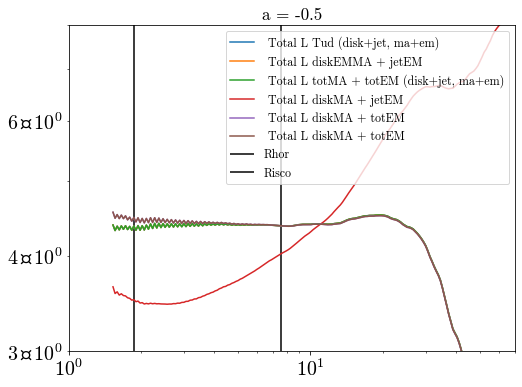

In [271]:
plt.figure(figsize=(8,6))
fs = 12

plt.title("a = -0.5", fontsize = fs+5)


#plt.loglog(r[:,ny//2,0], fLdiskEMMA_n05 /fM_n05[iofr(10)], label=" Disk L flux (ma+em)")
#plt.loglog(r[:,ny//2,0], - fLjetEMMA_n05 /fM_n05[iofr(10)] , label=" - Jet L flux (ma+em)")


plt.loglog(r[:,ny//2,0], fLtotEMMA_check_n05 /fM_n05[iofr(10)], label=" Total L Tud (disk+jet, ma+em)")
plt.loglog(r[:,ny//2,0], fLtotEMMA_n05 /fM_n05[iofr(10)], label=" Total L diskEMMA + jetEM")

plt.loglog(r[:,ny//2,0], (fLtotMA_check_n05 + fLtotEM_check_n05) /fM_n05[iofr(10)], label=" Total L totMA + totEM (disk+jet, ma+em)")

plt.loglog(r[:,ny//2,0], (fLdiskMA_n05 + fLjetEM_n05) /fM_n05[iofr(10)], label=" Total L diskMA + jetEM")
plt.loglog(r[:,ny//2,0], (fLdiskMA_n05 + fLtotEM_n05) /fM_n05[iofr(10)], label=" Total L diskMA + totEM")

plt.loglog(r[:,ny//2,0], (fLdiskMA_n05 + fLtotEM_n05) /fM_n05[iofr(10)], label=" Total L diskMA + totEM")



#plt.loglog(r[:,ny//2,0], fEdiskMA_02 / fM_02, label=" Disk L flux hydro")

plt.vlines(rhor, 10**-1, 10**1.5, label="Rhor")
plt.vlines(Risco(a), 10**-1, 10**1.5, label = "Risco")


#plt.loglog(r[:,ny//2,0], -fEM_02 /fM_02 , label="- EM flux")
#plt.loglog(r[:,ny//2,0], - powj_02 /fM_02 , label="- Jet power")


plt.ylim(3,8)
plt.xlim(1e0,70)
#plt.loglog(r[:,ny//2,0],rho[:,ny//2,0]*10)
plt.legend(fontsize = fs, loc=1)

Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.


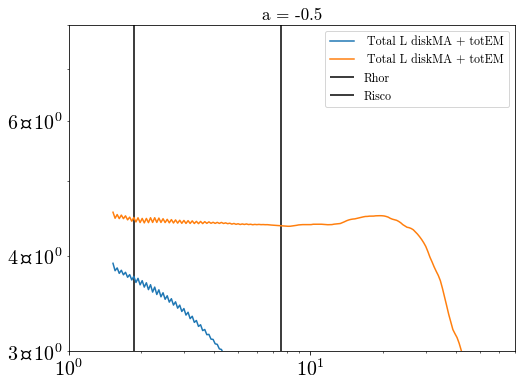

In [272]:
plt.figure(figsize=(8,6))
fs = 12

plt.title("a = -0.5", fontsize = fs+5)


#plt.loglog(r[:,ny//2,0], fLdiskEMMA_n05 /fM_n05[iofr(10)], label=" Disk L flux (ma+em)")
#plt.loglog(r[:,ny//2,0], - fLjetEMMA_n05 /fM_n05[iofr(10)] , label=" - Jet L flux (ma+em)")

plt.loglog(r[:,ny//2,0], (fLtotEM_n05) /fM_n05[iofr(10)], label=" Total L diskMA + totEM")
plt.loglog(r[:,ny//2,0], (fLdiskMA_n05 + fLtotEM_n05) /fM_n05[iofr(10)], label=" Total L diskMA + totEM")

#plt.loglog(r[:,ny//2,0], fEdiskMA_02 / fM_02, label=" Disk L flux hydro")

plt.vlines(rhor, 10**-1, 10**1.5, label="Rhor")
plt.vlines(Risco(a), 10**-1, 10**1.5, label = "Risco")


#plt.loglog(r[:,ny//2,0], -fEM_02 /fM_02 , label="- EM flux")
#plt.loglog(r[:,ny//2,0], - powj_02 /fM_02 , label="- Jet power")


plt.ylim(3,8)
plt.xlim(1e0,70)
#plt.loglog(r[:,ny//2,0],rho[:,ny//2,0]*10)
plt.legend(fontsize = fs, loc=1)

Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.


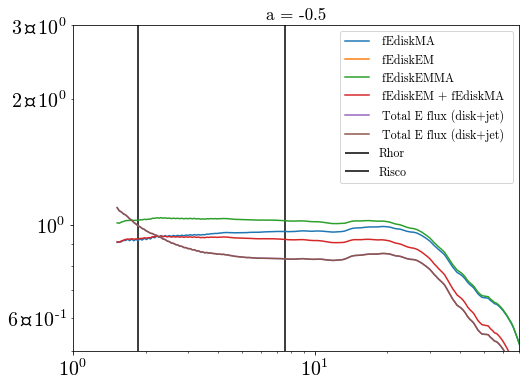

In [273]:
plt.figure(figsize=(8,6))
fs = 12

plt.title("a = -0.5", fontsize = fs+5)


#plt.loglog(r[:,ny//2,0], fLdiskEMMA_n05 /fM_n05[iofr(10)], label=" Disk L flux (ma+em)")
#plt.loglog(r[:,ny//2,0], - fLjetEMMA_n05 /fM_n05[iofr(10)] , label=" - Jet L flux (ma+em)")


plt.loglog(r[:,ny//2,0], fEdiskMA_n05 /fM_n05[iofr(10)], label=" fEdiskMA ")
plt.loglog(r[:,ny//2,0], fEdiskEM_n05 /fM_n05[iofr(10)], label=" fEdiskEM ")

plt.loglog(r[:,ny//2,0], fEdiskEMMA_n05 /fM_n05[iofr(10)]+0.1, label=" fEdiskEMMA")

plt.loglog(r[:,ny//2,0], (fEdiskEMMAcheck_n05) /fM_n05[iofr(10)], label=" fEdiskEM + fEdiskMA")

plt.loglog(r[:,ny//2,0], fEtotEMMA_n05/fM_n05[iofr(10)], label=" Total E flux (disk+jet) ")
plt.loglog(r[:,ny//2,0], fEtotEMMA_n05/fM_n05[iofr(10)], label=" Total E flux (disk+jet) ")


#plt.loglog(r[:,ny//2,0], (fLdiskMA_n05 + fLjetEM_n05) /fM_n05[iofr(10)], label=" Total L diskMA + jetEM (disk+jet, ma+em)")


#plt.loglog(r[:,ny//2,0], fEdiskMA_02 / fM_02, label=" Disk L flux hydro")

plt.vlines(rhor, 10**-1, 10**1.5, label="Rhor")
plt.vlines(Risco(a), 10**-1, 10**1.5, label = "Risco")


#plt.loglog(r[:,ny//2,0], -fEM_02 /fM_02 , label="- EM flux")
#plt.loglog(r[:,ny//2,0], - powj_02 /fM_02 , label="- Jet power")


plt.ylim(0.5,3)
plt.xlim(1e0,70)
#plt.loglog(r[:,ny//2,0],rho[:,ny//2,0]*10)
plt.legend(fontsize = fs, loc=1)

C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:11: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  #matplotlib.use('Agg')
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  from matplotlib import rc


NameError: name 'fEjetEMMA_n05' is not defined

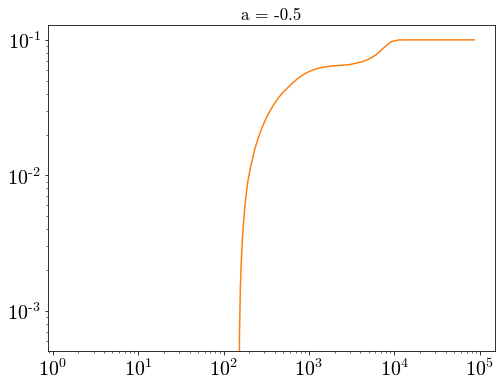

In [274]:
plt.figure(figsize=(8,6))
fs = 12

plt.title("a = -0.5", fontsize = fs+5)


#plt.loglog(r[:,ny//2,0], fLdiskEMMA_n05 /fM_n05[iofr(10)], label=" Disk L flux (ma+em)")
#plt.loglog(r[:,ny//2,0], - fLjetEMMA_n05 /fM_n05[iofr(10)] , label=" - Jet L flux (ma+em)")


plt.loglog(r[:,ny//2,0], fEjetEM_n05 /fM_n05[iofr(10)], label=" fEjet EM ")
plt.loglog(r[:,ny//2,0], fEtotEM_n05 /fM_n05[iofr(10)]+0.1, label=" fEtotEM")
plt.loglog(r[:,ny//2,0], fEjetEMMA_n05 /fM_n05[iofr(10)], label=" fEjet EMMA ")


#plt.loglog(r[:,ny//2,0], (fLdiskMA_n05 + fLjetEM_n05) /fM_n05[iofr(10)], label=" Total L diskMA + jetEM (disk+jet, ma+em)")


#plt.loglog(r[:,ny//2,0], fEdiskMA_02 / fM_02, label=" Disk L flux hydro")

plt.vlines(rhor, 10**-1, 10**1.5, label="Rhor")
plt.vlines(Risco(a), 10**-1, 10**1.5, label = "Risco")


#plt.loglog(r[:,ny//2,0], -fEM_02 /fM_02 , label="- EM flux")
#plt.loglog(r[:,ny//2,0], - powj_02 /fM_02 , label="- Jet power")


plt.ylim(0.8,1.2)
plt.xlim(1e0,70)
#plt.loglog(r[:,ny//2,0],rho[:,ny//2,0]*10)
plt.legend(fontsize = fs, loc=1)

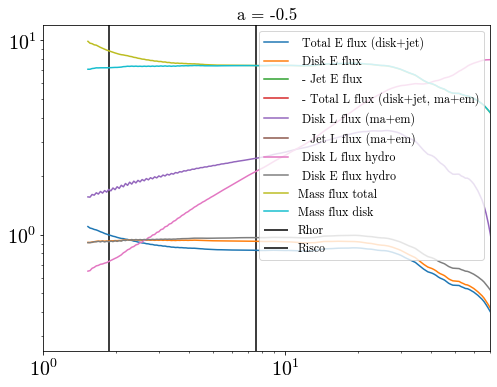

In [275]:
plt.figure(figsize=(8,6))
fs = 12

plt.title("a = -0.5", fontsize = fs+5)

plt.loglog(r[:,ny//2,0], fEtotEMMA_n05/fM_n05[iofr(10)], label=" Total E flux (disk+jet) ")
plt.loglog(r[:,ny//2,0], fEdiskEMMA_n05/fM_n05[iofr(10)], label=" Disk E flux ")
plt.loglog(r[:,ny//2,0], -fEtotEM_n05/fM_n05[iofr(10)], label=" - Jet E flux ")

plt.loglog(r[:,ny//2,0], -fLtotEMMA_n05 /fM_n05[iofr(10)], label=" - Total L flux (disk+jet, ma+em)")
plt.loglog(r[:,ny//2,0], fLdiskEMMA_n05 /fM_n05[iofr(10)], label=" Disk L flux (ma+em)")
plt.loglog(r[:,ny//2,0], - fLjetEMMA_n05 /fM_n05[iofr(10)] , label=" - Jet L flux (ma+em)")

plt.loglog(r[:,ny//2,0], fLdiskMA_n05 / fM_n05[iofr(10)], label=" Disk L flux hydro")
plt.loglog(r[:,ny//2,0], fEdiskMA_n05/ fM_n05[iofr(10)] , label=" Disk E flux hydro")

#plt.loglog(r[:,ny//2,0], fEdiskMA_02 / fM_02, label=" Disk L flux hydro")

plt.vlines(rhor, 10**-1, 10**1.5, label="Rhor")
plt.vlines(Risco(a), 10**-1, 10**1.5, label = "Risco")
#plt.loglog(r[:,ny//2,0], Mdot, label="current Mass flux")
plt.loglog(r[:,ny//2,0], fM_n05, label="Mass flux total")
plt.loglog(r[:,ny//2,0], fMdisk_n05, label="Mass flux disk")

#plt.loglog(r[:,ny//2,0], -fEM_02 /fM_02 , label="- EM flux")
#plt.loglog(r[:,ny//2,0], - powj_02 /fM_02 , label="- Jet power")


plt.ylim(10**-0.6,12)
plt.xlim(1e0,70)
#plt.loglog(r[:,ny//2,0],rho[:,ny//2,0]*10)
plt.legend(fontsize = fs, loc=1)

In [276]:
fLdiskMA = fLdiskMA_n05
fEdiskMA = fEdiskMA_n05
fMdisk = fMdisk_n05
fLtotMA = fLtotMA_n05
fEtotMA = fEtotMA_n05
fM = fM_n05
fEtotEM = fEtotEM_n05
fLtotEM = fLtotEM_n05
fEtotEMMA = fEtotEMMA_n05
fLtotEMMA = fLtotEMMA_n05
fLtot_cond = fLtot_cond_n05
fEtot_cond = fEtot_cond_n05

In [277]:
lkeplist[i] = lk(a,r[:,ny//2,0])[iofr(Risco(a))]

#def calc_fLfE_rg(fL, fE, fM, rhor, radE, radM):

# Hydro with disk condition, E at r=10rg
# Using disk mass flux, with disk conditon
lhydro_10rg[i], ehydro_10rg[i] = calc_fLfE_rg(fLdiskMA, fEdiskMA, fMdisk, rhor, 10, 10)
shydro_10rg[i] = s(a, lhydro_10rg[i], ehydro_10rg[i])
print("s_hydro at 10rg:  %.3f" % shydro_10rg[i])

# Hydro with disk condition, E at r=5rg
# Using disk mass flux, with disk conditon
lhydro_5rg[i], ehydro_5rg[i] = calc_fLfE_rg(fLdiskMA, fEdiskMA, fMdisk, rhor, 5, 5)
shydro_5rg[i] = s(a, lhydro_5rg[i], ehydro_5rg[i])
print("s_hydro at 5rg:   %.3f" % shydro_5rg[i])

# Hydro as total MA (without disk condition) E at r=10rg
lhydro_totMA_10rg[i], ehydro_totMA_10rg[i] = calc_fLfE_rg(fLtotMA, fEtotMA, fM, rhor, 10, 10)
shydro_totMA_10rg[i] = s(a, lhydro_totMA_10rg[i], ehydro_totMA_10rg[i])
print("s_MA at 10rg:     %.3f" % shydro_totMA_10rg[i])

# EM total, E flux taken at horizon
# Total mass flux at 5rg
lEM_5rg[i], eEM_5rg[i] = calc_fLfE_rg(fLtotEM, fEtotEM, fMdisk, rhor, rhor, 5)
sEM_5rg[i] = s(a, lEM_5rg[i], eEM_5rg[i])
print("s_EM, fM at 5rg: %.3f" % sEM_5rg[i])

# EM total, E flux taken at horizon
# Total mass flux at 10rg
lEM_10rg[i], eEM_10rg[i] = calc_fLfE_rg(fLtotEM, fEtotEM, fMdisk, rhor, rhor, 10)
sEM_10rg[i] = s(a, lEM_10rg[i], eEM_10rg[i])
print("s_EM, fM at 10rg: %.3f" % sEM_10rg[i])

# Total fluxes without disk condition
ltot_5rg[i], etot_5rg[i] = calc_fLfE_rg(fLtotEMMA, fEtotEMMA, fM, rhor, 5, 5)
stot_5rg[i] = s(a, ltot_5rg[i], etot_5rg[i])
print("s_tot at 5rg w/o condition:  %.3f" % stot_5rg[i])

# Total fluxes without disk condition
ltot_10rg[i], etot_10rg[i] = calc_fLfE_rg(fLtotEMMA, fEtotEMMA, fM, rhor, 10, 10)
stot_10rg[i] = s(a, ltot_10rg[i], etot_10rg[i])
print("s_tot at 10rg w/o condition:  %.3f" % stot_10rg[i])

# Total fluxes with disk condition with E at r=5rg
# fL = TudMA*(bsq/rho < 30) + TudEM
l_totcond_5rg[i], e_totcond_5rg[i] = calc_fLfE_rg(fLtot_cond, fEtot_cond, fMdisk, rhor, 5, 5)
s_totcond_5rg[i] = s(a, l_totcond_5rg[i], e_totcond_5rg[i])
print("s_tot at 5rg with condition:    %.3f" % s_totcond_5rg[i])

# Total fluxes with disk condition with E at r=5rg
# fL = TudMA*(bsq/rho < 30) + TudEM
l_totcond_10rg[i], e_totcond_10rg[i] = calc_fLfE_rg(fLtot_cond, fEtot_cond, fMdisk, rhor, 10, 10)
s_totcond_10rg[i] = s(a, l_totcond_10rg[i], e_totcond_10rg[i])
print("s_tot at 10rg with condition:    %.3f" % s_totcond_10rg[i])

OmegaH = a /(2*rhor)
print(OmegaH, 2*np.pi*omegaf2b[iofr(rhor), ny//3, 1])

#kn09 = 2*np.pi*omegaf2b[iofr(printrhor), ny//3, 1]/OmegaH
#print(2*np.pi*omegaf2b[iofr(rhor), ny//3, 1]/OmegaH)
#print("k = ", kn09)

s_hydro at 10rg:  1.692
s_hydro at 5rg:   1.692
s_MA at 10rg:     1.579
s_EM, fM at 5rg: 3.659
s_EM, fM at 10rg: 3.641
s_tot at 5rg w/o condition:  5.174
s_tot at 10rg w/o condition:  5.200
s_tot at 5rg with condition:    5.331
s_tot at 10rg with condition:    5.309
-0.13397459621556135 0.04082333172419875


C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12: RuntimeWarning: invalid value encountered in sqrt
  from matplotlib import rc


In [278]:
print(lEM_5rg, lEM_10rg)

[ 0.00000000e+00  3.77053428e+00  2.34279728e+00  1.19631574e-03
 -1.12141705e+00 -2.17912602e+00 -5.09028149e+00 -8.27861214e+00
 -9.02853012e+00] [ 0.00000000e+00  3.75233197e+00  2.30309010e+00  1.18697807e-03
 -1.10847092e+00 -2.21644187e+00 -4.94279718e+00 -8.37962055e+00
 -8.94281101e+00]


In [279]:
klist[i] = np.abs((2*np.pi*omegaf_n05/OmegaH).mean(-1))

## a = -0.9

In [86]:
cd D:\BHspindown\maddat_backup\rtf2_15r34_2pi_a-0.9gg50rbr1e3_0_0_0_faildufix2

D:\BHspindown\maddat_backup\rtf2_15r34_2pi_a-0.9gg50rbr1e3_0_0_0_faildufix2


In [87]:
# This assumes gdump.bin is in /dumps
grid3d("gdump.bin")

Reading grid from dumps/gdump.bin ...  done!


In [282]:
rfd("fieldline2000.bin")

ud = (gv3[:,:]*uu[:,None]).sum(0)

#save in 1D radial slices in equitorial plane
rho1d = rho[:,ny//2,0]
ug1d = ug[:,ny//2,0]
dxdxp31d = dxdxp[3,3]
ud31d = ud[3][:,ny//2,0]
gdet1d = gdet[:,ny//2,0]
        
bu=np.empty_like(uu)              #allocate memory for bu
bu[0]=mdot(B[1:4], ud[1:4])             #B^i u_i
bu[1:4]=(B[1:4] + bu[0]*uu[1:4])/uu[0]  #b^i = (B^i + b^t u^i)/u^t
bd=mdot(gv3,bu)
bsq=mdot(bu,bd)
faraday()

pshape(rho)
dotproduct(uu,ud)

Opening fieldline2000.bin ...
rfdheader: t=10000
Found 30 header items, reading them in and setting EP3=THETAROT=0.0

No data on gdetB, approximating it
Loading flux data...
No data on Bstag, setting it to B.
No data on KAPPA and FLR
No data on luminosity (cooling off?)
Read 20 variables, but file contains more (23 variables). Wrong format?


C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12538: RuntimeWarning: invalid value encountered in true_divide
  omegaf1=fdd[0,1]/fdd[1,3] # = ftr/frp
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12539: RuntimeWarning: invalid value encountered in true_divide
  omegaf2=fdd[0,2]/fdd[2,3] # = fth/fhp


(288, 128, 64)
(288, 128, 64)
None
-1.0000893 -0.9999404


C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12568: RuntimeWarning: divide by zero encountered in true_divide
  omegaf2b=np.fabs(v3nonhat) + np.sign(uu[1])*(vpol/Bpol)*np.fabs(B3nonhat)
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12568: RuntimeWarning: invalid value encountered in multiply
  omegaf2b=np.fabs(v3nonhat) + np.sign(uu[1])*(vpol/Bpol)*np.fabs(B3nonhat)
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12570: RuntimeWarning: invalid value encountered in true_divide
  omegaf1b=v3nonhat - B3nonhat*(v1hat*B1hat+v2hat*B2hat)/(B1hat**2+B2hat**2)


In [88]:
i = 0

In [89]:
rhorlist[i]=rhor
OmegaH = a /(2*rhor)
OmegaHlist[i] = OmegaH

In [90]:
istart = 2000
iend = 4020 #
istep = 10

In [93]:
umaxcount = 0
umincount = 0

for i in range(istart, iend, istep):
    #load vars this time step
    rfd("fieldline%04d.bin" % i)
    ud = (gv3[:,:]*uu[:,None]).sum(0)
    
    v1=uu
    v2=ud
    
    dot = v1[0]*v2[0] + v1[1]*v2[1] + v1[2]*v2[2] + v1[3]*v2[3]
    print(pshape(dot))
    if np.min(dot)<-1-1e-3:
        print("!!! ", np.min(dot))
        umincount+=1
    if np.max(dot)>-1+1e-3:
        print("!!! ", np.max(dot))
        umaxcount+=1

Opening fieldline2000.bin ...
rfdheader: t=10000
Found 30 header items, reading them in and setting EP3=THETAROT=0.0

No data on gdetB, approximating it
Loading flux data...
No data on Bstag, setting it to B.
No data on KAPPA and FLR
No data on luminosity (cooling off?)
Read 20 variables, but file contains more (23 variables). Wrong format?
(288, 128, 64)
None
Opening fieldline2010.bin ...
rfdheader: t=10050
Found 30 header items, reading them in and setting EP3=THETAROT=0.0

No data on gdetB, approximating it
Loading flux data...
No data on Bstag, setting it to B.
No data on KAPPA and FLR
No data on luminosity (cooling off?)
Read 20 variables, but file contains more (23 variables). Wrong format?
(288, 128, 64)
None
Opening fieldline2020.bin ...
rfdheader: t=10100
Found 30 header items, reading them in and setting EP3=THETAROT=0.0

No data on gdetB, approximating it
Loading flux data...
No data on Bstag, setting it to B.
No data on KAPPA and FLR
No data on luminosity (cooling off?)
Rea

In [94]:
print(umaxcount,umincount)

0 0


In [285]:
rfd("fieldline2000.bin")

ud = (gv3[:,:]*uu[:,None]).sum(0)

#save in 1D radial slices in equitorial plane
rho1d = rho[:,ny//2,0]
ug1d = ug[:,ny//2,0]
dxdxp31d = dxdxp[3,3]
ud31d = ud[3][:,ny//2,0]
gdet1d = gdet[:,ny//2,0]
        
bu=np.empty_like(uu)              #allocate memory for bu
bu[0]=mdot(B[1:4], ud[1:4])             #B^i u_i
bu[1:4]=(B[1:4] + bu[0]*uu[1:4])/uu[0]  #b^i = (B^i + b^t u^i)/u^t
bd=mdot(gv3,bu)
bsq=mdot(bu,bd)
faraday()

pshape(rho)

Opening fieldline2000.bin ...
rfdheader: t=10000
Found 30 header items, reading them in and setting EP3=THETAROT=0.0

No data on gdetB, approximating it
Loading flux data...
No data on Bstag, setting it to B.
No data on KAPPA and FLR
No data on luminosity (cooling off?)
Read 20 variables, but file contains more (23 variables). Wrong format?


C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12538: RuntimeWarning: invalid value encountered in true_divide
  omegaf1=fdd[0,1]/fdd[1,3] # = ftr/frp
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12539: RuntimeWarning: invalid value encountered in true_divide
  omegaf2=fdd[0,2]/fdd[2,3] # = fth/fhp


(288, 128, 64)


C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12568: RuntimeWarning: divide by zero encountered in true_divide
  omegaf2b=np.fabs(v3nonhat) + np.sign(uu[1])*(vpol/Bpol)*np.fabs(B3nonhat)
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12568: RuntimeWarning: invalid value encountered in multiply
  omegaf2b=np.fabs(v3nonhat) + np.sign(uu[1])*(vpol/Bpol)*np.fabs(B3nonhat)
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12570: RuntimeWarning: invalid value encountered in true_divide
  omegaf1b=v3nonhat - B3nonhat*(v1hat*B1hat+v2hat*B2hat)/(B1hat**2+B2hat**2)


In [286]:
data_1d = np.load("an09_avg1d_100221.npz")

rho_n09 = data_1d['rho_1d']
gdet_n09 = data_1d['gdet_1d']
thick_n09 = data_1d['thick_1d']
den1_n09 = data_1d['den1_1d']

omegaf_n09 = data_1d['omegaf_1d']

fM_n09 = data_1d['fM_1d']
fMdisk_n09 = data_1d['fMdisk_1d']

PhiBH_n09 = data_1d['PhiBH_1d']
PhiBHd_n09 = data_1d['PhiBHd_1d']
PhiBHj_n09 = data_1d['PhiBHj_1d']
PhiBHcheck_n09 = data_1d['PhiBHcheck_1d']
ud3avg_n09 = data_1d['ud3avg_1d']

ud3num_n09 = data_1d['ud3num_1d']

fEdiskMA_n09 = data_1d['fEdiskMA_1d']
fEdiskEM_n09 = data_1d['fEdiskEM_1d']
fEdiskEMMA_n09 = data_1d['fEdiskEMMA_1d']
fEdiskEMMAcheck_n09 = data_1d['fEdiskEMMA_check_1d']

fEjetEM_n09 = data_1d['fEjetEM_1d']

fEtotEMMA_n09 = data_1d['fEtotEMMA_1d']
fEtotEMMA_check_n09 = data_1d['fEtotEMMA_check_1d']
fEtotEM_n09 = data_1d['fEtotEM_1d']
fEtotEM_check_n09 = data_1d['fEtotEM_check_1d']
fEtotMA_n09 = data_1d['fEtotMA_1d']
fEtotMA_check_n09 = data_1d['fEtotMA_check_1d']

#-------------------------------------
fLdiskMA_n09 = data_1d['fLdiskMA_1d']
fLdiskEM_n09 = data_1d['fLdiskEM_1d']
fLdiskEMMA_n09 = data_1d['fLdiskEMMA_1d']
fLdiskEMMA_check_n09 = data_1d['fLdiskEMMA_check_1d']

fLjetEM_n09 = data_1d['fLjetEM_1d']
fLjetMA_n09 = data_1d['fLjetMA_1d']
fLjetEMMA_n09 = data_1d['fLjetEMMA_1d']
fLjetEMMA_check_n09 = data_1d['fLjetEMMA_check_1d']

fLtotMA_n09 = data_1d['fLtotMA_1d']
fLtotMA_check_n09 = data_1d['fLtotMA_check_1d']
fLtotEM_n09 = data_1d['fLtotEM_1d']
fLtotEM_check_n09 = data_1d['fLtotEM_check_1d']
fLtotEMMA_n09 = data_1d['fLtotEMMA_1d']
fLtotEMMA_check_n09 = data_1d['fLtotEMMA_check_1d']

fLtotEM_check_n09 = data_1d['fLtotEM_check_1d']
fLtotMA_check_n09 = data_1d['fLtotMA_check_1d']

fEtot_cond_n09 = data_1d['fEtot_cond_1d']
fLtot_cond_n09 = data_1d['fLtot_cond_1d']

data_1d.close()

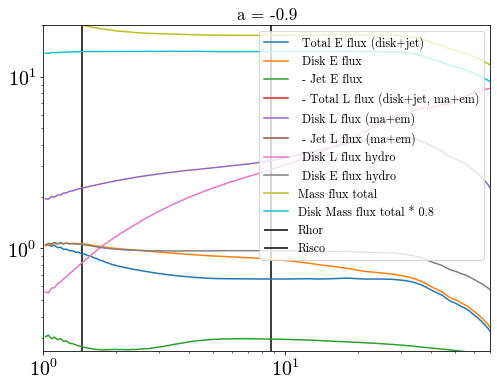

In [287]:
plt.figure(figsize=(8,6))
fs = 12

plt.title("a = -0.9", fontsize = fs+5)

plt.loglog(r[:,ny//2,0], fEtotEMMA_n09/fM_n09[iofr(10)], label=" Total E flux (disk+jet) ")
plt.loglog(r[:,ny//2,0], fEdiskEMMA_n09/fM_n09[iofr(10)], label=" Disk E flux ")
plt.loglog(r[:,ny//2,0], - fEtotEM_n09/fM_n09[iofr(10)], label=" - Jet E flux ")

plt.loglog(r[:,ny//2,0], -fLtotEMMA_n09 /fM_n09[iofr(10)], label=" - Total L flux (disk+jet, ma+em)")
plt.loglog(r[:,ny//2,0], fLdiskEMMA_n09 /fM_n09[iofr(10)], label=" Disk L flux (ma+em)")
plt.loglog(r[:,ny//2,0], - fLjetEMMA_n09 /fM_n09[iofr(10)] , label=" - Jet L flux (ma+em)")

plt.loglog(r[:,ny//2,0], fLdiskMA_n09 / fM_n09[iofr(10)], label=" Disk L flux hydro")
plt.loglog(r[:,ny//2,0], fEdiskMA_n09 / fM_n09[iofr(10)], label=" Disk E flux hydro")

#plt.loglog(r[:,ny//2,0], fEdiskMA_02 / fM_02, label=" Disk L flux hydro")

plt.vlines(rhor, 10**-1, 10**1.5, label="Rhor")
plt.vlines(Risco(a), 10**-1, 10**1.5, label = "Risco")
#plt.loglog(r[:,ny//2,0], Mdot, label="current Mass flux")
plt.loglog(r[:,ny//2,0], fM_n09, label="Mass flux total")
plt.loglog(r[:,ny//2,0], fMdisk_n09*0.8, label="Disk Mass flux total * 0.8")

#plt.loglog(r[:,ny//2,0], -fEM_02 /fM_02 , label="- EM flux")
#plt.loglog(r[:,ny//2,0], - powj_02 /fM_02 , label="- Jet power")


plt.ylim(10**-0.6,20)
plt.xlim(1e0,70)
#plt.loglog(r[:,ny//2,0],rho[:,ny//2,0]*10)
plt.legend(fontsize = fs, loc=1)

In [288]:
fLdiskMA = fLdiskMA_n09
fEdiskMA = fEdiskMA_n09
fMdisk = fMdisk_n09
fLtotMA = fLtotMA_n09
fEtotMA = fEtotMA_n09
fM = fM_n09
fEtotEM = fEtotEM_n09
fLtotEM = fLtotEM_n09
fEtotEMMA = fEtotEMMA_n09
fLtotEMMA = fLtotEMMA_n09
fLtot_cond = fLtot_cond_n09
fEtot_cond = fEtot_cond_n09

In [289]:
lkeplist[i] = lk(a,r[:,ny//2,0])[iofr(Risco(a))]

#def calc_fLfE_rg(fL, fE, fM, rhor, radE, radM):

# Hydro with disk condition, E at r=10rg
# Using disk mass flux, with disk conditon
lhydro_10rg[i], ehydro_10rg[i] = calc_fLfE_rg(fLdiskMA, fEdiskMA, fMdisk, rhor, 10, 10)
shydro_10rg[i] = s(a, lhydro_10rg[i], ehydro_10rg[i])
print("s_hydro at 10rg:  %.3f" % shydro_10rg[i])

# Hydro with disk condition, E at r=5rg
# Using disk mass flux, with disk conditon
lhydro_5rg[i], ehydro_5rg[i] = calc_fLfE_rg(fLdiskMA, fEdiskMA, fMdisk, rhor, 5, 5)
shydro_5rg[i] = s(a, lhydro_5rg[i], ehydro_5rg[i])
print("s_hydro at 5rg:   %.3f" % shydro_5rg[i])

# Hydro as total MA (without disk condition) E at r=10rg
lhydro_totMA_10rg[i], ehydro_totMA_10rg[i] = calc_fLfE_rg(fLtotMA, fEtotMA, fM, rhor, 10, 10)
shydro_totMA_10rg[i] = s(a, lhydro_totMA_10rg[i], ehydro_totMA_10rg[i])
print("s_MA at 10rg:     %.3f" % shydro_totMA_10rg[i])

# EM total, E flux taken at horizon
# Total mass flux at 5rg
lEM_5rg[i], eEM_5rg[i] = calc_fLfE_rg(fLtotEM, fEtotEM, fMdisk, rhor, rhor, 5)
sEM_5rg[i] = s(a, lEM_5rg[i], eEM_5rg[i])
print("s_EM, fM at 5rg: %.3f" % sEM_5rg[i])

# EM total, E flux taken at horizon
# Total mass flux at 10rg
lEM_10rg[i], eEM_10rg[i] = calc_fLfE_rg(fLtotEM, fEtotEM, fMdisk, rhor, rhor, 10)
sEM_10rg[i] = s(a, lEM_10rg[i], eEM_10rg[i])
print("s_EM, fM at 10rg: %.3f" % sEM_10rg[i])

# Total fluxes without disk condition
ltot_5rg[i], etot_5rg[i] = calc_fLfE_rg(fLtotEMMA, fEtotEMMA, fM, rhor, 5, 5)
stot_5rg[i] = s(a, ltot_5rg[i], etot_5rg[i])
print("s_tot at 5rg w/o condition:  %.3f" % stot_5rg[i])

# Total fluxes without disk condition
ltot_10rg[i], etot_10rg[i] = calc_fLfE_rg(fLtotEMMA, fEtotEMMA, fM, rhor, 10, 10)
stot_10rg[i] = s(a, ltot_10rg[i], etot_10rg[i])
print("s_tot at 10rg w/o condition:  %.3f" % stot_10rg[i])

# Total fluxes with disk condition with E at r=5rg
# fL = TudMA*(bsq/rho < 30) + TudEM
l_totcond_5rg[i], e_totcond_5rg[i] = calc_fLfE_rg(fLtot_cond, fEtot_cond, fMdisk, rhor, 5, 5)
s_totcond_5rg[i] = s(a, l_totcond_5rg[i], e_totcond_5rg[i])
print("s_tot at 5rg with condition:    %.3f" % s_totcond_5rg[i])

# Total fluxes with disk condition with E at r=5rg
# fL = TudMA*(bsq/rho < 30) + TudEM
l_totcond_10rg[i], e_totcond_10rg[i] = calc_fLfE_rg(fLtot_cond, fEtot_cond, fMdisk, rhor, 10, 10)
s_totcond_10rg[i] = s(a, l_totcond_10rg[i], e_totcond_10rg[i])
print("s_tot at 10rg with condition:    %.3f" % s_totcond_10rg[i])

OmegaH = a /(2*rhor)
print(OmegaH, 2*np.pi*omegaf2b[iofr(rhor), ny//3, 1])

#kn09 = 2*np.pi*omegaf2b[iofr(rhor), ny//3, 1]/OmegaH
#print(2*np.pi*omegaf2b[iofr(rhor), ny//3, 1]/OmegaH)
#print("k = ", kn09)

s_hydro at 10rg:  2.542
s_hydro at 5rg:   2.544
s_MA at 10rg:     2.427
s_EM, fM at 5rg: 3.479
s_EM, fM at 10rg: 3.480
s_tot at 5rg w/o condition:  5.871
s_tot at 10rg w/o condition:  5.875
s_tot at 5rg with condition:    5.975
s_tot at 10rg with condition:    5.974
-0.3133945031366293 0.11842794666790876


C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12: RuntimeWarning: invalid value encountered in sqrt
  from matplotlib import rc


In [290]:
ehydro_10rg

array([0.9602536 , 0.96568102, 0.97137868, 0.97289968, 0.97182029,
       0.95866555, 0.96271658, 0.93042111, 0.90551007])

In [291]:
klist[i] = np.abs((2*np.pi*omegaf_n09/OmegaH).mean(-1))
klist[i]

0.2262481153011322

In [292]:
shydro_10rg

array([ 2.54214803,  1.69239563,  1.26562065,  1.02177441,  0.60757835,
        0.61547437,  0.17692292, -0.86434029, -1.23558034])

In [296]:
fMr10 = np.array([fM_n09[iofr(10)],fM_n05[iofr(10)],fM_n02[iofr(10)],fM_00[iofr(10)],fM_01[iofr(10)],fM_02[iofr(10)],fM_05[iofr(10)],fM_09[iofr(10)],fM_99[iofr(10)]])
fMdiskr10 = np.array([fMdisk_n09[iofr(10)],fMdisk_n05[iofr(10)],fMdisk_n02[iofr(10)],fMdisk_00[iofr(10)],fMdisk_01[iofr(10)],fMdisk_02[iofr(10)],fMdisk_05[iofr(10)],fMdisk_09[iofr(10)],fMdisk_99[iofr(10)]])
fMdiskr5 = np.array([fMdisk_n09[iofr(5)],fMdisk_n05[iofr(5)],fMdisk_n02[iofr(5)],fMdisk_00[iofr(5)],fMdisk_01[iofr(5)],fMdisk_02[iofr(5)],fMdisk_02[iofr(5)],fMdisk_09[iofr(5)],fMdisk_99[iofr(5)]])

In [297]:
cd C:/Users/Beverly/Documents/BHspindown

C:\Users\Beverly\Documents\BHspindown


In [298]:
import pandas as pd

df = pd.DataFrame({"shydro_10rg" : shydro_10rg, "lhydro_10rg" : lhydro_10rg, "ehydro_10rg" : ehydro_10rg, \
                   "shydro_totMA_10rg" : shydro_totMA_10rg, "lhydro_totMA_10rg":lhydro_totMA_10rg,"ehydro_totMA_10rg":ehydro_totMA_10rg,\
                   "shydro_5rg" : shydro_5rg, "lhydro_5rg" : lhydro_5rg, "ehydro_5rg" : ehydro_5rg, \
                   "sEM_10rg" : sEM_10rg, "lEM_10rg" : lEM_10rg, "eEM_10rg" : eEM_10rg, \
                   "sEM_5rg" : sEM_5rg, "lEM_5rg" : lEM_5rg, "eEM_5rg" : eEM_5rg, \
                   "stot_10rg" : stot_10rg, "ltot_10rg" : ltot_10rg, "etot_10rg" : etot_10rg, \
                   "stot_5rg" : stot_5rg, "ltot_5rg" : ltot_5rg, "etot_5rg" : etot_5rg, \
                   "s_totcond_5rg" : s_totcond_5rg, "l_totcond_5rg" : l_totcond_5rg, "e_totcond_5rg" : e_totcond_5rg, \
                   "s_totcond_10rg" : s_totcond_10rg, "l_totcond_10rg" : l_totcond_10rg, "e_totcond_10rg" : e_totcond_10rg, \
                   "klist" : klist, "fMr10" : fMr10, "fMdiskr10" : fMdiskr10, "fMdiskr5" : fMdiskr5, "lkeplist" : lkeplist, \
                   "alist" : alist, "OmegaHlist" :OmegaHlist, "rhorlist" : rhorlist})
df.to_csv("s_vals_110321.csv", index=False)

In [299]:
print(s_totcond_5rg)
print(shydro_10rg)
print(shydro_5rg)
print(shydro_totMA_10rg)

[ 5.97510388  5.33069944  3.60745108  1.03100872 -0.49923916 -1.55974329
 -4.61603945 -7.46776888 -7.39288858]
[ 2.54214803  1.69239563  1.26562065  1.02177441  0.60757835  0.61547437
  0.17692292 -0.86434029 -1.23558034]
[ 2.5437301   1.69229078  1.27612865  1.02981246  0.6192181   0.60288911
  0.22858351 -0.90364112 -1.26472355]
[ 2.42654243  1.57901436  1.19525223  1.01971149  0.63704138  0.68686457
  0.36882436 -0.46989712 -0.9340493 ]


In [105]:
(fEtotEMMA_09 / fM_09)[iofr(10)]

-0.04170079

In [106]:
cd C:\Users\Beverly\Documents\BHspindown

C:\Users\Beverly\Documents\BHspindown


In [107]:
stotal = [sn09,sn05,sn02,s00,s01,s02,s09,s99]
print(stotal)

[5.900415256674009, 5.313203692436218, 3.546408897251368, 1.0207879543304443, -0.4953246562120439, -1.5751258188605188, -7.605478183180094, -7.2933639264106755]


In [108]:
kn00 = 0

shydro = np.array([shydro_n09,shydro_n05,shydro_n02,shydro_00,shydro_01,shydro_02,shydro_09,shydro_99])
fLhydro = np.array([fLhydro_n09,fLhydro_n05,fLhydro_n02,fLhydro_00,fLhydro_01,fLhydro_02,fLhydro_09,fLhydro_99])
fEhydro = np.array([fEhydro_n09,fEhydro_n05,fEhydro_n02,fEhydro_00,fEhydro_01,fEhydro_02,fEhydro_09,fEhydro_99])

sdattotal = np.array([sn09,sn05,sn02,s00,s01,s02,s09,s99])
fLtot = np.array([fL_n09,fL_n05,fL_n02,fL_00,fL_01,fL_02,fL_09,fL_99])
fEtot = np.array([fE_n09,fE_n05,fE_n02,fE_00,fE_01,fE_02,fE_09,fE_99])


k = np.array([kn09,kn05,kn02,kn00,k01,k02,k09,k99])

fMr10 = np.array([fM_n09[iofr(10)],fM_n05[iofr(10)],fM_n02[iofr(10)],fM_00[iofr(10)],fM_01[iofr(10)],fM_02[iofr(10)],fM_09[iofr(10)],fM_99[iofr(10)]])
fLjetEMrhor = np.array([-fLjetEM_n09[iofr(rhor_n09)],-fLjetEM_n05[iofr(rhor_n05)],-fLjetEM_n02[iofr(rhor_n02)],-fLjetEM_00[iofr(rhor_00)],-fLjetEM_01[iofr(rhor_01)],-fLjetEM_02[iofr(rhor_02)],-fLjetEM_09[iofr(rhor_09)],-fLjetEM_99[iofr(rhor_99)]])/fMr10
fjetEMrhor = np.array([-fEM_n09[iofr(rhor_n09)],- fEM_n05[iofr(rhor_n05)],- fEM_n02[iofr(rhor_n02)],- fEM_00[iofr(rhor_00)],-fEM_01[iofr(rhor_01)],- fEM_02[iofr(rhor_02)],- fEM_09[iofr(rhor_09)],- fEM_99[iofr(rhor_99)]])/fMr10

alist = np.array([-0.9,-0.5,-0.2,0.0,0.1,0.2,0.9,0.99])
rhorlist = np.array([rhor_n09,rhor_n05,rhor_n02,rhor_00,rhor_01,rhor_02,rhor_09,rhor_99])
OmegaHlist = np.array([OmegaH_n09,OmegaH_n05, OmegaH_n02,OmegaH_00,OmegaH_01,OmegaH_02,OmegaH_09,OmegaH_99] )

headers = ['shydro','fLhydro','fEhydro','s_dat_total','k','fMr10','fLjetEM','fjetEM','alist','OmegaHlist']

In [23]:
ti

array([[[[  0.,   0.,   0., ...,   0.,   0.,   0.],
         [  0.,   0.,   0., ...,   0.,   0.,   0.],
         [  0.,   0.,   0., ...,   0.,   0.,   0.],
         ...,
         [  0.,   0.,   0., ...,   0.,   0.,   0.],
         [  0.,   0.,   0., ...,   0.,   0.,   0.],
         [  0.,   0.,   0., ...,   0.,   0.,   0.]],

        [[  1.,   1.,   1., ...,   1.,   1.,   1.],
         [  1.,   1.,   1., ...,   1.,   1.,   1.],
         [  1.,   1.,   1., ...,   1.,   1.,   1.],
         ...,
         [  1.,   1.,   1., ...,   1.,   1.,   1.],
         [  1.,   1.,   1., ...,   1.,   1.,   1.],
         [  1.,   1.,   1., ...,   1.,   1.,   1.]],

        [[  2.,   2.,   2., ...,   2.,   2.,   2.],
         [  2.,   2.,   2., ...,   2.,   2.,   2.],
         [  2.,   2.,   2., ...,   2.,   2.,   2.],
         ...,
         [  2.,   2.,   2., ...,   2.,   2.,   2.],
         [  2.,   2.,   2., ...,   2.,   2.,   2.],
         [  2.,   2.,   2., ...,   2.,   2.,   2.]],

        ...,

  

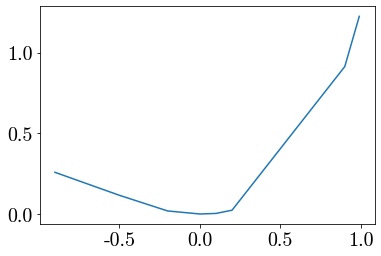

In [110]:
plt.plot(alist,fjetEMrhor)

C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:5: RuntimeWarning: divide by zero encountered in true_divide
  sys.path.append(os.path.join('~/Documents/BHspindown/py'))


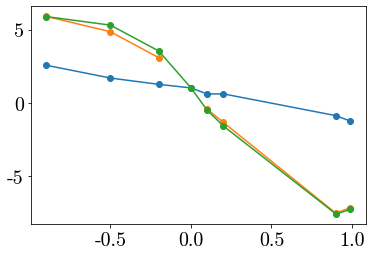

In [111]:
shydro_model = []
shydro_model = fLhydro-2*alist*fEhydro

stot_model = []
stot_model = fLhydro-2*alist*fEhydro - fjetEMrhor*(1/(np.abs(k)*OmegaHlist) - 2*alist)

plt.plot(alist,shydro_model,"-o")
plt.plot(alist,stot_model,"-o")
plt.plot(alist,sdattotal,"-o")

In [112]:
import pandas as pd

df = pd.DataFrame({"shydro" : shydro, "fLhydro" : fLhydro, "fEhydro" : fEhydro, "sdattotal" : sdattotal, "fLtot":fLtot,"fEtot":fEtot, "klist" : k, "fMr10" : fMr10, "fLjetEMrhor" : fLjetEMrhor, "fjetEMrhor" : fjetEMrhor, "alist" : alist,"OmegaHlist" :OmegaHlist, "rhorlist" : rhorlist})
df.to_csv("s_vals_090921.csv", index=False)

In [113]:
import pandas as pd

df = pd.DataFrame({"shydro" : shydro, "fLhydro" : fLhydro, "fEhydro" : fEhydro, "sdattotal" : sdattotal, "fLtot":fLtot,"fEtot":fEtot, "k" : k, "fMr10" : fMr10, "fLjetEMrhor" : fLjetEMrhor, "fjetEMrhor" : fjetEMrhor, "alist" : alist,"OmegaHlist" :OmegaHlist, "rhorlist" : rhorlist})
df.to_csv("s_vals_090321_v4.csv", index=False)

Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 

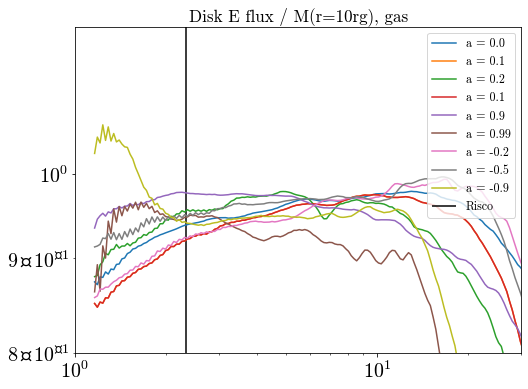

In [156]:
plt.figure(figsize=(8,6))
fs = 12

plt.title("Disk E flux / M(r=10rg), gas", fontsize = fs+5)

plt.loglog(r[:,ny//2,0], fEdiskMA_00/fM_00[iofr(10)], label="a = 0.0")
plt.loglog(r[:,ny//2,0], fEdiskMA_01/fM_01[iofr(10)], label="a = 0.1")
plt.loglog(r[:,ny//2,0], fEdiskMA_02/fM_02[iofr(10)], label="a = 0.2")
plt.loglog(r[:,ny//2,0], fEdiskMA_01/fM_01[iofr(10)], label="a = 0.1")
plt.loglog(r[:,ny//2,0], fEdiskMA_09/fM_09[iofr(10)], label="a = 0.9")
plt.loglog(r[:,ny//2,0], fEdiskMA_99/fM_99[iofr(10)], label="a = 0.99")
plt.loglog(r[:,ny//2,0], fEdiskMA_n02/fM_n02[iofr(10)], label="a = -0.2")
plt.loglog(r[:,ny//2,0], fEdiskMA_n05/fM_n05[iofr(10)], label="a = -0.5")
plt.loglog(r[:,ny//2,0], fEdiskMA_n09/fM_n09[iofr(10)], label="a = -0.9")

#plt.loglog(r[:,ny//2,0], fEdiskMA_02 / fM_02, label=" Disk L flux hydro")
plt.vlines(Risco(a), 10**-1, 10**1.5, label = "Risco")
#plt.loglog(r[:,ny//2,0], Mdot, label="current Mass flux")
#plt.loglog(r[:,ny//2,0], fM_02, label="Mass flux total")
#plt.loglog(r[:,ny//2,0], fMdisk_02*0.8, label="Disk Mass flux total")
#plt.loglog(r[:,ny//2,0], fEdiskMA_02, label="Disk E")


#plt.loglog(r[:,ny//2,0], -fEM_02 /fM_02 , label="- EM flux")
#plt.loglog(r[:,ny//2,0], - powj_02 /fM_02 , label="- Jet power")


plt.ylim(0.8,1.2)
plt.xlim(1e0,30)
#plt.loglog(r[:,ny//2,0],rho[:,ny//2,0]*10)
plt.legend(fontsize = fs, loc=1)

Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 

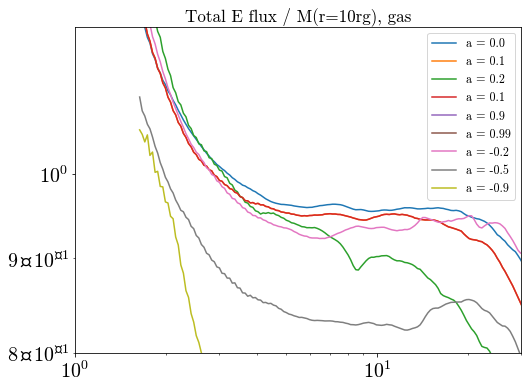

In [240]:
plt.figure(figsize=(8,6))
fs = 12

plt.title("Total E flux / M(r=10rg), gas", fontsize = fs+5)

plt.loglog(r[:,ny//2,0], fEtotEMMA_00/fM_00[iofr(10)], label="a = 0.0")
plt.loglog(r[:,ny//2,0], fEtotEMMA_01/fM_01[iofr(10)], label="a = 0.1")
plt.loglog(r[:,ny//2,0], fEtotEMMA_02/fM_02[iofr(10)], label="a = 0.2")
plt.loglog(r[:,ny//2,0], fEtotEMMA_01/fM_01[iofr(10)], label="a = 0.1")
plt.loglog(r[:,ny//2,0], fEtotEMMA_09/fM_09[iofr(10)], label="a = 0.9")
plt.loglog(r[:,ny//2,0], fEtotEMMA_99/fM_99[iofr(10)], label="a = 0.99")
plt.loglog(r[:,ny//2,0], fEtotEMMA_n02/fM_n02[iofr(10)], label="a = -0.2")
plt.loglog(r[:,ny//2,0], fEtotEMMA_n05/fM_n05[iofr(10)], label="a = -0.5")
plt.loglog(r[:,ny//2,0], fEtotEMMA_n09/fM_n09[iofr(10)], label="a = -0.9")

#plt.loglog(r[:,ny//2,0], fEdiskMA_02 / fM_02, label=" Disk L flux hydro")
#plt.vlines(Risco(a), 10**-1, 10**1.5, label = "Risco")

#plt.loglog(r[:,ny//2,0], Mdot, label="current Mass flux")
#plt.loglog(r[:,ny//2,0], fM_02, label="Mass flux total")
#plt.loglog(r[:,ny//2,0], fMdisk_02*0.8, label="Disk Mass flux total")
#plt.loglog(r[:,ny//2,0], fEdiskMA_02, label="Disk E")


#plt.loglog(r[:,ny//2,0], -fEM_02 /fM_02 , label="- EM flux")
#plt.loglog(r[:,ny//2,0], - powj_02 /fM_02 , label="- Jet power")


plt.ylim(0.8,1.2)
plt.xlim(1e0,30)
#plt.loglog(r[:,ny//2,0],rho[:,ny//2,0]*10)
plt.legend(fontsize = fs, loc=1)

Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 

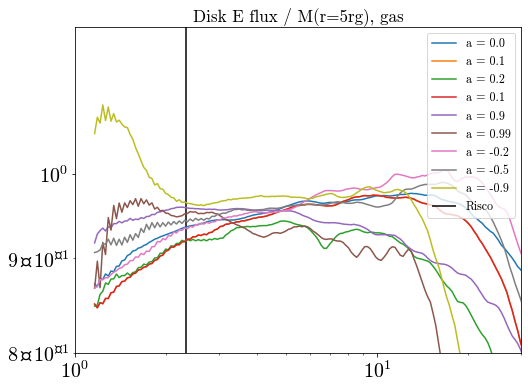

In [157]:
plt.figure(figsize=(8,6))
fs = 12

plt.title("Disk E flux / M(r=5rg), gas", fontsize = fs+5)

plt.loglog(r[:,ny//2,0], fEdiskMA_00/fM_00[iofr(5)], label="a = 0.0")
plt.loglog(r[:,ny//2,0], fEdiskMA_01/fM_01[iofr(5)], label="a = 0.1")
plt.loglog(r[:,ny//2,0], fEdiskMA_02/fM_02[iofr(5)], label="a = 0.2")
plt.loglog(r[:,ny//2,0], fEdiskMA_01/fM_01[iofr(5)], label="a = 0.1")
plt.loglog(r[:,ny//2,0], fEdiskMA_09/fM_09[iofr(5)], label="a = 0.9")
plt.loglog(r[:,ny//2,0], fEdiskMA_99/fM_99[iofr(5)], label="a = 0.99")
plt.loglog(r[:,ny//2,0], fEdiskMA_n02/fM_n02[iofr(5)], label="a = -0.2")
plt.loglog(r[:,ny//2,0], fEdiskMA_n05/fM_n05[iofr(5)], label="a = -0.5")
plt.loglog(r[:,ny//2,0], fEdiskMA_n09/fM_n09[iofr(5)], label="a = -0.9")

#plt.loglog(r[:,ny//2,0], fEdiskMA_02 / fM_02, label=" Disk L flux hydro")
plt.vlines(Risco(a), 10**-1, 10**1.5, label = "Risco")
#plt.loglog(r[:,ny//2,0], Mdot, label="current Mass flux")
#plt.loglog(r[:,ny//2,0], fM_02, label="Mass flux total")
#plt.loglog(r[:,ny//2,0], fMdisk_02*0.8, label="Disk Mass flux total")
#plt.loglog(r[:,ny//2,0], fEdiskMA_02, label="Disk E")


#plt.loglog(r[:,ny//2,0], -fEM_02 /fM_02 , label="- EM flux")
#plt.loglog(r[:,ny//2,0], - powj_02 /fM_02 , label="- Jet power")


plt.ylim(0.8,1.2)
plt.xlim(1e0,30)
#plt.loglog(r[:,ny//2,0],rho[:,ny//2,0]*10)
plt.legend(fontsize = fs, loc=1)

Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.


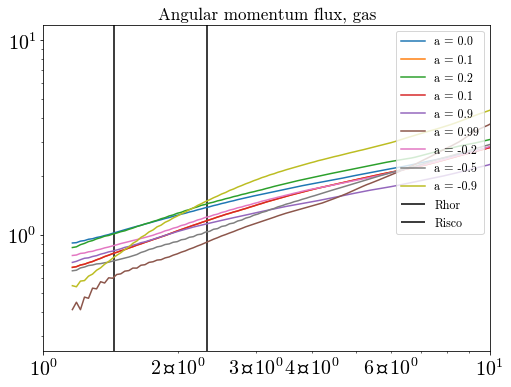

In [115]:
plt.figure(figsize=(8,6))
fs = 12

plt.title("Angular momentum flux, gas", fontsize = fs+5)

plt.loglog(r[:,ny//2,0], fLdiskMA_00/fM_00[iofr(10)], label="a = 0.0")
plt.loglog(r[:,ny//2,0], fLdiskMA_01/fM_01[iofr(10)], label="a = 0.1")
plt.loglog(r[:,ny//2,0], fLdiskMA_02/fM_02[iofr(10)], label="a = 0.2")
plt.loglog(r[:,ny//2,0], fLdiskMA_01/fM_01[iofr(10)], label="a = 0.1")
plt.loglog(r[:,ny//2,0], fLdiskMA_09/fM_09[iofr(10)], label="a = 0.9")
plt.loglog(r[:,ny//2,0], fLdiskMA_99/fM_99[iofr(10)], label="a = 0.99")
plt.loglog(r[:,ny//2,0], fLdiskMA_n02/fM_n02[iofr(10)], label="a = -0.2")
plt.loglog(r[:,ny//2,0], fLdiskMA_n05/fM_n05[iofr(10)], label="a = -0.5")
plt.loglog(r[:,ny//2,0], fLdiskMA_n09/fM_n09[iofr(10)], label="a = -0.9")

#plt.loglog(r[:,ny//2,0], fEdiskMA_02 / fM_02, label=" Disk L flux hydro")
plt.vlines(Risco(a), 10**-1, 10**1.5, label = "Risco")
#plt.loglog(r[:,ny//2,0], Mdot, label="current Mass flux")
#plt.loglog(r[:,ny//2,0], fM_02, label="Mass flux total")
#plt.loglog(r[:,ny//2,0], fMdisk_02*0.8, label="Disk Mass flux total")
#plt.loglog(r[:,ny//2,0], fEdiskMA_02, label="Disk E")


#plt.loglog(r[:,ny//2,0], -fEM_02 /fM_02 , label="- EM flux")
#plt.loglog(r[:,ny//2,0], - powj_02 /fM_02 , label="- Jet power")


plt.ylim(10**-0.6,12)
plt.xlim(1e0,10)
#plt.loglog(r[:,ny//2,0],rho[:,ny//2,0]*10)
plt.legend(fontsize = fs, loc=1)

Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.


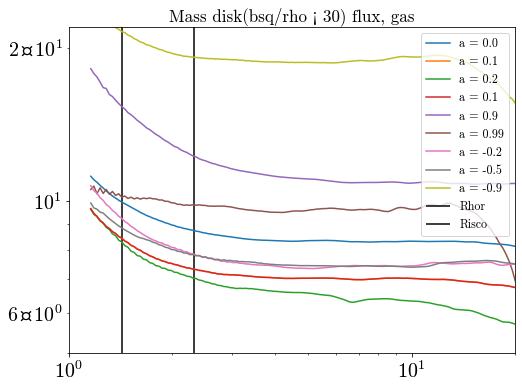

In [127]:
plt.figure(figsize=(8,6))
fs = 12

plt.title("Mass disk(bsq/rho < 30) flux, gas", fontsize = fs+5)

plt.loglog(r[:,ny//2,0], fMdisk_00, label="a = 0.0")
plt.loglog(r[:,ny//2,0], fMdisk_01, label="a = 0.1")
plt.loglog(r[:,ny//2,0], fMdisk_02, label="a = 0.2")
plt.loglog(r[:,ny//2,0], fMdisk_01, label="a = 0.1")
plt.loglog(r[:,ny//2,0], fMdisk_09, label="a = 0.9")
plt.loglog(r[:,ny//2,0], fMdisk_99, label="a = 0.99")
plt.loglog(r[:,ny//2,0], fMdisk_n02, label="a = -0.2")
plt.loglog(r[:,ny//2,0], fMdisk_n05, label="a = -0.5")
plt.loglog(r[:,ny//2,0], fMdisk_n09, label="a = -0.9")





#plt.loglog(r[:,ny//2,0], fEdiskMA_02 / fM_02, label=" Disk L flux hydro")

plt.vlines(rhor, 10**-1, 10**1.5, label="Rhor")
plt.vlines(Risco(a), 10**-1, 10**1.5, label = "Risco")
#plt.loglog(r[:,ny//2,0], Mdot, label="current Mass flux")
#plt.loglog(r[:,ny//2,0], fM_02, label="Mass flux total")
#plt.loglog(r[:,ny//2,0], fMdisk_02*0.8, label="Disk Mass flux total")
#plt.loglog(r[:,ny//2,0], fEdiskMA_02, label="Disk E")


#plt.loglog(r[:,ny//2,0], -fEM_02 /fM_02 , label="- EM flux")
#plt.loglog(r[:,ny//2,0], - powj_02 /fM_02 , label="- Jet power")


plt.ylim(5,22)
plt.xlim(1e0,20)
#plt.loglog(r[:,ny//2,0],rho[:,ny//2,0]*10)
plt.legend(fontsize = fs, loc=1)

Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.


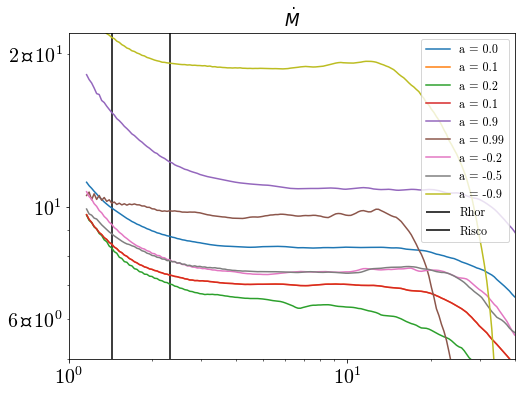

In [145]:
plt.figure(figsize=(8,6))
fs = 12

plt.title(r"$\dot{M}$", fontsize = fs+5)

plt.loglog(r[:,ny//2,0], fM_00, label="a = 0.0")
plt.loglog(r[:,ny//2,0], fM_01, label="a = 0.1")
plt.loglog(r[:,ny//2,0], fM_02, label="a = 0.2")
plt.loglog(r[:,ny//2,0], fM_01, label="a = 0.1")
plt.loglog(r[:,ny//2,0], fM_09, label="a = 0.9")
plt.loglog(r[:,ny//2,0], fM_99, label="a = 0.99")
plt.loglog(r[:,ny//2,0], fM_n02, label="a = -0.2")
plt.loglog(r[:,ny//2,0], fM_n05, label="a = -0.5")
plt.loglog(r[:,ny//2,0], fM_n09, label="a = -0.9")





#plt.loglog(r[:,ny//2,0], fEdiskMA_02 / fM_02, label=" Disk L flux hydro")

plt.vlines(rhor, 10**-1, 10**1.5, label="Rhor")
plt.vlines(Risco(a), 10**-1, 10**1.5, label = "Risco")
#plt.loglog(r[:,ny//2,0], Mdot, label="current Mass flux")
#plt.loglog(r[:,ny//2,0], fM_02, label="Mass flux total")
#plt.loglog(r[:,ny//2,0], fMdisk_02*0.8, label="Disk Mass flux total")
#plt.loglog(r[:,ny//2,0], fEdiskMA_02, label="Disk E")


#plt.loglog(r[:,ny//2,0], -fEM_02 /fM_02 , label="- EM flux")
#plt.loglog(r[:,ny//2,0], - powj_02 /fM_02 , label="- Jet power")


plt.ylim(5, 22)
plt.xlim(1e0,40)
#plt.loglog(r[:,ny//2,0],rho[:,ny//2,0]*10)
plt.legend(fontsize = fs, loc=1)

Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.


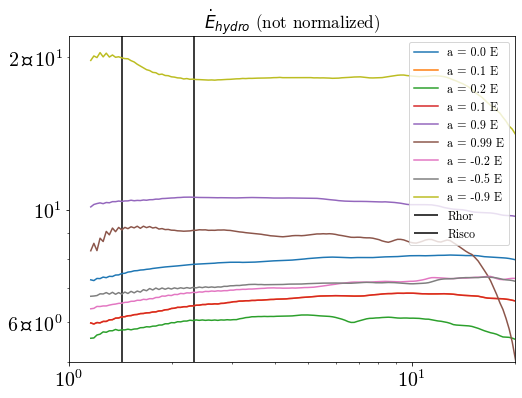

In [146]:
plt.figure(figsize=(8,6))
fs = 12

plt.title(r"$\dot{E}_{hydro}$ (not normalized)", fontsize = fs+5)


plt.loglog(r[:,ny//2,0], fEdiskMA_00, label="a = 0.0 E")
plt.loglog(r[:,ny//2,0], fEdiskMA_01, label="a = 0.1 E")
plt.loglog(r[:,ny//2,0], fEdiskMA_02, label="a = 0.2 E")
plt.loglog(r[:,ny//2,0], fEdiskMA_01, label="a = 0.1 E")
plt.loglog(r[:,ny//2,0], fEdiskMA_09, label="a = 0.9 E")
plt.loglog(r[:,ny//2,0], fEdiskMA_99, label="a = 0.99 E")
plt.loglog(r[:,ny//2,0], fEdiskMA_n02, label="a = -0.2 E")
plt.loglog(r[:,ny//2,0], fEdiskMA_n05, label="a = -0.5 E")
plt.loglog(r[:,ny//2,0], fEdiskMA_n09, label="a = -0.9 E")



plt.vlines(rhor, 10**-1, 10**1.5, label="Rhor")
plt.vlines(Risco(a), 10**-1, 10**1.5, label = "Risco")
#plt.loglog(r[:,ny//2,0], Mdot, label="current Mass flux")
#plt.loglog(r[:,ny//2,0], fM_02, label="Mass flux total")
#plt.loglog(r[:,ny//2,0], fMdisk_02*0.8, label="Disk Mass flux total")
#plt.loglog(r[:,ny//2,0], fEdiskMA_02, label="Disk E")


#plt.loglog(r[:,ny//2,0], -fEM_02 /fM_02 , label="- EM flux")
#plt.loglog(r[:,ny//2,0], - powj_02 /fM_02 , label="- Jet power")


plt.ylim(5, 22)
plt.xlim(1e0,20)
#plt.loglog(r[:,ny//2,0],rho[:,ny//2,0]*10)
plt.legend(fontsize = fs, loc=1)

Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
F

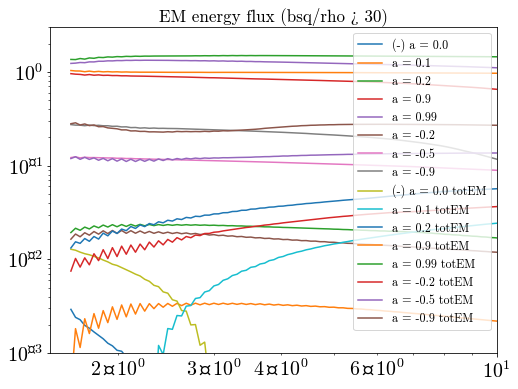

In [248]:
plt.figure(figsize=(8,6))
fs = 12

plt.title("EM energy flux (bsq/rho > 30)", fontsize = fs+5)

plt.loglog(r[:,ny//2,0], fEM_00/fM_00[iofr(10)], label="(-) a = 0.0")
plt.loglog(r[:,ny//2,0], -fEM_01/fM_01[iofr(10)], label="a = 0.1")
plt.loglog(r[:,ny//2,0], -fEM_02/fM_02[iofr(10)], label="a = 0.2")
plt.loglog(r[:,ny//2,0], -fEM_09/fM_09[iofr(10)], label="a = 0.9")
plt.loglog(r[:,ny//2,0], -fEM_99/fM_99[iofr(10)], label="a = 0.99")
plt.loglog(r[:,ny//2,0], -fEM_n02/fM_n02[iofr(10)], label="a = -0.2")
plt.loglog(r[:,ny//2,0], -fEM_n05/fM_n05[iofr(10)], label="a = -0.5")
plt.loglog(r[:,ny//2,0], -fEM_n09/fM_n09[iofr(10)], label="a = -0.9")



plt.loglog(r[:,ny//2,0], fEtotEM_00/fM_00[iofr(10)], label="(-) a = 0.0 totEM")
plt.loglog(r[:,ny//2,0], -fEtotEM_01/fM_01[iofr(10)], label="a = 0.1 totEM")
plt.loglog(r[:,ny//2,0], -fEtotEM_02/fM_02[iofr(10)], label="a = 0.2 totEM")
plt.loglog(r[:,ny//2,0], -fEtotEM_09/fM_09[iofr(10)], label="a = 0.9 totEM")
plt.loglog(r[:,ny//2,0], -fEtotEM_99/fM_99[iofr(10)], label="a = 0.99 totEM")
plt.loglog(r[:,ny//2,0], -fEtotEM_n02/fM_n02[iofr(10)], label="a = -0.2 totEM")
plt.loglog(r[:,ny//2,0], -fEtotEM_n05/fM_n05[iofr(10)], label="a = -0.5 totEM")
plt.loglog(r[:,ny//2,0], -fEtotEM_n09/fM_n09[iofr(10)], label="a = -0.9 totEM")


#plt.loglog(r[:,ny//2,0], fEdiskMA_02 / fM_02, label=" Disk L flux hydro")

#plt.vlines(rhor, 10**-1, 10**1.5, label="Rhor")
#plt.vlines(Risco(a), 10**-1, 10**1.5, label = "Risco")
#plt.loglog(r[:,ny//2,0], Mdot, label="current Mass flux")
#plt.loglog(r[:,ny//2,0], fM_02, label="Mass flux total")
#plt.loglog(r[:,ny//2,0], fMdisk_02*0.8, label="Disk Mass flux total")
#plt.loglog(r[:,ny//2,0], fEdiskMA_02, label="Disk E")


#plt.loglog(r[:,ny//2,0], -fEM_02 /fM_02 , label="- EM flux")
#plt.loglog(r[:,ny//2,0], - powj_02 /fM_02 , label="- Jet power")


plt.ylim(10**-3,3)
plt.xlim(1.5,10)
#plt.loglog(r[:,ny//2,0],rho[:,ny//2,0]*10)
plt.legend(fontsize = fs, loc=1)

Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
F

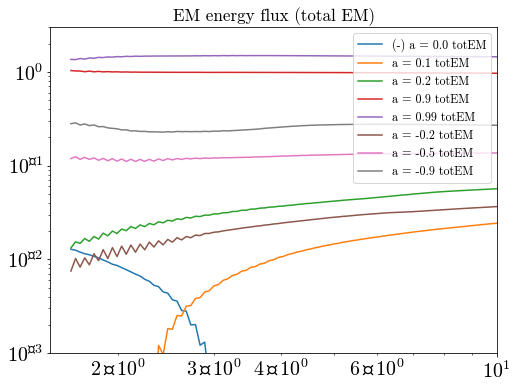

In [247]:
plt.figure(figsize=(8,6))
fs = 12

plt.title("EM energy flux (total EM)", fontsize = fs+5)

plt.loglog(r[:,ny//2,0], fEtotEM_00/fM_00[iofr(10)], label="(-) a = 0.0 totEM")
plt.loglog(r[:,ny//2,0], -fEtotEM_01/fM_01[iofr(10)], label="a = 0.1 totEM")
plt.loglog(r[:,ny//2,0], -fEtotEM_02/fM_02[iofr(10)], label="a = 0.2 totEM")
plt.loglog(r[:,ny//2,0], -fEtotEM_09/fM_09[iofr(10)], label="a = 0.9 totEM")
plt.loglog(r[:,ny//2,0], -fEtotEM_99/fM_99[iofr(10)], label="a = 0.99 totEM")
plt.loglog(r[:,ny//2,0], -fEtotEM_n02/fM_n02[iofr(10)], label="a = -0.2 totEM")
plt.loglog(r[:,ny//2,0], -fEtotEM_n05/fM_n05[iofr(10)], label="a = -0.5 totEM")
plt.loglog(r[:,ny//2,0], -fEtotEM_n09/fM_n09[iofr(10)], label="a = -0.9 totEM")




#plt.loglog(r[:,ny//2,0], fEdiskMA_02 / fM_02, label=" Disk L flux hydro")

#plt.vlines(rhor, 10**-1, 10**1.5, label="Rhor")
#plt.vlines(Risco(a), 10**-1, 10**1.5, label = "Risco")
#plt.loglog(r[:,ny//2,0], Mdot, label="current Mass flux")
#plt.loglog(r[:,ny//2,0], fM_02, label="Mass flux total")
#plt.loglog(r[:,ny//2,0], fMdisk_02*0.8, label="Disk Mass flux total")
#plt.loglog(r[:,ny//2,0], fEdiskMA_02, label="Disk E")


#plt.loglog(r[:,ny//2,0], -fEM_02 /fM_02 , label="- EM flux")
#plt.loglog(r[:,ny//2,0], - powj_02 /fM_02 , label="- Jet power")


plt.ylim(10**-3,3)
plt.xlim(1.5,10)
#plt.loglog(r[:,ny//2,0],rho[:,ny//2,0]*10)
plt.legend(fontsize = fs, loc=1)

In [91]:
(-fEM_01[iofr(rhor)]/fM_01[iofr(10)])

0.002289479


# Testing $ k = \Omega_F / \Omega_H $

## a = -0.9

In [92]:
cd D:\BHspindown\maddat_backup\rtf2_15r34_2pi_a-0.9gg50rbr1e3_0_0_0_faildufix2/

D:\BHspindown\maddat_backup\rtf2_15r34_2pi_a-0.9gg50rbr1e3_0_0_0_faildufix2


In [93]:
# This assumes gdump.bin is in /dumps
grid3d("gdump.bin")

Reading grid from dumps/gdump.bin ...  done!


In [94]:
OmegaH = angv_hor(a, rhor)
OmegaH

-0.3133944840902631

Opening fieldline2000.bin ...
rfdheader: t=10000
Found 30 header items, reading them in and setting EP3=THETAROT=0.0

No data on gdetB, approximating it
Loading flux data...
No data on Bstag, setting it to B.
No data on KAPPA and FLR
No data on luminosity (cooling off?)
Read 20 variables, but file contains more (23 variables). Wrong format?


C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12538: RuntimeWarning: invalid value encountered in true_divide
  omegaf1=fdd[0,1]/fdd[1,3] # = ftr/frp
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12539: RuntimeWarning: invalid value encountered in true_divide
  omegaf2=fdd[0,2]/fdd[2,3] # = fth/fhp
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12568: RuntimeWarning: divide by zero encountered in true_divide
  omegaf2b=np.fabs(v3nonhat) + np.sign(uu[1])*(vpol/Bpol)*np.fabs(B3nonhat)
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12568: RuntimeWarning: invalid value encountered in multiply
  omegaf2b=np.fabs(v3nonhat) + np.sign(uu[1])*(vpol/Bpol)*np.fabs(B3nonhat)
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12570: RuntimeWarning: invalid value encountered in true_divide
  omegaf1b=v3nonhat - B3nonhat*(v1hat*B1hat+v2hat*B2hat)/(B1hat**2+B2hat**2)


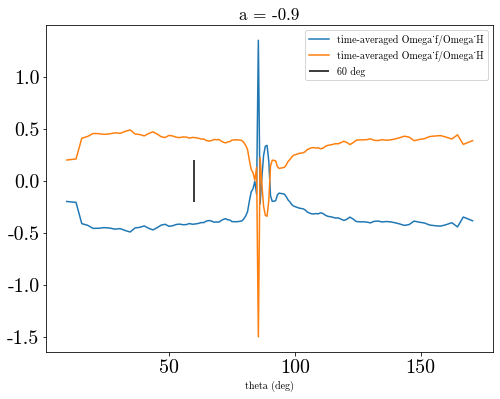

In [95]:
plt.figure(figsize=(8,6))
fs = 12

rfd("fieldline2000.bin")

ud = (gv3[:,:]*uu[:,None]).sum(0)

bu=np.empty_like(uu)              #allocate memory for bu
bu[0]=mdot(B[1:4], ud[1:4])             #B^i u_i
bu[1:4]=(B[1:4] + bu[0]*uu[1:4])/uu[0]  #b^i = (B^i + b^t u^i)/u^t
bd=mdot(gv3,bu)
bsq=mdot(bu,bd)
faraday()

plt.title("a = -0.9", fontsize = fs+5)

#plt.plot(h[iofr(rhor),:,0] * (180/np.pi), 2*np.pi*uu[3][iofr(rhor), :, 1]/ uu[0][iofr(rhor), :, 1], label="t=10,000, uu3 / uu0")
plt.plot(h[iofr(rhor),:,0]* (180/np.pi), 2*np.pi*omegaf2b[iofr(rhor), :, 1]/OmegaH, label="time-averaged Omega_f/Omega_H")
#plt.plot(h[iofr(rhor),:,0]* (180/np.pi), (ud[3]/uu[0])[iofr(rhor), :, 1]/ (np.pi*2), label="t=10,000, ud3 / uu0")
plt.plot(h[iofr(rhor),:,0]* (180/np.pi), 2*np.pi*omegaf2[iofr(rhor), :, 1]/OmegaH, label="time-averaged Omega_f/Omega_H")



plt.vlines(60, -0.2, 0.2, label="60 deg")

plt.xlabel("theta (deg)")
plt.legend()


In [96]:
#load vars this time step
rfd("fieldline2000.bin")

ud = (gv3[:,:]*uu[:,None]).sum(0)

#save in 1D radial slices in equitorial plane
rho1d = rho[:,ny//2,0]
ug1d = ug[:,ny//2,0]
dxdxp31d = dxdxp[3,3]
ud31d = ud[3][:,ny//2,0]
gdet1d = gdet[:,ny//2,0]
        
bu=np.empty_like(uu)              #allocate memory for bu
bu[0]=mdot(B[1:4], ud[1:4])             #B^i u_i
bu[1:4]=(B[1:4] + bu[0]*uu[1:4])/uu[0]  #b^i = (B^i + b^t u^i)/u^t
bd=mdot(gv3,bu)
bsq=mdot(bu,bd)
faraday()
        
#field line angular velocity at horizon vs. theta
omegaf = omegaf2b[iofr(rhor), :, 0]

Opening fieldline2000.bin ...
rfdheader: t=10000
Found 30 header items, reading them in and setting EP3=THETAROT=0.0

No data on gdetB, approximating it
Loading flux data...
No data on Bstag, setting it to B.
No data on KAPPA and FLR
No data on luminosity (cooling off?)
Read 20 variables, but file contains more (23 variables). Wrong format?


C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12538: RuntimeWarning: invalid value encountered in true_divide
  omegaf1=fdd[0,1]/fdd[1,3] # = ftr/frp
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12539: RuntimeWarning: invalid value encountered in true_divide
  omegaf2=fdd[0,2]/fdd[2,3] # = fth/fhp
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12568: RuntimeWarning: divide by zero encountered in true_divide
  omegaf2b=np.fabs(v3nonhat) + np.sign(uu[1])*(vpol/Bpol)*np.fabs(B3nonhat)
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12568: RuntimeWarning: invalid value encountered in multiply
  omegaf2b=np.fabs(v3nonhat) + np.sign(uu[1])*(vpol/Bpol)*np.fabs(B3nonhat)
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12570: RuntimeWarning: invalid value encountered in true_divide
  omegaf1b=v3nonhat - B3nonhat*(v1hat*B1hat+v2hat*B2hat)/(B1hat**2+B2hat**2)


In [97]:
pshape(uu[2])
pshape(bu[2])
pshape(uu[3])
pshape(bu[3])
pshape(uu[1])
pshape(bu[1])

(288, 128, 64)
(288, 128, 64)
(288, 128, 64)
(288, 128, 64)
(288, 128, 64)
(288, 128, 64)


In [98]:
OmegaH = a /(2*rhor)
print(OmegaH, 2*np.pi*omegaf2b[iofr(rhor), ny//3, 1])

kn09 = 2*np.pi*omegaf2b[iofr(rhor), ny//3, 1]/OmegaH
print(2*np.pi*omegaf2b[iofr(rhor), ny//3, 1]/OmegaH)
print(kn09)

-0.3133945031366293 0.11842794666790876
-0.377887759621228
-0.377887759621228


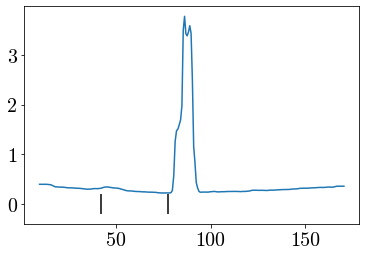

In [99]:
plt.plot(h[iofr(rhor),:,0]* (180/np.pi), rho[iofr(rhor), :, 1], label="density")
plt.vlines(ny//3, -0.2, 0.2, label="60 deg")

plt.vlines(77.3, -0.2, 0.2, label="60 deg")


[79.7323]
[]
[-0.33578783] Omega_F at boundary
[79.7323]
[]
[-0.33578783] Omega_F at boundary
[-0.33578783] []


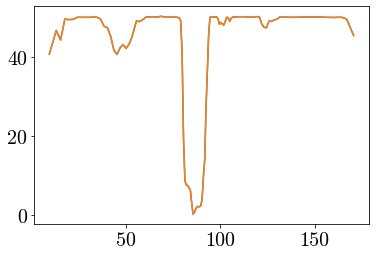

In [100]:
kn09 = plot_k(a,rhor,rho,h,bsq)[0]
kn09_bsq = plot_k(a,rhor,rho,h,bsq)[1]
print(kn09, kn09_bsq)

[79.7323]
[]
[-0.33578783] Omega_F at boundary


(array([-0.33578783], dtype=float32), array([], dtype=float32))

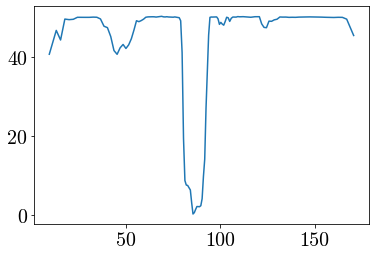

In [101]:
plot_k(a,rhor,rho,h,bsq)

## a = -0.5

In [102]:
cd D:\BHspindown\maddat_backup\rtf2_15r36.21_a-0.5_0_0_0

D:\BHspindown\maddat_backup\rtf2_15r36.21_a-0.5_0_0_0


In [103]:
# This assumes gdump.bin is in /dumps
grid3d("gdump.bin")

Reading grid from dumps/gdump.bin ...  done!


In [104]:
OmegaH = angv_hor(a, rhor)
OmegaH

-0.13397459621556135

Opening fieldline2100.bin ...
rfdheader: t=10500
Found 30 header items, reading them in and setting EP3=THETAROT=0.0

Loading gdetB data...
No data on gdetF, setting it to None.
No data on Bstag, setting it to B.
No data on KAPPA and FLR
No data on luminosity (cooling off?)


C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12538: RuntimeWarning: invalid value encountered in true_divide
  omegaf1=fdd[0,1]/fdd[1,3] # = ftr/frp
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12539: RuntimeWarning: invalid value encountered in true_divide
  omegaf2=fdd[0,2]/fdd[2,3] # = fth/fhp
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12568: RuntimeWarning: divide by zero encountered in true_divide
  omegaf2b=np.fabs(v3nonhat) + np.sign(uu[1])*(vpol/Bpol)*np.fabs(B3nonhat)
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12568: RuntimeWarning: invalid value encountered in multiply
  omegaf2b=np.fabs(v3nonhat) + np.sign(uu[1])*(vpol/Bpol)*np.fabs(B3nonhat)
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12570: RuntimeWarning: invalid value encountered in true_divide
  omegaf1b=v3nonhat - B3nonhat*(v1hat*B1hat+v2hat*B2hat)/(B1hat**2+B2hat**2)


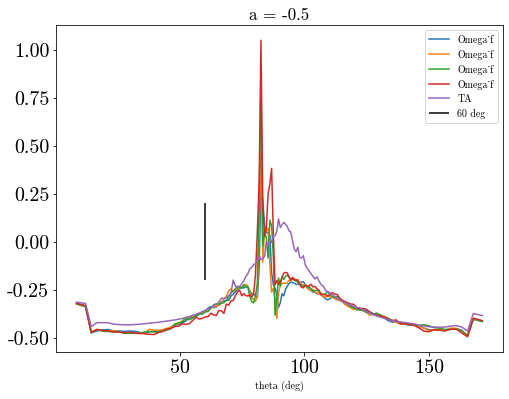

In [105]:
plt.figure(figsize=(8,6))
fs = 12

rfd("fieldline2100.bin")

ud = (gv3[:,:]*uu[:,None]).sum(0)

bu=np.empty_like(uu)              #allocate memory for bu
bu[0]=mdot(B[1:4], ud[1:4])             #B^i u_i
bu[1:4]=(B[1:4] + bu[0]*uu[1:4])/uu[0]  #b^i = (B^i + b^t u^i)/u^t
bd=mdot(gv3,bu)
bsq=mdot(bu,bd)
faraday()

plt.title("a = -0.5", fontsize = fs+5)

#plt.plot(h[iofr(rhor),:,0] * (180/np.pi), 2*np.pi*uu[3][iofr(rhor), :, 1]/ uu[0][iofr(rhor), :, 1], label="uu3 / uu0")
plt.plot(h[iofr(rhor),:,0]* (180/np.pi), 2*np.pi*omegaf2b[iofr(rhor), :, 0]/OmegaH, label="Omega_f")
plt.plot(h[iofr(rhor),:,0]* (180/np.pi), 2*np.pi*omegaf2b[iofr(rhor), :, 1]/OmegaH, label="Omega_f")
plt.plot(h[iofr(rhor),:,0]* (180/np.pi), 2*np.pi*omegaf2b[iofr(rhor), :, 2]/OmegaH, label="Omega_f")
plt.plot(h[iofr(rhor),:,0]* (180/np.pi), 2*np.pi*omegaf2b[iofr(rhor), :, 3]/OmegaH, label="Omega_f")
plt.plot(h[iofr(rhor),:,0]* (180/np.pi), 2*np.pi*omegaf_n05/OmegaH, label="TA")
#plt.plot(h[iofr(rhor),:,0]* (180/np.pi), (ud[3]/uu[0])[iofr(rhor), :, 1]/ (np.pi*2), label="ud3 / uu0")

plt.vlines(60, -0.2, 0.2, label="60 deg")


plt.xlabel("theta (deg)")
plt.legend()

In [106]:
(2*np.pi*omegaf_n05/OmegaH).mean(-1)

-0.26337242

[100.34091]
[]
[-0.22140826] Omega_F at boundary


array([-0.22140826], dtype=float32)

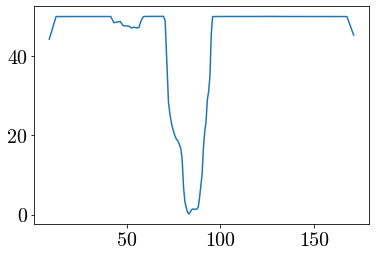

In [107]:
kn05 = plot_k(a,rhor,rho,h,bsq)[0]
kn05

## a = 0.99

In [108]:
cd D:\BHspindown\maddat_backup\rtf2_15r34_2pi_a0.99gg500rbr1e3_0_0_0

D:\BHspindown\maddat_backup\rtf2_15r34_2pi_a0.99gg500rbr1e3_0_0_0


In [109]:
# This assumes gdump.bin is in /dumps
grid3d("gdump.bin")

Reading grid from dumps/gdump.bin ...  done!


Opening fieldline2100.bin ...
rfdheader: t=10500
Found 30 header items, reading them in and setting EP3=THETAROT=0.0

Loading gdetB data...
No data on gdetF, setting it to None.
No data on Bstag, setting it to B.
No data on KAPPA and FLR
No data on luminosity (cooling off?)


C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12538: RuntimeWarning: divide by zero encountered in true_divide
  omegaf1=fdd[0,1]/fdd[1,3] # = ftr/frp
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12538: RuntimeWarning: invalid value encountered in true_divide
  omegaf1=fdd[0,1]/fdd[1,3] # = ftr/frp
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12539: RuntimeWarning: divide by zero encountered in true_divide
  omegaf2=fdd[0,2]/fdd[2,3] # = fth/fhp
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12539: RuntimeWarning: invalid value encountered in true_divide
  omegaf2=fdd[0,2]/fdd[2,3] # = fth/fhp
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12568: RuntimeWarning: divide by zero encountered in true_divide
  omegaf2b=np.fabs(v3nonhat) + np.sign(uu[1])*(vpol/Bpol)*np.fabs(B3nonhat)
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12568: RuntimeWarning: invalid value encountered in multiply
  omegaf2b=np.fabs(v3nonha

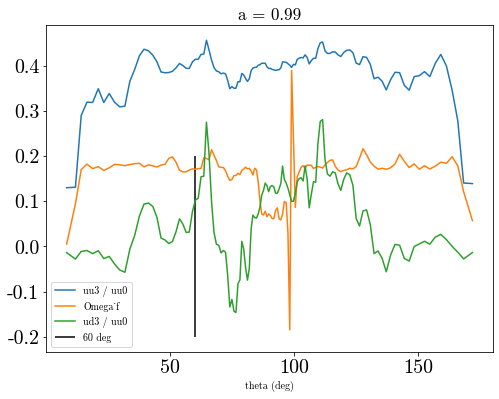

In [110]:
plt.figure(figsize=(8,6))
fs = 12

rfd("fieldline2100.bin")

ud = (gv3[:,:]*uu[:,None]).sum(0)

bu=np.empty_like(uu)              #allocate memory for bu
bu[0]=mdot(B[1:4], ud[1:4])             #B^i u_i
bu[1:4]=(B[1:4] + bu[0]*uu[1:4])/uu[0]  #b^i = (B^i + b^t u^i)/u^t
bd=mdot(gv3,bu)
bsq=mdot(bu,bd)
faraday()

plt.title("a = 0.99", fontsize = fs+5)

plt.plot(h[iofr(rhor),:,0] * (180/np.pi), 2*np.pi*uu[3][iofr(rhor), :, 1]/ uu[0][iofr(rhor), :, 1], label="uu3 / uu0")
plt.plot(h[iofr(rhor),:,0]* (180/np.pi), 2*np.pi*omegaf2b[iofr(rhor), :, 1], label="Omega_f")
plt.plot(h[iofr(rhor),:,0]* (180/np.pi), (ud[3]/uu[0])[iofr(rhor), :, 1]/ (np.pi*2), label="ud3 / uu0")

plt.vlines(60, -0.2, 0.2, label="60 deg")


plt.xlabel("theta (deg)")
plt.legend()

[104.32807]
[]
[0.38981897] Omega_F at boundary


array([0.38981897], dtype=float32)

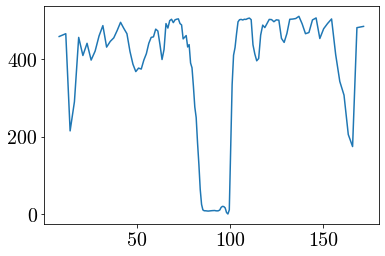

In [111]:
k99 = plot_k(a,rhor,rho,h,bsq)[0]
k99

## a = -0.2

In [112]:
cd D:\BHspindown\maddat_backup\rtf2_15r35.64_a-0.2_0_0_0

D:\BHspindown\maddat_backup\rtf2_15r35.64_a-0.2_0_0_0


In [113]:
# This assumes gdump.bin is in /dumps
grid3d("gdump.bin")

Reading grid from dumps/gdump.bin ...  done!


In [114]:
OmegaH = angv_hor(a, rhor)
OmegaH

-0.05051025798500381

Opening fieldline2100.bin ...
rfdheader: t=10500
Found 30 header items, reading them in and setting EP3=THETAROT=0.0

Loading gdetB data...
No data on gdetF, setting it to None.
No data on Bstag, setting it to B.
No data on KAPPA and FLR
No data on luminosity (cooling off?)


C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12538: RuntimeWarning: invalid value encountered in true_divide
  omegaf1=fdd[0,1]/fdd[1,3] # = ftr/frp
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12539: RuntimeWarning: divide by zero encountered in true_divide
  omegaf2=fdd[0,2]/fdd[2,3] # = fth/fhp
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12539: RuntimeWarning: invalid value encountered in true_divide
  omegaf2=fdd[0,2]/fdd[2,3] # = fth/fhp
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12568: RuntimeWarning: divide by zero encountered in true_divide
  omegaf2b=np.fabs(v3nonhat) + np.sign(uu[1])*(vpol/Bpol)*np.fabs(B3nonhat)
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12568: RuntimeWarning: invalid value encountered in multiply
  omegaf2b=np.fabs(v3nonhat) + np.sign(uu[1])*(vpol/Bpol)*np.fabs(B3nonhat)
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12570: RuntimeWarning: invalid value encountered in tru

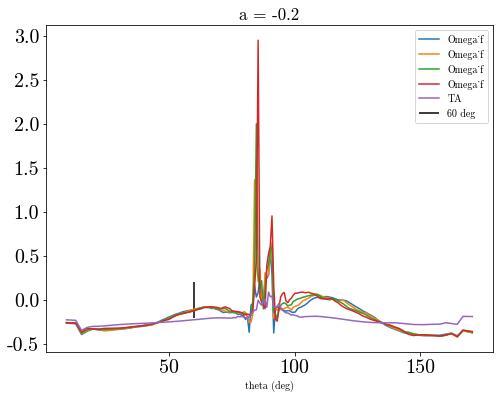

In [115]:
plt.figure(figsize=(8,6))
fs = 12

rfd("fieldline2100.bin")

ud = (gv3[:,:]*uu[:,None]).sum(0)

bu=np.empty_like(uu)              #allocate memory for bu
bu[0]=mdot(B[1:4], ud[1:4])             #B^i u_i
bu[1:4]=(B[1:4] + bu[0]*uu[1:4])/uu[0]  #b^i = (B^i + b^t u^i)/u^t
bd=mdot(gv3,bu)
bsq=mdot(bu,bd)
faraday()

plt.title("a = -0.2", fontsize = fs+5)

#plt.plot(h[iofr(rhor),:,0] * (180/np.pi), 2*np.pi*uu[3][iofr(rhor), :, 1]/ uu[0][iofr(rhor), :, 1], label="uu3 / uu0")
plt.plot(h[iofr(rhor),:,0]* (180/np.pi), 2*np.pi*omegaf2b[iofr(rhor), :, 0]/OmegaH, label="Omega_f")
plt.plot(h[iofr(rhor),:,0]* (180/np.pi), 2*np.pi*omegaf2b[iofr(rhor), :, 1]/OmegaH, label="Omega_f")
plt.plot(h[iofr(rhor),:,0]* (180/np.pi), 2*np.pi*omegaf2b[iofr(rhor), :, 2]/OmegaH, label="Omega_f")
plt.plot(h[iofr(rhor),:,0]* (180/np.pi), 2*np.pi*omegaf2b[iofr(rhor), :, 3]/OmegaH, label="Omega_f")
plt.plot(h[iofr(rhor),:,0]* (180/np.pi), 2*np.pi*omegaf_n02/OmegaH, label="TA")
#plt.plot(h[iofr(rhor),:,0]* (180/np.pi), (ud[3]/uu[0])[iofr(rhor), :, 1]/ (np.pi*2), label="ud3 / uu0")

plt.vlines(60, -0.2, 0.2, label="60 deg")


plt.xlabel("theta (deg)")
plt.legend()

In [116]:
(2*np.pi*omegaf_n02/OmegaH).mean(-1)

-0.20125273

In [117]:
angv_hor(a, rhor)
2*np.pi*omegaf2b[iofr(rhor), :, 1]

array([ 1.29186995e-02,  1.32429842e-02,  1.93990842e-02,  1.75521672e-02,
        1.64193269e-02,  1.69210508e-02,  1.75829027e-02,  1.73229109e-02,
        1.69772822e-02,  1.67640001e-02,  1.63937714e-02,  1.59478225e-02,
        1.54542411e-02,  1.51104489e-02,  1.46895060e-02,  1.44387763e-02,
        1.40390079e-02,  1.31782060e-02,  1.22406539e-02,  1.12588163e-02,
        1.03507368e-02,  9.35869105e-03,  8.54843296e-03,  7.82254245e-03,
        7.34352693e-03,  6.74914662e-03,  6.16380339e-03,  5.54990442e-03,
        5.02754655e-03,  4.74067964e-03,  4.55582561e-03,  4.22515348e-03,
        4.33316035e-03,  4.22614533e-03,  4.38707788e-03,  4.72457008e-03,
        5.01612993e-03,  5.27186552e-03,  5.74989431e-03,  5.99575508e-03,
        6.37132442e-03,  6.75929897e-03,  6.86786510e-03,  6.57244353e-03,
        6.98165363e-03,  7.17523322e-03,  7.14550959e-03,  7.70148868e-03,
        7.57819088e-03,  6.73042098e-03,  7.01001380e-03,  9.61463992e-03,
        1.28423320e-02,  

[78.99737]
[]
[-0.173066] Omega_F at boundary


array([-0.173066], dtype=float32)

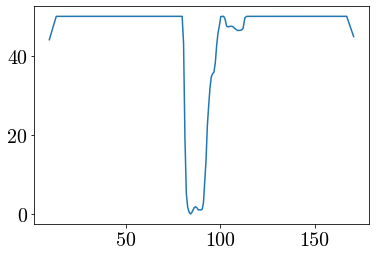

In [118]:
kn02 = plot_k(a,rhor,rho,h,bsq)[0]
kn02

## a = 0.2

In [119]:
cd D:\BHspindown\maddat_backup\rtf2_15r35_a0.2_0_0_0

D:\BHspindown\maddat_backup\rtf2_15r35_a0.2_0_0_0


In [120]:
# This assumes gdump.bin is in /dumps
grid3d("gdump.bin")

Reading grid from dumps/gdump.bin ...  done!


In [121]:
OmegaH = angv_hor(a, rhor)
OmegaH

0.05051025798500381

Opening fieldline2100.bin ...
rfdheader: t=10500
Found 30 header items, reading them in and setting EP3=THETAROT=0.0

Loading gdetB data...
No data on gdetF, setting it to None.
No data on Bstag, setting it to B.
No data on KAPPA and FLR
No data on luminosity (cooling off?)


C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12538: RuntimeWarning: invalid value encountered in true_divide
  omegaf1=fdd[0,1]/fdd[1,3] # = ftr/frp
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12539: RuntimeWarning: divide by zero encountered in true_divide
  omegaf2=fdd[0,2]/fdd[2,3] # = fth/fhp
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12539: RuntimeWarning: invalid value encountered in true_divide
  omegaf2=fdd[0,2]/fdd[2,3] # = fth/fhp
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12568: RuntimeWarning: divide by zero encountered in true_divide
  omegaf2b=np.fabs(v3nonhat) + np.sign(uu[1])*(vpol/Bpol)*np.fabs(B3nonhat)
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12568: RuntimeWarning: invalid value encountered in multiply
  omegaf2b=np.fabs(v3nonhat) + np.sign(uu[1])*(vpol/Bpol)*np.fabs(B3nonhat)
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12570: RuntimeWarning: invalid value encountered in tru

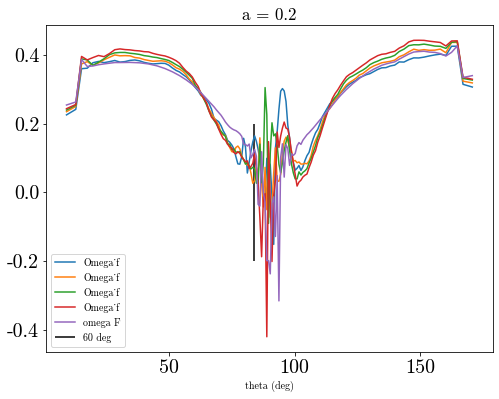

In [122]:
plt.figure(figsize=(8,6))
fs = 12

rfd("fieldline2100.bin")

ud = (gv3[:,:]*uu[:,None]).sum(0)

bu=np.empty_like(uu)              #allocate memory for bu
bu[0]=mdot(B[1:4], ud[1:4])             #B^i u_i
bu[1:4]=(B[1:4] + bu[0]*uu[1:4])/uu[0]  #b^i = (B^i + b^t u^i)/u^t
bd=mdot(gv3,bu)
bsq=mdot(bu,bd)
faraday()

plt.title("a = 0.2", fontsize = fs+5)

#plt.plot(h[iofr(rhor),:,0] * (180/np.pi), 2*np.pi*uu[3][iofr(rhor), :, 1]/ uu[0][iofr(rhor), :, 1], label="uu3 / uu0")
plt.plot(h[iofr(rhor),:,0]* (180/np.pi), 2*np.pi*omegaf2b[iofr(rhor), :, 0]/OmegaH, label="Omega_f")
plt.plot(h[iofr(rhor),:,0]* (180/np.pi), 2*np.pi*omegaf2b[iofr(rhor), :, 1]/OmegaH, label="Omega_f")
plt.plot(h[iofr(rhor),:,0]* (180/np.pi), 2*np.pi*omegaf2b[iofr(rhor), :, 2]/OmegaH, label="Omega_f")
plt.plot(h[iofr(rhor),:,0]* (180/np.pi), 2*np.pi*omegaf2b[iofr(rhor), :, 3]/OmegaH, label="Omega_f")
#plt.plot(h[iofr(rhor),:,0]* (180/np.pi), (ud[3]/uu[0])[iofr(rhor), :, 1]/ (np.pi*2), label="ud3 / uu0")
plt.plot(h[iofr(rhor),:,0]*180/np.pi, 2*np.pi*omegaf_02/OmegaH , label="omega F")

plt.vlines(84, -0.2, 0.2, label="60 deg")


plt.xlabel("theta (deg)")
plt.legend()

In [123]:
(2*np.pi*omegaf_02/OmegaH ).mean(-1)

0.23672774

In [124]:
OmegaH = a /(2*rhor)
print(OmegaH, 2*np.pi*omegaf2b[iofr(rhor), ny//3, 1])

k02 = 2*np.pi*omegaf2b[iofr(rhor), ny//3, 1]/OmegaH
print(2*np.pi*omegaf2b[iofr(rhor), ny//3, 1]/OmegaH)
print(k02)

0.050510257216821904 0.0065839974042051445
0.13034971047449773
0.13034971047449773


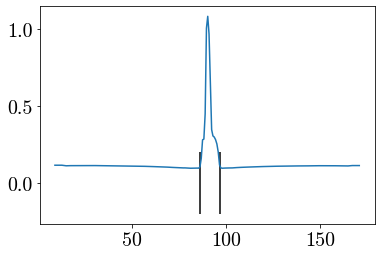

In [125]:
# Plot density profile rho vs. theta at the horizon

plt.plot(h[iofr(rhor),:,0]* (180/np.pi), rho[iofr(rhor), :, 0], label="density")
plt.vlines(86, -0.2, 0.2, label="84 deg")
plt.vlines(97, -0.2, 0.2, label="84 deg")

[81.23397]
[]
[0.05646528] Omega_F at boundary
[0.00285208]
0.050510257216821904


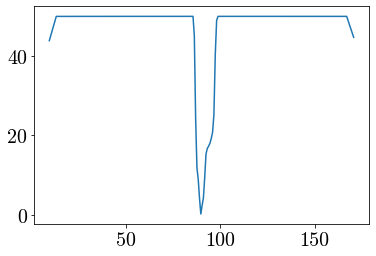

In [126]:
k02 = plot_k(a,rhor,rho,h,bsq)[0]
#plt.plot(h[iofr(rhor),:,0]* (180/np.pi), 2*np.pi*omegaf2b[iofr(rhor), :, 1], label="Omega_f")
print(k02*OmegaH)
print(OmegaH)

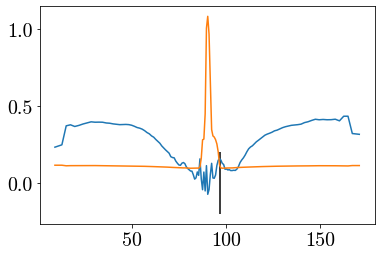

In [127]:
plt.plot(h[iofr(rhor),:,0]* (180/np.pi), 2*np.pi*omegaf2b[iofr(rhor), :, 1]/OmegaH, label="Omega_f")
plt.plot(h[iofr(rhor),:,0]* (180/np.pi),rho[iofr(rhor),:,0], label="Omega_f")
plt.vlines(97, -0.2, 0.2, label="84 deg")

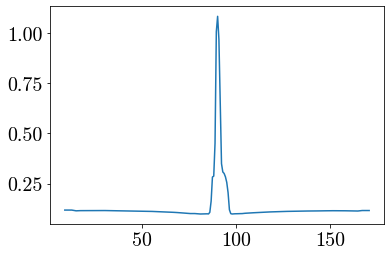

In [128]:
plt.plot(h[iofr(rhor),:,0]* (180/np.pi),rho[iofr(rhor),:,0], label="Omega_f")


In [129]:
where_boundary = (np.where(rho[iofr(rhor), :, 0] == np.min(rho[iofr(rhor), :, 0])))[0]
where_bsqrho30 = (np.where(np.abs(bsq[iofr(rhor), :, 0]/rho[iofr(rhor), :, 0] - 30) < 10**-4))[0]

## a = 0.1

In [130]:
cd D:\BHspindown\maddat_backup\rtf2_15r35_a0.1_0_0_0

D:\BHspindown\maddat_backup\rtf2_15r35_a0.1_0_0_0


In [131]:
# This assumes gdump.bin is in /dumps
grid3d("gdump.bin")

Reading grid from dumps/gdump.bin ...  done!


Opening fieldline2000.bin ...
rfdheader: t=10000
Found 30 header items, reading them in and setting EP3=THETAROT=0.0

Loading gdetB data...
No data on gdetF, setting it to None.
No data on Bstag, setting it to B.
No data on KAPPA and FLR
No data on luminosity (cooling off?)


C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12538: RuntimeWarning: invalid value encountered in true_divide
  omegaf1=fdd[0,1]/fdd[1,3] # = ftr/frp
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12539: RuntimeWarning: divide by zero encountered in true_divide
  omegaf2=fdd[0,2]/fdd[2,3] # = fth/fhp
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12539: RuntimeWarning: invalid value encountered in true_divide
  omegaf2=fdd[0,2]/fdd[2,3] # = fth/fhp
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12568: RuntimeWarning: divide by zero encountered in true_divide
  omegaf2b=np.fabs(v3nonhat) + np.sign(uu[1])*(vpol/Bpol)*np.fabs(B3nonhat)
C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12568: RuntimeWarning: invalid value encountered in multiply
  omegaf2b=np.fabs(v3nonhat) + np.sign(uu[1])*(vpol/Bpol)*np.fabs(B3nonhat)


0.02506281446690023 0.002757989715627681
0.11004309668692965
0.11004309668692965


C:\Users\Beverly\Documents\BHspindown/py/mread/__init__.py:12570: RuntimeWarning: invalid value encountered in true_divide
  omegaf1b=v3nonhat - B3nonhat*(v1hat*B1hat+v2hat*B2hat)/(B1hat**2+B2hat**2)


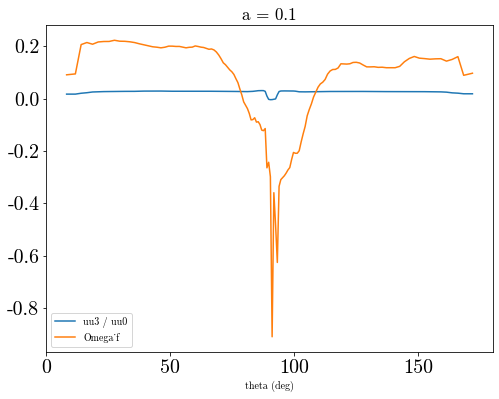

In [132]:
plt.figure(figsize=(8,6))
fs = 12

rfd("fieldline2000.bin")

ud = (gv3[:,:]*uu[:,None]).sum(0)

bu=np.empty_like(uu)              #allocate memory for bu
bu[0]=mdot(B[1:4], ud[1:4])             #B^i u_i
bu[1:4]=(B[1:4] + bu[0]*uu[1:4])/uu[0]  #b^i = (B^i + b^t u^i)/u^t
bd=mdot(gv3,bu)
bsq=mdot(bu,bd)
faraday()

OmegaH = a /(2*rhor)

plt.title("a = 0.1", fontsize = fs+5)

plt.plot(h[iofr(rhor),:,0] * (180/np.pi), 2*np.pi*uu[3][iofr(rhor), :, 1]/ uu[0][iofr(rhor), :, 1], label="uu3 / uu0")
plt.plot(h[iofr(rhor),:,0]* (180/np.pi), 2*np.pi*omegaf2b[iofr(rhor), :, 1]/OmegaH, label="Omega_f")
#plt.plot(h[iofr(rhor),:,0]* (180/np.pi), (ud[3]/uu[0])[iofr(rhor), :, 1]/ (np.pi*2), label="ud3 / uu0")

plt.xlabel("theta (deg)")
plt.legend()

OmegaH = a /(2*rhor)
print(OmegaH, 2*np.pi*omegaf2b[iofr(rhor), ny//3, 1])

k01 = 2*np.pi*omegaf2b[iofr(rhor), ny//3, 1]/OmegaH
print(2*np.pi*omegaf2b[iofr(rhor), ny//3, 1]/OmegaH)
print(k01)

In [133]:
OmegaH

0.02506281446690023

0.02506281446690023 0.002757989715627681
[84.727554]
[56]
k =  [-0.08938698]
[-0.08938698]


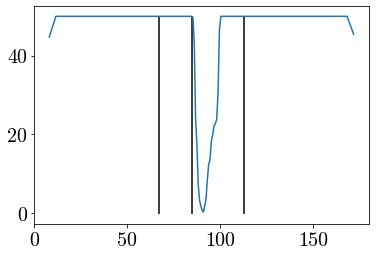

In [134]:
plt.plot(h[iofr(rhor),:,0]* (180/np.pi), (bsq/rho)[iofr(rhor), :, 1], label="magnetization")
plt.vlines(67, -0.2, 50, label="67 deg")
plt.vlines(113, -0.2, 50, label="113 deg")
plt.vlines(84.7, -0.2, 50, label="113 deg")

OmegaH = a /(2*rhor)
print(OmegaH, 2*np.pi*omegaf2b[iofr(rhor), ny//3, 1])

2*np.pi*omegaf2b[iofr(rhor), 93, 1]/OmegaH
h[iofr(rhor),93,0]* (180/np.pi)

where_boundary = (np.where(rho[iofr(rhor), :, 1] == np.min(rho[iofr(rhor), :, 1])))[0]
print(h[iofr(rhor),where_boundary,0]*180/np.pi)
print(where_boundary)

k01 = 2*np.pi*omegaf2b[iofr(rhor), where_boundary, 1]/OmegaH
print("k = ", 2*np.pi*omegaf2b[iofr(rhor), where_boundary, 1]/OmegaH)
print(k01)


In [135]:
k01 = calc_k(a,rhor,rho,h,bsq)[0]
k01

NameError: name 'calc_k' is not defined

In [ ]:
plt.plot(h[iofr(rhor),:,0]* (180/np.pi), rho[iofr(rhor), :, 1], label="density")
plt.vlines(84.7, -0.2, 2, label="113 deg")

In [ ]:
k01 = plot_k(a,rhor,rho,h,bsq)[0]
print(k01)
OmegaH

## a = 0.0

In [ ]:
cd D:\BHspindown\maddat_backup\rtf2_15r35_a0.0_0_0_0

In [ ]:
# This assumes gdump.bin is in /dumps
grid3d("gdump.bin")

In [ ]:
omegaf2b

In [ ]:
plt.figure(figsize=(8,6))
fs = 12

rfd("fieldline2000.bin")

ud = (gv3[:,:]*uu[:,None]).sum(0)

bu=np.empty_like(uu)              #allocate memory for bu
bu[0]=mdot(B[1:4], ud[1:4])             #B^i u_i
bu[1:4]=(B[1:4] + bu[0]*uu[1:4])/uu[0]  #b^i = (B^i + b^t u^i)/u^t
bd=mdot(gv3,bu)
bsq=mdot(bu,bd)
faraday()

plt.title("a = 0.0", fontsize = fs+5)

#fLMA = (-((gdet*fTudMA(1,3)*(bsq/rho < 30)/dxdxp[3,3])*_dx2*_dx3) / (-(gdet*rho*uu[1]*_dx2*_dx3))[:,:,:]).sum(-1).sum(-1)

plt.plot(h[iofr(rhor),:,0]* (180/np.pi), 2*np.pi*uu[3][iofr(rhor), :, 1]/ uu[0][iofr(rhor), :, 1], label="uu3/uu0")
plt.plot(h[iofr(rhor),:,0]* (180/np.pi), 2*np.pi*omegaf2b[iofr(rhor), :, 1], label="Omega_f")
#plt.plot(h[iofr(rhor),:,0], (ud[3]/uu[0]).mean(-1)[iofr(rhor), :, 1]/ (np.pi*2))
plt.plot(h[iofr(rhor),:,0]* (180/np.pi), (ud[3]/uu[0])[iofr(rhor), :, 1]/ (np.pi*2), label="ud3 / uu0")

plt.vlines(67, -0.05, 0.1, label="67 deg")
plt.vlines(113, -0.05, 0.1, label="113 deg")

plt.xlabel("theta (deg)")
plt.legend()

#plt.plot(h[iofr(rhor),:,0], (-((gdet*fTudMA(1,3)*(bsq/rho < 30)/dxdxp[3,3])*_dx2*_dx3)h[iofr(rhor),:,0]))

In [ ]:
plt.plot(h[iofr(rhor),:,0]* (180/np.pi), rho[iofr(rhor), :, 1], label="density")

In [ ]:
k00 = plot_k(a,rhor,rho,h,bsq)[0]
k00 = 0

In [ ]:
OmegaH = a /(2*rhor)
    plt.plot(h[iofr(rhor),:,0]* (180/np.pi), (bsq/rho)[iofr(rhor), :, 1], label="magnetization")
    where_boundary = (np.where(rho[iofr(rhor), :, 1] == np.min(rho[iofr(rhor), :, 1])))[0]
    print(h[iofr(rhor),where_boundary,0]*180/np.pi)
    return(2*np.pi*omegaf2b[iofr(rhor), where_boundary, 1]/OmegaH)

## a = 0.9

In [ ]:
cd D:\BHspindown\maddat_backup\rtf2_15r34.1_pi_0_0_0

In [ ]:
# This assumes gdump.bin is in /dumps
grid3d("gdump.bin")

In [ ]:
OmegaH=angv_hor(a, rhor)
OmegaH

In [ ]:
plt.figure(figsize=(8,6))
fs = 12

rfd("fieldline2000.bin")

ud = (gv3[:,:]*uu[:,None]).sum(0)

bu=np.empty_like(uu)              #allocate memory for bu
bu[0]=mdot(B[1:4], ud[1:4])             #B^i u_i
bu[1:4]=(B[1:4] + bu[0]*uu[1:4])/uu[0]  #b^i = (B^i + b^t u^i)/u^t
bd=mdot(gv3,bu)
bsq=mdot(bu,bd)
faraday()

plt.title("a = 0.9 (pi)", fontsize = fs+5)

#fLMA = (-((gdet*fTudMA(1,3)*(bsq/rho < 30)/dxdxp[3,3])*_dx2*_dx3) / (-(gdet*rho*uu[1]*_dx2*_dx3))[:,:,:]).sum(-1).sum(-1)

#plt.plot(h[iofr(rhor),:,0]* (180/np.pi), 2*np.pi*uu[3][iofr(rhor), :, 1]/ uu[0][iofr(rhor), :, 1], label="uu3/uu0")
plt.plot(h[iofr(rhor),:,0]* (180/np.pi), 2*np.pi*omegaf2b[iofr(rhor), :, 0]/OmegaH, label="Omega_f/Omega_H")
plt.plot(h[iofr(rhor),:,0]* (180/np.pi), 2*np.pi*omegaf2b[iofr(rhor), :, 1]/OmegaH, label="Omega_f/Omega_H")
plt.plot(h[iofr(rhor),:,0]* (180/np.pi), 2*np.pi*omegaf2b[iofr(rhor), :, 2]/OmegaH, label="Omega_f/Omega_H")
plt.plot(h[iofr(rhor),:,0]* (180/np.pi), 2*np.pi*omegaf2b[iofr(rhor), :, 3]/OmegaH, label="Omega_f/Omega_H")
plt.plot(h[iofr(rhor),:,0]* (180/np.pi), 2*np.pi*omegaf_09/OmegaH, label="TA")

#plt.plot(h[iofr(rhor),:,0], (ud[3]/uu[0]).mean(-1)[iofr(rhor), :, 1]/ (np.pi*2))
#plt.plot(h[iofr(rhor),:,0]* (180/np.pi), (ud[3]/uu[0])[iofr(rhor), :, 1]/ (np.pi*2), label="ud3 / uu0")

plt.vlines(67, -0.2, 0.2, label="67 deg")
plt.vlines(113, -0.2, 0.2, label="113 deg")

plt.ylim(-0.5,0.5)
plt.xlabel("theta (deg)")
plt.legend()

#plt.plot(h[iofr(rhor),:,0], (-((gdet*fTudMA(1,3)*(bsq/rho < 30)/dxdxp[3,3])*_dx2*_dx3)h[iofr(rhor),:,0]))

In [ ]:
print((2*np.pi*omegaf2b[iofr(rhor), :, :]/OmegaH).mean(-1).mean(-1))
print(2*np.pi*omegaf_09.mean(-1)/OmegaH)

In [ ]:
OmegaH = a /(2*rhor)
print(OmegaH, 2*np.pi*omegaf2b[iofr(rhor), ny//3, 1])

k09 = 2*np.pi*omegaf2b[iofr(rhor), ny//3, 1]/OmegaH
print(2*np.pi*omegaf2b[iofr(rhor), ny//3, 1]/OmegaH)
print(k09)

In [ ]:
k09 = plot_k(a,rhor,rho,h,bsq)[0]
print(k09)
OmegaH

In [ ]:
plt.plot(h[iofr(rhor),:,0]* (180/np.pi), (bsq/rho)[iofr(rhor), :, 0], label="magnetization")
plt.plot(h[iofr(rhor),:,0]* (180/np.pi), bsq[iofr(rhor),:,0]/rho[iofr(rhor),:,0])

In [ ]:
plt.plot(h[iofr(rhor),:,0]* (180/np.pi), 2*np.pi*omegaf2b[iofr(rhor), :, 1]/OmegaH, label="Omega_f/Omega_H")
plt.plot(h[iofr(rhor),:,0]* (180/np.pi), 2*np.pi*omegaf2[iofr(rhor), :, 1]/OmegaH, label="Omega_f/Omega_H")


In [ ]:
plt.plot(h[iofr(rhor),:,0]* (180/np.pi), rho[iofr(rhor), :, 1], label="density")
plt.vlines(ny//3, -0.2, 0.2, label="60 deg")

plt.vlines(77.3, -0.2, 0.2, label="60 deg")
plt.vlines(67, -0.2, 0.2, label="60 deg")
plt.vlines(113, -0.2, 0.2, label="60 deg")
iofr(min(rho[iofr(rhor), :, 1]))

where_boundary = (np.where(rho[iofr(rhor), :, 1] == np.min(rho[iofr(rhor), :, 1])))[0]
h[iofr(rhor),93,0]*180/np.pi
print(where_boundary)


In [ ]:
plt.plot(h[iofr(rhor),:,0]* (180/np.pi), (bsq/rho)[iofr(rhor), :, 1], label="magnetization")
plt.vlines(67, -0.2, 50, label="67 deg")
plt.vlines(113, -0.2, 50, label="113 deg")

2*np.pi*omegaf2b[iofr(rhor), 93, 1]/OmegaH
h[iofr(rhor),93,0]* (180/np.pi)

In [ ]:
k09 = calc_k(a,rhor,rho,h,bsq)[0]
k09

In [ ]:
pshape(bsq)
pshape(rho)

In [ ]:
grid3d("gdump.bin")
rfd("fieldline2000.bin")

iofr(2)

In [ ]:
karray = [kn09[0],kn05[0],kn02[0],k00,k01[0],k02[0],k09[0],k99[0]]
karray
omegah_arr = [OmegaH_n09,OmegaH_n05,OmegaH_n02,OmegaH_00,OmegaH_01,OmegaH_02,OmegaH_09,OmegaH_99]

In [ ]:
karray

In [ ]:
plt.plot(omegah_arr, np.abs(karray))
np.average(np.abs(karray))

In [ ]:
plt.plot(alist,omegah_arr)

In [ ]:
plt.loglog(r[:,ny//2,0], -fEM_09/fM_09, label=" Total E flux (disk+jet) ")

In [ ]:
pwd

In [ ]:
def calc_bsq(uu,ud,B)

In [ ]:
cd /scratch1/07879/blowell/rtf2_15r34.1_pi_0_0_0 

In [ ]:
grid3d("gdump.bin")
rfd("fieldline2000.bin")
plco(np.log10(lrho),xcoord=r*np.sin(h),ycoord=r*np.cos(h),xmax=100,ymax=50)
plco(np.log10(rho),xcoord=r*np.sin(h),ycoord=r*np.cos(h),xmax=100,ymax=50)
plt.xlim(0,100);plt.ylim(-50,50)

In [ ]:
def s(a,l_in,e_in):
    s = l_in - 2*a*e_in
    return s

In [ ]:
# s(a) calculation

def Ein(A):
    Ein = (1-(2/(3*Rms(A))))**(1/2)
    
    #eps = np.finfo(np.float64).eps
    #a0 = 0.99999 #1.-1e8*eps
    #if a > a0: 
    #    a = a0
    #    Eb = Ebind( Risco(a), a )
    #    return((a-a0)/(1.-a0)*(1.-3.**(-0.5)) + (1.-a)/(1.-a0)*Eb)
    #Eb = Ebind( Risco(a), a)
    ##Eb = (1.-3.**(-0.5))*a**2
    #return( Eb )
    
    return Ein

# Now make Lin always positive
def Lin(M, A):
    Lin = (2*M/(3*np.sqrt(3))) * (1 + 2*(3*Rms(A) - 2)**(1/2)) #same as appendix
    return Lin

def Z1(A):
    Z1 = 1 + np.sign(1-A**2)*np.abs((1-A**2))**(1/3) * (np.sign(1+A)*np.abs(1+A)**(1/3) + np.sign(1-A)*np.abs(1-A)**(1/3))
    return Z1

def Z2(A):
    Z2 = (3*A*A + (Z1(A))**2)**(1/2)
    return Z2

def Rms(A):
    Z1 = 1 + np.sign(1-A**2)*np.abs((1-A**2))**(1/3) * (np.sign(1+A)*np.abs(1+A)**(1/3) + np.sign(1-A)*np.abs(1-A)**(1/3))
    Z2 = (3*A*A + (Z1)**2)**(1/2)

    A0 = 0.9999 #1.-1e8*eps

def odeswithjettest(y, m):
    M, a = y
    k = 1/2
    dydm = [Ein(a), 1.0*(1/M)*((Lin(M,a)*0.2/M) - 2*a*Ein(a)) - (a*a/M)*(1/(k*angv_hor(a)) - 2*a)]
    ###add Mdot times etajet
    return dydm

#Now change it to use with data
def odeswithjettest(y, m, ein, lin):
    M, a = y
    k = 1/2
    dydm = [ein, 1.0*(1/M)*((lin*0.2/M) - 2*a*ein) - (a*a/M)*(1/(k*angv_hor(a)) - 2*a)]
    ###add Mdot times etajet
    return dydm

In [ ]:
yj = [1, 1] #[M0,a0]
mj = np.linspace(0.0,1.0,1000)
solj = np.array(odeint(odeswithjettest,yj,mj))
plt.figure(figsize=(10,5),dpi=100)
Mj = []
aj = []
for i in range(0, len(solj)):
    Mj.append(solj[i][0])
    aj.append(solj[i][1])

In [ ]:
dxdxp[3,3,0,0,0]*nz*_dx3
#to scale. phi_wedge/ 2pi

### Keplerian angular momentum to MAD angular momentum drop at the horizon

In [ ]:
def per_loss(og, new):
    percent_loss = ((og - new) / og ) *100
    return(percent_loss)

In [ ]:
fLkep = [lkep_n09, lkep_n05, lkep_n02, lkep_00, lkep_01, lkep_02, lkep_09, lkep_99]
fLkep = np.array(fLkep)


alist = [-0.9,-0.5,-0.2,0.0,0.1,0.2,0.9,0.99]

sub = fLkep - fLhydro_cor
L_decrease = per_loss(fLkep, fLhydro_cor)

In [ ]:
fLhydro_cor[6]/lkep_09

In [ ]:
plt.figure(figsize=(8,6))
fs = 12

#plt.title("Angular momentum flux, gas", fontsize = fs+5)

plt.plot(alist, fLhydro_cor, label="hydro Ldot at hor")
plt.plot(alist, lkep_isco, label="Kep Ldot at ISCO")
plt.plot(alist, sub, label="Kep Ldot - hydro Ldot")

#plt.loglog(r[:,ny//2,0], fEdiskMA_02 / fM_02, label=" Disk L flux hydro")

#plt.vlines(rhor, 10**-1, 10**1.5, label="Rhor")
#plt.vlines(Risco(a), 10**-1, 10**1.5, label = "Risco")
#plt.loglog(r[:,ny//2,0], Mdot, label="current Mass flux")
#plt.loglog(r[:,ny//2,0], fM_02, label="Mass flux total")
#plt.loglog(r[:,ny//2,0], fMdisk_02*0.8, label="Disk Mass flux total")
#plt.loglog(r[:,ny//2,0], fEdiskMA_02, label="Disk E")


#plt.loglog(r[:,ny//2,0], -fEM_02 /fM_02 , label="- EM flux")
#plt.loglog(r[:,ny//2,0], - powj_02 /fM_02 , label="- Jet power")


plt.ylim(0.5,4.5)
#plt.xlim(1e0,10)
#plt.loglog(r[:,ny//2,0],rho[:,ny//2,0]*10)
plt.legend(fontsize = fs, loc=1)

In [ ]:
plt.figure(figsize=(8,6))
fs = 12

fLhydro_cor = np.array(fLhydro_cor)
lkep_isco  = np.array(lkep_isco)

#plt.title("Fraction L flux onto BH over Keplerian L", fontsize = fs+5)

plt.plot(alist, fLhydro_cor/lkep_isco)

plt.grid(b=1)

plt.ylim(-0.01,0.51)
plt.xlim(0.0,1.)

plt.ylabel(r'$L / L_{Kep}$')
plt.xlabel(r'$a$')
#plt.loglog(r[:,ny//2,0],rho[:,ny//2,0]*10)
plt.legend(fontsize = fs, loc=1)

In [ ]:
plt.figure(figsize=(8,6))
fs = 20

fig, ax = plt.subplots()

#ax.grid(True, linestyle='-.')
ax.tick_params(direction='in', length=5)

plt.title("Percent loss of Keplerian Ldot", fontsize=fs)
plt.plot(alist, L_decrease)
#ax.tick_params(self,axis='both',direction='out')

plt.xlabel("a", fontsize=fs)
plt.grid(b=1)

#plt.ylim(0.5,4.5)
#plt.xlim(1e0,10)
#plt.loglog(r[:,ny//2,0],rho[:,ny//2,0]*10)
#plt.legend(fontsize = fs, loc=1)

In [ ]:
#choose pretty fonts
mpl.rc('xtick', labelsize=15) 
mpl.rc('ytick', labelsize=15) 
axes = {'labelsize': 20}
mpl.rc('axes', **axes)
mpl.rc('mathtext',fontset='cm')
mpl.rcParams['font.serif'] = 'cmr10'
mpl.rcParams['font.sans-serif'] = 'cmr10'
mpl.rcParams['axes.unicode_minus']= False
matplotlib.rcParams['font.family'] = "sans-serif"

#import *__init__.py

## Jet contribution to s(a)

In [ ]:
cd D:\BHspindown\maddat_backup\rtf2_15r34.1_pi_0_0_0 

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
OmegaH = a /(2*rhor)
print(OmegaH)

In [ ]:
rhor
OmegaH

In [ ]:
# doesn't make sense. ODE needs to be a function of a,M
def func(radius, k):
    OmegaH = a /(2*rhor)
    Phi = PhiBHj_09[iofr(radius)]
    return((2*Phi)**2. * OmegaH**2 * k)


guess = 0.05

popt, pcov = curve_fit(func, r[:,ny//2,0], -fEM_09/fM_09[iofr(10)], guess)
plt.loglog(r[:,ny//2,0], func(r[:,ny//2,0], *popt)/fM_09[iofr(10)], 'r-',
         label='fit for jet power')
plt.loglog(r[:,ny//2,0], -fEM_09/fM_09[iofr(10)], label="EM flux")
plt.ylim(10**-1,10**1)
plt.xlim(1e0,10)
plt.legend()
print(popt)

In [ ]:
k = 1 / (24*np.pi**2)
g = .04 / (4*np.pi)
ktry = .05#0.05 / (4*np.pi)
print(k)
print(g)

In [ ]:
(popt*np.pi*24)

In [ ]:
P_BZ = PhiBH_09**2. * OmegaH**2 * k
P_BZj = (2*PhiBHj_09)**2. * OmegaH**2 * ktry
#P_BZ/fM_09[iofr(10)]

In [ ]:
plt.figure(figsize=(8,6))
fs = 12

plt.title("Jet power", fontsize = fs+5)

#plt.loglog(r[:,ny//2,0], P_BZ/fM_09[iofr(10)], label="Model")
plt.loglog(r[:,ny//2,0], P_BZj/fM_09[iofr(10)], label="Model jet phi")
plt.loglog(r[:,ny//2,0], - fEM_09/fM_09[iofr(10)], label="Data")

#plt.loglog(r[:,ny//2,0], - fEM_09/fM_09[iofr(10)], label=" - Jet E flux ")

#plt.loglog(r[:,ny//2,0], fEdiskMA_02 / fM_02, label=" Disk L flux hydro")

plt.vlines(rhor, 10**-1, 10**1.5, label="Rhor")
plt.vlines(Risco(a), 10**-1, 10**1.5, label = "Risco")
#plt.loglog(r[:,ny//2,0], Mdot, label="current Mass flux")
#plt.loglog(r[:,ny//2,0], fM_02, label="Mass flux total")
#plt.loglog(r[:,ny//2,0], fMdisk_02*0.8, label="Disk Mass flux total")
#plt.loglog(r[:,ny//2,0], fEdiskMA_02, label="Disk E")


#plt.loglog(r[:,ny//2,0], -fEM_02 /fM_02 , label="- EM flux")
#plt.loglog(r[:,ny//2,0], - powj_02 /fM_02 , label="- Jet power")


#plt.ylim(10**-2,10)
plt.xlim(1e0,50)
#plt.loglog(r[:,ny//2,0],rho[:,ny//2,0]*10)
plt.legend(fontsize = fs, loc=1)

In [ ]:
plt.figure(figsize=(8,6))
fs = 12

plt.title("Magnetic flux", fontsize = fs+5)

plt.loglog(r[:,ny//2,0], PhiBHd_09/fM_09[iofr(10)], label="disk")
plt.loglog(r[:,ny//2,0], PhiBHj_09/fM_09[iofr(10)], label="jet")
plt.loglog(r[:,ny//2,0], PhiBH_09/fM_09[iofr(10)], label="total")

#plt.loglog(r[:,ny//2,0], - fEM_09/fM_09[iofr(10)], label=" - Jet E flux ")

#plt.loglog(r[:,ny//2,0], fEdiskMA_02 / fM_02, label=" Disk L flux hydro")

plt.vlines(rhor, 10**-1, 10**1.5, label="Rhor")
plt.vlines(Risco(a), 10**-1, 10**1.5, label = "Risco")
#plt.loglog(r[:,ny//2,0], Mdot, label="current Mass flux")
#plt.loglog(r[:,ny//2,0], fM_02, label="Mass flux total")
#plt.loglog(r[:,ny//2,0], fMdisk_02*0.8, label="Disk Mass flux total")
#plt.loglog(r[:,ny//2,0], fEdiskMA_02, label="Disk E")


#plt.loglog(r[:,ny//2,0], -fEM_02 /fM_02 , label="- EM flux")
#plt.loglog(r[:,ny//2,0], - powj_02 /fM_02 , label="- Jet power")


plt.ylim(10**-1,10)
plt.xlim(1e0,50)
#plt.loglog(r[:,ny//2,0],rho[:,ny//2,0]*10)
plt.legend(fontsize = fs, loc=1)

## Add ODE functions

In [ ]:
def Ein(A):
    Ein = (1-(2/(3*Rms(A))))**(1/2)
    
    #eps = np.finfo(np.float64).eps
    #a0 = 0.99999 #1.-1e8*eps
    #if a > a0: 
    #    a = a0
    #    Eb = Ebind( Risco(a), a )
    #    return((a-a0)/(1.-a0)*(1.-3.**(-0.5)) + (1.-a)/(1.-a0)*Eb)
    #Eb = Ebind( Risco(a), a)
    ##Eb = (1.-3.**(-0.5))*a**2
    #return( Eb )
    
    return Ein

# Now make Lin always positive
def Lin(M, A):
    Lin = (2*M/(3*np.sqrt(3))) * (1 + 2*(3*Rms(A) - 2)**(1/2)) #same as appendix
    return Lin

def Z1(A):
    Z1 = 1 + np.sign(1-A**2)*np.abs((1-A**2))**(1/3) * (np.sign(1+A)*np.abs(1+A)**(1/3) + np.sign(1-A)*np.abs(1-A)**(1/3))
    return Z1

def Z2(A):
    Z2 = (3*A*A + (Z1(A))**2)**(1/2)
    return Z2

def Rms(A):
    Z1 = 1 + np.sign(1-A**2)*np.abs((1-A**2))**(1/3) * (np.sign(1+A)*np.abs(1+A)**(1/3) + np.sign(1-A)*np.abs(1-A)**(1/3))
    Z2 = (3*A*A + (Z1)**2)**(1/2)

    A0 = 0.9999 #1.-1e8*eps
  
    #if A > A0:
    #    A = A0
    #    Rms = 1 + (12 - 6)*(A-1)
    #    return Rms
  #  if A < -A0:
  #      A = -A0
  #      Rms = 1 + (12 + 6)*(A[el]+1)
  #      return Rms
    Rms = 3 + Z2 - np.sign(A)*((3 - Z1)*(3 + Z1 + 2*Z2))**(1/2)
    return Rms

# Sanity checks
#print(Ein(0,-1),Ein(1,-1))
#print(Ein(0.25,1),Ein(-0.25,1))
#print(Lin(1,-1,-1),Lin(1,1,-1))
#print(Rms(-0.5,-1),Rms(0.5,1))
#print(Rms(1,-1), Z1(1), Z2(1))
#print(Rms(-1,1), Z1(-1), Z2(-1))

In [ ]:
Atest = np.linspace(-0.9998,0.9998,100)
Rmstest = []
for i in Atest:
    Rmstest.append(Rms(i))

plt.plot(Atest, Rmstest)
plt.xlabel("a")
plt.ylabel("Rms")

In [ ]:
fEMrhor = [fEM_n09[iofr(rhor)],fEM_n05[iofr(rhor)],fEM_n02[iofr(rhor)],fEM_00[iofr(rhor)],fEM_01[iofr(rhor)],fEM_02[iofr(rhor)],fEM_09[iofr(rhor)],fEM_99[iofr(rhor)]]
fEMr10 = [fEM_n09[iofr(10)],fEM_n05[iofr(10)],fEM_n02[iofr(10)],fEM_00[iofr(10)],fEM_01[iofr(10)],fEM_02[iofr(10)],fEM_09[iofr(10)],fEM_99[iofr(10)]]
fLjEMrhor  = [fLjetEM_n09[iofr(rhor)],fLjetEM_n05[iofr(rhor)],fLjetEM_n02[iofr(rhor)],fLjetEM_00[iofr(rhor)],fLjetEM_01[iofr(rhor)],fLjetEM_02[iofr(rhor)],fLjetEM_09[iofr(rhor)],fLjetEM_99[iofr(rhor)]]
fMr10 = [fM_n09[iofr(10)],fM_n05[iofr(10)],fM_n02[iofr(10)],fM_00[iofr(10)],fM_01[iofr(10)],fM_02[iofr(10)],fM_09[iofr(10)],fM_99[iofr(10)]]
PhiBHrhor = [PhiBHj_n09[iofr(10)],PhiBHj_n05[iofr(10)],PhiBHj_n02[iofr(10)],PhiBHj_00[iofr(10)],PhiBHj_01[iofr(10)],PhiBHj_02[iofr(10)],PhiBHj_09[iofr(10)],PhiBHj_99[iofr(10)]]

In [ ]:
PhiBHrhor

In [16]:
dt